# Importing Libraries

In [661]:
import numpy as np
import pandas as pd

import os

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from numpy import asarray

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

import re
import requests
import time
import matplotlib.pyplot as plt

import random
random.seed(646)

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D

import collections
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers

from IPython.display import Image

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting working directory

In [463]:
import os
print(os.getcwd())

C:\Users\sonit\OneDrive\Desktop\INSOFE\PHD


In [464]:
os.chdir('C:/Users/sonit/OneDrive/Desktop/INSOFE/PHD')

In [465]:
os.getcwd()

'C:\\Users\\sonit\\OneDrive\\Desktop\\INSOFE\\PHD'

# Initializing Header and Payload parameters

In [466]:
headers = {
 'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, likeGecko) Chrome/74.0.3729.108 Safari/537.36',
 'X-Requested-With': 'XMLHttpRequest',
}

In [467]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

In [468]:
payload = {
 'direction': 'next',
 'endCursor': '',
 'startCursor': '',
}

# Initialize session variable

In [469]:
s = requests.Session()

In [470]:
r = s.get(url, headers=headers, params=payload) # GET Call
#print(r)
data = r.json() 

In [471]:
data

{'pageInfo': {'hasNextPage': True,
  'hasPreviousPage': False,
  'endCursor': 'eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb19kNDdjMzlkNS0xOWNlLTQwYTgtOTZjYy03NjFiNDVmYTMxMjAiLCJlbXNJZCI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZV9UIiwiY3JlYXRlRGF0ZSI6IjIwMTktMDgtMjlUMjM6MTk6MzMuMDgxWiJ9',
  'startCursor': None},
 'reviews': [{'rating': 'STAR_5',
   'review': "Good for all ages.  Good lessons, good story, great graphics.  I'd see it again.",
   'displayName': 'Kathleen',
   'displayImageUrl': None,
   'isVerified': True,
   'isSuperReviewer': False,
   'hasSpoilers': False,
   'hasProfanity': False,
   'createDate': '2019-08-30T03:13:36.138Z',
   'updateDate': '2019-08-30T03:13:36.138Z',
   'user': {'userId': '4ac6d27e-eee2-45ee-b7d1-8beda3635e9c',
    'realm': 'Fandango',
    'displayName': 'Kathleen',
    'accountLink': None},
   'score': 5,
   'timeFromCreation': '1h ago'},
  {'rating': 'STAR_5',
   '

# Pulling data from "rottentomatoes" webpage

In [472]:
review_df4=pd.DataFrame(columns=['review'])

In [473]:
#self code
k=0
for i in range(3):
    r = s.get(url, headers=headers, params=payload) # GET Call
    data = r.json()
    #print(data)
    #if not data['pageInfo']['hasNextPage']:
    #    break
    payload['endCursor'] = data['pageInfo']['endCursor']
    payload['startCursor'] = data['pageInfo']['startCursor']
    #x=re.split(",",r.text)    #List 
    #print(x)
    review_df4['review'].loc[k]=data
    k+=1
    time.sleep(5)

In [474]:
#review_df1['review'].loc[k]='fill'
#review_df3['review'].values
review_df4['review'].count()

3

In [475]:
(review_df4['review']).values

array([{'pageInfo': {'hasNextPage': True, 'hasPreviousPage': False, 'endCursor': 'eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb19kNDdjMzlkNS0xOWNlLTQwYTgtOTZjYy03NjFiNDVmYTMxMjAiLCJlbXNJZCI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZV9UIiwiY3JlYXRlRGF0ZSI6IjIwMTktMDgtMjlUMjM6MTk6MzMuMDgxWiJ9', 'startCursor': None}, 'reviews': [{'rating': 'STAR_5', 'review': "Good for all ages.  Good lessons, good story, great graphics.  I'd see it again.", 'displayName': 'Kathleen', 'displayImageUrl': None, 'isVerified': True, 'isSuperReviewer': False, 'hasSpoilers': False, 'hasProfanity': False, 'createDate': '2019-08-30T03:13:36.138Z', 'updateDate': '2019-08-30T03:13:36.138Z', 'user': {'userId': '4ac6d27e-eee2-45ee-b7d1-8beda3635e9c', 'realm': 'Fandango', 'displayName': 'Kathleen', 'accountLink': None}, 'score': 5, 'timeFromCreation': '1h ago'}, {'rating': 'STAR_5', 'review': "I like that it followed the animation movie

In [476]:
#review_df4['review']= pd.concat([review_df2['review'],review_df3['review']],axis=0)

# Creating DataFrame consisting of all collected features 

In [477]:
type(review_df4['review'].iloc[0]) #dict
x=review_df4['review'].iloc[0]

In [478]:
x

{'pageInfo': {'hasNextPage': True,
  'hasPreviousPage': False,
  'endCursor': 'eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb19kNDdjMzlkNS0xOWNlLTQwYTgtOTZjYy03NjFiNDVmYTMxMjAiLCJlbXNJZCI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZV9UIiwiY3JlYXRlRGF0ZSI6IjIwMTktMDgtMjlUMjM6MTk6MzMuMDgxWiJ9',
  'startCursor': None},
 'reviews': [{'rating': 'STAR_5',
   'review': "Good for all ages.  Good lessons, good story, great graphics.  I'd see it again.",
   'displayName': 'Kathleen',
   'displayImageUrl': None,
   'isVerified': True,
   'isSuperReviewer': False,
   'hasSpoilers': False,
   'hasProfanity': False,
   'createDate': '2019-08-30T03:13:36.138Z',
   'updateDate': '2019-08-30T03:13:36.138Z',
   'user': {'userId': '4ac6d27e-eee2-45ee-b7d1-8beda3635e9c',
    'realm': 'Fandango',
    'displayName': 'Kathleen',
    'accountLink': None},
   'score': 5,
   'timeFromCreation': '1h ago'},
  {'rating': 'STAR_5',
   '

In [479]:
x.keys()

dict_keys(['pageInfo', 'reviews'])

In [480]:
type(x['reviews']) #list - contains 10 user rating details per 1 page 
x['reviews']                 

[{'rating': 'STAR_5',
  'review': "Good for all ages.  Good lessons, good story, great graphics.  I'd see it again.",
  'displayName': 'Kathleen',
  'displayImageUrl': None,
  'isVerified': True,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-30T03:13:36.138Z',
  'updateDate': '2019-08-30T03:13:36.138Z',
  'user': {'userId': '4ac6d27e-eee2-45ee-b7d1-8beda3635e9c',
   'realm': 'Fandango',
   'displayName': 'Kathleen',
   'accountLink': None},
  'score': 5,
  'timeFromCreation': '1h ago'},
 {'rating': 'STAR_5',
  'review': "I like that it followed the animation movie pretty close & it's just an overall terrific movie no matter which version you watch.",
  'displayName': 'kimberly d',
  'displayImageUrl': None,
  'isVerified': True,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-30T02:17:18.670Z',
  'updateDate': '2019-08-30T02:17:18.670Z',
  'user': {'userId': 'a147a39f-ee2e-408e

In [481]:
type(x['reviews'][0]) #dict - gives info about 1 user rating

dict

In [482]:
(x['reviews'][2])

{'rating': 'STAR_4_5',
 'review': 'Great movie..feeling the nostalgia for sure..left out a few parts from the otiginal but overall great feeling for this one. I would recommend this to anyone.',
 'displayName': 'Doug G',
 'displayImageUrl': None,
 'isVerified': False,
 'isSuperReviewer': False,
 'hasSpoilers': False,
 'hasProfanity': False,
 'createDate': '2019-08-30T01:53:24.594Z',
 'updateDate': '2019-08-30T01:53:24.594Z',
 'user': {'userId': '978119067',
  'realm': 'RT',
  'displayName': 'Doug G',
  'accountLink': '/user/id/978119067'},
 'score': 4.5,
 'timeFromCreation': '2h ago'}

In [483]:
y=((x['reviews'][2])['user'])

In [484]:
y['userId']

'978119067'

In [485]:
rating_df=pd.DataFrame(index=range(3000), columns=['rating','reviewed by','user Account Verified','score','super Reviewer','spoilers','profanity','review date','review update date','timeFromCreation','review','userId','realm','displayName','accountLink'])

In [486]:
k=0
for i in range(1): # k = range (300) for 3000 df rows
    x=review_df4['review'].iloc[i]
    for k in range(10):
        #print(k)
        #review_df['rating']=np.nan
        #review_df['Reviewed by']=np.nan
        #rating_df.iloc[k,0] = x['reviews'][k]['rating']
        #rating_df.iloc[(10*i+k),0] = x['reviews'][k]['rating']
        rating_df.iloc[(10*i+k),0] = x['reviews'][k]['rating']
        rating_df.iloc[(10*i+k),1] = x['reviews'][k]['displayName']
        rating_df.iloc[(10*i+k),2] = x['reviews'][k]['isVerified']
        rating_df.iloc[(10*i+k),3] = x['reviews'][k]['score']
        rating_df.iloc[(10*i+k),4] = x['reviews'][k]['isSuperReviewer']
        rating_df.iloc[(10*i+k),5] = x['reviews'][k]['hasSpoilers']
        rating_df.iloc[(10*i+k),6] = x['reviews'][k]['hasProfanity']         #obscene/offensive
        rating_df.iloc[(10*i+k),7] = x['reviews'][k]['createDate']
        rating_df.iloc[(10*i+k),8] = x['reviews'][k]['updateDate']
        #rating_df.iloc[k,9] = x['reviews'][k]['user']
        rating_df.iloc[(10*i+k),9] = x['reviews'][k]['timeFromCreation'] 
        rating_df.iloc[(10*i+k),10] = x['reviews'][k]['review'] 
        y= x['reviews'][k]['user']
        rating_df.iloc[(10*i+k),11]=(y['userId'])
        rating_df.iloc[(10*i+k),12]=(y['realm'])
        rating_df.iloc[(10*i+k),13]=(y['displayName'])
        rating_df.iloc[(10*i+k),14]=(y['accountLink'])     

In [487]:
rating_df

rating reviewed by user Account Verified score super Reviewer  \
0       STAR_5    Kathleen                  True     5          False   
1       STAR_5  kimberly d                  True     5          False   
2     STAR_4_5      Doug G                 False   4.5          False   
3       STAR_2     Diogo O                 False     2          False   
4       STAR_3     V0hayga                  True     3          False   
5       STAR_5    Ashley B                  True     5          False   
6       STAR_2     Edson G                 False     2          False   
7       STAR_4   Barbara S                  True     4          False   
8       STAR_4         DJO                  True     4          False   
9       STAR_5  PATRICIA J                  True     5          False   
10         NaN         NaN                   NaN   NaN            NaN   
11         NaN         NaN                   NaN   NaN            NaN   
12         NaN         NaN                   NaN   NaN            NaN   
13         NaN         NaN                   NaN   NaN            NaN   
14         NaN         NaN                   NaN   NaN            NaN   
15         NaN         NaN                   NaN   NaN            NaN   
16         NaN         NaN                   NaN   NaN            NaN   
17         NaN         NaN                   NaN   NaN            NaN   
18         NaN         NaN                   NaN   NaN            NaN   
19         NaN         NaN                   NaN   NaN            NaN   
20         NaN         NaN                   NaN   NaN            NaN   
21         NaN         NaN                   NaN   NaN            NaN   
22         NaN         NaN                   NaN   NaN            NaN   
23         NaN         NaN                   NaN   NaN            NaN   
24         NaN         NaN                   NaN   NaN            NaN   
25         NaN         NaN                   NaN   NaN            NaN   
26         NaN         NaN                   NaN   NaN            NaN   
27         NaN         NaN                   NaN   NaN            NaN   
28         NaN         NaN                   NaN   NaN            NaN   
29         NaN         NaN                   NaN   NaN            NaN   
...        ...         ...                   ...   ...            ...   
2970       NaN         NaN                   NaN   NaN            NaN   
2971       NaN         NaN                   NaN   NaN            NaN   
2972       NaN         NaN                   NaN   NaN            NaN   
2973       NaN         NaN                   NaN   NaN            NaN   
2974       NaN         NaN                   NaN   NaN            NaN   
2975       NaN         NaN                   NaN   NaN            NaN   
2976       NaN         NaN                   NaN   NaN            NaN   
2977       NaN         NaN                   NaN   NaN            NaN   
2978       NaN         NaN                   NaN   NaN            NaN   
2979       NaN         NaN                   NaN   NaN            NaN   
2980       NaN         NaN                   NaN   NaN            NaN   
2981       NaN         NaN                   NaN   NaN            NaN   
2982       NaN         NaN                   NaN   NaN            NaN   
2983       NaN         NaN                   NaN   NaN            NaN   
2984       NaN         NaN                   NaN   NaN            NaN   
2985       NaN         NaN                   NaN   NaN            NaN   
2986       NaN         NaN                   NaN   NaN            NaN   
2987       NaN         NaN                   NaN   NaN            NaN   
2988       NaN         NaN                   NaN   NaN            NaN   
2989       NaN         NaN                   NaN   NaN            NaN   
2990       NaN         NaN                   NaN   NaN            NaN   
2991       NaN         NaN                   NaN   NaN            NaN   
2992       NaN         NaN                   NaN   NaN            

In [488]:
#rating_df.to_csv("jg_data_20190820.csv")
rating_df =pd.read_csv("jg_data_20190820.csv")

In [489]:
test_df=pd.read_csv("test.csv")

In [490]:
#Convert String to dictionary
#import ast
#review=ast.literal_eval(review_df['review'].values[0])

In [491]:
(rating_df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
Unnamed: 0               3000 non-null int64
rating                   3000 non-null object
reviewed by              2857 non-null object
user Account Verified    3000 non-null bool
score                    3000 non-null float64
super Reviewer           3000 non-null bool
spoilers                 3000 non-null bool
profanity                3000 non-null bool
review date              3000 non-null object
review update date       3000 non-null object
timeFromCreation         3000 non-null object
review                   3000 non-null object
userId                   3000 non-null object
realm                    3000 non-null object
displayName              2857 non-null object
accountLink              621 non-null object
Sentiment                3000 non-null int64
dtypes: bool(4), float64(1), int64(2), object(10)
memory usage: 316.5+ KB


In [492]:
#history

# Data Pre processing

# Converting columns to correct data types

In [493]:
rating_df['reviewed by']=rating_df['reviewed by'].astype('category')
rating_df['user Account Verified']=rating_df['user Account Verified'].astype('category')
rating_df['score']=rating_df['score'].astype('float')
rating_df['super Reviewer']=rating_df['super Reviewer'].astype('category')
rating_df['spoilers']=rating_df['spoilers'].astype('category')
rating_df['profanity']=rating_df['profanity'].astype('category')
rating_df['userId']=rating_df['userId'].astype('category')
rating_df['realm']=rating_df['realm'].astype('category')
rating_df['displayName']=rating_df['displayName'].astype('category')
rating_df['accountLink']=rating_df['accountLink'].astype('category')

# Feature Engineering

In [494]:
#Creating Target Variable for binary classification from given features

In [495]:
rating_df['Sentiment']=rating_df['score'].apply(lambda x: '0' if x>3.0 else '1')

In [496]:
rating_df['Sentiment']=rating_df['Sentiment'].astype('category')

In [497]:
rating_df.drop('score',axis=1,inplace=True)

In [498]:
rating_df['Sentiment']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       0
9       1
10      0
11      1
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2970    0
2971    0
2972    1
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    1
2982    0
2983    1
2984    0
2985    1
2986    0
2987    0
2988    0
2989    1
2990    0
2991    0
2992    0
2993    0
2994    0
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Sentiment, Length: 3000, dtype: category
Categories (2, object): [0, 1]

In [499]:
rating_df.describe(include='all')

Unnamed: 0  rating reviewed by user Account Verified super Reviewer  \
count   3000.000000    3000        2857                  3000           3000   
unique          NaN      10        2456                     2              2   
top             NaN  STAR_5  Facebook U                  True          False   
freq            NaN    1362          13                  2153           2999   
mean    1499.500000     NaN         NaN                   NaN            NaN   
std      866.169729     NaN         NaN                   NaN            NaN   
min        0.000000     NaN         NaN                   NaN            NaN   
25%      749.750000     NaN         NaN                   NaN            NaN   
50%     1499.500000     NaN         NaN                   NaN            NaN   
75%     2249.250000     NaN         NaN                   NaN            NaN   
max     2999.000000     NaN         NaN                   NaN            NaN   

       spoilers profanity               review date        review update date  \
count      3000      3000                      3000                      3000   
unique        2         2                      3000                      3000   
top       False     False  2019-08-07T19:55:49.936Z  2019-08-07T19:55:49.936Z   
freq       2998      2967                         1                         1   
mean        NaN       NaN                       NaN                       NaN   
std         NaN       NaN                       NaN                       NaN   
min         NaN       NaN                       NaN                       NaN   
25%         NaN       NaN                       NaN                       NaN   
50%         NaN       NaN                       NaN                       NaN   
75%         NaN       NaN                       NaN                       NaN   
max         NaN       NaN                       NaN                       NaN   

       timeFromCreation                review  \
count              3000                  3000   
unique               42                  2994   
top        Aug 05, 2019  Absolutely loved it!   
freq                318                     2   
mean                NaN                   NaN   
std                 NaN                   NaN   
min                 NaN                   NaN   
25%                 NaN                   NaN   
50%                 NaN                   NaN   
75%                 NaN                   NaN   
max                 NaN                   NaN   

                                      userId     realm displayName  \
count                                   3000      3000        2857   
unique                                  3000         2        2456   
top     ffebf120-9791-48c6-b105-02b9ce435581  Fandango  Facebook U   
freq                                       1      2379          13   
mean                                     NaN       NaN         NaN   
std                                      NaN       NaN         NaN   
min                                      NaN       NaN         NaN   
25%                                      NaN       NaN         NaN   
50%                                      NaN       NaN         NaN   
75%                                      NaN       NaN         NaN   
max                                      NaN       NaN         NaN   

               accountLink Sentiment  
count                  621      3000  
unique                 621         2  
top     /user/id/978206259         0  
freq                     1      2178  
mean                   NaN       NaN  
std                    NaN       NaN  
min                    NaN       NaN  
25%                    NaN       NaN  
50%                    NaN       NaN  
75%                    NaN       NaN  
max                    NaN       NaN

In [500]:
#Dropping column 'rating' as its same as 'score' column

In [501]:
rating_df.drop('rating',axis=1,inplace=True)

In [502]:
#Dropping 'userId' and 'reviewed by' columns as they are id and name columns.
#Although we see 'reviewed by' has 2457 unique values, all users are distinct

rating_df.drop(['userId','reviewed by'],axis=1,inplace=True)

In [503]:
rating_df['accountLink'].isnull().sum()

2379

In [504]:
rating_df['accountLink'] = rating_df['accountLink'].cat.add_categories("0").fillna("0")

In [505]:
rating_df['accountLink']

0                        0
1                        0
2                        0
3                        0
4       /user/id/978206259
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11      /user/id/978206092
12                       0
13      /user/id/260236931
14                       0
15                       0
16      /user/id/978205958
17                       0
18                       0
19                       0
20                       0
21                       0
22                       0
23                       0
24                       0
25                       0
26      /user/id/978205796
27                       0
28                       0
29      /user/id/978205761
               ...        
2970    /user/id/978182218
2971                     0
2972                     0
2973                     0
2974                     0
2975    /user/id/978182200
2

In [506]:
rating_df['accountLink']=rating_df['accountLink'].apply(lambda x: 1 if x != "0" else x)

In [507]:
rating_df.accountLink.value_counts()

0    2379
1     621
Name: accountLink, dtype: int64

In [508]:
rating_df.describe(include='all')

Unnamed: 0 user Account Verified super Reviewer spoilers profanity  \
count   3000.000000                  3000           3000     3000      3000   
unique          NaN                     2              2        2         2   
top             NaN                  True          False    False     False   
freq            NaN                  2153           2999     2998      2967   
mean    1499.500000                   NaN            NaN      NaN       NaN   
std      866.169729                   NaN            NaN      NaN       NaN   
min        0.000000                   NaN            NaN      NaN       NaN   
25%      749.750000                   NaN            NaN      NaN       NaN   
50%     1499.500000                   NaN            NaN      NaN       NaN   
75%     2249.250000                   NaN            NaN      NaN       NaN   
max     2999.000000                   NaN            NaN      NaN       NaN   

                     review date        review update date timeFromCreation  \
count                       3000                      3000             3000   
unique                      3000                      3000               42   
top     2019-08-07T19:55:49.936Z  2019-08-07T19:55:49.936Z     Aug 05, 2019   
freq                           1                         1              318   
mean                         NaN                       NaN              NaN   
std                          NaN                       NaN              NaN   
min                          NaN                       NaN              NaN   
25%                          NaN                       NaN              NaN   
50%                          NaN                       NaN              NaN   
75%                          NaN                       NaN              NaN   
max                          NaN                       NaN              NaN   

                      review     realm displayName accountLink Sentiment  
count                   3000      3000        2857        3000      3000  
unique                  2994         2        2456           2         2  
top     Absolutely loved it!  Fandango  Facebook U           0         0  
freq                       2      2379          13        2379      2178  
mean                     NaN       NaN         NaN         NaN       NaN  
std                      NaN       NaN         NaN         NaN       NaN  
min                      NaN       NaN         NaN         NaN       NaN  
25%                      NaN       NaN         NaN         NaN       NaN  
50%                      NaN       NaN         NaN         NaN       NaN  
75%                      NaN       NaN         NaN         NaN       NaN  
max                      NaN       NaN         NaN         NaN       NaN

# One-Hot Encoding for categorical variables

In [509]:
rating_df['user Account Verified'].value_counts()

True     2153
False     847
Name: user Account Verified, dtype: int64

In [510]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [511]:
X=rating_df.iloc[:,1].values

In [512]:
X=labelencoder.fit_transform(X)

In [513]:
X=onehotencoder.fit_transform(X.reshape(-1,1)).toarray()

In [514]:
X=pd.DataFrame(X)

In [515]:
rating_df['user Account Verified_enc']=X[0]

In [516]:
rating_df.drop('user Account Verified',axis=1,inplace=True)

In [517]:
rating_df

Unnamed: 0 super Reviewer spoilers profanity               review date  \
0              0          False    False     False  2019-08-20T15:30:31.543Z   
1              1          False    False     False  2019-08-20T15:04:50.532Z   
2              2          False    False     False  2019-08-20T14:32:59.186Z   
3              3          False    False     False  2019-08-20T13:41:46.497Z   
4              4          False    False     False  2019-08-20T13:28:47.074Z   
5              5          False    False     False  2019-08-20T13:28:41.995Z   
6              6          False    False     False  2019-08-20T13:16:18.439Z   
7              7          False    False     False  2019-08-20T12:35:11.695Z   
8              8          False    False     False  2019-08-20T12:04:21.090Z   
9              9          False    False     False  2019-08-20T11:29:43.429Z   
10            10          False    False     False  2019-08-20T10:32:46.322Z   
11            11          False    False     False  2019-08-20T09:33:53.116Z   
12            12          False    False     False  2019-08-20T08:59:12.124Z   
13            13          False    False     False  2019-08-20T08:24:51.365Z   
14            14          False    False     False  2019-08-20T06:24:25.399Z   
15            15          False    False     False  2019-08-20T05:59:23.325Z   
16            16          False    False     False  2019-08-20T05:33:49.812Z   
17            17          False    False     False  2019-08-20T05:30:54.229Z   
18            18          False    False     False  2019-08-20T04:40:22.431Z   
19            19          False    False     False  2019-08-20T04:36:55.019Z   
20            20          False    False     False  2019-08-20T04:34:43.032Z   
21            21          False    False     False  2019-08-20T04:11:03.559Z   
22            22          False    False     False  2019-08-20T03:06:27.454Z   
23            23          False    False     False  2019-08-20T02:57:11.721Z   
24            24          False    False     False  2019-08-20T02:37:18.691Z   
25            25          False    False     False  2019-08-20T02:34:46.375Z   
26            26          False    False     False  2019-08-20T02:25:39.687Z   
27            27          False    False     False  2019-08-20T02:11:33.611Z   
28            28          False    False     False  2019-08-20T02:11:07.817Z   
29            29          False    False     False  2019-08-20T01:37:18.188Z   
...          ...            ...      ...       ...                       ...   
2970        2970          False    False     False  2019-08-02T03:33:00.863Z   
2971        2971          False    False     False  2019-08-02T03:31:10.677Z   
2972        2972          False    False     False  2019-08-02T03:27:04.216Z   
2973        2973          False    False     False  2019-08-02T03:20:44.331Z   
2974        2974          False    False     False  2019-08-02T03:20:02.214Z   
2975        2975          False    False      True  2019-08-02T03:19:54.729Z   
2976        2976          False    False     False  2019-08-02T03:15:06.117Z   
2977        2977          False    False     False  2019-08-02T03:14:12.814Z   
2978        2978          False    False     False  2019-08-02T03:12:39.608Z   
2979        2979          False    False     False  2019-08-02T03:09:50.987Z   
2980        2980          False    False     False  2019-08-02T03:08:58.413Z   
2981        2981          False    False     False  2019-08-02T03:08:51.884Z   
2982        2982          False    False     False  2019-08-02T03:08:22.901Z   
2983        2983          False    False     False  2019-08-02T03:07:12.956Z   
2984        2984          False    False     False  2019-08-02T02:56:04.833Z   
2985        2985          False    False     False  2019-08-02T02:50:14.730Z   
2986        2986          False    False     False  2019-08-02T02:39:34.418Z   
2987        2987          False    False     False  2019-08-02T02:37:00.876Z   
2988  

In [518]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder1 = LabelEncoder()
onehotencoder1 = OneHotEncoder(handle_unknown='ignore')

In [519]:
X=rating_df.iloc[:,3].values

In [520]:
X

[False, False, False, False, False, ..., False, False, False, False, False]
Length: 3000
Categories (2, object): [False, True]

In [521]:
X=labelencoder1.fit_transform(X)

In [522]:
X=onehotencoder1.fit_transform(X.reshape(-1,1)).toarray()

In [523]:
X=pd.DataFrame(X)

In [524]:
rating_df['profanity_enc']=X[0]

In [525]:
rating_df.drop('profanity',axis=1,inplace=True)

In [526]:
#X=rating_df['user Account Verified'].as_matrix().reshape(-1,1)

In [527]:
rating_df

Unnamed: 0 super Reviewer spoilers               review date  \
0              0          False    False  2019-08-20T15:30:31.543Z   
1              1          False    False  2019-08-20T15:04:50.532Z   
2              2          False    False  2019-08-20T14:32:59.186Z   
3              3          False    False  2019-08-20T13:41:46.497Z   
4              4          False    False  2019-08-20T13:28:47.074Z   
5              5          False    False  2019-08-20T13:28:41.995Z   
6              6          False    False  2019-08-20T13:16:18.439Z   
7              7          False    False  2019-08-20T12:35:11.695Z   
8              8          False    False  2019-08-20T12:04:21.090Z   
9              9          False    False  2019-08-20T11:29:43.429Z   
10            10          False    False  2019-08-20T10:32:46.322Z   
11            11          False    False  2019-08-20T09:33:53.116Z   
12            12          False    False  2019-08-20T08:59:12.124Z   
13            13          False    False  2019-08-20T08:24:51.365Z   
14            14          False    False  2019-08-20T06:24:25.399Z   
15            15          False    False  2019-08-20T05:59:23.325Z   
16            16          False    False  2019-08-20T05:33:49.812Z   
17            17          False    False  2019-08-20T05:30:54.229Z   
18            18          False    False  2019-08-20T04:40:22.431Z   
19            19          False    False  2019-08-20T04:36:55.019Z   
20            20          False    False  2019-08-20T04:34:43.032Z   
21            21          False    False  2019-08-20T04:11:03.559Z   
22            22          False    False  2019-08-20T03:06:27.454Z   
23            23          False    False  2019-08-20T02:57:11.721Z   
24            24          False    False  2019-08-20T02:37:18.691Z   
25            25          False    False  2019-08-20T02:34:46.375Z   
26            26          False    False  2019-08-20T02:25:39.687Z   
27            27          False    False  2019-08-20T02:11:33.611Z   
28            28          False    False  2019-08-20T02:11:07.817Z   
29            29          False    False  2019-08-20T01:37:18.188Z   
...          ...            ...      ...                       ...   
2970        2970          False    False  2019-08-02T03:33:00.863Z   
2971        2971          False    False  2019-08-02T03:31:10.677Z   
2972        2972          False    False  2019-08-02T03:27:04.216Z   
2973        2973          False    False  2019-08-02T03:20:44.331Z   
2974        2974          False    False  2019-08-02T03:20:02.214Z   
2975        2975          False    False  2019-08-02T03:19:54.729Z   
2976        2976          False    False  2019-08-02T03:15:06.117Z   
2977        2977          False    False  2019-08-02T03:14:12.814Z   
2978        2978          False    False  2019-08-02T03:12:39.608Z   
2979        2979          False    False  2019-08-02T03:09:50.987Z   
2980        2980          False    False  2019-08-02T03:08:58.413Z   
2981        2981          False    False  2019-08-02T03:08:51.884Z   
2982        2982          False    False  2019-08-02T03:08:22.901Z   
2983        2983          False    False  2019-08-02T03:07:12.956Z   
2984        2984          False    False  2019-08-02T02:56:04.833Z   
2985        2985          False    False  2019-08-02T02:50:14.730Z   
2986        2986          False    False  2019-08-02T02:39:34.418Z   
2987        2987          False    False  2019-08-02T02:37:00.876Z   
2988        2988          False    False  2019-08-02T02:36:56.143Z   
2989        2989          False    False  2019-08-02T02:26:57.644Z   
2990        2990          False    False  2019-08-02T02:25:55.425Z   
2991        2991          False    False  2019-08-02T02:25:07.861Z   
2992        2992          False    False  2019-08-02T02:22:36.532Z   
2993        2993          False    False  2019-08-02T02:08:17.300Z   
2994        2994          False    False  2019-08-02T02:05:22.005Z   
2995        2995

In [528]:
rating_df['profanity_enc'].value_counts()

1.0    2967
0.0      33
Name: profanity_enc, dtype: int64

In [529]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder2 = LabelEncoder()
onehotencoder2 = OneHotEncoder(handle_unknown='ignore')

In [530]:
X=rating_df.iloc[:,7].values

In [531]:
X=labelencoder2.fit_transform(X)

In [532]:
X=onehotencoder2.fit_transform(X.reshape(-1,1)).toarray()

In [533]:
X=pd.DataFrame(X)

In [534]:
rating_df['realm_enc']=X[0]

In [535]:
rating_df.drop('realm',axis=1,inplace=True)

In [536]:
rating_df

Unnamed: 0 super Reviewer spoilers               review date  \
0              0          False    False  2019-08-20T15:30:31.543Z   
1              1          False    False  2019-08-20T15:04:50.532Z   
2              2          False    False  2019-08-20T14:32:59.186Z   
3              3          False    False  2019-08-20T13:41:46.497Z   
4              4          False    False  2019-08-20T13:28:47.074Z   
5              5          False    False  2019-08-20T13:28:41.995Z   
6              6          False    False  2019-08-20T13:16:18.439Z   
7              7          False    False  2019-08-20T12:35:11.695Z   
8              8          False    False  2019-08-20T12:04:21.090Z   
9              9          False    False  2019-08-20T11:29:43.429Z   
10            10          False    False  2019-08-20T10:32:46.322Z   
11            11          False    False  2019-08-20T09:33:53.116Z   
12            12          False    False  2019-08-20T08:59:12.124Z   
13            13          False    False  2019-08-20T08:24:51.365Z   
14            14          False    False  2019-08-20T06:24:25.399Z   
15            15          False    False  2019-08-20T05:59:23.325Z   
16            16          False    False  2019-08-20T05:33:49.812Z   
17            17          False    False  2019-08-20T05:30:54.229Z   
18            18          False    False  2019-08-20T04:40:22.431Z   
19            19          False    False  2019-08-20T04:36:55.019Z   
20            20          False    False  2019-08-20T04:34:43.032Z   
21            21          False    False  2019-08-20T04:11:03.559Z   
22            22          False    False  2019-08-20T03:06:27.454Z   
23            23          False    False  2019-08-20T02:57:11.721Z   
24            24          False    False  2019-08-20T02:37:18.691Z   
25            25          False    False  2019-08-20T02:34:46.375Z   
26            26          False    False  2019-08-20T02:25:39.687Z   
27            27          False    False  2019-08-20T02:11:33.611Z   
28            28          False    False  2019-08-20T02:11:07.817Z   
29            29          False    False  2019-08-20T01:37:18.188Z   
...          ...            ...      ...                       ...   
2970        2970          False    False  2019-08-02T03:33:00.863Z   
2971        2971          False    False  2019-08-02T03:31:10.677Z   
2972        2972          False    False  2019-08-02T03:27:04.216Z   
2973        2973          False    False  2019-08-02T03:20:44.331Z   
2974        2974          False    False  2019-08-02T03:20:02.214Z   
2975        2975          False    False  2019-08-02T03:19:54.729Z   
2976        2976          False    False  2019-08-02T03:15:06.117Z   
2977        2977          False    False  2019-08-02T03:14:12.814Z   
2978        2978          False    False  2019-08-02T03:12:39.608Z   
2979        2979          False    False  2019-08-02T03:09:50.987Z   
2980        2980          False    False  2019-08-02T03:08:58.413Z   
2981        2981          False    False  2019-08-02T03:08:51.884Z   
2982        2982          False    False  2019-08-02T03:08:22.901Z   
2983        2983          False    False  2019-08-02T03:07:12.956Z   
2984        2984          False    False  2019-08-02T02:56:04.833Z   
2985        2985          False    False  2019-08-02T02:50:14.730Z   
2986        2986          False    False  2019-08-02T02:39:34.418Z   
2987        2987          False    False  2019-08-02T02:37:00.876Z   
2988        2988          False    False  2019-08-02T02:36:56.143Z   
2989        2989          False    False  2019-08-02T02:26:57.644Z   
2990        2990          False    False  2019-08-02T02:25:55.425Z   
2991        2991          False    False  2019-08-02T02:25:07.861Z   
2992        2992          False    False  2019-08-02T02:22:36.532Z   
2993        2993          False    False  2019-08-02T02:08:17.300Z   
2994        2994          False    False  2019-08-02T02:05:22.005Z   
2995        2995

In [537]:
rating_df[rating_df['super Reviewer']==1]

Unnamed: 0 super Reviewer spoilers               review date  \
1417        1417           True    False  2019-08-08T03:23:42.443Z   

            review update date timeFromCreation  \
1417  2019-08-08T03:23:42.443Z     Aug 08, 2019   

                                                 review displayName  \
1417  Well, the original was better.  It's fine, and...   Michael M   

     accountLink Sentiment  user Account Verified_enc  profanity_enc  \
1417           1         1                        1.0            1.0   

      realm_enc  
1417        0.0

In [538]:
#Dropping 'super reviewer' column as theer are 2998 same values

rating_df.drop('super Reviewer',axis=1,inplace=True)

In [539]:
#Dropping spoilers as 
rating_df.drop('spoilers',axis=1,inplace=True)

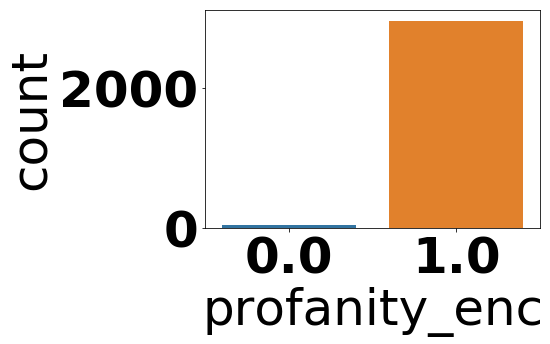

In [540]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='profanity_enc',data=rating_df)
plt.show()

In [541]:
rating_df

Unnamed: 0               review date        review update date  \
0              0  2019-08-20T15:30:31.543Z  2019-08-20T15:30:31.543Z   
1              1  2019-08-20T15:04:50.532Z  2019-08-20T15:04:50.532Z   
2              2  2019-08-20T14:32:59.186Z  2019-08-20T14:32:59.186Z   
3              3  2019-08-20T13:41:46.497Z  2019-08-20T13:41:46.497Z   
4              4  2019-08-20T13:28:47.074Z  2019-08-20T13:28:47.074Z   
5              5  2019-08-20T13:28:41.995Z  2019-08-20T13:28:41.995Z   
6              6  2019-08-20T13:16:18.439Z  2019-08-20T13:16:18.439Z   
7              7  2019-08-20T12:35:11.695Z  2019-08-20T12:35:11.695Z   
8              8  2019-08-20T12:04:21.090Z  2019-08-20T12:04:21.090Z   
9              9  2019-08-20T11:29:43.429Z  2019-08-20T11:29:43.429Z   
10            10  2019-08-20T10:32:46.322Z  2019-08-20T10:32:46.322Z   
11            11  2019-08-20T09:33:53.116Z  2019-08-20T09:33:53.124Z   
12            12  2019-08-20T08:59:12.124Z  2019-08-20T08:59:12.124Z   
13            13  2019-08-20T08:24:51.365Z  2019-08-20T08:24:51.365Z   
14            14  2019-08-20T06:24:25.399Z  2019-08-20T06:24:25.399Z   
15            15  2019-08-20T05:59:23.325Z  2019-08-20T05:59:23.325Z   
16            16  2019-08-20T05:33:49.812Z  2019-08-20T05:33:49.812Z   
17            17  2019-08-20T05:30:54.229Z  2019-08-20T05:30:54.229Z   
18            18  2019-08-20T04:40:22.431Z  2019-08-20T04:40:22.431Z   
19            19  2019-08-20T04:36:55.019Z  2019-08-20T04:36:55.019Z   
20            20  2019-08-20T04:34:43.032Z  2019-08-20T04:34:43.032Z   
21            21  2019-08-20T04:11:03.559Z  2019-08-20T04:11:03.559Z   
22            22  2019-08-20T03:06:27.454Z  2019-08-20T03:06:27.454Z   
23            23  2019-08-20T02:57:11.721Z  2019-08-20T02:57:11.721Z   
24            24  2019-08-20T02:37:18.691Z  2019-08-20T02:37:18.691Z   
25            25  2019-08-20T02:34:46.375Z  2019-08-20T02:34:46.375Z   
26            26  2019-08-20T02:25:39.687Z  2019-08-20T02:25:49.457Z   
27            27  2019-08-20T02:11:33.611Z  2019-08-20T02:11:33.611Z   
28            28  2019-08-20T02:11:07.817Z  2019-08-20T02:11:07.817Z   
29            29  2019-08-20T01:37:18.188Z  2019-08-20T01:37:18.188Z   
...          ...                       ...                       ...   
2970        2970  2019-08-02T03:33:00.863Z  2019-08-02T03:33:00.863Z   
2971        2971  2019-08-02T03:31:10.677Z  2019-08-02T03:31:10.677Z   
2972        2972  2019-08-02T03:27:04.216Z  2019-08-02T03:31:05.535Z   
2973        2973  2019-08-02T03:20:44.331Z  2019-08-02T03:20:44.331Z   
2974        2974  2019-08-02T03:20:02.214Z  2019-08-02T03:20:02.214Z   
2975        2975  2019-08-02T03:19:54.729Z  2019-08-02T03:19:54.732Z   
2976        2976  2019-08-02T03:15:06.117Z  2019-08-02T03:15:06.117Z   
2977        2977  2019-08-02T03:14:12.814Z  2019-08-02T03:14:12.814Z   
2978        2978  2019-08-02T03:12:39.608Z  2019-08-02T03:12:39.608Z   
2979        2979  2019-08-02T03:09:50.987Z  2019-08-02T03:09:50.987Z   
2980        2980  2019-08-02T03:08:58.413Z  2019-08-02T03:08:58.413Z   
2981        2981  2019-08-02T03:08:51.884Z  2019-08-02T03:08:51.884Z   
2982        2982  2019-08-02T03:08:22.901Z  2019-08-02T03:08:22.901Z   
2983        2983  2019-08-02T03:07:12.956Z  2019-08-02T03:07:12.956Z   
2984        2984  2019-08-02T02:56:04.833Z  2019-08-02T02:56:04.833Z   
2985        2985  2019-08-02T02:50:14.730Z  2019-08-02T02:50:14.730Z   
2986        2986  2019-08-02T02:39:34.418Z  2019-08-02T02:39:34.418Z   
2987        2987  2019-08-02T02:37:00.876Z  2019-08-02T02:37:00.876Z   
2988        2988  2019-08-02T02:36:56.143Z  2019-08-02T02:36:56.143Z   
2989        2989  2019-08-02T02:26:57.644Z  2019-08-02T02:26:57.644Z   
2990        2990  2019-08-02T02:25:55.425Z  2019-08-02T02:25:55.425Z   
2991        2991  2019-08-02T02:25:07.861Z  2019-08-02T02:25:07.861Z   
2992        2992  2019-08-02T02:22:36.532Z  2019-08-02T02:22:36.532Z   
2993        2993  2019-08-02T02:08:17.300Z  20

In [542]:
#display name is same as user name 
rating_df.drop('displayName',axis=1,inplace=True)

In [543]:
#Processing date columns
rating_df['timezone']=rating_df['review date'].apply(lambda x: str(x)[20:-1])

In [544]:
#To check if people of a particular region liked the movie more than other regions
rating_df['timezone'].value_counts()

202    9
478    8
493    8
374    8
219    8
559    8
452    8
161    8
653    8
377    8
696    8
444    7
408    7
728    7
958    7
698    7
399    7
397    7
028    7
790    7
616    7
578    7
647    7
179    7
863    7
555    7
006    7
186    7
629    7
561    7
      ..
826    1
824    1
723    1
542    1
178    1
011    1
268    1
205    1
746    1
573    1
901    1
815    1
905    1
877    1
430    1
954    1
385    1
072    1
288    1
545    1
552    1
654    1
591    1
949    1
583    1
833    1
880    1
316    1
292    1
766    1
Name: timezone, Length: 952, dtype: int64

In [545]:
d={}
for i in range(len(rating_df)):
    if rating_df['timezone'][i] not in d:
        x=rating_df[rating_df['timezone']==rating_df['timezone'][i]]['timezone'].count()
        if x>3:
            d[rating_df['timezone'][i]] =x  

In [546]:
rating_df.drop('timeFromCreation',axis=1,inplace=True)

In [547]:
rating_df.drop('review update date',axis=1,inplace=True)

In [548]:
rating_df.drop('review date',axis=1,inplace=True)

In [549]:
rating_df.drop('Unnamed: 0',axis=1,inplace=True)

In [550]:
rating_df['accountLink']

0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      1
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      1
       ..
2970    1
2971    0
2972    0
2973    0
2974    0
2975    1
2976    0
2977    0
2978    0
2979    0
2980    0
2981    1
2982    0
2983    0
2984    0
2985    0
2986    0
2987    1
2988    0
2989    1
2990    1
2991    1
2992    0
2993    0
2994    0
2995    1
2996    0
2997    0
2998    0
2999    0
Name: accountLink, Length: 3000, dtype: object

In [551]:
rating_df['accountLink']=rating_df['accountLink'].astype('int64')

In [552]:
rating_df['timezone']=rating_df['timezone'].astype('int64')

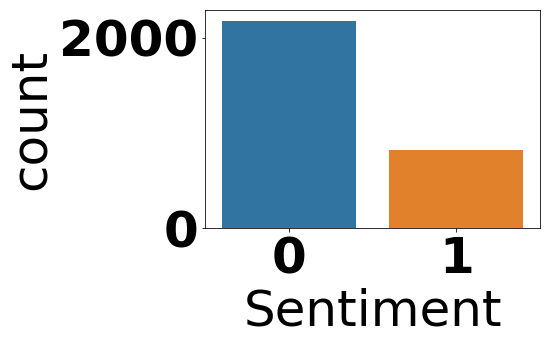

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sentiment',data=rating_df)
plt.show()

In [554]:
rating_df['Sentiment'].value_counts()

0    2178
1     822
Name: Sentiment, dtype: int64

# Breaking Dataset into Xs and y

In [555]:
X=rating_df.iloc[:,[0,1,3,4,5,6]]
y=rating_df.iloc[:,[2]]

In [556]:
y

Sentiment
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            1
8            0
9            1
10           0
11           1
12           0
13           1
14           0
15           0
16           0
17           0
18           0
19           1
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
...        ...
2970         0
2971         0
2972         1
2973         0
2974         0
2975         0
2976         0
2977         0
2978         0
2979         0
2980         0
2981         1
2982         0
2983         1
2984         0
2985         1
2986         0
2987         0
2988         0
2989         1
2990         0
2991         0
2992         0
2993         0
2994         0
2995         1
2996         0
2997         0
2998         0
2999         0

[3000 rows x 1 columns]

# Handling Data Imbalance 

In [557]:
num_cols=rating_df.columns[~(rating_df.columns).isin(['review','Sentiment'])]

In [558]:
y['Sentiment']=y['Sentiment'].astype('int64')

In [559]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=646)

# Fit on Data
os_data_x,os_data_y = smote.fit_sample(X[num_cols],(y))


In [560]:
os_data_x=pd.DataFrame(os_data_x)
os_data_y=pd.DataFrame(os_data_y)
#pd.DataFrame(os_data_y)

In [561]:
rating_df_smote=pd.DataFrame(pd.concat([os_data_x,os_data_y],axis=1))

In [562]:
rating_df_smote

0         1    2         3           4  0
0     0.000000  0.000000  1.0  1.000000  543.000000  0
1     0.000000  0.000000  1.0  1.000000  532.000000  0
2     0.000000  0.000000  1.0  1.000000  186.000000  0
3     0.000000  0.000000  1.0  1.000000  497.000000  0
4     1.000000  1.000000  1.0  0.000000   74.000000  0
5     0.000000  0.000000  1.0  1.000000  995.000000  0
6     0.000000  0.000000  1.0  1.000000  439.000000  0
7     0.000000  1.000000  1.0  1.000000  695.000000  1
8     0.000000  0.000000  1.0  1.000000   90.000000  0
9     0.000000  1.000000  1.0  1.000000  429.000000  1
10    0.000000  0.000000  1.0  1.000000  322.000000  0
11    1.000000  1.000000  1.0  0.000000  116.000000  1
12    0.000000  0.000000  1.0  1.000000  124.000000  0
13    1.000000  1.000000  1.0  0.000000  365.000000  1
14    0.000000  0.000000  1.0  1.000000  399.000000  0
15    0.000000  0.000000  1.0  1.000000  325.000000  0
16    1.000000  1.000000  1.0  0.000000  812.000000  0
17    0.000000  0.000000  1.0  1.000000  229.000000  0
18    0.000000  0.000000  1.0  1.000000  431.000000  0
19    0.000000  0.000000  1.0  1.000000   19.000000  1
20    0.000000  0.000000  1.0  1.000000   32.000000  0
21    0.000000  0.000000  1.0  1.000000  559.000000  0
22    0.000000  0.000000  1.0  1.000000  454.000000  0
23    0.000000  0.000000  1.0  1.000000  721.000000  0
24    0.000000  0.000000  1.0  1.000000  691.000000  0
25    0.000000  0.000000  1.0  1.000000  375.000000  0
26    1.000000  1.000000  1.0  0.000000  687.000000  0
27    0.000000  0.000000  1.0  1.000000  611.000000  0
28    0.000000  0.000000  1.0  1.000000  817.000000  0
29    1.000000  1.000000  1.0  0.000000  188.000000  0
...        ...       ...  ...       ...         ... ..
4326  0.712115  0.712115  1.0  0.287885   15.712115  1
4327  0.000000  0.000000  1.0  1.000000  566.310223  1
4328  0.611499  0.611499  1.0  0.388501   33.777003  1
4329  0.433088  0.433088  1.0  0.566912  657.866175  1
4330  0.039809  1.000000  1.0  0.960191  703.039809  1
4331  1.000000  1.000000  1.0  0.000000   29.000000  1
4332  0.000000  0.000000  1.0  1.000000   13.738462  1
4333  0.000000  0.000000  1.0  1.000000  942.796322  1
4334  0.504264  0.504264  1.0  0.495736  137.008528  1
4335  0.575916  0.575916  1.0  0.424084  995.848168  1
4336  1.000000  1.000000  1.0  0.000000  595.914923  1
4337  0.117713  0.117713  1.0  0.882287  365.646861  1
4338  0.242001  1.000000  1.0  0.757999  585.968006  1
4339  0.716035  0.716035  1.0  0.283965  791.432070  1
4340  0.802902  0.802902  1.0  0.197098  504.197098  1
4341  0.069629  0.069629  1.0  0.930371   15.069629  1
4342  0.222796  0.222796  1.0  0.777204  469.108815  1
4343  0.000000  0.000000  1.0  1.000000  154.497997  1
4344  0.000000  0.409627  1.0  1.000000  202.590373  1
4345  0.808477  0.808477  1.0  0.191523  956.000000  1
4346  0.136453  0.136453  1.0  0.863547  432.590640  1
4347  1.000000  1.000000  1.0  0.000000  561.000000  1
4348  1.000000  1.000000  1.0  0.000000  259.000000  1
4349  0.000000  0.000000  1.0  1.000000  126.586514  1
4350  0.201486  0.201486  1.0  0.798514  304.194056  1
4351  1.000000  1.000000  1.0  0.000000  259.000000  1
4352  0.000000  0.196776  1.0  1.000000  764.016122  1
4353  0.000000  0.000000  1.0  1.000000  410.685286  1
4354  1.000000  1.000000  1.0  0.000000  467.747844  1
4355  0.881896  0.881896  1.0  0.118104  956.000000  1

[4356 rows x 6 columns]

In [563]:
rating_df_smote

0         1    2         3           4  0
0     0.000000  0.000000  1.0  1.000000  543.000000  0
1     0.000000  0.000000  1.0  1.000000  532.000000  0
2     0.000000  0.000000  1.0  1.000000  186.000000  0
3     0.000000  0.000000  1.0  1.000000  497.000000  0
4     1.000000  1.000000  1.0  0.000000   74.000000  0
5     0.000000  0.000000  1.0  1.000000  995.000000  0
6     0.000000  0.000000  1.0  1.000000  439.000000  0
7     0.000000  1.000000  1.0  1.000000  695.000000  1
8     0.000000  0.000000  1.0  1.000000   90.000000  0
9     0.000000  1.000000  1.0  1.000000  429.000000  1
10    0.000000  0.000000  1.0  1.000000  322.000000  0
11    1.000000  1.000000  1.0  0.000000  116.000000  1
12    0.000000  0.000000  1.0  1.000000  124.000000  0
13    1.000000  1.000000  1.0  0.000000  365.000000  1
14    0.000000  0.000000  1.0  1.000000  399.000000  0
15    0.000000  0.000000  1.0  1.000000  325.000000  0
16    1.000000  1.000000  1.0  0.000000  812.000000  0
17    0.000000  0.000000  1.0  1.000000  229.000000  0
18    0.000000  0.000000  1.0  1.000000  431.000000  0
19    0.000000  0.000000  1.0  1.000000   19.000000  1
20    0.000000  0.000000  1.0  1.000000   32.000000  0
21    0.000000  0.000000  1.0  1.000000  559.000000  0
22    0.000000  0.000000  1.0  1.000000  454.000000  0
23    0.000000  0.000000  1.0  1.000000  721.000000  0
24    0.000000  0.000000  1.0  1.000000  691.000000  0
25    0.000000  0.000000  1.0  1.000000  375.000000  0
26    1.000000  1.000000  1.0  0.000000  687.000000  0
27    0.000000  0.000000  1.0  1.000000  611.000000  0
28    0.000000  0.000000  1.0  1.000000  817.000000  0
29    1.000000  1.000000  1.0  0.000000  188.000000  0
...        ...       ...  ...       ...         ... ..
4326  0.712115  0.712115  1.0  0.287885   15.712115  1
4327  0.000000  0.000000  1.0  1.000000  566.310223  1
4328  0.611499  0.611499  1.0  0.388501   33.777003  1
4329  0.433088  0.433088  1.0  0.566912  657.866175  1
4330  0.039809  1.000000  1.0  0.960191  703.039809  1
4331  1.000000  1.000000  1.0  0.000000   29.000000  1
4332  0.000000  0.000000  1.0  1.000000   13.738462  1
4333  0.000000  0.000000  1.0  1.000000  942.796322  1
4334  0.504264  0.504264  1.0  0.495736  137.008528  1
4335  0.575916  0.575916  1.0  0.424084  995.848168  1
4336  1.000000  1.000000  1.0  0.000000  595.914923  1
4337  0.117713  0.117713  1.0  0.882287  365.646861  1
4338  0.242001  1.000000  1.0  0.757999  585.968006  1
4339  0.716035  0.716035  1.0  0.283965  791.432070  1
4340  0.802902  0.802902  1.0  0.197098  504.197098  1
4341  0.069629  0.069629  1.0  0.930371   15.069629  1
4342  0.222796  0.222796  1.0  0.777204  469.108815  1
4343  0.000000  0.000000  1.0  1.000000  154.497997  1
4344  0.000000  0.409627  1.0  1.000000  202.590373  1
4345  0.808477  0.808477  1.0  0.191523  956.000000  1
4346  0.136453  0.136453  1.0  0.863547  432.590640  1
4347  1.000000  1.000000  1.0  0.000000  561.000000  1
4348  1.000000  1.000000  1.0  0.000000  259.000000  1
4349  0.000000  0.000000  1.0  1.000000  126.586514  1
4350  0.201486  0.201486  1.0  0.798514  304.194056  1
4351  1.000000  1.000000  1.0  0.000000  259.000000  1
4352  0.000000  0.196776  1.0  1.000000  764.016122  1
4353  0.000000  0.000000  1.0  1.000000  410.685286  1
4354  1.000000  1.000000  1.0  0.000000  467.747844  1
4355  0.881896  0.881896  1.0  0.118104  956.000000  1

[4356 rows x 6 columns]

In [564]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
review                       3000 non-null object
accountLink                  3000 non-null int64
Sentiment                    3000 non-null category
user Account Verified_enc    3000 non-null float64
profanity_enc                3000 non-null float64
realm_enc                    3000 non-null float64
timezone                     3000 non-null int64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 143.7+ KB


# Text Processing

In [565]:
df=rating_df['review']

In [566]:
df=str(df)

In [567]:
rating_df['review']

0       Beautiful Movie!  Enjoyed seeing the mammals, ...
1       Good, some great lines, funny but some parts w...
2       I always loved the original! This Version was ...
3       Great animation of real animals. Scenery beaut...
4                                  #1 Movie in the world 
5                                Very funny, and poignant
6             Wonderful movie. Loved everything about it.
7       technically wonderful but the story needed a l...
8                         Loved it nothing I didn’t liked
9       With the exception of the impressive look of t...
10      I am really not a fan of Beyonc and I believe ...
11                       Daft - its meant to be a cartoon
12      Beautifully made movie.  Absolutely loved this...
13      It is a beautiful film but at its core it is a...
14      Super cool graphics made me super emotional 12...
15              Amazing! Loved it from beginning to end 💕
16      Beautiful movie.... Master-crafted....lives up...
17      It's a

In [568]:
from nltk.corpus import RegexpTokenizer as regextoken

tokenizer = regextoken('\w+')
print(tokenizer)

tokens = tokenizer.tokenize(df)
print(tokens)

RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)
['0', 'Beautiful', 'Movie', 'Enjoyed', 'seeing', 'the', 'mammals', '1', 'Good', 'some', 'great', 'lines', 'funny', 'but', 'some', 'parts', 'w', '2', 'I', 'always', 'loved', 'the', 'original', 'This', 'Version', 'was', '3', 'Great', 'animation', 'of', 'real', 'animals', 'Scenery', 'beaut', '4', '1', 'Movie', 'in', 'the', 'world', '5', 'Very', 'funny', 'and', 'poignant', '6', 'Wonderful', 'movie', 'Loved', 'everything', 'about', 'it', '7', 'technically', 'wonderful', 'but', 'the', 'story', 'needed', 'a', 'l', '8', 'Loved', 'it', 'nothing', 'I', 'didn', 't', 'liked', '9', 'With', 'the', 'exception', 'of', 'the', 'impressive', 'look', 'of', 't', '10', 'I', 'am', 'really', 'not', 'a', 'fan', 'of', 'Beyonc', 'and', 'I', 'believe', '11', 'Daft', 'its', 'meant', 'to', 'be', 'a', 'cartoon', '12', 'Beautifully', 'made', 'movie', 'Absolutely', 'loved', 'this', '13', 'It', 'is', 'a', 'be

In [569]:
#Converting words in lower case
tokens= [token.lower() for token in tokens]
print(tokens)

['0', 'beautiful', 'movie', 'enjoyed', 'seeing', 'the', 'mammals', '1', 'good', 'some', 'great', 'lines', 'funny', 'but', 'some', 'parts', 'w', '2', 'i', 'always', 'loved', 'the', 'original', 'this', 'version', 'was', '3', 'great', 'animation', 'of', 'real', 'animals', 'scenery', 'beaut', '4', '1', 'movie', 'in', 'the', 'world', '5', 'very', 'funny', 'and', 'poignant', '6', 'wonderful', 'movie', 'loved', 'everything', 'about', 'it', '7', 'technically', 'wonderful', 'but', 'the', 'story', 'needed', 'a', 'l', '8', 'loved', 'it', 'nothing', 'i', 'didn', 't', 'liked', '9', 'with', 'the', 'exception', 'of', 'the', 'impressive', 'look', 'of', 't', '10', 'i', 'am', 'really', 'not', 'a', 'fan', 'of', 'beyonc', 'and', 'i', 'believe', '11', 'daft', 'its', 'meant', 'to', 'be', 'a', 'cartoon', '12', 'beautifully', 'made', 'movie', 'absolutely', 'loved', 'this', '13', 'it', 'is', 'a', 'beautiful', 'film', 'but', 'at', 'its', 'core', 'it', 'is', 'a', '14', 'super', 'cool', 'graphics', 'made', 'me', 

In [570]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [571]:
stop=stopwords.words('english')
tokens=[token for token in tokens if token not in stop]

In [572]:
print(tokens)

['0', 'beautiful', 'movie', 'enjoyed', 'seeing', 'mammals', '1', 'good', 'great', 'lines', 'funny', 'parts', 'w', '2', 'always', 'loved', 'original', 'version', '3', 'great', 'animation', 'real', 'animals', 'scenery', 'beaut', '4', '1', 'movie', 'world', '5', 'funny', 'poignant', '6', 'wonderful', 'movie', 'loved', 'everything', '7', 'technically', 'wonderful', 'story', 'needed', 'l', '8', 'loved', 'nothing', 'liked', '9', 'exception', 'impressive', 'look', '10', 'really', 'fan', 'beyonc', 'believe', '11', 'daft', 'meant', 'cartoon', '12', 'beautifully', 'made', 'movie', 'absolutely', 'loved', '13', 'beautiful', 'film', 'core', '14', 'super', 'cool', 'graphics', 'made', 'super', 'emotional', '12', '15', 'amazing', 'loved', 'beginning', 'end', '16', 'beautiful', 'movie', 'master', 'crafted', 'lives', '17', 'must', 'watch', 'always', 'loved', '18', 'realistic', 'loved', 'much', '19', 'ok', 'build', 'huge', '20', 'loved', 'everything', 'movie', 'w', '21', 'liked', 'loved', 'original', 've

## Word Cloud

In [573]:
#!pip install wordcloud
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


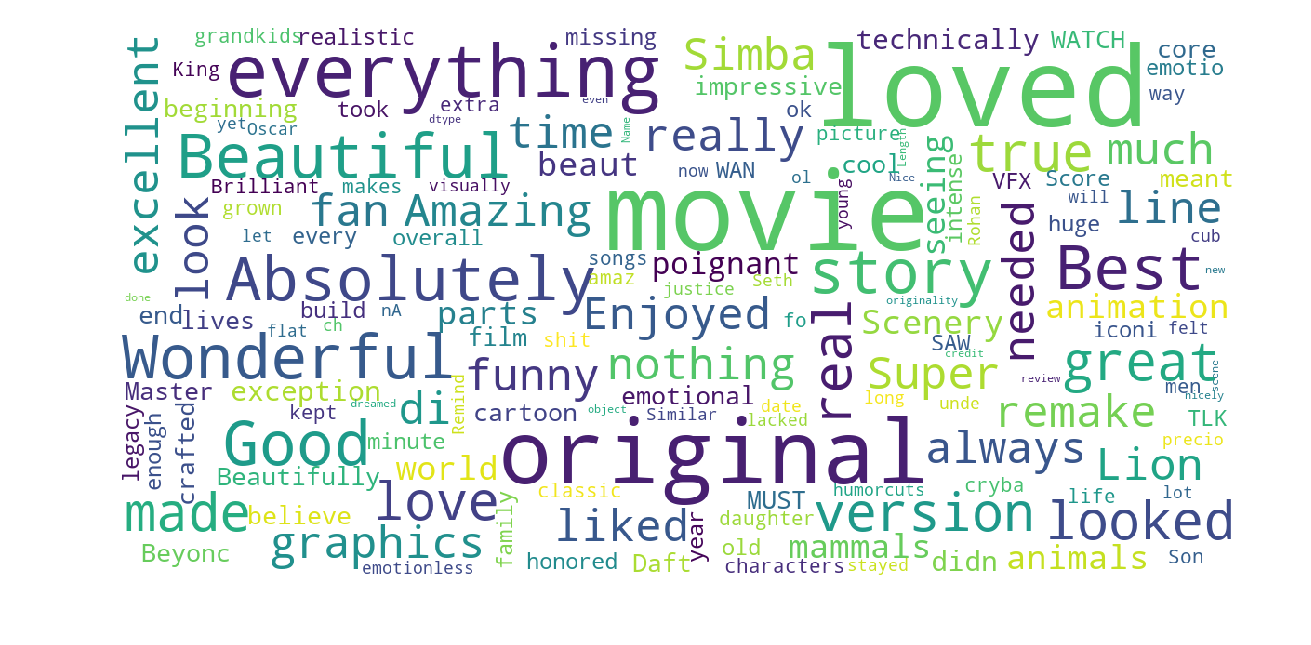

In [574]:
show_wordcloud(rating_df['review'])

# People mostly talking good about the movie

## Plotting frequency of words with stopwords removed

In [575]:
values, counts = np.unique(tokens, return_counts=True)
#all_values, all_counts = np.unique(tokens, return_counts=True)

In [576]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
#all_sorted_indices = np.argsort(-all_counts)
#print(all_sorted_indices)

[148 157 171 102 199  72 215  61 115  68 180 145 147 149 206 208 118  53
 137  55 166 162  62  64 144 141 158 182 183  89 117 138   1  97 113 194
   4 103 200 211 152 123 122 153 121 124 120 119 155 156 154 151 135 134
 136 133 132 139 131 140 150 130 142 143 128 146 127 126 129 125   0 160
 192 193 195 196 197 198 201 202 203 204 205 207 209 210 212 213 214 216
 217 191 190 189 188 161 163 165 167 168 169 170 172 173 159 174 176 177
 178 179 181 184 185 186 187 175 164 109 114  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  28  27  26  25
   2   3   5   6   7   8   9  10  11  12  50  13  15  16  17  18  19  20
  21  22  23  24  14  51  52  54  87  88  90  91  92  93  94  95  96  98
  86  99 101 104 105 106 107 108 218 110 111 112 100 116  85  83  56  57
  58  59  60  63  65  66  67  69  84  70  73  74  75  76  77  78  79  80
  81  82  71 219]


In [577]:
values = values[sorted_indices]
counts = counts[sorted_indices]

In [578]:
type(values)

numpy.ndarray

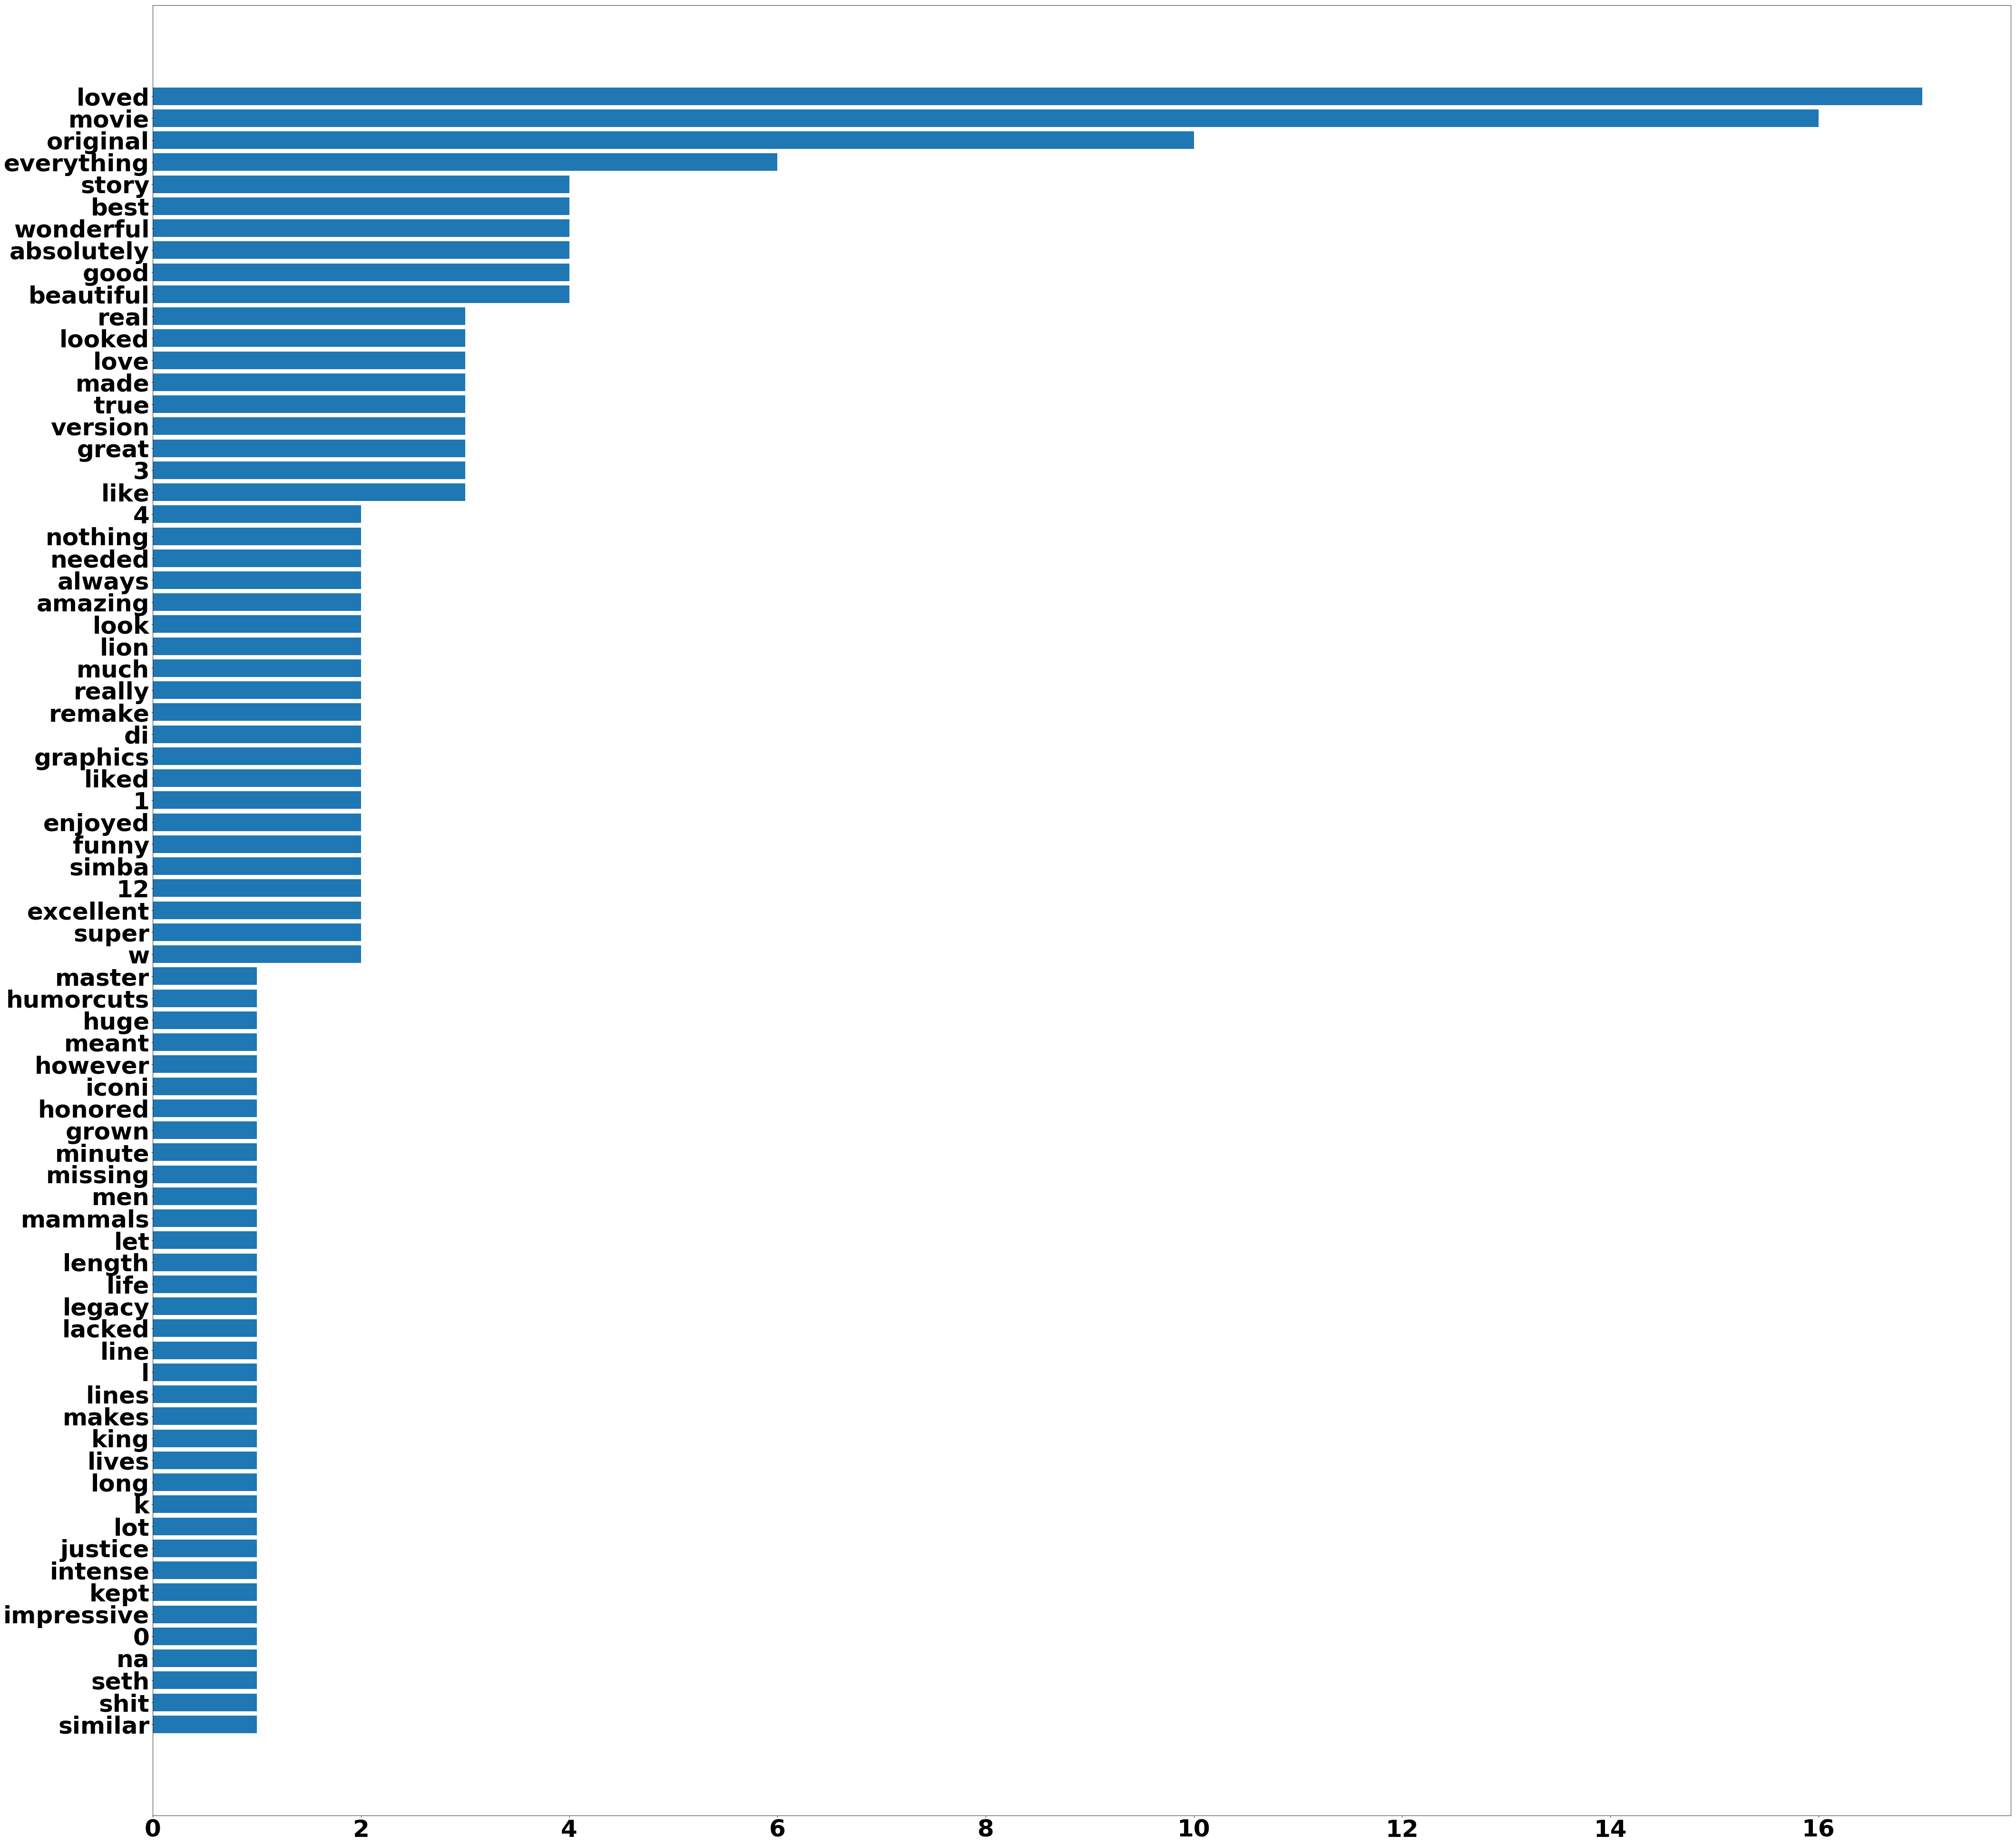

In [579]:
import warnings
warnings.filterwarnings('ignore')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

# Inference : People are mostly talking good about the movie which we can see by having highh frequency words like loved,original, best,story, beautiful,wonderful etc .

# movie is a stopword that we can add to customised stopwords

In [580]:
#Removing numbers from reviews
def remove_numbers(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

In [581]:
#Stemmers
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In [582]:
porter_tokens=[porter.stem(token) for token in tokens]
print(porter_tokens)

['0', 'beauti', 'movi', 'enjoy', 'see', 'mammal', '1', 'good', 'great', 'line', 'funni', 'part', 'w', '2', 'alway', 'love', 'origin', 'version', '3', 'great', 'anim', 'real', 'anim', 'sceneri', 'beaut', '4', '1', 'movi', 'world', '5', 'funni', 'poignant', '6', 'wonder', 'movi', 'love', 'everyth', '7', 'technic', 'wonder', 'stori', 'need', 'l', '8', 'love', 'noth', 'like', '9', 'except', 'impress', 'look', '10', 'realli', 'fan', 'beyonc', 'believ', '11', 'daft', 'meant', 'cartoon', '12', 'beauti', 'made', 'movi', 'absolut', 'love', '13', 'beauti', 'film', 'core', '14', 'super', 'cool', 'graphic', 'made', 'super', 'emot', '12', '15', 'amaz', 'love', 'begin', 'end', '16', 'beauti', 'movi', 'master', 'craft', 'live', '17', 'must', 'watch', 'alway', 'love', '18', 'realist', 'love', 'much', '19', 'ok', 'build', 'huge', '20', 'love', 'everyth', 'movi', 'w', '21', 'like', 'love', 'origin', 'version', '22', 'everyth', 'love', '23', 'wonder', 'famili', 'movi', '24', 'took', '3', 'year', 'old', '

In [583]:
# WordNetLemmatizer and porter tokens

In [584]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

In [585]:
lmtzr = WordNetLemmatizer()
lmtzr_tokens =[lmtzr.lemmatize(token) for token in tokens]
print(lmtzr_tokens)

['0', 'beautiful', 'movie', 'enjoyed', 'seeing', 'mammal', '1', 'good', 'great', 'line', 'funny', 'part', 'w', '2', 'always', 'loved', 'original', 'version', '3', 'great', 'animation', 'real', 'animal', 'scenery', 'beaut', '4', '1', 'movie', 'world', '5', 'funny', 'poignant', '6', 'wonderful', 'movie', 'loved', 'everything', '7', 'technically', 'wonderful', 'story', 'needed', 'l', '8', 'loved', 'nothing', 'liked', '9', 'exception', 'impressive', 'look', '10', 'really', 'fan', 'beyonc', 'believe', '11', 'daft', 'meant', 'cartoon', '12', 'beautifully', 'made', 'movie', 'absolutely', 'loved', '13', 'beautiful', 'film', 'core', '14', 'super', 'cool', 'graphic', 'made', 'super', 'emotional', '12', '15', 'amazing', 'loved', 'beginning', 'end', '16', 'beautiful', 'movie', 'master', 'crafted', 'life', '17', 'must', 'watch', 'always', 'loved', '18', 'realistic', 'loved', 'much', '19', 'ok', 'build', 'huge', '20', 'loved', 'everything', 'movie', 'w', '21', 'liked', 'loved', 'original', 'version'

In [586]:
tokens

['0',
 'beautiful',
 'movie',
 'enjoyed',
 'seeing',
 'mammals',
 '1',
 'good',
 'great',
 'lines',
 'funny',
 'parts',
 'w',
 '2',
 'always',
 'loved',
 'original',
 'version',
 '3',
 'great',
 'animation',
 'real',
 'animals',
 'scenery',
 'beaut',
 '4',
 '1',
 'movie',
 'world',
 '5',
 'funny',
 'poignant',
 '6',
 'wonderful',
 'movie',
 'loved',
 'everything',
 '7',
 'technically',
 'wonderful',
 'story',
 'needed',
 'l',
 '8',
 'loved',
 'nothing',
 'liked',
 '9',
 'exception',
 'impressive',
 'look',
 '10',
 'really',
 'fan',
 'beyonc',
 'believe',
 '11',
 'daft',
 'meant',
 'cartoon',
 '12',
 'beautifully',
 'made',
 'movie',
 'absolutely',
 'loved',
 '13',
 'beautiful',
 'film',
 'core',
 '14',
 'super',
 'cool',
 'graphics',
 'made',
 'super',
 'emotional',
 '12',
 '15',
 'amazing',
 'loved',
 'beginning',
 'end',
 '16',
 'beautiful',
 'movie',
 'master',
 'crafted',
 'lives',
 '17',
 'must',
 'watch',
 'always',
 'loved',
 '18',
 'realistic',
 'loved',
 'much',
 '19',
 'ok',


# Defining function for plotting ngram frequency distribution

In [587]:
def plot_freqdist_freq(fd,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2):
    """
    As of NLTK version 3.2.1, FreqDist.plot() plots the counts 
    and has no kwarg for normalising to frequency. 
    Work this around here.
    
    INPUT:
        - the FreqDist object
        - max_num: if specified, only plot up to this number of items 
          (they are already sorted descending by the FreqDist)
        - cumulative: bool (defaults to False)
        - title: the title to give the plot
        - linewidth: the width of line to use (defaults to 2)
    OUTPUT: plot the freq and return None.
    """

    tmp = fd.copy()
    norm = fd.N()
    for key in tmp.keys():
        tmp[key] = float(fd[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative, 
                 title=title, 
                 linewidth=linewidth)

    return

In [588]:
#creating ngrams to capture context(n=3)

In [589]:
import nltk
ngram_freq = nltk.FreqDist()
tmp = 0
for ngram in nltk.ngrams(porter_tokens, 3):
    print (ngram,)
    tmp += 1
print(tmp)

('0', 'beauti', 'movi')
('beauti', 'movi', 'enjoy')
('movi', 'enjoy', 'see')
('enjoy', 'see', 'mammal')
('see', 'mammal', '1')
('mammal', '1', 'good')
('1', 'good', 'great')
('good', 'great', 'line')
('great', 'line', 'funni')
('line', 'funni', 'part')
('funni', 'part', 'w')
('part', 'w', '2')
('w', '2', 'alway')
('2', 'alway', 'love')
('alway', 'love', 'origin')
('love', 'origin', 'version')
('origin', 'version', '3')
('version', '3', 'great')
('3', 'great', 'anim')
('great', 'anim', 'real')
('anim', 'real', 'anim')
('real', 'anim', 'sceneri')
('anim', 'sceneri', 'beaut')
('sceneri', 'beaut', '4')
('beaut', '4', '1')
('4', '1', 'movi')
('1', 'movi', 'world')
('movi', 'world', '5')
('world', '5', 'funni')
('5', 'funni', 'poignant')
('funni', 'poignant', '6')
('poignant', '6', 'wonder')
('6', 'wonder', 'movi')
('wonder', 'movi', 'love')
('movi', 'love', 'everyth')
('love', 'everyth', '7')
('everyth', '7', 'technic')
('7', 'technic', 'wonder')
('technic', 'wonder', 'stori')
('wonder', 's

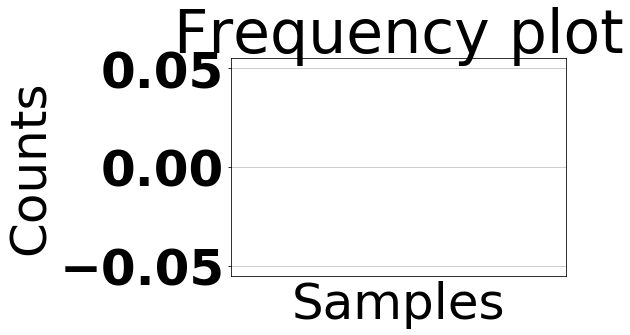

In [590]:
import warnings
warnings.filterwarnings('ignore')
plot_freqdist_freq(ngram_freq,
                    10,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)

In [591]:
#FREQUENCY COUNTER for 1gram

ngram_freq = nltk.FreqDist() 

for ngram in nltk.ngrams(porter_tokens, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('love',), 20),
 (('movi',), 16),
 (('origin',), 11),
 (('everyth',), 6),
 (('beauti',), 5),
 (('like',), 5),
 (('look',), 5),
 (('good',), 4),
 (('wonder',), 4),
 (('stori',), 4)]

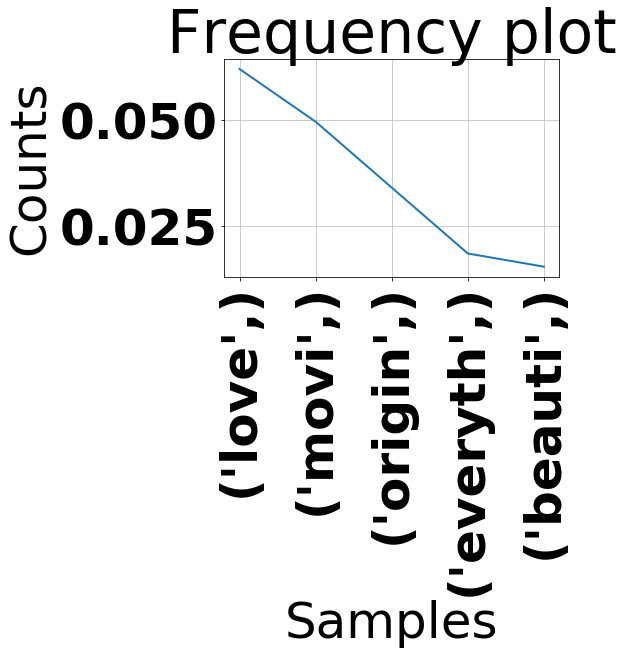

In [592]:
import warnings
warnings.filterwarnings('ignore')
plot_freqdist_freq(ngram_freq,
                       5,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)

In [593]:
#FREQUENCY COUNTER 2grams

ngram_freq = nltk.FreqDist() 

for ngram in nltk.ngrams(porter_tokens, 2):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('love', 'everyth'), 4),
 (('beauti', 'movi'), 2),
 (('alway', 'love'), 2),
 (('love', 'origin'), 2),
 (('origin', 'version'), 2),
 (('wonder', 'stori'), 2),
 (('made', 'movi'), 2),
 (('absolut', 'love'), 2),
 (('like', 'origin'), 2),
 (('look', 'real'), 2)]

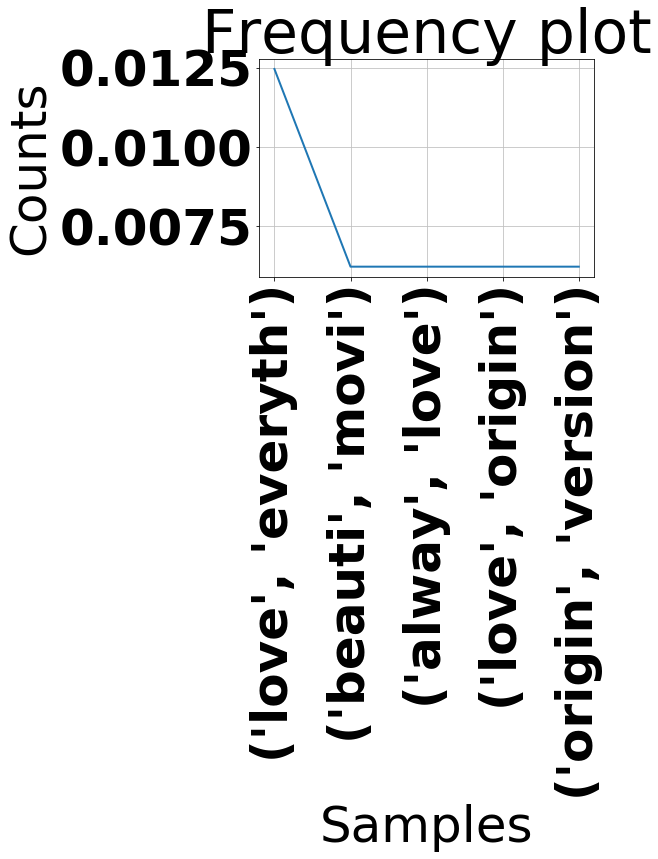

In [594]:
import warnings
warnings.filterwarnings('ignore')
plot_freqdist_freq(ngram_freq,
                       5,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)

In [595]:
#FREQUENCY COUNTER 3grams

ngram_freq = nltk.FreqDist() 

for ngram in nltk.ngrams(porter_tokens, 3):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('love', 'origin', 'version'), 2),
 (('0', 'beauti', 'movi'), 1),
 (('beauti', 'movi', 'enjoy'), 1),
 (('movi', 'enjoy', 'see'), 1),
 (('enjoy', 'see', 'mammal'), 1),
 (('see', 'mammal', '1'), 1),
 (('mammal', '1', 'good'), 1),
 (('1', 'good', 'great'), 1),
 (('good', 'great', 'line'), 1),
 (('great', 'line', 'funni'), 1)]

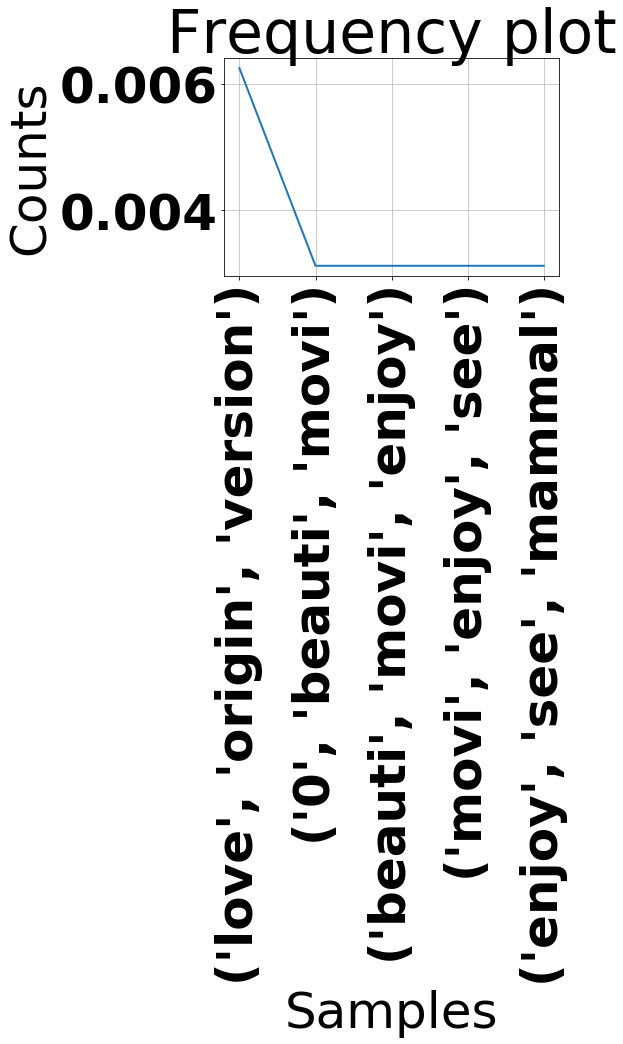

In [596]:
import warnings
warnings.filterwarnings('ignore')
plot_freqdist_freq(ngram_freq,
                       5,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)

In [597]:
#TFIDF MATRIX CREATION

In [598]:
## Adding Custom stopwords to the spacy stopword list
#customize_stop_words = ['Movie','Lion','King']

In [599]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
for doc in rating_df['review']:
    print(' '.join(word for word in doc.split() if word not in ENGLISH_STOP_WORDS))

Beautiful Movie! Enjoyed seeing mammals, plus wildlife live Africa.
Good, great lines, funny parts slow
I loved original! This Version great! Made feel like kid again!
Great animation real animals. Scenery beautifully done.
#1 Movie world
Very funny, poignant
Wonderful movie. Loved it.
technically wonderful story needed little help
Loved I didn’t liked
With exception impressive look film, new brought Lion King story.
I really fan Beyonc I believe couldve picked somebody play role I like took song add new single
Daft - meant cartoon
Beautifully movie. Absolutely loved movie. The negative thing young children afraid violent parts.
It beautiful film core unnecessary film . Almost original film little added make stand .
Super cool graphics super emotional 12/10 experience!
Amazing! Loved beginning end 💕
Beautiful movie.... Master-crafted....lives original!
It's MUST WATCH!!!! I LOVED Lion King!!!!!
How realistic was, loved much.
It just ok. The build huge really let animals voices expressi

I truly enjoyed movie story music. Had great cast
All animals life-like real! I dont know that! WONDERFUL! Loved it!
Very good movie little violent young kids maybe
awesome!!!
Animation good. Nearly line exact old movie boring. Besides way movie looks exact same. Dont really understand remade one. At Aladdin remake changes story line new songs fresh entertaining
Not original, just special.
hype didn't meet expectations
While rated PG, appropriate fourth fifth graders & up.
Very good adaptation original cartoon realistic looking animation.
Wonderful pretty close original!
Loved it. I loved original cartoon I shot tell love.
Same history, realist. Good work.
This story grow old....just fresh perspective wonderful!
I fell asleep times. Animated movie better.
VERY BEAUTIFUL. The CGI looked genuinely amazing that's I really say. The animated better. At brought James Earl Jones. However SETH ROGAN NOT PUMBA. I picture Pumba stoner
It wonderful!! My family loved it! There change. It perfect!!

Disney live action remakes irk end. They feel unoriginal like cash grabs. Often times seek fix "problem" present original. The movie felt uninspired lacked charm original animation provide. The lions unexpressive emphasis making realistic making compelling movie.
timon pumba funny. sad.
It ok Previously animated movie better
Simply incredible. Must see.
Beginning slow graphics wonderful.
Beautiful combo photos Disney magic. Beautiful story too.
It good general, definitely enjoyed Seth Rogen Pumba.
Although rated PG I animal fight scenes scary 5 under. The movie beautifully crafted artistic sense singing dancing charming original fell flat. I original time.
I loved Lion King! I’m going grandson.❤️
A twist original. Excellent new generation children watchjng
My teenage son I went today thought amazing. He wasn't close born original came out, course he's seen dozens times. Now he's gamer video maker/editor. He warned walking overly critical agreed needed theaters gone. Even knew storyline

Really nice entertaining movie, CGI awesome!,
Body language animals
Dull movie. The voice performances good imitation instances. Musical performances vocally impressive visually uninspiring especially compared original film.
The lion king felt like spectacle film, did amazing CGI cinematography, ultimately fall flat. I'm sure just me, felt voice acting little stale, having little emotion performance. Additionally CGI fantastic models animals failed giving facial expressions. This make events film (which we're familiar with) feel like impact characters. Overall true lion king original writing direction, felt little uninspired. Having said i'm aware I probably minority friends family enjoyed much.
The animation awesome! Great characters
The music beginning irritating. The animals realistic plus original version. However, original version better. Music sound effects better version
Good service great experience
Followed original cartoon film entirely same. Enjoyable movie watch. Nice incor

Soooooo Lion King. Yeaaaaaa. I've got rant spoilers event you've seen original. There's warning.... The Lion King remake. What I say movie super incredibly disappointing. More disappointing remake recent memory. Here's great. The casting suuuuuuuuuper fantastic. Everyone sounded like original cast. Whether intentional just happy circumstance, I don't care. Well done. Visuals? Impressive ever. It looked I imagine Serengeti look. Music? Also, done. Very done. With exception 'Can You Feel Love Tonight?' We Beyonce. You pipes. You're trash I don't care says. Your music sucks destroy song clearly want people know you're singer. FUCK OFF! All right. Now I've got great stuff way you're probably thinking I typo I said disappointing. I didn't. Despite things, missing important piece movie classic...EMOTION! There emotion displayed creatures given moment. The quintessential scene Simba trying dead father should've gotten me, 30 year old man, bawl eyes tears. Not. One. Shred. Of. Sadness. The car

As I love Disney, film just I felt like I watching nature documentary added voice (but well). It's like voices didn't really gel creatures, audio levels balance properly (sometimes loud scene, times quiet, character forefront sound like distance, distance sound like you). The characters amazingly realistic....to point basically emotionless I didn't feel connection them. Also...I know she's "queen B", Beyonce really needs learn that, duet, there's lead - voices need blend unison. Instead, I felt like determined voice star. In contrast, humour point actual star started riffing, clever, fine supporting cast vocals over-power lead..? I looking forward film, I've seen it, it's actually excited future live action releases.
I didnt like voices nala simba.
We loved it!!! Suck wonderful movie family time 😊
Great cgi just emotion characters punch talk
animation impressive, shows strength Disney. It great remember memories childhood, different animals didn't face impressions.
As expected - great!

Super great. My grands brother loved
Unfortunately, movie.
I dislike isn't real scar song
I thought great, did 7 yr old granddaughter. realistic. little violent animated one.
I loved did kids!!!
Stunning visual. The story lost original
It great. I seen animated movie, musical, version. It far favorite
Was film needed? That's big question audience members minds going (supposedly) live action adaptation masterpiece lion king. Just like great quantity remakes Disney classics released movie relies greatly nostalgia. Although people say awful way art feature film making. It does work I self enjoying film throughout, great songs, voice work photorealistic environment I've seen. Without felling like so-called cash grab know be. Unfortunately, does make people think geniuses worked original film aren't appreciated be. It's people taking credit work did years ago. But come film hoping beautiful, fun experience reminds great company happy.
Very good. The movie stayed close original. A lot comedy

The cinematography unbelievable. It looks real.
I mean movie realistic good that’s liked I’d recommend lot people watch
The lack animals facial expressions sadly stole emotion movie wanted transfer
Beautiful imagery movie felt somewhat flat unnecessary. Also best songs short.
The movie different cartoon. It realistic. The graphics excellent.
Great big screen. Liked followed classic story line.
Very good version original story
After minutes, I felt like animals real. Great computer work. Fun movie!
Beautifully done! Everything realistic.....down breathing stars dust kicked simba nala running. Music wonderful.....we again!
Same exact movie frame frame. Worse singing hot funny
One best movies Ive seen. Very done!!
It stunningly beautiful done. My complaint I wish fun branched original little. It TOO like original. I mean, yeah, original absolutely perfect, that's point. If movie perfect, remake needs good way, don't just copy it. I would've loved backstory Scar maybe Mufasa's childhood. T

We liked it, really liked best.
I’m HUGE Disney fan VERY opinionated remakes. This movie AMAZING!! It just good original.
So nostalgically satisfying. Bring tissues!!!
Even saw original Disney, life like characters scenes awesome.
Incredible movie. Loved music, scenery animation animals amazing!
I liked movie...I again...
I think nice, cartoon.
Had hard time getting Mufassah died, thoroughly enjoyed
What beautiful story powerful message folks ages
I loved movie. The 3D portion biot great idea. The glasses did work all. If additional cost 3D definitely worth it!
Thought animated version heartwarming animals expression. I did like movie, slow. My grandchildren, seeing animated version agreed liked version more. Sometimes new isnt better..,
Unfortunate movie meant children try make dark edgy. This movie scare young tender hearted. On positive, graphics animals unreal. You swear watching real animals.
This remake stayed true original story line. So loved original love remake addition cinem

While CGI rightfully lauded, resulting consequence animals don't emote, backdrop isn't vivid illustrated version. What doesn't help voice acting sounds like table read, script lifted original that, unfortunately, cut best lines.
So realistic! Stuck original movie.
The movie just word word identical re-make original animated version I shown 2 yr old grandson 3 days taking film didn't 5 stars, digital animals voice-over work fantastic
The best movie 2019! Great job keeping excitement, comedy values aligned
Awesome realism Excellent Story Lind enjoyable watch
I LOOOVED live action! Best Disney yet! If fan lion king old days, definitely you! It's realistic close matching original! Some parts changed make "realistic" I loved all! I buying movie! Don't 3D, regular theater IMAX.
wife loved it!
Amazing movie! Highly recommend!
This awesome version Lion King. I read people disappointed, im sure be. If liked original youll love version!
Live action killed movie
My favorite movie time Lion King. 

The animation outstanding. Having said that, movie disappointing. First all, drags on, 40-50 minute long introduction leads climax plot, boring death. Second, animals anatomically accurate. Disney castrated all, God forbid kids reproductive organs (eyeroll). Third, lot violence, inappropriate family movie. Fourth, singing theatrical, top. So, that's list problems I saw movie. A well-executed mess.
I thoroughly enjoyed it. It exactly I expected be. Of course original animation course differences. I enjoyed was, new version old favorite!
It didn’t live original casting artistic choices
Just good animated version
Absolutely loved it. It felt I running animals!!
It lacked lot fun emotion original movie.
cry, smile laugh.
Different! I wasnt sure expect good.
I just loved movie
Same movie new animation. Better cartoon format, unless like Homeward Bound.
I like movie characters sword singing movie planes exact like cartoon books I really appreciate people did thank
Incredible animation, littl

I think better original! The Visuals stunning! The Documentary feeling, Favrou managed preserve best compliment heartfelt drama! Every Voice actor killed respective role. In eyes, voice acting Pumba (Seth Rogen) Scar (Chiwetel Ejiofor) outstanding opinion! The realism achieved draws brain doesn't really care lions fight real life Simba scar. Must opinion!
Great movie. Felt nostalgia. The cgi felt cranky.
I think movie good reminds good old days I admit movie better
It honestly just okay. I’m huge Disney fan, I choose animated version time. The characters showed little emotion (I understand they’re animals, little helped) comic relief really lacking. Great way spend afternoon son, pretty bored 10 minutes this. Definitely won’t buying one.
I prefer original. They changed best parts
CGI graphics done. Cute rendition Disney classic. Disappointing best scenes animated original left out. Made movie feel lacking film.
The Lion King 2019 film version. Where start, start. The animation? Orgasmi

The animals scenery remake realistic looking - really beautifully part, little creepy. Like watching Simba & Nala's love story Can You Feel Love Tonight I reminding wasn't watching BBC documentary lions mating habits. Just weird mental conflict experience watching childhood favorite remake
I dont like theatre. There tall desk chairs food blocked view. To watch movie theatre, need atleast 6 ft tall
It ok film. The original better, brought emotions.
Thought done. Got chills hearing Mufasa’s voice again. Sentimental tears flowing “Circle Life” I cried places “live action” animated version.
I'm really big theater person anymore movies MUST seen big screen ONE OF THOSE! Be good phenomena.
Good movie! Not sure hyped said be!
I'd again. Very emotional. Our 6-year old grand-daughter cried scene Simba's dad died stampede.
Great remake classic.
Disney succesfully deliver realistic beautiful looking picture The Lion King, lacks originality emotions classic Lion King.
It just good original. The an

The movie kept funniest parts. Timon Pumba characters movie worth watching. The Lion King favorite movies I'm sad say I watch again. The characters voices weak fierce enough.
It just good original. The animals magnificent! I took daughter 27 cried movie. The opening scenes closing scenes The Circle Life just moving 25 years ago. Mufasa's death gutwretching time around. The negative I I missed Whoppi Goldberg crazy Ed hyenas.
I loved it! I recommend age, especially you've grown The Lion King. Warning: Mufasa's death sad movie!
The soundtrack lovely emotion film. Any emotion talented actors completely lost fact lions showed bo emotion ar all. The creation solely realistic looking movie ensured fun wonder original lost.
The technology movie believe possible. Was beautifully done, loved music.
Loved great movie.
Loved Africa hours! Would highly recommend seeing movie 3D
Followed story line pretty close! I loved visual effects!
I amazed. I dont know pulled together. I again.
Lon King remake

Nice redo refreshing update score. Nice touch Elton John doing song credits. Good casting great James Earl Jones.
So good I watch times
I didn’t like omitted original animated version Rafiki hits Simba head.
Awesome animation 3D effects
The movie great!!!!
Love CGI story. Very consistent original!
Everything amazing
I paid wrong movie theater did refund I buy tickets again. I pissed.
I loved scenic FX realistic human animals were.
The 1994 Lion King movie I saw movie theater (I 5 years old). I've looking forward seeing 2019 rendition impressed. I loved realistic graphics were, movie respected kept 1994 version, music - done!
magnificent, great drama, great visuals
good movie, just missing parts like didn't really animate eyes.
Wonderful movie animals life like! Truly family movie seen big screen. Music amazing.
I thought overall good movie. Some parts didn’t feel like flowed right. Also voice acting bad, I did think Beyoncé Nala good fit. Timon Pumba Zazu stole
Music wasnt good origina

Beautiful rendition, characters fall flat. Seth Rogan’s Pumba, stunning nat-geo quality graphics, nostalgia redeeming qualities movie. No remakes Disney. 👎🏽👎🏽👎🏽
Eh! I lived watching it. The cartoon just good.
Kept original script, smart original Lion King perfection. Good choices casting, voices blended together.
The lion king favorite
It similar original. I really enjoyed it.
Out old disney remakes. This favorite. I'm 31 I couldn't help smile , laugh, didn't change wonderful.
I LOVED IT!!!! It JUST like original music everything. The CGI wonderful!
Amazing! It incredibly realistic. They stayed true original version, graphics outstanding version. The music fantastic. Loved movie.
Yeah, shot shot remake. Unoriginal. Voices lacking.
Movie great, concession way priced. It's great movie like detracted excessive charges concessions
Excellent movie. Loved realistic animals!
Great movie!!! We wished kept original Elton John music.
Nice upgrade great classic!
Great! CGI come long way! The visu

Motion capture popular way combining CGI human facial expressions 2002 I believe film better livelier used motion capture like Gollum Caesar.
Well. It ok. I didn’t think spectacular. I mean graphics good king jungle lacked private parts. All animals private parts supposed real ? And circle life better Elton John did it. It just didn’t WOW me. I actually liked original better. It’s just redo it. The reboot original expand it. This movie did neither. Even having Beyoncé didn’t make better original. It good. It just wasn’t better .... left classic classic .....
Not good cartoon
Prepared newly released Lion King sloppy reproduction snazzy fx new start, I didn’t want theater wanted wait cable’s release. But no, daughter insisted. This times place—it shy incredible. I’m glad got huge screen surround sound. Definitely smidgen appreciation original.
It nice I love movie
It boring visually appealing all. It took vibrant colors fun.
ok. I prefer original version
just like original heart soul. li

Critics consensus right lacked energy heart. It felt like created make money with, more. Even argued actors making role, modern dialogue cliche, substance. Most scenes felt rushed, just didn't flow, transition just there. Poorly opinion.
It followed original animals looked real. I loved original new songs I again.
Good homage original, missing key silliness great—“nope, wrong again” Rafiki hula scene Timon Pumba we’re missing.
We took 5 year old grandson, loved it. We tell animals real.
Loved !!!! Great Movie
I liked cartoon version better!!! Just excited I thought! My favorite Timon n Pumba singing!!!
What want want, real get. 10/10
It cute kids enjoyed it. However, exactly like cartoon boring.
I liked cartoon version better. It didnt lot funny parts original one. I did like Beyonc Nala. And I love Beyonc. I just impressed all!
Very similar original enjoyable time.
It pretty movie animated version realistic looking animals. I enjoyed though, I felt like I transported Africa able anima

Man... I start one... I came film hearing good things film friends bad things critics, I tried open mind, really quite disappointment. While I tell lot hard work movie, whole, just failed ways. In case haven't heard, new Lion King closely followed shot shot remake. There subtle differences film, nearly worse better. While problems I idea shot shot remake, I wouldn't mind kept heart original intact. However, didn't broken 2 main reasons. (1). The Cinematography. What I'm say make sense first, bear me. I truly believe absolutely amazing work terms visual effects film. So time effort department shows realism (even does cross uncanny valley occasionally). However, despite fact, movie visually boring. Sure, visual effects film look realistic, doesn't mean look good artistic perspective. Everything just dull looking anticolorful. Sure looks like I'm watching documentary, it's documentary contains flat, boring shots beauty Africa. If want visuals like that, watch Planet Earth. That movie stun

In [600]:
rating_df['review']

0       Beautiful Movie!  Enjoyed seeing the mammals, ...
1       Good, some great lines, funny but some parts w...
2       I always loved the original! This Version was ...
3       Great animation of real animals. Scenery beaut...
4                                  #1 Movie in the world 
5                                Very funny, and poignant
6             Wonderful movie. Loved everything about it.
7       technically wonderful but the story needed a l...
8                         Loved it nothing I didn’t liked
9       With the exception of the impressive look of t...
10      I am really not a fan of Beyonc and I believe ...
11                       Daft - its meant to be a cartoon
12      Beautifully made movie.  Absolutely loved this...
13      It is a beautiful film but at its core it is a...
14      Super cool graphics made me super emotional 12...
15              Amazing! Loved it from beginning to end 💕
16      Beautiful movie.... Master-crafted....lives up...
17      It's a

# Spell Check

In [601]:
## Using TextBlob to spell correct -- Taking lot of time hence commented. HAve to explore better ways of doing

#import textblob
#from textblob import TextBlob

#rating_df['review'] = [TextBlob(text).correct() for text in rating_df['review']]

In [602]:
#Removing digits and punctuations - after running model with digits
#df['TEXT'] = df['TEXT'].str.replace('\d+', '') # for digits
#df['TEXT'] = df['TEXT'].str.replace('[^\w\s]', '') # for punctuation 

# Defining functions to collectively do stopword removal, tokenization and stemming/Lemmatization

In [603]:
def tokenize_and_stem(doc):
    
    #Tokenization
    doc=str(doc)
    from nltk.corpus import RegexpTokenizer as regextoken
    tokenizer = regextoken('\w+')
    #print(tokenizer)
    tokens = tokenizer.tokenize(doc)
    #print(tokens)
    
    #converting all into lower-case
    tokens= [token.lower() for token in tokens]
    
    #Removing numbers and punctuations
    tokens = [token.replace('\d+', '') for token in tokens]  # for digits
    tokens = [token.replace('[^\w\s]', '') for token in tokens] # for punctuations
    tokens = [token.replace("(\\W|\\d)",' ') for token in tokens]  #unicode characters
    
    
     #Stopword removal
    from nltk.corpus import stopwords
    #print(stopwords.words('english'))
    stop=stopwords.words('english')
    tokens=[token for token in tokens if token not in stop]
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    porter=PorterStemmer()
    porter_tokens=[porter.stem(token) for token in tokens]
    #print(porter_tokens)
    
    return porter_tokens

In [604]:
def tokenize_and_lmtzr(doc):
    
    #Tokenization
    doc=str(doc)
    from nltk.corpus import RegexpTokenizer as regextoken
    tokenizer = regextoken('\w+')
    #print(tokenizer)
    tokens = tokenizer.tokenize(doc)
    
    #converting all into lower-case
    tokens= [token.lower() for token in tokens]
    
    #Removing numbers and punctuations
    tokens = [token.replace('\d+', '') for token in tokens]  # for digits
    tokens = [token.replace('[^\w\s]', '') for token in tokens] # for punctuations
    tokens = [token.replace("(\\W|\\d)",' ') for token in tokens]  #unicode characters
    
    #Stopword removal
    from nltk.corpus import stopwords
    #print(stopwords.words('english'))
    stop=stopwords.words('english')
    tokens=[token for token in tokens if token not in stop]
    
    #print(tokens)
    #Lemmatizing
    from nltk.stem import WordNetLemmatizer
    lmtzr = WordNetLemmatizer()
    lmtzr_tokens =[lmtzr.lemmatize(token) for token in tokens]
    #print(lmtzr_tokens)
    return lmtzr_tokens

In [605]:
tokenize_and_stem((rating_df['review']))

['0',
 'beauti',
 'movi',
 'enjoy',
 'see',
 'mammal',
 '1',
 'good',
 'great',
 'line',
 'funni',
 'part',
 'w',
 '2',
 'alway',
 'love',
 'origin',
 'version',
 '3',
 'great',
 'anim',
 'real',
 'anim',
 'sceneri',
 'beaut',
 '4',
 '1',
 'movi',
 'world',
 '5',
 'funni',
 'poignant',
 '6',
 'wonder',
 'movi',
 'love',
 'everyth',
 '7',
 'technic',
 'wonder',
 'stori',
 'need',
 'l',
 '8',
 'love',
 'noth',
 'like',
 '9',
 'except',
 'impress',
 'look',
 '10',
 'realli',
 'fan',
 'beyonc',
 'believ',
 '11',
 'daft',
 'meant',
 'cartoon',
 '12',
 'beauti',
 'made',
 'movi',
 'absolut',
 'love',
 '13',
 'beauti',
 'film',
 'core',
 '14',
 'super',
 'cool',
 'graphic',
 'made',
 'super',
 'emot',
 '12',
 '15',
 'amaz',
 'love',
 'begin',
 'end',
 '16',
 'beauti',
 'movi',
 'master',
 'craft',
 'live',
 '17',
 'must',
 'watch',
 'alway',
 'love',
 '18',
 'realist',
 'love',
 'much',
 '19',
 'ok',
 'build',
 'huge',
 '20',
 'love',
 'everyth',
 'movi',
 'w',
 '21',
 'like',
 'love',
 'orig

In [606]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf_vectorizer_lmtzr=TfidfVectorizer(tokenizer=tokenize_and_lmtzr,min_df=0.2,stop_words=['movie','Movie','Lion','King'],ngram_range=(1,4))
tfidf_vectorizer_stem=TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=0.2,stop_words=['Movi','movi','Lion','King'],ngram_range=(1,4))

#tokenizer='tokenize_and_stem',use_idf=True,min_df=0.2,stop_words=['Movie','Lion','King'],ngram_range=(1,4)
#tfidf_matrix_stem = tfidf_vectorizer.fit_transform(rating_df['review'])
#tfidf_matrix_lmtzr= tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

In [607]:
tfidf_lmtzr_matrix = tfidf_vectorizer_lmtzr.fit_transform((rating_df['review']))
tfidf_stem_matrix = tfidf_vectorizer_stem.fit_transform(rating_df['review'])

In [608]:
tfidf_stem_matrix.shape

(3000, 3)

In [609]:
tfidf_lmtzr_matrix.shape

(3000, 1)

In [610]:
tfidf_lmtzr_matrix.toarray()

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [611]:
terms = tfidf_vectorizer_lmtzr.get_feature_names()

In [612]:
terms

['original']

In [613]:
tfidf_vectorizer_stem.get_feature_names()

['anim', 'love', 'origin']

In [614]:
tfidf_stem_df=pd.DataFrame(tfidf_stem_matrix.toarray(), columns= tfidf_vectorizer_stem.get_feature_names())

In [615]:
tfidf_lmtzr_df=pd.DataFrame(tfidf_lmtzr_matrix.toarray(), columns= tfidf_vectorizer_lmtzr.get_feature_names())

# Sentiments Analysis in an alternative way

In [616]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

stop_words = set(stopwords.words('english'))
l=[]

df=rating_df['review']
sid = SentimentIntensityAnalyzer()
for word in df:
    print(word)
    ss = sid.polarity_scores(word)
    l.append(ss['neg'])
    for k in ss:
        print("{0}: {1}",k, ss[k])
        #compound -> +1 (highly positive) - -1(highly negative)

Beautiful Movie!  Enjoyed seeing the mammals, plus other wildlife that live in Africa.
{0}: {1} neg 0.0
{0}: {1} neu 0.595
{0}: {1} pos 0.405
{0}: {1} compound 0.8172
Good, some great lines, funny but some parts were slow
{0}: {1} neg 0.0
{0}: {1} neu 0.52
{0}: {1} pos 0.48
{0}: {1} compound 0.6652
I always loved the original! This Version was great! Made me feel like a kid again!
{0}: {1} neg 0.0
{0}: {1} neu 0.422
{0}: {1} pos 0.578
{0}: {1} compound 0.9284
Great animation of real animals. Scenery beautifully done.
{0}: {1} neg 0.0
{0}: {1} neu 0.435
{0}: {1} pos 0.565
{0}: {1} compound 0.8316
#1 Movie in the world 
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
Very funny, and poignant
{0}: {1} neg 0.0
{0}: {1} neu 0.484
{0}: {1} pos 0.516
{0}: {1} compound 0.4927
Wonderful movie. Loved everything about it.
{0}: {1} neg 0.0
{0}: {1} neu 0.345
{0}: {1} pos 0.655
{0}: {1} compound 0.8225
technically wonderful but the story needed a little help
{0}: {1} neg 0.

I loved it Beyonce and Childish Gambino voices were great movie took me back to my childhood
{0}: {1} neg 0.095
{0}: {1} neu 0.56
{0}: {1} pos 0.345
{0}: {1} compound 0.7783
Amazing! Music , animals, scenery!
{0}: {1} neg 0.0
{0}: {1} neu 0.406
{0}: {1} pos 0.594
{0}: {1} compound 0.658
I don't even know why the director was needed here! Characters do not express any emotions at all! Each scene is copied! They ruined everything! 
Disgrace..
{0}: {1} neg 0.151
{0}: {1} neu 0.849
{0}: {1} pos 0.0
{0}: {1} compound -0.6449
The graphics were amazing. The story was just like the original Disney cartoon version. I loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.484
{0}: {1} pos 0.516
{0}: {1} compound 0.9151
A beautifully done movie!  Loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.268
{0}: {1} pos 0.732
{0}: {1} compound 0.8475
Pretty good. Really enjoyed closed caption so we could sing along!
{0}: {1} neg 0.0
{0}: {1} neu 0.445
{0}: {1} pos 0.555
{0}: {1} compound 0.8746
I love everything. I’m glad th

If you havent seen the original Lion King, one cannot appreciate the new Lion King.  It almost seems to be missing the beginning of the movie.  Well done but its missing the flavor of the first one
{0}: {1} neg 0.183
{0}: {1} neu 0.779
{0}: {1} pos 0.038
{0}: {1} compound -0.6072
I liked that the store line stayed true to the oringal, a few new phrase and turn here and there, but overall exactly the same lion king as before. It's hard to live up to the animation, because with animation the vibrancy of colors is key and with CGI I felt the movie to be a little dull in color, but the graphics whoa, I was watching it the whole time in disbelief that what I was looking at was not a real lion.
{0}: {1} neg 0.058
{0}: {1} neu 0.896
{0}: {1} pos 0.047
{0}: {1} compound -0.2289
It was good, but a lot of the core scenes were not included 😔
{0}: {1} neg 0.0
{0}: {1} neu 0.849
{0}: {1} pos 0.151
{0}: {1} compound 0.2382
This movie is good. The original, animated version will still have a place in

The film setting in South Africa and the live animals makes this an even more dramatic, moving story than the original animation although a bit more scary for younger children. Portraying the eat or be eaten rules of the wild were hinted at rather than depicted- no blood in the final fight scene. The comedic warthog relieved the great loss and loneliness of Simba.
{0}: {1} neg 0.169
{0}: {1} neu 0.683
{0}: {1} pos 0.148
{0}: {1} compound -0.1761
it was true to the original & outstanding. You felt like you were there & very realistic.
{0}: {1} neg 0.0
{0}: {1} neu 0.487
{0}: {1} pos 0.513
{0}: {1} compound 0.891
Loved the movie from beginning to end. My daughter and I saw it twice.
{0}: {1} neg 0.0
{0}: {1} neu 0.755
{0}: {1} pos 0.245
{0}: {1} compound 0.5994
Identical to animate script without any of the magic or emotion.
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
It was awesome. I loved it.
{0}: {1} neg 0.0
{0}: {1} neu 0.273
{0}: {1} pos 0.727
{0}: {1} 

{0}: {1} compound 0.6588
This movie got better and better as it went along! Story line is the same as original but it is made with realistic animals and is so funny once the warthog and meerkat come into the scenes! Truly a must see!
{0}: {1} neg 0.0
{0}: {1} neu 0.695
{0}: {1} pos 0.305
{0}: {1} compound 0.937
This movie was a huge disappointment. The visuals were great, yes. The CGI and the animals were great, yes. But the script was just copied from the original and read with zero emotion. I felt like a was watching a high school speech class recite the script. The couple new songs added nothing either. This was clearly just Disney looking for another cash payout from their original. Don't waste your time or your money.
{0}: {1} neg 0.037
{0}: {1} neu 0.653
{0}: {1} pos 0.31
{0}: {1} compound 0.971
I prefer the normal animated lion king movie. this was a little odd and not as enjoyable!
{0}: {1} neg 0.266
{0}: {1} neu 0.734
{0}: {1} pos 0.0
{0}: {1} compound -0.5726
Grandchildren lo

{0}: {1} compound 0.1952
The visual was amazing but the script and the performance didnt move me emotionally. It was missing an oomph that was desperately needed.
{0}: {1} neg 0.217
{0}: {1} neu 0.699
{0}: {1} pos 0.084
{0}: {1} compound -0.5859
love it how they use the real animals to tell the story
{0}: {1} neg 0.0
{0}: {1} neu 0.724
{0}: {1} pos 0.276
{0}: {1} compound 0.6369
I was expecting bit more from this movie. If i compare it with mowgli this movie was slow for me and not much excitement.
{0}: {1} neg 0.111
{0}: {1} neu 0.889
{0}: {1} pos 0.0
{0}: {1} compound -0.3875
I loved that they kept it to the original story line
{0}: {1} neg 0.0
{0}: {1} neu 0.563
{0}: {1} pos 0.437
{0}: {1} compound 0.7351
Loved it!! Took me back to my childhood memories!
{0}: {1} neg 0.0
{0}: {1} neu 0.626
{0}: {1} pos 0.374
{0}: {1} compound 0.6981
So, If you liked the original version then you will like the remake. It's literally the same. As I did like the original I do like this version as well.

I loved it it is a go to see movie
{0}: {1} neg 0.0
{0}: {1} neu 0.642
{0}: {1} pos 0.358
{0}: {1} compound 0.5994
I LOVE THIS MOVIE A HOLE LOT  IT WAS VERY FUN I   LIKE THE NEW ONE BETTER
{0}: {1} neg 0.0
{0}: {1} neu 0.426
{0}: {1} pos 0.574
{0}: {1} compound 0.9256
So many good parts of the movie, but it’s just not 100% accurate to the original!
{0}: {1} neg 0.0
{0}: {1} neu 0.724
{0}: {1} pos 0.276
{0}: {1} compound 0.6521
didn't want to Beyonce concert
{0}: {1} neg 0.234
{0}: {1} neu 0.766
{0}: {1} pos 0.0
{0}: {1} compound -0.0572
The movie missed a lot of lines from the cartoon version
{0}: {1} neg 0.196
{0}: {1} neu 0.804
{0}: {1} pos 0.0
{0}: {1} compound -0.296
Amazing movie from my childhood
{0}: {1} neg 0.0
{0}: {1} neu 0.513
{0}: {1} pos 0.487
{0}: {1} compound 0.5859
I liked how the story line went and the music was just right. Great job on remaking this movie
{0}: {1} neg 0.0
{0}: {1} neu 0.699
{0}: {1} pos 0.301
{0}: {1} compound 0.7845
definitely not for kids but good


Jon Favreau is undoubtedly talented. I love Iron Man 1 obviously. The Jungle Book remake was perfect. While certain things were changed, they were changed well. THe Lion King is not an example of this. I had no emotional connection to ANY of these characters. I should have come out of this movie on CLOUD FUCKING 9 because of how much this movie means to me. Both, with the joy it brought to me as a youth and with an appreciation of the story being told when I reached adulthood. It saddens me. The cartoon is the best way to see this movie, undoubtedly. You can see the emotion of all the characters. The joy, the sadness, the disdain, the anger, everything. You don't get this with the remake. 1.75/5. I am truly sad to say this :(
{0}: {1} neg 0.125
{0}: {1} neu 0.712
{0}: {1} pos 0.163
{0}: {1} compound 0.981
I like it very much, especially photography and animation of animals! Thanks a lot. I had real fun!
{0}: {1} neg 0.0
{0}: {1} neu 0.564
{0}: {1} pos 0.436
{0}: {1} compound 0.8513
Imp

Beautiful cinematography! Loved how it was almost like the animated film from the 90's.
{0}: {1} neg 0.0
{0}: {1} neu 0.516
{0}: {1} pos 0.484
{0}: {1} compound 0.8833
Very life-like! Same great story!
{0}: {1} neg 0.0
{0}: {1} neu 0.447
{0}: {1} pos 0.553
{0}: {1} compound 0.7138
I enjoyed everything about the movie
{0}: {1} neg 0.0
{0}: {1} neu 0.548
{0}: {1} pos 0.452
{0}: {1} compound 0.5106
I thoroughly enjoyed seeing this movie! I laughed and cried. I really enjoyed this rendition of the Lion King. I enjoyed the actors that were casted in these roles. I would love to see it again!
{0}: {1} neg 0.056
{0}: {1} neu 0.542
{0}: {1} pos 0.402
{0}: {1} compound 0.9514
This was AMAZING!!!!!! Literally one of the best movies I have ever seen!!!!
{0}: {1} neg 0.0
{0}: {1} neu 0.672
{0}: {1} pos 0.328
{0}: {1} compound 0.7482
I enjoyed this remake, but it was pretty much by-the-numbers, and that made some of the high points (or what were supposed to be the high points) have less impact. Tha

{0}: {1} pos 0.106
{0}: {1} compound -0.0625
I loved this movie. It was an awesome experience to take my daughter to go see a movie I grew up watching.
{0}: {1} neg 0.0
{0}: {1} neu 0.68
{0}: {1} pos 0.32
{0}: {1} compound 0.8402
Could've been better if they did a 3d computer animated like Zootopia, Frozen, & Big Hero 6.
{0}: {1} neg 0.0
{0}: {1} neu 0.571
{0}: {1} pos 0.429
{0}: {1} compound 0.8402
Amazing! Lion King was one of my favorite Disney movies growing up. The computer graphics used are unbelievable. So lifelike! This is an amazing movie!
{0}: {1} neg 0.0
{0}: {1} neu 0.572
{0}: {1} pos 0.428
{0}: {1} compound 0.9322
Disney! Be original again!
{0}: {1} neg 0.0
{0}: {1} neu 0.51
{0}: {1} pos 0.49
{0}: {1} compound 0.4374
I love this movie so much than I love the classic! 
{0}: {1} neg 0.0
{0}: {1} neu 0.446
{0}: {1} pos 0.554
{0}: {1} compound 0.8655
It wasn’t a great remake, basically exactly the same as the cartoon.
{0}: {1} neg 0.0
{0}: {1} neu 0.709
{0}: {1} pos 0.291
{0}:

Saw it in 3D definitely worth it! Very well done!
{0}: {1} neg 0.0
{0}: {1} neu 0.48
{0}: {1} pos 0.52
{0}: {1} compound 0.7634
Thought it was great!
{0}: {1} neg 0.0
{0}: {1} neu 0.406
{0}: {1} pos 0.594
{0}: {1} compound 0.6588
Almost as good as the 1st/last
Humor
{0}: {1} neg 0.0
{0}: {1} neu 0.514
{0}: {1} pos 0.486
{0}: {1} compound 0.575
The digital photography was good. I enjoyed this classic remake.  Music reboots were disappointing
{0}: {1} neg 0.165
{0}: {1} neu 0.515
{0}: {1} pos 0.32
{0}: {1} compound 0.4588
I didnt like the voice of the young Simba
{0}: {1} neg 0.232
{0}: {1} neu 0.768
{0}: {1} pos 0.0
{0}: {1} compound -0.2755
Without having seen the original, I would probably think even less of this movie. I got through bad parts/scenes that didn't make much sense by remembering the old version. However, it looks incredible--and the 3D is fantastic.
{0}: {1} neg 0.085
{0}: {1} neu 0.773
{0}: {1} pos 0.143
{0}: {1} compound 0.34
The movie was truly Outstanding! I'm 61 and

While the computer animation was absolutely stunning (especially during the opening sequence), I longed for the charm and wit of the original. I will say that Chiwetel Efijor did a great job with Scar in this version, though it was less camp and more Shakespearean in comparison with the original. Im glad that James Earl Jones was able to reprise his role as Mufasa but was surprisingly underwhelmed by his performance. Not sure if it has to do with his advanced age now (88) but all things considered, I cant imagine anyone else playing that role. Billy Eichner & Seth Rogen did what they could as Timon & Pumbaa with some genuinely funny parts (especially the hilarious shout out to another Disney classic near the end). Would I see it again? Not likely, but it was a nice reminder of why the original will stand as one of (if not the best) animated movie of all time.
{0}: {1} neg 0.014
{0}: {1} neu 0.796
{0}: {1} pos 0.19
{0}: {1} compound 0.977
Beautifully done. If you love the original Lion 

Came into it with low expectations, and fair to say they were met, dialogue was the killer of this movie, didn’t seem like a lot of thought was put into it. What keeps this movie afloat is the stunning visuals and amazing soundtrack 
{0}: {1} neg 0.119
{0}: {1} neu 0.672
{0}: {1} pos 0.209
{0}: {1} compound 0.5859
it was amazing to watch, the scenery was wonderful
{0}: {1} neg 0.0
{0}: {1} neu 0.483
{0}: {1} pos 0.517
{0}: {1} compound 0.8176
Loved, loved, loved. So hard to top the original animated version, but Disney did it again. Some fresh additions, with subtle references to other Disney movies. Definitely a must see multiple times.
{0}: {1} neg 0.033
{0}: {1} neu 0.556
{0}: {1} pos 0.412
{0}: {1} compound 0.9285
It stayed true to the original which me and the family loved. A couple of scenes were different but the story was still there
{0}: {1} neg 0.0
{0}: {1} neu 0.769
{0}: {1} pos 0.231
{0}: {1} compound 0.6124
Very well made and a perfect family movie.
{0}: {1} neg 0.0
{0}: {

The graphics were awesome!
{0}: {1} neg 0.0
{0}: {1} neu 0.406
{0}: {1} pos 0.594
{0}: {1} compound 0.6588
Loved the remake of the movie! Would def watch again
{0}: {1} neg 0.0
{0}: {1} neu 0.682
{0}: {1} pos 0.318
{0}: {1} compound 0.636
Loved it they stayed true to original and graphics where amazing
{0}: {1} neg 0.0
{0}: {1} neu 0.354
{0}: {1} pos 0.646
{0}: {1} compound 0.9153
It was wonderful the way they brought the characters to real life.
{0}: {1} neg 0.0
{0}: {1} neu 0.748
{0}: {1} pos 0.252
{0}: {1} compound 0.5719
The CGI was amazing and the music was wonderful. The Lion King always delivers.
{0}: {1} neg 0.0
{0}: {1} neu 0.615
{0}: {1} pos 0.385
{0}: {1} compound 0.8176
Frame by frame retelling of the original story. Nothing new or exciting. Missing some of that original magic.
{0}: {1} neg 0.206
{0}: {1} neu 0.598
{0}: {1} pos 0.196
{0}: {1} compound -0.0588
Some one else should have been Nala.
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
I love

I didnt like the fact that it wasnt like the original. There were no funny parts included all the best parts of the original one were taken out.
{0}: {1} neg 0.276
{0}: {1} neu 0.534
{0}: {1} pos 0.19
{0}: {1} compound -0.0629
Good movie - animation was incredible!
{0}: {1} neg 0.0
{0}: {1} neu 0.556
{0}: {1} pos 0.444
{0}: {1} compound 0.4926
It was modernized way to much. There were main lines in the original version that weren't used in the remake it was overall a downgrade and missing the point and excitment of the story because of the musical performances that couldn't be reenacted
{0}: {1} neg 0.049
{0}: {1} neu 0.899
{0}: {1} pos 0.052
{0}: {1} compound 0.0258
Cried all the way through, amazing visuals and audio, they did a good job!
{0}: {1} neg 0.133
{0}: {1} neu 0.51
{0}: {1} pos 0.357
{0}: {1} compound 0.6588
This version of the lion king was probably one of the stronger Disney remakes that have recently been shown.

The cgi visually was amazing, it really felt like you were

Although the new Lion King movie was nostalgic,  it lacked real enjoyment.  Timon & Pumba were undoubtedly the highlight of the film. Unfortunately,  Queen B's voice didn't translate well and was swallowed whole by Donald Glover's excellent vocals. Young Nala, however had and outstanding performance during "I just can't wait to be King".  I was waiting for the same energy as the original,  but left wanting more. I'm glad I saw it but in 3 years I probably won't remember it . To sum it up, meh.... 
{0}: {1} neg 0.034
{0}: {1} neu 0.786
{0}: {1} pos 0.18
{0}: {1} compound 0.9074
Very well done.  Better than the original.
{0}: {1} neg 0.0
{0}: {1} neu 0.337
{0}: {1} pos 0.663
{0}: {1} compound 0.7818
The movie was so well done! Disney sure knows how to do it right. The animals were so realistic. I would highly recommend seeing this movie, young and old.
{0}: {1} neg 0.0
{0}: {1} neu 0.755
{0}: {1} pos 0.245
{0}: {1} compound 0.7979
Cant think of any improvements to the awesome visuals exc

{0}: {1} compound -0.4647
My 8 and 5 year old enjoyed it!
{0}: {1} neg 0.0
{0}: {1} neu 0.582
{0}: {1} pos 0.418
{0}: {1} compound 0.5562
Not an easy film to remake and you can see the blood sweat & tears that went into this visual masterpiece. The makers cared, they cared a lot - that's what we wanted. A negative was that Beyoncé covers Can you Feel the Love tonight - and the original is better, and why an almost 40 year old was playing a young lion I just don't know?? A positive was Seth Rogan, his voice over of Pumba was exceptional. 
{0}: {1} neg 0.119
{0}: {1} neu 0.651
{0}: {1} pos 0.231
{0}: {1} compound 0.8842
I took my mom, a senior citizen, and my 5 year old son, and we all enjoyed it.
{0}: {1} neg 0.0
{0}: {1} neu 0.809
{0}: {1} pos 0.191
{0}: {1} compound 0.5106
It was an great movie overall. Definitely brought back memories from childhood. Just feel it could’ve shown more emotions from the characters.
{0}: {1} neg 0.0
{0}: {1} neu 0.746
{0}: {1} pos 0.254
{0}: {1} compound

{0}: {1} compound 0.9565
Didnt like it , took a bomb as nap tho
{0}: {1} neg 0.469
{0}: {1} neu 0.531
{0}: {1} pos 0.0
{0}: {1} compound -0.6497
Overall, it was a good movie. The graphics and settings were amazing. The movie kept well to the original, but had just a couple of non-story altering changes. One in particular was something from Timone and Pumba that made me laugh out loud. This was worth the money and time to go see it, but if the original Disney cartoon version was the only Lion King movie ever made, that would have been ok too. It was not life changing over the original and not something we absolutely needed to see as live action.
{0}: {1} neg 0.0
{0}: {1} neu 0.779
{0}: {1} pos 0.221
{0}: {1} compound 0.9661
We went thinking it might not be too compelling based on some critical reviews, but we decided to check it out ourselves. Boy are we glad we didn’t accept the reviews. What a beautifully executed movie! Of course we all know the (great) story. No matter. The CGI is s

{0}: {1} neu 0.562
{0}: {1} pos 0.438
{0}: {1} compound 0.7914
Was amazing felt like a kid all over again music and actors were great
{0}: {1} neg 0.0
{0}: {1} neu 0.49
{0}: {1} pos 0.51
{0}: {1} compound 0.886
An ultimate classic! Brought back really good memories!
{0}: {1} neg 0.0
{0}: {1} neu 0.65
{0}: {1} pos 0.35
{0}: {1} compound 0.5827
Very well done realistic look take on the animated film.
{0}: {1} neg 0.0
{0}: {1} neu 0.79
{0}: {1} pos 0.21
{0}: {1} compound 0.3384
Although it features stunning CGI, this Disney remake has expressionless characters and poor vocal pairings for its greatest tracks. It also offers little to no new scenes or depth that the other remakes had delivered, and is merely a shot by shot remake.
{0}: {1} neg 0.101
{0}: {1} neu 0.763
{0}: {1} pos 0.136
{0}: {1} compound 0.4173
this was not a great remake. nothing much was added and quite a bit of the charm was lost.
{0}: {1} neg 0.251
{0}: {1} neu 0.628
{0}: {1} pos 0.121
{0}: {1} compound -0.4393
I loved 

basically destroyed a classic using technology and erasing all humanity. 
{0}: {1} neg 0.286
{0}: {1} neu 0.714
{0}: {1} pos 0.0
{0}: {1} compound -0.4939
Out of all of the Disney live action remakes, this one did not stray from the classic! It is visually stunning & worth the ticket purchase. My 7-year-old & I walked out singing Hakuna Matata & haven't stopped since seeing it on opening weekend. 
{0}: {1} neg 0.0
{0}: {1} neu 0.851
{0}: {1} pos 0.149
{0}: {1} compound 0.666
Great Movie with the same storyline, but badly put together
{0}: {1} neg 0.282
{0}: {1} neu 0.544
{0}: {1} pos 0.173
{0}: {1} compound -0.3818
I loved it! it was def a beautiful movie! 💕🦁
{0}: {1} neg 0.0
{0}: {1} neu 0.417
{0}: {1} pos 0.583
{0}: {1} compound 0.855
It reminded me of my childhood favorite  Disney  movie to an almost exact. The music was great slightly faster than the animation it seemed but overall I seen it twice in one week with and without the kids❤️ Will be going to see it one more time in 3D o

Jon Favreau triumphs in successfully tackling the ambitious challenge of remaking a classic, while enforcing photorealism as another masking medium for filmic storytelling and again demonstrating faithful lengths in really connecting to the story while honoring it. He did just that in exploring the circle of life in a way he wanted to tell it, despite being more flawed than his previous jungle expedition that was only groundbreaking and additionally hefty. "The Lion King" may not roar as mighty nor in a majestic fashion to the king's royal level, the undemanding remake successfully and perfectly naturally replicated the epic power to bolster the entertainment value in being noted as this year's best live-action remake from the brand, with beauty and honor. (A)
{0}: {1} neg 0.027
{0}: {1} neu 0.733
{0}: {1} pos 0.241
{0}: {1} compound 0.9996
I loved that the directors kept the essence of the cartoon movie from 20 years ago. This movie made me travel to my younger years. I enjoyed every 

{0}: {1} neu 0.477
{0}: {1} pos 0.232
{0}: {1} compound -0.1263
The nostalgia factor was high, and they did an amazing job with the graphics! The negative would be Donald Glover as adult Simba, there was no energy or feeling there. Beyonce as Nala was overdone, where Simba was lacking she was trying to hard for the female empowerment 
{0}: {1} neg 0.128
{0}: {1} neu 0.737
{0}: {1} pos 0.135
{0}: {1} compound 0.1007
Wish it had more of the original theatrics from the old one. Was a bit disappointed with this Disney movie.
{0}: {1} neg 0.127
{0}: {1} neu 0.657
{0}: {1} pos 0.216
{0}: {1} compound 0.2878
Updated Music was Great!
{0}: {1} neg 0.0
{0}: {1} neu 0.406
{0}: {1} pos 0.594
{0}: {1} compound 0.6588
Barely passable remake that does not even try to step out of the shadow of the great original. 
{0}: {1} neg 0.0
{0}: {1} neu 0.714
{0}: {1} pos 0.286
{0}: {1} compound 0.7506
Good stuff technically, but this is one of those remakes that asks, was it really necessary? Didn't bring anyt

In [617]:
type(ss)

In [618]:
ss['neg']

0.0

In [619]:
l=pd.DataFrame(l,columns=['negative_score'])

In [620]:
l

negative_score
0              0.000
1              0.000
2              0.000
3              0.000
4              0.000
5              0.000
6              0.000
7              0.000
8              0.253
9              0.000
10             0.118
11             0.000
12             0.220
13             0.000
14             0.000
15             0.000
16             0.000
17             0.000
18             0.000
19             0.041
20             0.000
21             0.000
22             0.000
23             0.000
24             0.000
25             0.049
26             0.000
27             0.000
28             0.000
29             0.000
...              ...
2970           0.000
2971           0.000
2972           0.122
2973           0.000
2974           0.000
2975           0.221
2976           0.117
2977           0.000
2978           0.000
2979           0.000
2980           0.000
2981           0.000
2982           0.000
2983           0.081
2984           0.000
2985           0.122
2986           0.000
2987           0.055
2988           0.000
2989           0.000
2990           0.050
2991           0.000
2992           0.000
2993           0.000
2994           0.000
2995           0.081
2996           0.473
2997           0.000
2998           0.000
2999           0.000

[3000 rows x 1 columns]

In [621]:
df_final = pd.concat([l,tfidf_stem_df,tfidf_lmtzr_df], axis=1)

In [622]:
df_final  

negative_score      anim      love    origin  original
0              0.000  0.000000  0.000000  0.000000       0.0
1              0.000  0.000000  0.000000  0.000000       0.0
2              0.000  0.000000  0.741681  0.670753       1.0
3              0.000  1.000000  0.000000  0.000000       0.0
4              0.000  0.000000  0.000000  0.000000       0.0
5              0.000  0.000000  0.000000  0.000000       0.0
6              0.000  0.000000  1.000000  0.000000       0.0
7              0.000  0.000000  0.000000  0.000000       0.0
8              0.253  0.000000  1.000000  0.000000       0.0
9              0.000  0.000000  0.000000  0.000000       0.0
10             0.118  0.000000  0.000000  0.000000       0.0
11             0.000  0.000000  0.000000  0.000000       0.0
12             0.220  0.000000  1.000000  0.000000       0.0
13             0.000  0.000000  0.000000  1.000000       1.0
14             0.000  0.000000  0.000000  0.000000       0.0
15             0.000  0.000000  1.000000  0.000000       0.0
16             0.000  0.000000  0.000000  1.000000       1.0
17             0.000  0.000000  1.000000  0.000000       0.0
18             0.000  0.000000  1.000000  0.000000       0.0
19             0.041  0.897661  0.440687  0.000000       0.0
20             0.000  0.000000  1.000000  0.000000       0.0
21             0.000  0.000000  0.741681  0.670753       1.0
22             0.000  0.000000  1.000000  0.000000       0.0
23             0.000  0.000000  0.000000  0.000000       0.0
24             0.000  0.000000  1.000000  0.000000       0.0
25             0.049  0.000000  0.000000  1.000000       1.0
26             0.000  0.000000  1.000000  0.000000       0.0
27             0.000  0.000000  0.000000  1.000000       1.0
28             0.000  0.000000  0.000000  1.000000       1.0
29             0.000  0.000000  0.000000  1.000000       1.0
...              ...       ...       ...       ...       ...
2970           0.000  0.000000  0.000000  0.000000       0.0
2971           0.000  0.000000  1.000000  0.000000       0.0
2972           0.122  0.000000  0.000000  1.000000       1.0
2973           0.000  0.000000  1.000000  0.000000       0.0
2974           0.000  0.000000  0.000000  0.000000       0.0
2975           0.221  0.000000  0.000000  0.000000       0.0
2976           0.117  0.000000  0.741681  0.670753       1.0
2977           0.000  0.000000  0.741681  0.670753       1.0
2978           0.000  0.241029  0.946625  0.214025       1.0
2979           0.000  0.000000  0.000000  0.000000       0.0
2980           0.000  0.000000  0.000000  0.000000       0.0
2981           0.000  0.000000  0.741681  0.670753       1.0
2982           0.000  0.000000  0.000000  0.000000       0.0
2983           0.081  0.000000  0.741681  0.670753       1.0
2984           0.000  0.000000  0.000000  0.000000       0.0
2985           0.122  0.000000  0.000000  1.000000       1.0
2986           0.000  0.000000  0.000000  0.000000       0.0
2987           0.055  0.000000  1.000000  0.000000       0.0
2988           0.000  0.000000  0.000000  1.000000       1.0
2989           0.000  0.000000  0.000000  1.000000       1.0
2990           0.050  0.000000  1.000000  0.000000       0.0
2991           0.000  0.747754  0.000000  0.663976       1.0
2992           0.000  0.000000  0.000000  0.000000       0.0
2993           0.000  0.000000  0.000000  1.000000       1.0
2994           0.000  0.000000  0.911175  0.412019       1.0
2995           0.081  0.000000  0.000000  1.000000       1.0
2996           0.473  0.000000  0.000000  0.000000       0.0
2997           0.000  0.000000  0.000000  0.000000       0.0
2998           0.000  0.000000  0.000000  0.000000       0.0
2999           0.000  0.000000  0.000000  0.000000       0.0

[3000 rows x 5 columns]

In [623]:
df_final.corr()

negative_score      anim      love    origin  original
negative_score        1.000000 -0.058192 -0.149441  0.016568  0.006834
anim                 -0.058192  1.000000 -0.122770 -0.108837 -0.021194
love                 -0.149441 -0.122770  1.000000 -0.172593 -0.111321
origin                0.016568 -0.108837 -0.172593  1.000000  0.957667
original              0.006834 -0.021194 -0.111321  0.957667  1.000000

In [624]:
#Removing lmtzr matrix
df_final = pd.concat([l,tfidf_stem_df], axis=1)

In [625]:
df_final

negative_score      anim      love    origin
0              0.000  0.000000  0.000000  0.000000
1              0.000  0.000000  0.000000  0.000000
2              0.000  0.000000  0.741681  0.670753
3              0.000  1.000000  0.000000  0.000000
4              0.000  0.000000  0.000000  0.000000
5              0.000  0.000000  0.000000  0.000000
6              0.000  0.000000  1.000000  0.000000
7              0.000  0.000000  0.000000  0.000000
8              0.253  0.000000  1.000000  0.000000
9              0.000  0.000000  0.000000  0.000000
10             0.118  0.000000  0.000000  0.000000
11             0.000  0.000000  0.000000  0.000000
12             0.220  0.000000  1.000000  0.000000
13             0.000  0.000000  0.000000  1.000000
14             0.000  0.000000  0.000000  0.000000
15             0.000  0.000000  1.000000  0.000000
16             0.000  0.000000  0.000000  1.000000
17             0.000  0.000000  1.000000  0.000000
18             0.000  0.000000  1.000000  0.000000
19             0.041  0.897661  0.440687  0.000000
20             0.000  0.000000  1.000000  0.000000
21             0.000  0.000000  0.741681  0.670753
22             0.000  0.000000  1.000000  0.000000
23             0.000  0.000000  0.000000  0.000000
24             0.000  0.000000  1.000000  0.000000
25             0.049  0.000000  0.000000  1.000000
26             0.000  0.000000  1.000000  0.000000
27             0.000  0.000000  0.000000  1.000000
28             0.000  0.000000  0.000000  1.000000
29             0.000  0.000000  0.000000  1.000000
...              ...       ...       ...       ...
2970           0.000  0.000000  0.000000  0.000000
2971           0.000  0.000000  1.000000  0.000000
2972           0.122  0.000000  0.000000  1.000000
2973           0.000  0.000000  1.000000  0.000000
2974           0.000  0.000000  0.000000  0.000000
2975           0.221  0.000000  0.000000  0.000000
2976           0.117  0.000000  0.741681  0.670753
2977           0.000  0.000000  0.741681  0.670753
2978           0.000  0.241029  0.946625  0.214025
2979           0.000  0.000000  0.000000  0.000000
2980           0.000  0.000000  0.000000  0.000000
2981           0.000  0.000000  0.741681  0.670753
2982           0.000  0.000000  0.000000  0.000000
2983           0.081  0.000000  0.741681  0.670753
2984           0.000  0.000000  0.000000  0.000000
2985           0.122  0.000000  0.000000  1.000000
2986           0.000  0.000000  0.000000  0.000000
2987           0.055  0.000000  1.000000  0.000000
2988           0.000  0.000000  0.000000  1.000000
2989           0.000  0.000000  0.000000  1.000000
2990           0.050  0.000000  1.000000  0.000000
2991           0.000  0.747754  0.000000  0.663976
2992           0.000  0.000000  0.000000  0.000000
2993           0.000  0.000000  0.000000  1.000000
2994           0.000  0.000000  0.911175  0.412019
2995           0.081  0.000000  0.000000  1.000000
2996           0.473  0.000000  0.000000  0.000000
2997           0.000  0.000000  0.000000  0.000000
2998           0.000  0.000000  0.000000  0.000000
2999           0.000  0.000000  0.000000  0.000000

[3000 rows x 4 columns]

# Splitting data into Train and Test

In [626]:
X, y = df_final.loc[:,df_final.columns], rating_df.loc[:,'Sentiment']

In [627]:
X

negative_score      anim      love    origin
0              0.000  0.000000  0.000000  0.000000
1              0.000  0.000000  0.000000  0.000000
2              0.000  0.000000  0.741681  0.670753
3              0.000  1.000000  0.000000  0.000000
4              0.000  0.000000  0.000000  0.000000
5              0.000  0.000000  0.000000  0.000000
6              0.000  0.000000  1.000000  0.000000
7              0.000  0.000000  0.000000  0.000000
8              0.253  0.000000  1.000000  0.000000
9              0.000  0.000000  0.000000  0.000000
10             0.118  0.000000  0.000000  0.000000
11             0.000  0.000000  0.000000  0.000000
12             0.220  0.000000  1.000000  0.000000
13             0.000  0.000000  0.000000  1.000000
14             0.000  0.000000  0.000000  0.000000
15             0.000  0.000000  1.000000  0.000000
16             0.000  0.000000  0.000000  1.000000
17             0.000  0.000000  1.000000  0.000000
18             0.000  0.000000  1.000000  0.000000
19             0.041  0.897661  0.440687  0.000000
20             0.000  0.000000  1.000000  0.000000
21             0.000  0.000000  0.741681  0.670753
22             0.000  0.000000  1.000000  0.000000
23             0.000  0.000000  0.000000  0.000000
24             0.000  0.000000  1.000000  0.000000
25             0.049  0.000000  0.000000  1.000000
26             0.000  0.000000  1.000000  0.000000
27             0.000  0.000000  0.000000  1.000000
28             0.000  0.000000  0.000000  1.000000
29             0.000  0.000000  0.000000  1.000000
...              ...       ...       ...       ...
2970           0.000  0.000000  0.000000  0.000000
2971           0.000  0.000000  1.000000  0.000000
2972           0.122  0.000000  0.000000  1.000000
2973           0.000  0.000000  1.000000  0.000000
2974           0.000  0.000000  0.000000  0.000000
2975           0.221  0.000000  0.000000  0.000000
2976           0.117  0.000000  0.741681  0.670753
2977           0.000  0.000000  0.741681  0.670753
2978           0.000  0.241029  0.946625  0.214025
2979           0.000  0.000000  0.000000  0.000000
2980           0.000  0.000000  0.000000  0.000000
2981           0.000  0.000000  0.741681  0.670753
2982           0.000  0.000000  0.000000  0.000000
2983           0.081  0.000000  0.741681  0.670753
2984           0.000  0.000000  0.000000  0.000000
2985           0.122  0.000000  0.000000  1.000000
2986           0.000  0.000000  0.000000  0.000000
2987           0.055  0.000000  1.000000  0.000000
2988           0.000  0.000000  0.000000  1.000000
2989           0.000  0.000000  0.000000  1.000000
2990           0.050  0.000000  1.000000  0.000000
2991           0.000  0.747754  0.000000  0.663976
2992           0.000  0.000000  0.000000  0.000000
2993           0.000  0.000000  0.000000  1.000000
2994           0.000  0.000000  0.911175  0.412019
2995           0.081  0.000000  0.000000  1.000000
2996           0.473  0.000000  0.000000  0.000000
2997           0.000  0.000000  0.000000  0.000000
2998           0.000  0.000000  0.000000  0.000000
2999           0.000  0.000000  0.000000  0.000000

[3000 rows x 4 columns]

In [628]:
 rating_df.loc[:,'Sentiment'].shape

(3000,)

In [629]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=646) 

In [630]:
(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 88 to 1363
Data columns (total 4 columns):
negative_score    2400 non-null float64
anim              2400 non-null float64
love              2400 non-null float64
origin            2400 non-null float64
dtypes: float64(4)
memory usage: 93.8 KB


In [631]:
#Ensure that target variable is categorical

print(type(y[0]))

rating_df.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
review                       3000 non-null object
accountLink                  3000 non-null int64
Sentiment                    3000 non-null category
user Account Verified_enc    3000 non-null float64
profanity_enc                3000 non-null float64
realm_enc                    3000 non-null float64
timezone                     3000 non-null int64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 143.7+ KB


In [632]:
X_train.shape

(2400, 4)

# Test Data Processing

In [633]:
df1=test_df['review']

In [634]:
df1=str(df1)

In [635]:
tokens = tokenizer.tokenize(df1)
print(tokens)

['0', 'Was', 'good', 'Nothing', 'like', 'the', 'original', 'but', 'I', 'beli', '1', 'I', 'absolutely', 'loved', 'it', 'A', 'wonderful', 'rendition', 'o', '2', 'I', 'love', 'the', 'movie', 'Good', 'job', 'director', 'nI', 'appre', '3', 'GREAT', 'MOVIE', 'Same', 'as', 'the', 'original', 'but', 'the', 'c', '4', 'Realistic', 'Fantastic', 'special', 'effects', '5', 'Almost', 'exactly', 'like', 'the', 'original', '6', 'Visually', 'stunning', 'beautiful', 'film', '7', 'Did', 'not', 'care', 'for', 'Beyonce', 'as', 'the', 'voice', 'of', 'Nala', '8', 'Thought', 'it', 'was', 'a', 'good', 'movie', 'overall', 'i', 'enjoyed', 'it', '9', 'We', 'loved', 'every', 'second', 'of', 'the', 'Lion', 'King', 'I', 'even', '10', 'Better', 'version', 'some', 'darker', 'moments', 'in', 'compari', '11', 'Wonderful', 'CGI', 'and', 'stayed', 'pretty', 'true', 'to', 'the', 'or', '12', 'I', 'love', 'it', 'Love', 'that', 'it', 'stuck', 'to', 'the', 'heart', 'of', '13', 'The', 'movie', 'was', 'true', 'to', 'the', 'origi

In [636]:
tokens=[token for token in tokens if token not in stop]

In [637]:
tokens= [token.lower() for token in tokens]
print(tokens)

['0', 'was', 'good', 'nothing', 'like', 'original', 'i', 'beli', '1', 'i', 'absolutely', 'loved', 'a', 'wonderful', 'rendition', '2', 'i', 'love', 'movie', 'good', 'job', 'director', 'ni', 'appre', '3', 'great', 'movie', 'same', 'original', 'c', '4', 'realistic', 'fantastic', 'special', 'effects', '5', 'almost', 'exactly', 'like', 'original', '6', 'visually', 'stunning', 'beautiful', 'film', '7', 'did', 'care', 'beyonce', 'voice', 'nala', '8', 'thought', 'good', 'movie', 'overall', 'enjoyed', '9', 'we', 'loved', 'every', 'second', 'lion', 'king', 'i', 'even', '10', 'better', 'version', 'darker', 'moments', 'compari', '11', 'wonderful', 'cgi', 'stayed', 'pretty', 'true', '12', 'i', 'love', 'love', 'stuck', 'heart', '13', 'the', 'movie', 'true', 'original', 'lion', 'king', '14', 'i', 'really', 'enjoyed', '3d', 'effects', 'it', 'made', '15', 'excellent', 'movie', 'funny', '16', 'we', 'liked', 'new', 'versions', 'lion', 'king', '17', 'it', 'was', 'serious', 'and', 'funny', 'at', 'the', 'sa

In [638]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In [639]:
porter_tokens=[porter.stem(token) for token in tokens]
print(porter_tokens)

['0', 'wa', 'good', 'noth', 'like', 'origin', 'i', 'beli', '1', 'i', 'absolut', 'love', 'a', 'wonder', 'rendit', '2', 'i', 'love', 'movi', 'good', 'job', 'director', 'ni', 'appr', '3', 'great', 'movi', 'same', 'origin', 'c', '4', 'realist', 'fantast', 'special', 'effect', '5', 'almost', 'exactli', 'like', 'origin', '6', 'visual', 'stun', 'beauti', 'film', '7', 'did', 'care', 'beyonc', 'voic', 'nala', '8', 'thought', 'good', 'movi', 'overal', 'enjoy', '9', 'we', 'love', 'everi', 'second', 'lion', 'king', 'i', 'even', '10', 'better', 'version', 'darker', 'moment', 'compari', '11', 'wonder', 'cgi', 'stay', 'pretti', 'true', '12', 'i', 'love', 'love', 'stuck', 'heart', '13', 'the', 'movi', 'true', 'origin', 'lion', 'king', '14', 'i', 'realli', 'enjoy', '3d', 'effect', 'it', 'made', '15', 'excel', 'movi', 'funni', '16', 'we', 'like', 'new', 'version', 'lion', 'king', '17', 'it', 'wa', 'seriou', 'and', 'funni', 'at', 'the', 'same', 'time', 'awe', '18', 'i', 'like', 'stay', 'true', 'origin', 

In [640]:
#FREQUENCY COUNTER for 1gram

ngram_freq = nltk.FreqDist() 

for ngram in nltk.ngrams(porter_tokens, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('i',), 22),
 (('movi',), 15),
 (('origin',), 11),
 (('love',), 10),
 (('like',), 9),
 (('the',), 8),
 (('it',), 8),
 (('good',), 6),
 (('lion',), 5),
 (('king',), 5)]

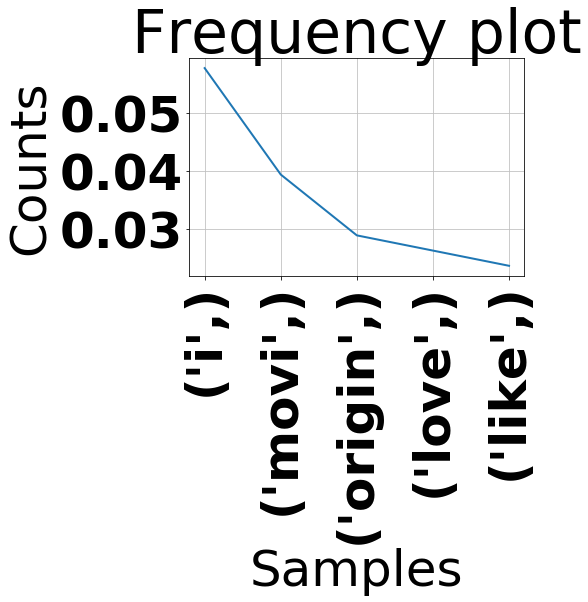

In [641]:
import warnings
warnings.filterwarnings('ignore')
plot_freqdist_freq(ngram_freq,
                       5,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)

In [642]:
tfidf_lmtzr_matrix_tst = tfidf_vectorizer_lmtzr.transform((test_df['review']))
tfidf_stem_matrix_tst = tfidf_vectorizer_stem.transform(test_df['review'])

In [643]:
tfidf_stem_matrix_tst.shape

(1200, 3)

In [644]:
tfidf_lmtzr_matrix_tst.shape

(1200, 1)

In [645]:
tfidf_vectorizer_stem.get_feature_names()

['anim', 'love', 'origin']

In [646]:
tfidf_vectorizer_lmtzr.get_feature_names()

['original']

In [647]:
tfidf_stem_df_tst = pd.DataFrame(tfidf_stem_matrix_tst.toarray(), columns= tfidf_vectorizer_stem.get_feature_names())
tfidf_lmtzr_df_tst = pd.DataFrame(tfidf_lmtzr_matrix_tst.toarray(), columns= tfidf_vectorizer_lmtzr.get_feature_names())

In [648]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

stop_words = set(stopwords.words('english'))
l1=[]

df=test_df['review']
sid = SentimentIntensityAnalyzer()
for word in df:
    print(word)
    ss = sid.polarity_scores(word)
    l1.append(ss['neg'])
    for k in ss:
        print("{0}: {1}",k, ss[k])
        #compound -> +1 (highly positive) - -1(highly negative)

Was good. Nothing like the original but I believe that was the point.
{0}: {1} neg 0.217
{0}: {1} neu 0.644
{0}: {1} pos 0.139
{0}: {1} compound -0.0222
I absolutely loved it! A wonderful rendition of the original. Just dont compare to the cartoon version. Let this movie be its own and you will like it
{0}: {1} neg 0.0
{0}: {1} neu 0.624
{0}: {1} pos 0.376
{0}: {1} compound 0.9224
I love the movie! Good job director! 
I appreciate all the work some great people have put in for years. 
{0}: {1} neg 0.0
{0}: {1} neu 0.492
{0}: {1} pos 0.508
{0}: {1} compound 0.938
GREAT MOVIE!!  Same as the original, but the cinematography made a huge difference!!
{0}: {1} neg 0.0
{0}: {1} neu 0.509
{0}: {1} pos 0.491
{0}: {1} compound 0.8264
Realistic.   Fantastic special effects
{0}: {1} neg 0.0
{0}: {1} neu 0.241
{0}: {1} pos 0.759
{0}: {1} compound 0.743
Almost exactly like the original
{0}: {1} neg 0.0
{0}: {1} neu 0.399
{0}: {1} pos 0.601
{0}: {1} compound 0.5456
Visually stunning, beautiful film
{

Amazing CGI; beautifully re-told. Once again, Rotten Tomatoes critics think they're too cool to enjoy a good movie!
{0}: {1} neg 0.174
{0}: {1} neu 0.316
{0}: {1} pos 0.511
{0}: {1} compound 0.8932
Beautifully captures the spirit of the original, I loved it! 
{0}: {1} neg 0.0
{0}: {1} neu 0.296
{0}: {1} pos 0.704
{0}: {1} compound 0.8977
Perfect remake of a childhood favorite
{0}: {1} neg 0.0
{0}: {1} neu 0.309
{0}: {1} pos 0.691
{0}: {1} compound 0.7717
Wonderful movie. Don't  think children younger than 8 should see movie. Some very scary parts.ie. lions fighting and hyenas.
{0}: {1} neg 0.243
{0}: {1} neu 0.607
{0}: {1} pos 0.15
{0}: {1} compound -0.3167
Absolutely amazing. Must see for all ages. 
{0}: {1} neg 0.0
{0}: {1} neu 0.594
{0}: {1} pos 0.406
{0}: {1} compound 0.624
I loved the loyalty of the movie to the cartoon version. It was a great experience to watch the movie and remember de first time when I was in front of the TV and they play it. But I also missed some part of the

{0}: {1} neu 0.722
{0}: {1} pos 0.108
{0}: {1} compound -0.8582
The story was good but not deep enough to tug on the heartstrings of viewers. It is most definitely not for children, much too frightening and scary.
{0}: {1} neg 0.229
{0}: {1} neu 0.613
{0}: {1} pos 0.158
{0}: {1} compound -0.5662
Movie was good but not great. Too many slow scenes, kids lost interest. Nallas voice needed to be stronger in depth and volume. The pixel creation was amazing!!!
{0}: {1} neg 0.159
{0}: {1} neu 0.452
{0}: {1} pos 0.389
{0}: {1} compound 0.893
The film may not compare to it's original source material but the great vocal performances and visually stunning effects make it an enjoyable experience.
{0}: {1} neg 0.0
{0}: {1} neu 0.579
{0}: {1} pos 0.421
{0}: {1} compound 0.9387
Not enough emotion. Beyoncé did not match up well to Nala. It was just meh. 
{0}: {1} neg 0.193
{0}: {1} neu 0.807
{0}: {1} pos 0.0
{0}: {1} compound -0.2764
It’s was fine. It’s the same as the original (cartoon) version just 

{0}: {1} pos 0.451
{0}: {1} compound 0.6249
Great movie.  Follow the original very well. I think there was three small little changes in the movie that if you want obsessed with the move you may not of found. They did a great job .
{0}: {1} neg 0.039
{0}: {1} neu 0.638
{0}: {1} pos 0.323
{0}: {1} compound 0.9099
Fantastic movie!! Amazing song track!! Way better than the cartoon .
{0}: {1} neg 0.0
{0}: {1} neu 0.379
{0}: {1} pos 0.621
{0}: {1} compound 0.9094
Don't listen to critics! This movie was wonderful! Great CGI, Timon and Pumbaa funnier than the cartoon. Takes me back to my childhood!
{0}: {1} neg 0.0
{0}: {1} neu 0.589
{0}: {1} pos 0.411
{0}: {1} compound 0.9226
Overall the live action style doesn't work very well with a movie that has so much emotion. Plus actors like Beyonce just felt out of place. Even though I thought Seth Rogan as Pumba was a great fit.
{0}: {1} neg 0.048
{0}: {1} neu 0.736
{0}: {1} pos 0.216
{0}: {1} compound 0.7946
I liked how they made the animals seem 

Saw the cartoon version more than 20 years ago, even bought the DVD. There is no comparison to be made. This remake stands alone as an original composition of qualities that resonate of 21st technological advances in animation and CGI images. the entire viewing time debating whether the filmmakers used real animals in some scenes. AWesome story updated for a new generation. sings and singing were spectacular.
{0}: {1} neg 0.058
{0}: {1} neu 0.854
{0}: {1} pos 0.088
{0}: {1} compound 0.4939
I hated that they tried so hard to be different from the original yet filmed scene by scene like the original!!! Their idea of changing it up was changing little words that had me say why not just use the actual script ? I know Lion King scene by scene word by word ... for example the scene after Mufasa saved simba from the hyenas , in the original mufasa tells zazu to "take Nala home" but in the remake he says " take nala back to pride rock." WHY !!!! It was ALOT of that throughout the movie that I 

{0}: {1} neu 0.733
{0}: {1} pos 0.183
{0}: {1} compound 0.8341
Amazing kept most of the original dialogue great graphics is a must see
{0}: {1} neg 0.0
{0}: {1} neu 0.462
{0}: {1} pos 0.538
{0}: {1} compound 0.8876
It really stayed true to the original film.. “cartoon version”
{0}: {1} neg 0.0
{0}: {1} neu 0.598
{0}: {1} pos 0.402
{0}: {1} compound 0.6573
Loved every second of it. Surreal to see your childhood movie come alive making it feel that much more raw. Definitely cried and felt every emotion, not sure if children would think it is too scary on certain scenes.
{0}: {1} neg 0.156
{0}: {1} neu 0.62
{0}: {1} pos 0.224
{0}: {1} compound 0.5503
good like the original
{0}: {1} neg 0.0
{0}: {1} neu 0.115
{0}: {1} pos 0.885
{0}: {1} compound 0.7717
Original is the best!
{0}: {1} neg 0.0
{0}: {1} neu 0.227
{0}: {1} pos 0.773
{0}: {1} compound 0.7777
I felt like I was in Africa, it was so beautiful! Beyoncs sing Spirit was so moving!  The cinema was packed.
{0}: {1} neg 0.0
{0}: {1} neu 

{0}: {1} compound 0.9677
realistic animals with blank expressions delivering human emotions just didn't work, also why were timon and pumba such dicks
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
Absolutely great for all ages.  The animals, so life like, make us believe they really do talk.
{0}: {1} neg 0.0
{0}: {1} neu 0.677
{0}: {1} pos 0.323
{0}: {1} compound 0.8004
I loved EVERYTHING about this remake! It was amazing, beautiful, and funny. Dont base your decisions on good or bad reviews on this wonderfully made adaptation to a beloved classic. If you love Disney, go watch this movie. You wont be disappointed.
{0}: {1} neg 0.053
{0}: {1} neu 0.455
{0}: {1} pos 0.491
{0}: {1} compound 0.9832
It was a great movie
{0}: {1} neg 0.0
{0}: {1} neu 0.423
{0}: {1} pos 0.577
{0}: {1} compound 0.6249
I almost walked out of the theater during the scene was Simba and Nala meet again in the forest. It was that bad. The fact that this audience score is at 89% tells you 

We were afraid this remake would ruin the original for us, but it only enhanced our love for it. They covered all the bases with some minor variations/improvisations (some good some not so good), but overall it was great! Highly recommend watching it.
{0}: {1} neg 0.04
{0}: {1} neu 0.613
{0}: {1} pos 0.347
{0}: {1} compound 0.9663
It gives you all the feels!!!!
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
Great remake of a Disney classic!
{0}: {1} neg 0.0
{0}: {1} neu 0.477
{0}: {1} pos 0.523
{0}: {1} compound 0.6588
Amazing!  I felt like a kid again.  Opening scene gave me chills!  In my opinion, it was the best live action Disney has put out so far.  Im curious if they will meet or pass it.
{0}: {1} neg 0.0
{0}: {1} neu 0.687
{0}: {1} pos 0.313
{0}: {1} compound 0.928
Absolutely amazing!!!
{0}: {1} neg 0.0
{0}: {1} neu 0.168
{0}: {1} pos 0.832
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
I love the movie! I love the life and the

loved the beauty of the scenes, loved the singing and the music was awesome!
{0}: {1} neg 0.0
{0}: {1} neu 0.385
{0}: {1} pos 0.615
{0}: {1} compound 0.9516
Just enough of the old and even some new!
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
They should of used the same people as they did in the original movie for timon and pumbaa
{0}: {1} neg 0.0
{0}: {1} neu 0.881
{0}: {1} pos 0.119
{0}: {1} compound 0.3182
It was such an emotionally distant experience I needed a telescope to feel anything.    The animators managed to miss every possibly body langue side of acting.   When Mufassa is going to lecture Simba you just see the cub standing there instead of dropping his ears and crouching down when his father looks at him. 

This is the equivalent of one of those horrible Disney teen cover songs of a classic all done autotune and empty. 
{0}: {1} neg 0.091
{0}: {1} neu 0.909
{0}: {1} pos 0.0
{0}: {1} compound -0.7096
I agree that emotions were harder to convey

This movie is exactly what it says on the tin. It is a live "looking" film that projects what the lion king is. It's still as good as ever with a bit of everything put in the mix. The scenery is flawless but a bit blurry at times, the animals look as real as they can get, although this does take away from the comedy side as making a face that fits the tone or  changing the colour in the cant wait to be king song would take away all the realism that this movie tries to provide. Don't get me wrong there is a lot of new laughs to be had in its place. I am glad they made this movie and am pleased to of watched it. will it beat my childhood love for Disney ... No, but giving credit it has made me want to watch the old one again.
{0}: {1} neg 0.025
{0}: {1} neu 0.766
{0}: {1} pos 0.209
{0}: {1} compound 0.9863
like watching the original all over again, but real life.
{0}: {1} neg 0.0
{0}: {1} neu 0.702
{0}: {1} pos 0.298
{0}: {1} compound 0.34
If you like the original, you will love this. Cr

Not as great as the '94 original but I wasn't expecting it to 'rule' over it, in all honesty. Nothing really can compare to the original or ever be better, in my opinion, not even the Broadway version. I felt this movie met and even exceeded all my expectations. Jon Favreau couldn't have made a better photo-realistic animated version. This movie's graphics were phenomenal, I cried and laughed at the same scenes, the music was just as haunting and touching as I remembered, and I loved the new scenes and dialogue. This movie is definitely not an exact duplicate of the original, trust me! There are so many new takes on songs, scenes, jokes, etc. Though the storyline follows the '94 version closely it is still its own film, and to judge it based on its predecessor's existence is a mistake. Audiences and critics need to view this movie as its own entity.  Just a well-made, not scene-for-scene (contrary to popular belief, but close), beautiful and masterful take on the beloved classic! Go se

We simply didn't need this movie to be remade, especially when it lacks all of the unique personality and emotional weight behind the character's facial expressions that made the original so fun to watch. Instead what we're left with is a lifelike vapid doppelganger that's clearly just a shameless cash grab. 
{0}: {1} neg 0.042
{0}: {1} neu 0.769
{0}: {1} pos 0.189
{0}: {1} compound 0.8147
Fantastic. Perfectly cast. Visually stunning. Musically matches if not builds on the original. 
{0}: {1} neg 0.0
{0}: {1} neu 0.415
{0}: {1} pos 0.585
{0}: {1} compound 0.9136
I thought it was adorable! Kitties were totes cuteness overload. I'd see this movie again everyday until the sun explodes, but I would die from kitty cat fuzzy fever.
{0}: {1} neg 0.213
{0}: {1} neu 0.664
{0}: {1} pos 0.123
{0}: {1} compound -0.63
overall it was a good movie ..I grew up with the cartoon version and i was  more used to the original voices of the characters so I would say I like the cartoon better but the movie i

In [649]:
l1

In [650]:
l1=pd.DataFrame(l1,columns=['negative_score'])
X_test = pd.concat([l1,tfidf_stem_df_tst], axis=1)

In [651]:
X_test

negative_score      anim      love    origin
0              0.217  0.000000  0.000000  1.000000
1              0.000  0.000000  0.741681  0.670753
2              0.000  0.000000  1.000000  0.000000
3              0.000  0.000000  0.000000  1.000000
4              0.000  0.000000  0.000000  0.000000
5              0.000  0.000000  0.000000  1.000000
6              0.000  0.000000  0.000000  0.000000
7              0.243  0.000000  0.000000  0.000000
8              0.000  0.000000  0.000000  0.000000
9              0.000  0.000000  1.000000  0.000000
10             0.000  0.000000  0.000000  1.000000
11             0.000  0.000000  0.000000  1.000000
12             0.040  0.000000  1.000000  0.000000
13             0.000  0.000000  0.741681  0.670753
14             0.000  0.000000  0.000000  0.000000
15             0.000  0.000000  0.000000  0.000000
16             0.000  1.000000  0.000000  0.000000
17             0.107  0.000000  0.000000  0.000000
18             0.000  0.000000  0.000000  1.000000
19             0.046  0.000000  0.911175  0.412019
20             0.000  0.000000  0.000000  0.000000
21             0.000  1.000000  0.000000  0.000000
22             0.000  0.000000  0.000000  1.000000
23             0.000  0.000000  0.000000  1.000000
24             0.182  0.000000  0.000000  0.000000
25             0.000  0.913969  0.000000  0.405784
26             0.000  0.000000  0.000000  0.000000
27             0.000  0.000000  0.000000  1.000000
28             0.041  0.913969  0.000000  0.405784
29             0.000  0.000000  0.000000  0.000000
...              ...       ...       ...       ...
1170           0.000  0.000000  0.000000  1.000000
1171           0.000  0.000000  0.000000  1.000000
1172           0.115  0.747754  0.000000  0.663976
1173           0.119  0.000000  0.000000  0.000000
1174           0.000  0.000000  0.000000  1.000000
1175           0.159  0.000000  0.000000  0.000000
1176           0.000  0.000000  0.000000  1.000000
1177           0.000  0.000000  0.000000  0.000000
1178           0.000  0.000000  0.000000  0.000000
1179           0.000  0.000000  0.000000  1.000000
1180           0.000  0.000000  0.000000  0.000000
1181           0.146  0.000000  0.000000  0.000000
1182           0.000  0.000000  0.000000  0.000000
1183           0.000  0.000000  0.000000  0.000000
1184           0.000  0.000000  0.000000  0.000000
1185           0.000  0.000000  0.000000  0.000000
1186           0.000  0.000000  0.741681  0.670753
1187           0.000  1.000000  0.000000  0.000000
1188           0.000  0.000000  0.000000  0.000000
1189           0.000  0.000000  1.000000  0.000000
1190           0.186  0.000000  0.000000  1.000000
1191           0.000  0.000000  0.000000  0.000000
1192           0.000  0.000000  0.000000  1.000000
1193           0.000  0.000000  0.000000  0.000000
1194           0.000  0.000000  0.000000  0.000000
1195           0.000  0.000000  0.000000  0.000000
1196           0.000  0.000000  0.741681  0.670753
1197           0.000  1.000000  0.000000  0.000000
1198           0.000  0.000000  0.741681  0.670753
1199           0.053  0.000000  0.000000  1.000000

[1200 rows x 4 columns]

# MODEL BUILDING

# Logistic Regression

In [652]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [653]:
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [654]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = model1.predict(X_train)
val_pred = model1.predict(X_val)

print(model1.score(X_train, y_train))
print(model1.score(X_val, y_val))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))
print(confusion_matrix(y_true=y_val, y_pred = val_pred))


0.7558333333333334
0.7616666666666667
[[1644   94]
 [ 492  170]]
[[409  31]
 [112  48]]


In [655]:
f1_score_train = f1_score((y_train).astype('int'),(train_pred).astype('int'))

In [656]:
f1_score_train

0.367170626349892

In [657]:
f1_score_val = f1_score((y_val).astype('int'),(val_pred).astype('int'))

In [662]:
f1_score_val

0.40167364016736407

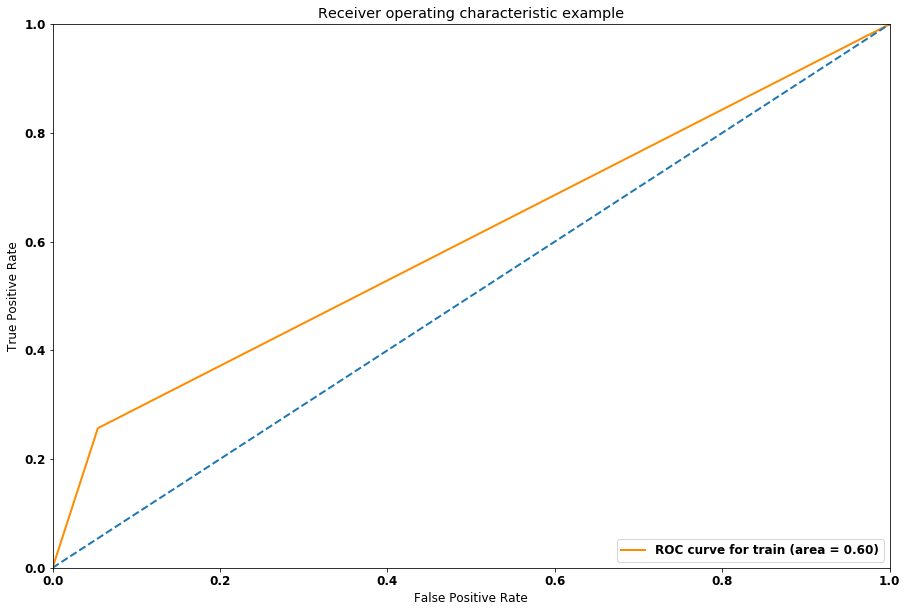

In [672]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

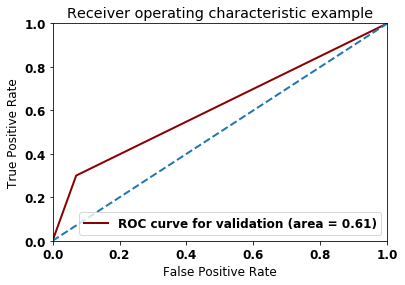

In [671]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [198]:
test_pred=model1.predict(X_test)

In [199]:
len(test_pred)

1200

In [200]:
test_pred=pd.DataFrame(test_pred)

In [201]:
#test_pred.to_csv("test_log.csv",index=True)

# INFERENCE : From Logistic model we can conclude that the model performance is not good on train and validation sets

In [673]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,random_state=646)

In [674]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=646, splitter='best')

In [675]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
cols=pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

### Important features 

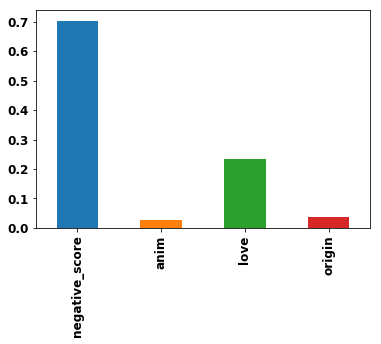

In [676]:
plt.rcParams['font.size'] = 12
feat_importances = pd.Series(clf.feature_importances_, index = X_train.columns)
feat_importances.plot(kind='bar')

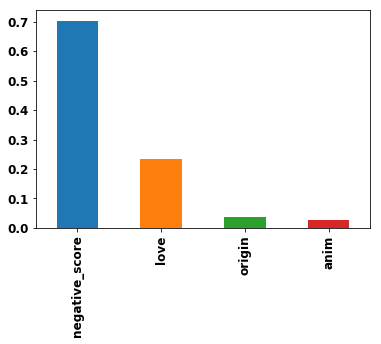

In [677]:
plt.rcParams['font.size'] = 12
feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

[Text(186.159,201.996,'X[0] <= 0.012\nentropy = 0.399\nsamples = 2400\nvalue = [1738, 662]'),
 Text(97.6571,157.108,'X[2] <= 0.437\nentropy = 0.249\nsamples = 1546\nvalue = [1321, 225]'),
 Text(48.8286,112.22,'X[3] <= 0.388\nentropy = 0.311\nsamples = 1122\nvalue = [906, 216]'),
 Text(24.4143,67.332,'X[3] <= 0.142\nentropy = 0.267\nsamples = 840\nvalue = [707, 133]'),
 Text(12.2071,22.444,'entropy = 0.268\nsamples = 836\nvalue = [703, 133]'),
 Text(36.6214,22.444,'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(73.2429,67.332,'X[2] <= 0.39\nentropy = 0.415\nsamples = 282\nvalue = [199, 83]'),
 Text(61.0357,22.444,'entropy = 0.413\nsamples = 281\nvalue = [199, 82]'),
 Text(85.45,22.444,'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(146.486,112.22,'X[3] <= 0.649\nentropy = 0.042\nsamples = 424\nvalue = [415, 9]'),
 Text(122.071,67.332,'X[2] <= 0.979\nentropy = 0.027\nsamples = 370\nvalue = [365, 5]'),
 Text(109.864,22.444,'entropy = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(1

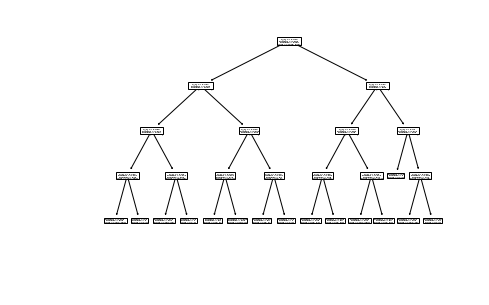

In [207]:
tree.plot_tree(clf.fit(X_train,y_train))

In [678]:
train_pred=clf.predict(X_train)

In [679]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = clf.predict(X_train)
val_pred = clf.predict(X_val)

print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))
print(confusion_matrix(y_true=y_val, y_pred = val_pred))


0.7795833333333333
0.7416666666666667
[[1502  236]
 [ 293  369]]
[[360  80]
 [ 75  85]]


In [210]:
f1_score_train = f1_score((y_train).astype('int'),(train_pred).astype('int'))

In [211]:
f1_score_train

0.5824782951854774

In [212]:
f1_score_val = f1_score((y_val).astype('int'),(val_pred).astype('int'))

In [213]:
f1_score_val

0.5230769230769231

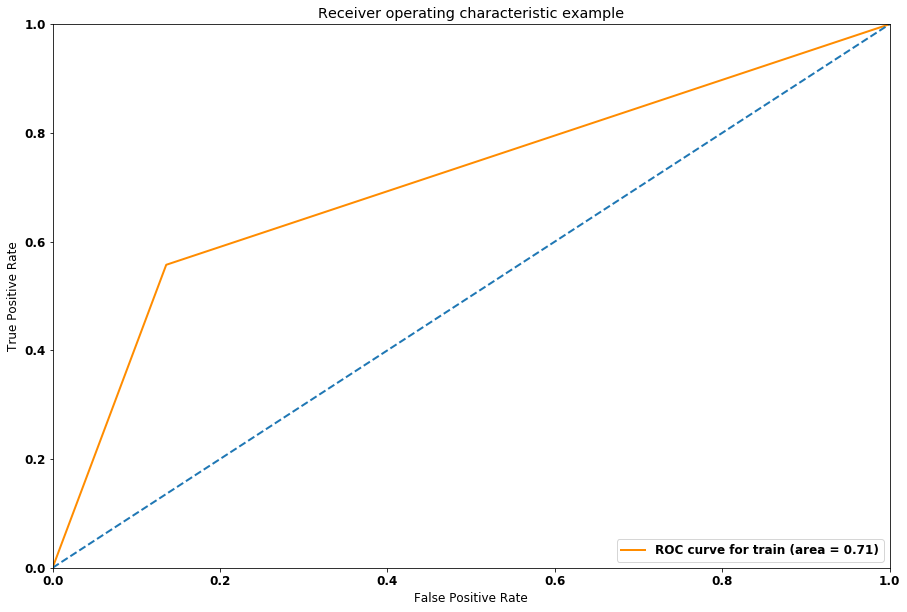

In [684]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

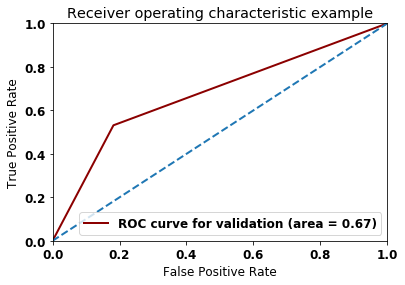

In [685]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [214]:
test_pred=clf.predict(X_test)

In [215]:
test_pred=pd.DataFrame(test_pred)

In [216]:
#test_pred.to_csv("test_dt.csv",index=True) #0.55

### Decision Tree model performs decent for train,test and validation data

# Random Forest  (model best used)

In [686]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

In [687]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [688]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = rfc1.predict(X_train)
val_pred = rfc1.predict(X_val)

print(rfc1.score(X_train, y_train))
print(rfc1.score(X_val, y_val))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))
print(confusion_matrix(y_true=y_val, y_pred = val_pred))


0.8633333333333333
0.7333333333333333
[[1694   44]
 [ 284  378]]
[[383  57]
 [103  57]]


In [220]:
f1_score_train = f1_score((y_train).astype('int'),(train_pred).astype('int'))

In [221]:
f1_score_train

0.7009174311926606

In [222]:
f1_score_val = f1_score((y_val).astype('int'),(val_pred).astype('int'))

In [223]:
f1_score_val

0.3684210526315789

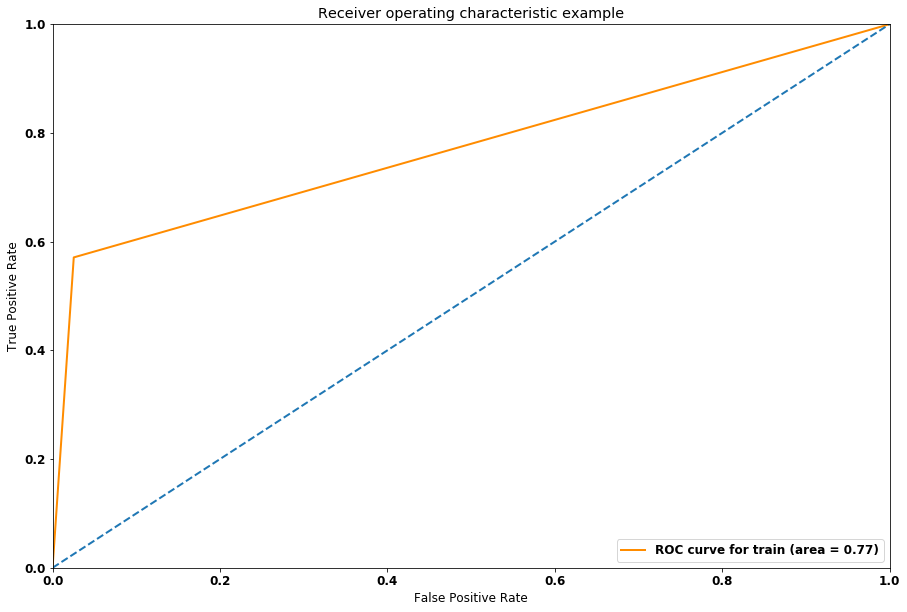

In [690]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

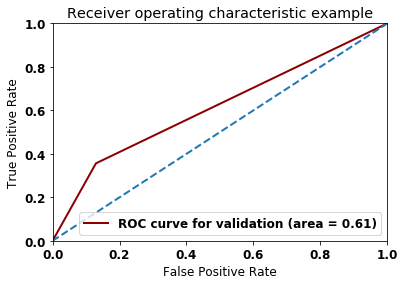

In [689]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#test_pred.to_csv("test_rf.csv",index=True) #0.55

### Over Fitted model , need to run Grid Search for optimum hyper parameters

# Support Vector Machines

In [224]:
from sklearn.svm import SVC
svc = SVC()

In [691]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [692]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = svc.predict(X_train)
val_pred = svc.predict(X_val)

print(svc.score(X_train, y_train))
print(svc.score(X_val, y_val))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))
print(confusion_matrix(y_true=y_val, y_pred = val_pred))


0.74875
0.7383333333333333
[[1673   65]
 [ 538  124]]
[[418  22]
 [135  25]]


In [227]:
f1_score_train = f1_score((y_train).astype('int'),(train_pred).astype('int'))

In [228]:
f1_score_train

0.2914218566392479

In [229]:
f1_score_val = f1_score((y_val).astype('int'),(val_pred).astype('int'))

In [230]:
f1_score_val

0.24154589371980675

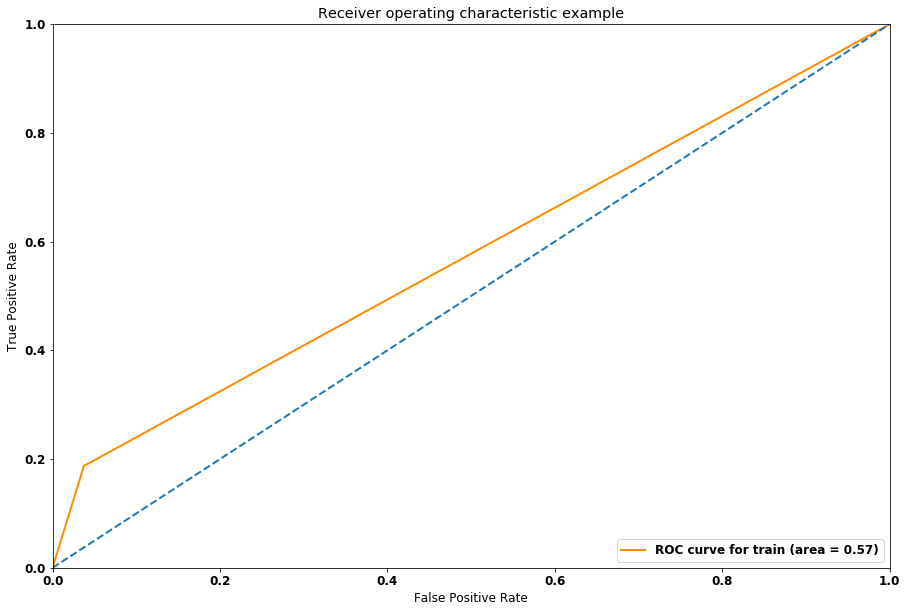

In [693]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

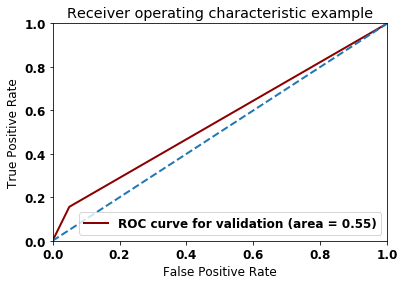

In [694]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Underfitted SVM model  

# Running all above models again after running SMOTE algorithm

In [695]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=646)

#Fit on Data
os_data_x,os_data_y = smote.fit_sample(X,(y))

In [696]:
os_data_x=pd.DataFrame(os_data_x,columns= X.columns)
os_data_y=pd.DataFrame(os_data_y, columns=['Sentiment'])
#pd.DataFrame(os_data_y)

In [233]:
os_data_x.shape

(4356, 4)

In [234]:
os_data_y.shape

(4356, 1)

In [697]:
os_data_x

negative_score      anim      love    origin
0           0.000000  0.000000  0.000000  0.000000
1           0.000000  0.000000  0.000000  0.000000
2           0.000000  0.000000  0.741681  0.670753
3           0.000000  1.000000  0.000000  0.000000
4           0.000000  0.000000  0.000000  0.000000
5           0.000000  0.000000  0.000000  0.000000
6           0.000000  0.000000  1.000000  0.000000
7           0.000000  0.000000  0.000000  0.000000
8           0.253000  0.000000  1.000000  0.000000
9           0.000000  0.000000  0.000000  0.000000
10          0.118000  0.000000  0.000000  0.000000
11          0.000000  0.000000  0.000000  0.000000
12          0.220000  0.000000  1.000000  0.000000
13          0.000000  0.000000  0.000000  1.000000
14          0.000000  0.000000  0.000000  0.000000
15          0.000000  0.000000  1.000000  0.000000
16          0.000000  0.000000  0.000000  1.000000
17          0.000000  0.000000  1.000000  0.000000
18          0.000000  0.000000  1.000000  0.000000
19          0.041000  0.897661  0.440687  0.000000
20          0.000000  0.000000  1.000000  0.000000
21          0.000000  0.000000  0.741681  0.670753
22          0.000000  0.000000  1.000000  0.000000
23          0.000000  0.000000  0.000000  0.000000
24          0.000000  0.000000  1.000000  0.000000
25          0.049000  0.000000  0.000000  1.000000
26          0.000000  0.000000  1.000000  0.000000
27          0.000000  0.000000  0.000000  1.000000
28          0.000000  0.000000  0.000000  1.000000
29          0.000000  0.000000  0.000000  1.000000
...              ...       ...       ...       ...
4326        0.299848  0.000000  0.000000  0.000000
4327        0.245828  0.747754  0.000000  0.663976
4328        0.000000  0.000000  0.000000  0.000000
4329        0.000000  0.000000  0.000000  0.000000
4330        0.264841  0.000000  0.000000  0.000000
4331        0.000000  0.913969  0.000000  0.405784
4332        0.108631  0.000000  0.000000  0.000000
4333        0.321602  0.000000  0.000000  0.000000
4334        0.000000  1.000000  0.000000  0.000000
4335        0.184455  0.000000  0.000000  1.000000
4336        0.120937  0.314648  0.000000  0.948271
4337        0.203529  0.000000  0.000000  0.000000
4338        0.000000  0.000000  0.000000  0.000000
4339        0.070704  0.747754  0.000000  0.663976
4340        0.158803  0.000000  0.000000  0.000000
4341        0.000000  0.000000  0.000000  0.000000
4342        0.000000  0.000000  0.000000  1.000000
4343        0.000000  0.000000  0.000000  0.000000
4344        0.000000  0.000000  0.000000  0.000000
4345        0.043425  0.000000  0.000000  1.000000
4346        0.000000  0.000000  0.000000  0.000000
4347        0.000000  0.000000  0.000000  1.000000
4348        0.000000  0.000000  0.000000  1.000000
4349        0.000000  0.000000  0.000000  0.000000
4350        0.098978  0.913969  0.000000  0.405784
4351        0.004222  0.000000  1.000000  0.000000
4352        0.107803  0.000000  0.000000  0.000000
4353        0.233790  0.000000  0.000000  0.000000
4354        0.000000  0.000000  0.000000  0.000000
4355        0.258236  0.000000  0.000000  0.000000

[4356 rows x 4 columns]

In [236]:
os_data_y.columns

Index(['Sentiment'], dtype='object')

In [237]:
os_data_y.Sentiment.value_counts()

1    2178
0    2178
Name: Sentiment, dtype: int64

In [698]:
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X, y, test_size=0.2, random_state=646) 

# MODEL BUILDING WITH SMOTE

# Logistic Regression

In [699]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [700]:
model2.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [701]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = model2.predict(X_train_smote)
val_pred = model2.predict(X_val_smote)

print(model2.score(X_train_smote, y_train_smote))
print(model2.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.7558333333333334
0.7616666666666667
[[1644   94]
 [ 492  170]]
[[409  31]
 [112  48]]


In [242]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [243]:
f1_score_train

0.367170626349892

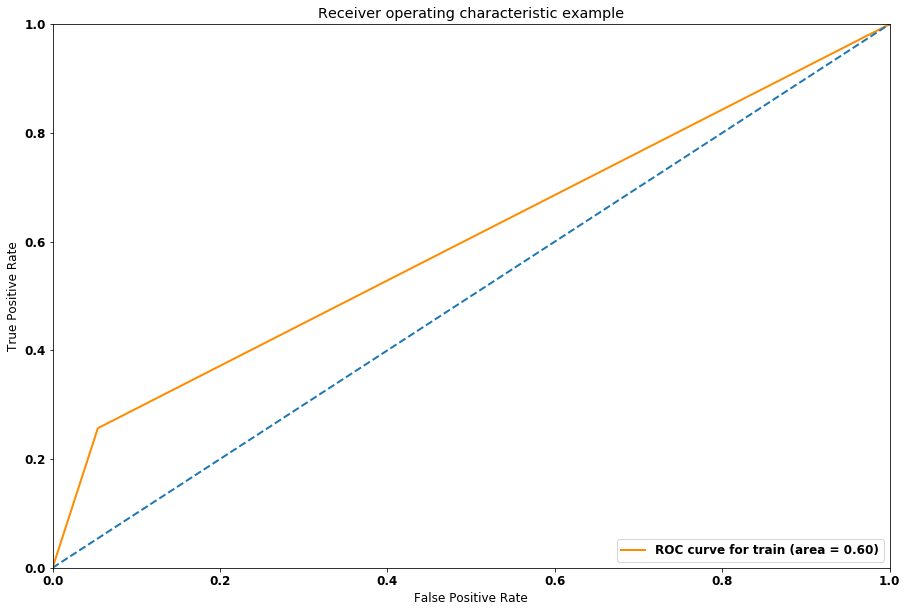

In [703]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

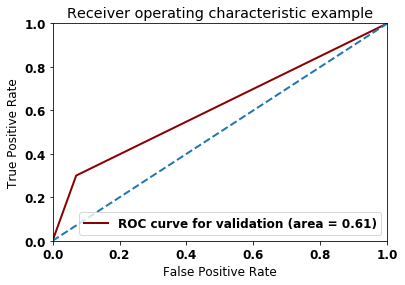

In [702]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### INFERENCE : From Logistic model we can conclude that the model didnt perform well and is not changed much after SMOTE

In [704]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(max_depth= 5, min_samples_split= 150,random_state=646)

In [705]:
clf1.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=646, splitter='best')

In [706]:
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]
cols=pd.DataFrame([X_train_smote.columns[indices],np.sort(importances)[::-1]])

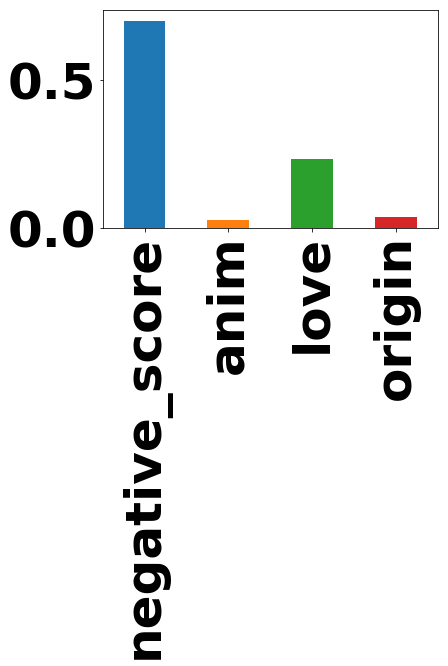

In [247]:
feat_importances = pd.Series(clf.feature_importances_, index = X_train_smote.columns)
feat_importances.plot(kind='bar')

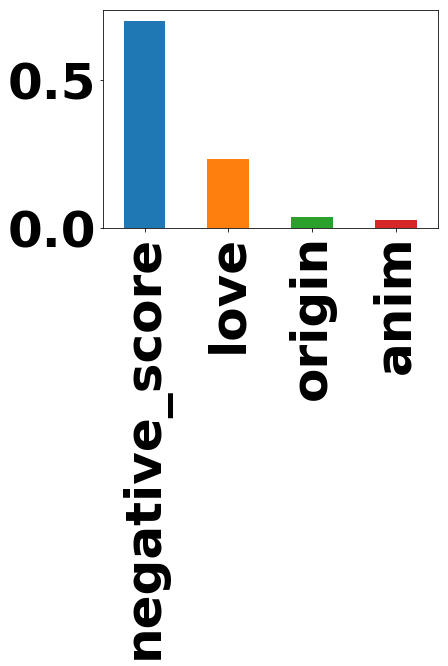

In [248]:
feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

[Text(215.66,205.737,'X[0] <= 0.012\nentropy = 0.399\nsamples = 2400\nvalue = [1738, 662]'),
 Text(138.348,168.33,'X[2] <= 0.437\nentropy = 0.249\nsamples = 1546\nvalue = [1321, 225]'),
 Text(81.381,130.923,'X[3] <= 0.388\nentropy = 0.311\nsamples = 1122\nvalue = [906, 216]'),
 Text(48.8286,93.5167,'X[3] <= 0.142\nentropy = 0.267\nsamples = 840\nvalue = [707, 133]'),
 Text(32.5524,56.11,'X[1] <= 0.5\nentropy = 0.268\nsamples = 836\nvalue = [703, 133]'),
 Text(16.2762,18.7033,'entropy = 0.268\nsamples = 658\nvalue = [553, 105]'),
 Text(48.8286,18.7033,'entropy = 0.265\nsamples = 178\nvalue = [150, 28]'),
 Text(65.1048,56.11,'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(113.933,93.5167,'X[2] <= 0.39\nentropy = 0.415\nsamples = 282\nvalue = [199, 83]'),
 Text(97.6571,56.11,'X[3] <= 0.768\nentropy = 0.413\nsamples = 281\nvalue = [199, 82]'),
 Text(81.381,18.7033,'entropy = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(113.933,18.7033,'entropy = 0.421\nsamples = 236\nvalue = [165, 7

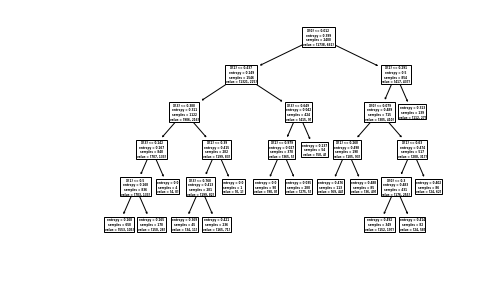

In [249]:
tree.plot_tree(clf1.fit(X_train_smote,y_train_smote))

In [707]:
train_pred=clf1.predict(X_train_smote)

In [708]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = clf1.predict(X_train_smote)
val_pred = clf1.predict(X_val_smote)

print(clf1.score(X_train_smote, y_train_smote))
print(clf1.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))

0.77875
0.745
[[1502  236]
 [ 295  367]]
[[362  78]
 [ 75  85]]


In [252]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [253]:
f1_score_train

0.5802371541501976

In [254]:
f1_score_val = f1_score((y_val_smote).astype('int'),(val_pred).astype('int'))

In [255]:
f1_score_val

0.5263157894736842

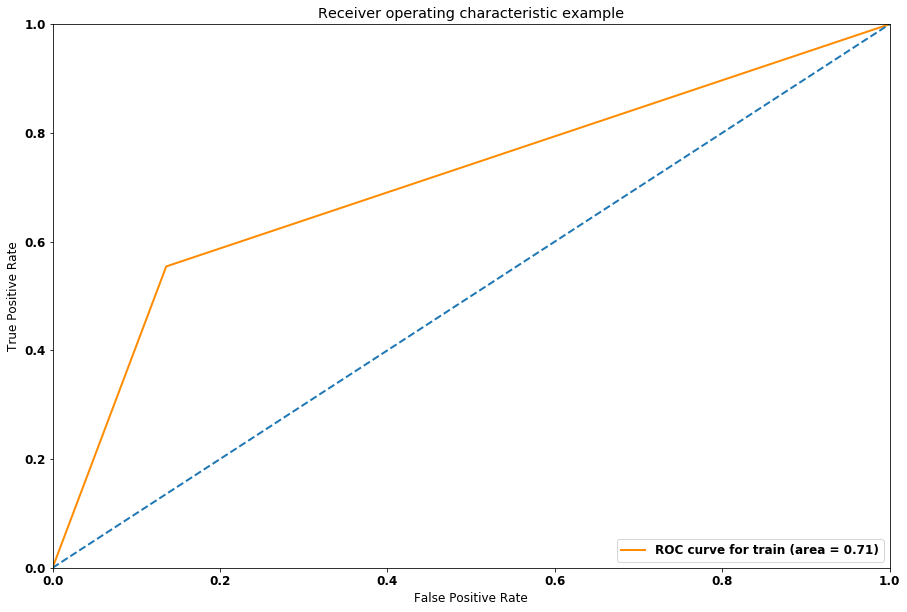

In [709]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

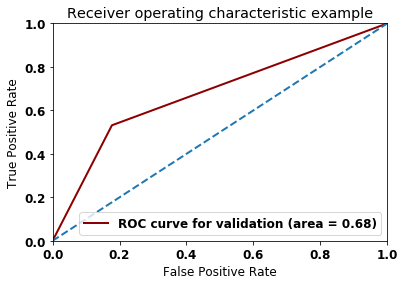

In [710]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# K-Fold Cross Validation

In [711]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [712]:
grid_param = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2)
}

In [713]:
gd_sr = GridSearchCV(clf1, grid_param)

In [714]:
y1=y_train_smote.astype(int)

In [260]:
gd_sr.fit(X_train_smote,y1)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=150,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=646,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
           

In [261]:
gd_sr.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=646, splitter='best')

In [262]:
gd_sr.best_params_

{'max_depth': 5, 'min_samples_split': 150}

In [263]:
gd_sr.best_score_

0.77125

### INFERENCE : we can conclude that the model performed well and is not changed much after SMOTE¶ 

# Random Forest  (model best used)

In [715]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(bootstrap= True, criterion= 'entropy', n_estimators= 500)

In [716]:
rfc2.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [717]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = rfc2.predict(X_train_smote)
val_pred = rfc2.predict(X_val_smote)

print(rfc2.score(X_train_smote, y_train_smote))
print(rfc2.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.8695833333333334
0.7166666666666667
[[1691   47]
 [ 266  396]]
[[378  62]
 [108  52]]


In [267]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [268]:
f1_score_train

0.7141552511415525

In [269]:
f1_score_val = f1_score((y_val_smote).astype('int'),(val_pred).astype('int'))

In [270]:
f1_score_val

0.38405797101449274

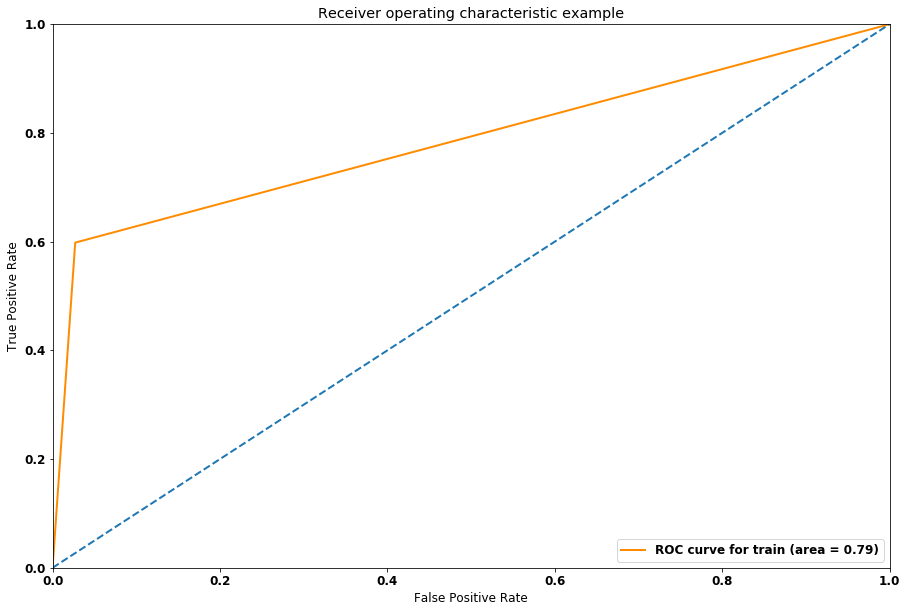

In [718]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

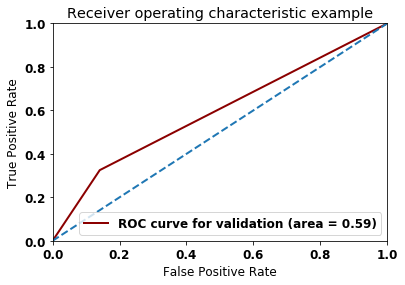

In [719]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [271]:
test_pred=rfc2.predict(X_test)
test_pred=pd.DataFrame(test_pred)
test_pred.to_csv("test_rf.csv",index=True)

### INFERENCE : we can conclude that the model performed well and is not changed much after SMOTE 

# Support Vector Machines

In [720]:
from sklearn.svm import SVC
svc2 = SVC()

In [721]:
svc2.fit(X_train_smote,y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [722]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = svc2.predict(X_train_smote)
val_pred = svc2.predict(X_val_smote)

print(svc2.score(X_train_smote, y_train_smote))
print(svc2.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.74875
0.7383333333333333
[[1673   65]
 [ 538  124]]
[[418  22]
 [135  25]]


In [723]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [724]:
f1_score_train

0.2914218566392479

In [725]:
f1_score_val = f1_score((y_val_smote).astype('int'),(val_pred).astype('int'))

In [278]:
f1_score_val

0.24154589371980675

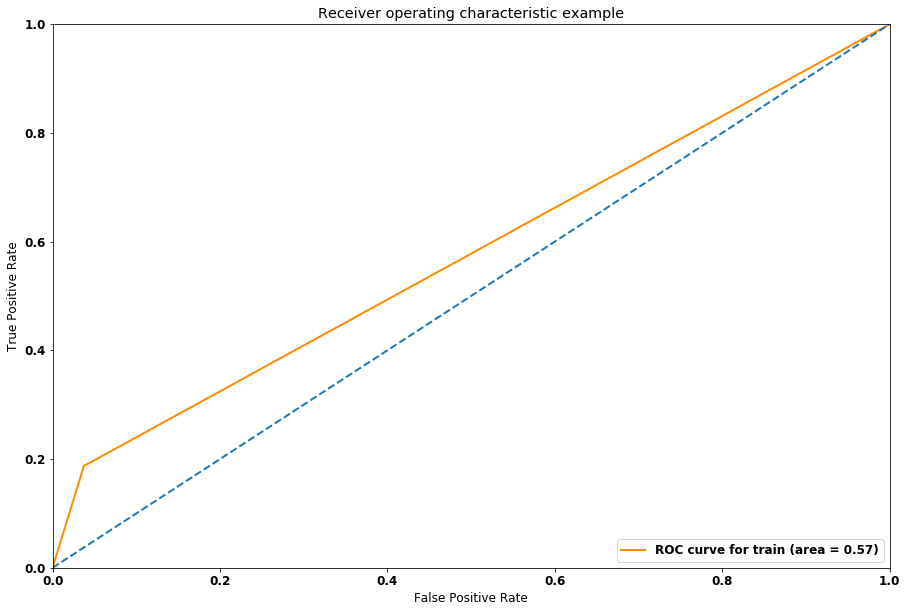

In [726]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

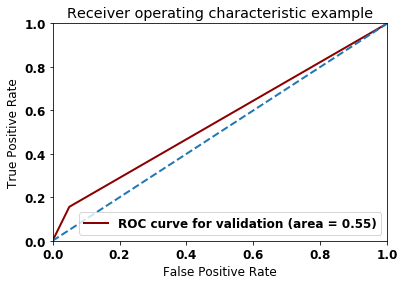

In [727]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### INFERENCE : Not much improvement in models with balanced data. Possible reason be that data was not highly imbalanced so performance was the same with originall data as well

# Naive Bayes

In [728]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train_smote,y_train_smote)

GaussianNB(priors=None, var_smoothing=1e-09)

In [729]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = model_nb.predict(X_train_smote)
val_pred = model_nb.predict(X_val_smote)

print(model_nb.score(X_train_smote, y_train_smote))
print(model_nb.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.7666666666666667
0.7383333333333333
[[1540  198]
 [ 362  300]]
[[371  69]
 [ 88  72]]


In [732]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [733]:
f1_score_train

0.517241379310345

In [734]:
f1_score_val = f1_score((y_val_smote).astype('int'),(val_pred).astype('int'))

In [735]:
f1_score_val

0.4784053156146179

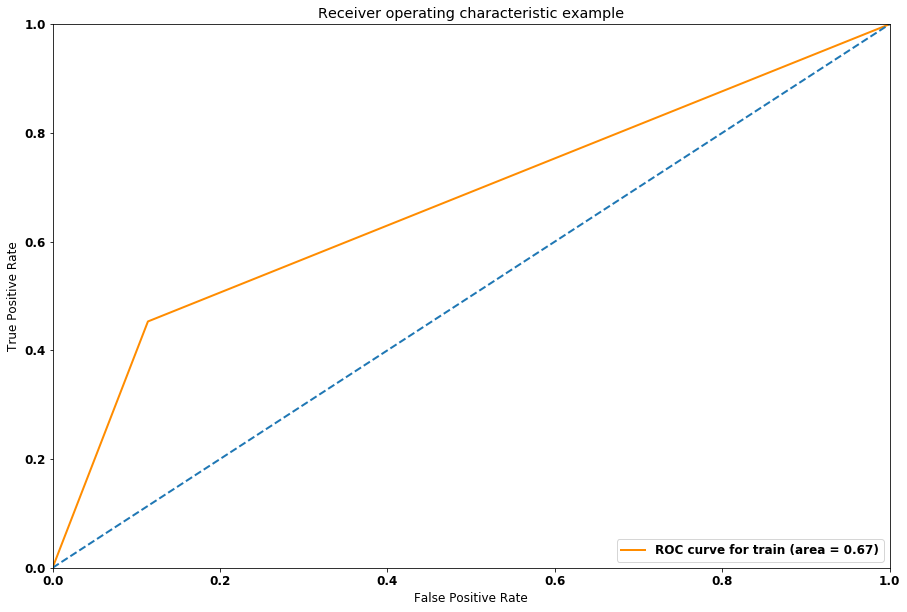

In [737]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

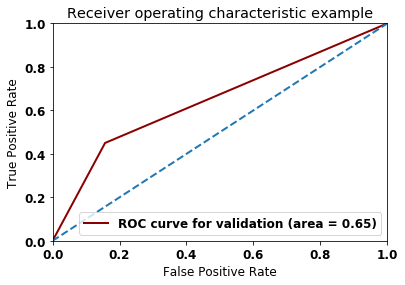

In [736]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [285]:
test_pred=model_nb.predict(X_test)
test_pred=pd.DataFrame(test_pred)
test_pred.to_csv("test_nb.csv",index=True)

###  Model needs improvement

# KNN

In [738]:
from sklearn.neighbors import KNeighborsClassifier

In [739]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [740]:
knn.predict(X_val_smote)

array(['0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [741]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = knn.predict(X_train_smote)
val_pred = knn.predict(X_val_smote)

print(knn.score(X_train_smote, y_train_smote))
print(knn.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.76375
0.7066666666666667
[[1510  228]
 [ 339  323]]
[[365  75]
 [101  59]]


In [742]:
grid_param = {
    'n_neighbors' : range(10,500,20),
    'weights': ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
 }

In [291]:
gd_knn = GridSearchCV(knn, grid_param)

In [292]:
gd_knn.fit(X_train_smote,y_train_smote)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(10, 500, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [293]:
gd_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [294]:
gd_knn.best_score_

0.765

In [295]:
gd_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}

In [743]:
knn1= KNeighborsClassifier(n_neighbors=50,weights='uniform',metric='euclidean')

In [744]:
knn1.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [745]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = knn1.predict(X_train_smote)
val_pred = knn1.predict(X_val_smote)

print(knn1.score(X_train_smote, y_train_smote))
print(knn1.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))


0.7720833333333333
0.7583333333333333
[[1538  200]
 [ 347  315]]
[[380  60]
 [ 85  75]]


In [746]:
f1_score_train = f1_score((y_train_smote).astype('int'),(train_pred).astype('int'))

In [747]:
f1_score_train

0.5352591333899744

In [748]:
f1_score_val = f1_score((y_val_smote).astype('int'),(val_pred).astype('int'))

In [749]:
f1_score_val

0.5084745762711864

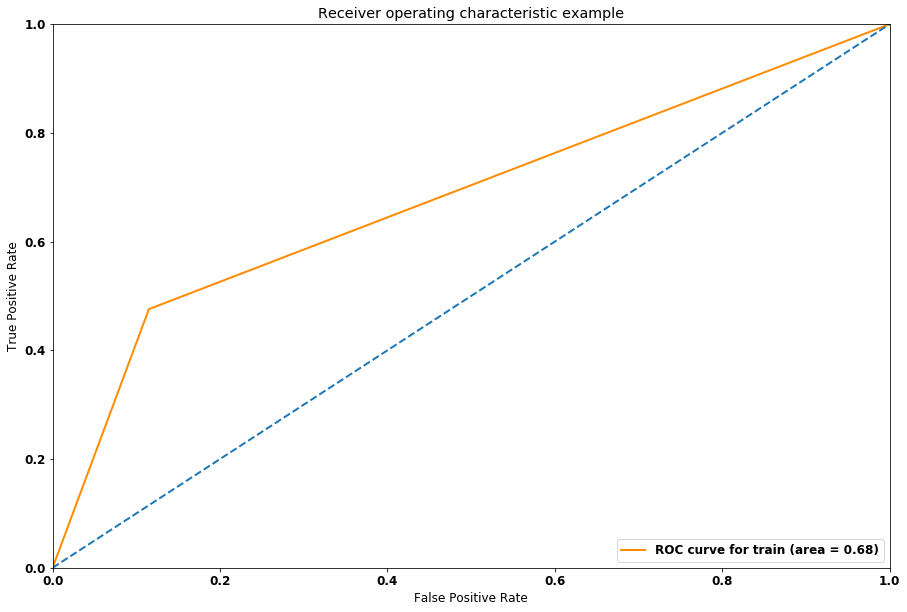

In [750]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

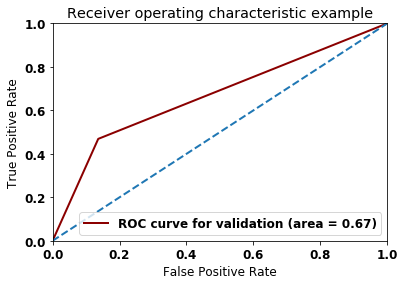

In [751]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [303]:
test_pred=knn1.predict(X_test)
test_pred=pd.DataFrame(test_pred)
#test_pred.to_csv("test_knn.csv",index=True)

### Model performance didnt improve significantly 

# Stochastic Gradient Descent

In [752]:
 from sklearn.linear_model import SGDClassifier

In [753]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train_smote, y_train_smote)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [754]:
#from sklearn.metrics import confusion_matrix, f1_score
train_pred = sgd.predict(X=X_train_smote)
val_pred = sgd.predict(X_val_smote)

print(sgd.score(X_train_smote, y_train_smote))
print(sgd.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))

0.7675
0.7633333333333333
[[1604  134]
 [ 424  238]]
[[391  49]
 [ 93  67]]


In [755]:
#grid_params= [{}, {"loss": "log", "penalty": "l2", 'n_iter':1000}]

In [756]:
grid_param= {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
   # 'n_iter': [1000], # number of epochs
    'loss': ['hinge','log'], # logistic regression,
    'penalty': ['l2','elasticnet'],
    'n_jobs': [-1]
    }

In [757]:
gd_sgd = GridSearchCV(sgd,grid_param)

In [758]:
gd_sgd.fit(X_train_smote,y_train_smote)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=5,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['hinge', 'log'], 'n_jobs': [-1],
       

In [759]:
gd_sgd.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [760]:
gd_sgd.best_params_

{'alpha': 0.001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'elasticnet'}

In [764]:
sgd1=SGDClassifier(alpha= 0.001, loss= 'log', n_jobs= -1, penalty= 'elasticnet')

In [765]:
sgd1.fit(X_train_smote,y_train_smote)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [766]:
#from sklearn.metrics import confusion_matrix, f1_score
train_pred = sgd1.predict(X=X_train_smote)
val_pred = sgd1.predict(X_val_smote)

print(sgd1.score(X_train_smote, y_train_smote))
print(sgd1.score(X_val_smote, y_val_smote))

print(confusion_matrix(y_true=y_train_smote, y_pred = train_pred))
print(confusion_matrix(y_true=y_val_smote, y_pred = val_pred))

0.76625
0.7533333333333333
[[1607  131]
 [ 430  232]]
[[392  48]
 [100  60]]


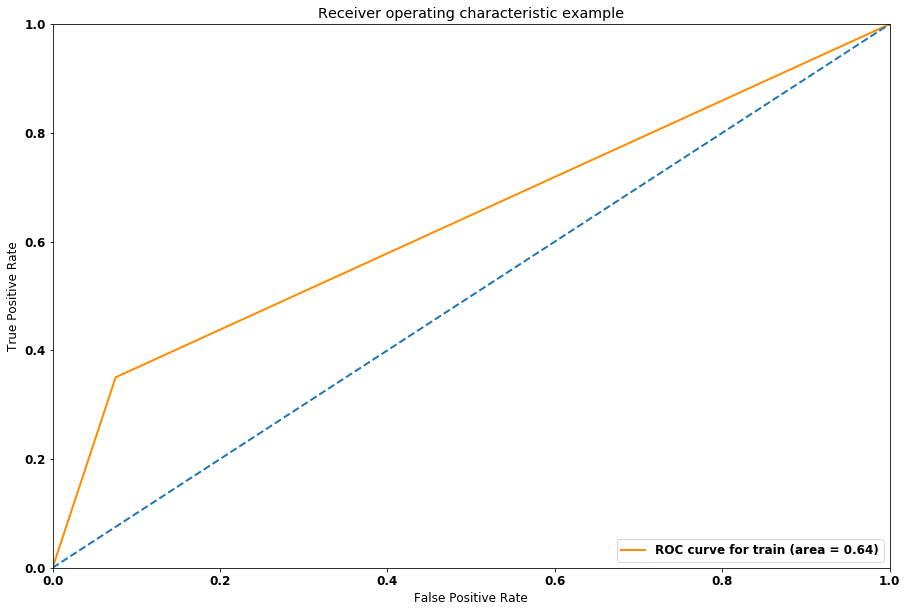

In [768]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

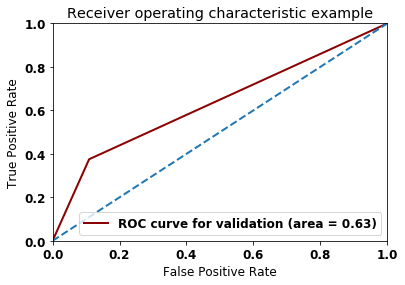

In [767]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [316]:
test_pred=sgd1.predict(X_test)

In [317]:
#pd.DataFrame(test_pred).to_csv("test_sgd.csv",index=True)

In [318]:
X_test

negative_score      anim      love    origin
0              0.217  0.000000  0.000000  1.000000
1              0.000  0.000000  0.741681  0.670753
2              0.000  0.000000  1.000000  0.000000
3              0.000  0.000000  0.000000  1.000000
4              0.000  0.000000  0.000000  0.000000
5              0.000  0.000000  0.000000  1.000000
6              0.000  0.000000  0.000000  0.000000
7              0.243  0.000000  0.000000  0.000000
8              0.000  0.000000  0.000000  0.000000
9              0.000  0.000000  1.000000  0.000000
10             0.000  0.000000  0.000000  1.000000
11             0.000  0.000000  0.000000  1.000000
12             0.040  0.000000  1.000000  0.000000
13             0.000  0.000000  0.741681  0.670753
14             0.000  0.000000  0.000000  0.000000
15             0.000  0.000000  0.000000  0.000000
16             0.000  1.000000  0.000000  0.000000
17             0.107  0.000000  0.000000  0.000000
18             0.000  0.000000  0.000000  1.000000
19             0.046  0.000000  0.911175  0.412019
20             0.000  0.000000  0.000000  0.000000
21             0.000  1.000000  0.000000  0.000000
22             0.000  0.000000  0.000000  1.000000
23             0.000  0.000000  0.000000  1.000000
24             0.182  0.000000  0.000000  0.000000
25             0.000  0.913969  0.000000  0.405784
26             0.000  0.000000  0.000000  0.000000
27             0.000  0.000000  0.000000  1.000000
28             0.041  0.913969  0.000000  0.405784
29             0.000  0.000000  0.000000  0.000000
...              ...       ...       ...       ...
1170           0.000  0.000000  0.000000  1.000000
1171           0.000  0.000000  0.000000  1.000000
1172           0.115  0.747754  0.000000  0.663976
1173           0.119  0.000000  0.000000  0.000000
1174           0.000  0.000000  0.000000  1.000000
1175           0.159  0.000000  0.000000  0.000000
1176           0.000  0.000000  0.000000  1.000000
1177           0.000  0.000000  0.000000  0.000000
1178           0.000  0.000000  0.000000  0.000000
1179           0.000  0.000000  0.000000  1.000000
1180           0.000  0.000000  0.000000  0.000000
1181           0.146  0.000000  0.000000  0.000000
1182           0.000  0.000000  0.000000  0.000000
1183           0.000  0.000000  0.000000  0.000000
1184           0.000  0.000000  0.000000  0.000000
1185           0.000  0.000000  0.000000  0.000000
1186           0.000  0.000000  0.741681  0.670753
1187           0.000  1.000000  0.000000  0.000000
1188           0.000  0.000000  0.000000  0.000000
1189           0.000  0.000000  1.000000  0.000000
1190           0.186  0.000000  0.000000  1.000000
1191           0.000  0.000000  0.000000  0.000000
1192           0.000  0.000000  0.000000  1.000000
1193           0.000  0.000000  0.000000  0.000000
1194           0.000  0.000000  0.000000  0.000000
1195           0.000  0.000000  0.000000  0.000000
1196           0.000  0.000000  0.741681  0.670753
1197           0.000  1.000000  0.000000  0.000000
1198           0.000  0.000000  0.741681  0.670753
1199           0.053  0.000000  0.000000  1.000000

[1200 rows x 4 columns]

# Deep Learning

# Simple Neural network

In [769]:
np.random.seed(646)

tf.set_random_seed(646)

In [770]:
perceptron_model = Sequential()
perceptron_model.add(Dense(1, input_dim=4, activation='sigmoid', kernel_initializer='normal'))

In [771]:
perceptron_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [777]:
perceptron_model_history = perceptron_model.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_split=0.2)

Train on 1920 samples, validate on 480 samples
Epoch 1/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6680 - acc: 0.593 - ETA: 0s - loss: 0.5300 - acc: 0.719 - 0s 35us/step - loss: 0.5295 - acc: 0.7203 - val_loss: 0.5107 - val_acc: 0.7500
Epoch 2/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4748 - acc: 0.812 - ETA: 0s - loss: 0.5293 - acc: 0.719 - 0s 37us/step - loss: 0.5294 - acc: 0.7208 - val_loss: 0.5106 - val_acc: 0.7500
Epoch 3/200
1920/1920 [==============================] - ETA: 0s - loss: 0.5317 - acc: 0.750 - ETA: 0s - loss: 0.5270 - acc: 0.724 - 0s 37us/step - loss: 0.5293 - acc: 0.7208 - val_loss: 0.5105 - val_acc: 0.7500
Epoch 4/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6232 - acc: 0.593 - ETA: 0s - loss: 0.5318 - acc: 0.717 - 0s 37us/step - loss: 0.5292 - acc: 0.7208 - val_loss: 0.5104 - val_acc: 0.7500
Epoch 5/200
1920/1920 [==============================] - ETA: 0s - loss: 0.5177 - acc: 0.718 - ETA: 0s - 

Epoch 41/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4743 - acc: 0.781 - ETA: 0s - loss: 0.5242 - acc: 0.723 - 0s 33us/step - loss: 0.5251 - acc: 0.7214 - val_loss: 0.5071 - val_acc: 0.7521
Epoch 42/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4694 - acc: 0.812 - ETA: 0s - loss: 0.5229 - acc: 0.726 - 0s 37us/step - loss: 0.5250 - acc: 0.7214 - val_loss: 0.5070 - val_acc: 0.7521
Epoch 43/200
1920/1920 [==============================] - ETA: 0s - loss: 0.5348 - acc: 0.718 - ETA: 0s - loss: 0.5217 - acc: 0.723 - 0s 33us/step - loss: 0.5249 - acc: 0.7214 - val_loss: 0.5070 - val_acc: 0.7521
Epoch 44/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6476 - acc: 0.687 - ETA: 0s - loss: 0.5297 - acc: 0.715 - 0s 37us/step - loss: 0.5248 - acc: 0.7214 - val_loss: 0.5069 - val_acc: 0.7521
Epoch 45/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6117 - acc: 0.625 - ETA: 0s - loss: 0.5251 - acc: 0.722 - 0s 33us/step -

Epoch 120/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6053 - acc: 0.687 - ETA: 0s - loss: 0.5249 - acc: 0.721 - 0s 39us/step - loss: 0.5182 - acc: 0.7297 - val_loss: 0.5017 - val_acc: 0.7583
Epoch 121/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4349 - acc: 0.781 - 0s 31us/step - loss: 0.5182 - acc: 0.7297 - val_loss: 0.5017 - val_acc: 0.7583
Epoch 122/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6610 - acc: 0.656 - 0s 29us/step - loss: 0.5181 - acc: 0.7302 - val_loss: 0.5016 - val_acc: 0.7583
Epoch 123/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4313 - acc: 0.843 - ETA: 0s - loss: 0.5189 - acc: 0.729 - 0s 31us/step - loss: 0.5180 - acc: 0.7307 - val_loss: 0.5016 - val_acc: 0.7583
Epoch 124/200
1920/1920 [==============================] - ETA: 0s - loss: 0.6213 - acc: 0.656 - ETA: 0s - loss: 0.5136 - acc: 0.735 - 0s 31us/step - loss: 0.5179 - acc: 0.7307 - val_loss: 0.5015 - val_acc: 0.7583
Epoch 

Epoch 199/200
1920/1920 [==============================] - ETA: 0s - loss: 0.3792 - acc: 0.906 - ETA: 0s - loss: 0.5144 - acc: 0.736 - 0s 40us/step - loss: 0.5129 - acc: 0.7370 - val_loss: 0.4978 - val_acc: 0.7500
Epoch 200/200
1920/1920 [==============================] - ETA: 0s - loss: 0.4403 - acc: 0.875 - 0s 31us/step - loss: 0.5128 - acc: 0.7370 - val_loss: 0.4977 - val_acc: 0.7500


In [778]:
perceptron_model.evaluate(X_val_smote,y_val_smote)

600/600 [==============================] - ETA:  - 0s 20us/step


[0.528214362859726, 0.7500000007947286]

In [324]:
X_train

negative_score      anim      love    origin
88             0.000  0.000000  0.741681  0.670753
2407           0.000  0.000000  1.000000  0.000000
2899           0.000  0.000000  1.000000  0.000000
1067           0.142  0.000000  0.000000  0.000000
2514           0.000  0.000000  0.000000  1.000000
2404           0.075  0.000000  0.000000  0.000000
392            0.130  0.000000  1.000000  0.000000
2488           0.000  0.897661  0.440687  0.000000
2554           0.000  0.000000  1.000000  0.000000
725            0.396  0.000000  0.000000  0.000000
2894           0.000  0.000000  0.000000  0.000000
2205           0.000  0.000000  0.000000  1.000000
649            0.000  0.000000  0.000000  0.000000
2202           0.245  0.000000  0.000000  0.000000
2997           0.000  0.000000  0.000000  0.000000
353            0.067  0.490650  0.000000  0.871357
1564           0.047  0.000000  0.000000  0.000000
1747           0.000  0.000000  0.000000  1.000000
916            0.055  1.000000  0.000000  0.000000
2227           0.426  0.000000  0.000000  1.000000
665            0.000  0.000000  1.000000  0.000000
1685           0.000  0.000000  0.000000  0.000000
446            0.000  0.000000  1.000000  0.000000
997            0.000  1.000000  0.000000  0.000000
372            0.022  0.000000  0.000000  1.000000
1451           0.000  0.000000  0.000000  0.000000
1221           0.142  0.000000  0.000000  0.000000
129            0.301  0.000000  0.000000  0.000000
1757           0.000  0.000000  0.000000  0.000000
1646           0.161  0.000000  0.000000  0.000000
...              ...       ...       ...       ...
1916           0.219  0.000000  0.000000  0.000000
52             0.000  0.747754  0.000000  0.663976
222            0.365  0.000000  0.000000  1.000000
1907           0.579  0.000000  0.000000  0.000000
2234           0.049  0.000000  0.000000  0.000000
235            0.000  0.000000  1.000000  0.000000
169            0.173  0.747754  0.000000  0.663976
91             0.000  0.000000  0.483847  0.875153
2916           0.000  0.000000  0.741681  0.670753
41             0.000  0.000000  1.000000  0.000000
2077           0.087  0.000000  0.000000  0.000000
2412           0.135  0.000000  0.000000  1.000000
303            0.000  0.713550  0.700604  0.000000
1326           0.000  0.000000  0.741681  0.670753
709            0.000  0.000000  1.000000  0.000000
1492           0.000  0.000000  0.741681  0.670753
2762           0.000  0.000000  1.000000  0.000000
2048           0.000  0.000000  0.000000  0.000000
2623           0.105  0.000000  0.000000  1.000000
2010           0.000  1.000000  0.000000  0.000000
848            0.000  0.000000  0.000000  0.000000
1006           0.000  0.000000  0.000000  0.000000
1771           0.048  0.000000  0.000000  0.000000
1602           0.000  0.000000  0.000000  0.000000
2499           0.000  0.000000  0.000000  0.000000
2177           0.000  0.000000  0.741681  0.670753
1370           0.092  0.000000  0.000000  0.000000
1456           0.111  0.000000  0.000000  1.000000
1              0.000  0.000000  0.000000  0.000000
1363           0.000  0.713550  0.700604  0.000000

[2400 rows x 4 columns]

In [779]:
val_pred = perceptron_model.predict_classes(X_val_smote)
train_pred = perceptron_model.predict_classes(X_train_smote)

confusion_matrix_test = confusion_matrix(y_val_smote.astype(int), val_pred)
confusion_matrix_train = confusion_matrix(y_train_smote.astype(int), train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[1711   27]
 [ 598   64]]
[[430  10]
 [140  20]]


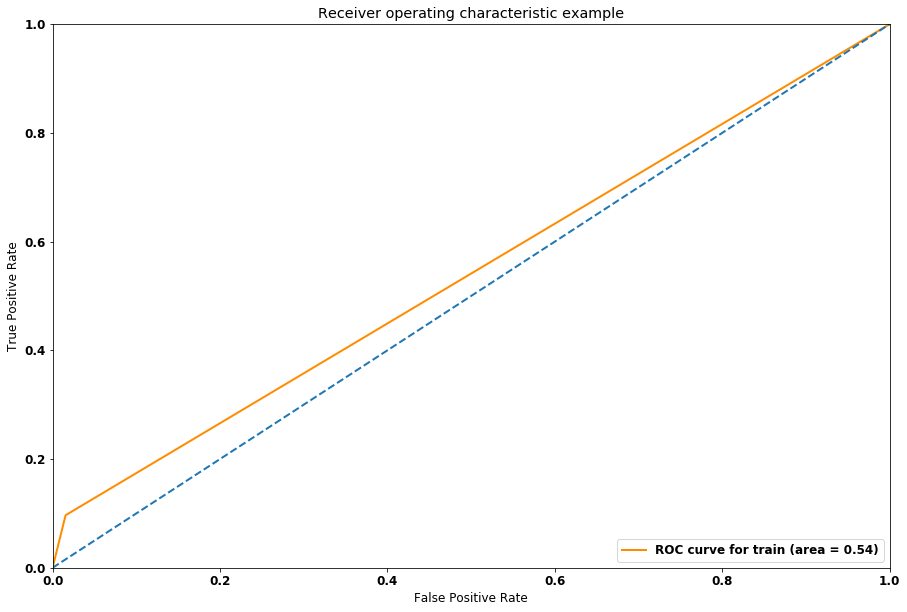

In [780]:
plt.rcParams['font.size'] = 12
fpr, tpr, thresholds = roc_curve((y_train).astype('int'), (train_pred).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

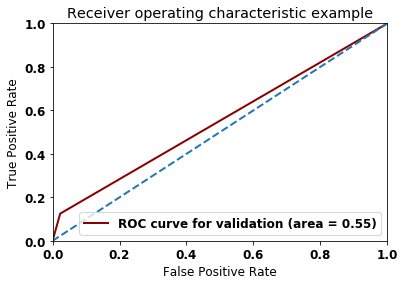

In [781]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(y_val.astype(int), val_pred.astype(int), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [326]:
test_pred=perceptron_model.predict_classes(X_test)  # epoch-100, batch_size-64

In [327]:
#pd.DataFrame(test_pred).to_csv("test_nn.csv",index=True)

# Getting SentimentIntensityAnalyzer values

In [782]:
X, y = rating_df.loc[:,'review'], rating_df.loc[:,'Sentiment']

In [783]:
X

0       Beautiful Movie!  Enjoyed seeing the mammals, ...
1       Good, some great lines, funny but some parts w...
2       I always loved the original! This Version was ...
3       Great animation of real animals. Scenery beaut...
4                                  #1 Movie in the world 
5                                Very funny, and poignant
6             Wonderful movie. Loved everything about it.
7       technically wonderful but the story needed a l...
8                         Loved it nothing I didn’t liked
9       With the exception of the impressive look of t...
10      I am really not a fan of Beyonc and I believe ...
11                       Daft - its meant to be a cartoon
12      Beautifully made movie.  Absolutely loved this...
13      It is a beautiful film but at its core it is a...
14      Super cool graphics made me super emotional 12...
15              Amazing! Loved it from beginning to end 💕
16      Beautiful movie.... Master-crafted....lives up...
17      It's a

In [784]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=646) 

In [785]:
X_train

88      The graphics were amazing. The story was just ...
2407    Perfectly done. Just like I remembered it. lov...
2899     I loved the cartoon version this was even better
1067    Visuals were great...that was it. The drama an...
2514    Great movie!!! We wished they would have kept ...
2404    Beyonc ruins it for me, I cant past it her.  H...
392     I loved the way it looked but they took out th...
2488    This movie exceeded my expectations by quite a...
2554    Loved this movie but Beyoncé as Nala was a let...
725                          Didn't enjoy Beyonce as Nala
2894           Cute furry creatures....talking! Adorable!
2205    It deviated away from the original.  My two fa...
649     A wonderful and beautifully update to a Disney...
2202         It was really boring , not for kids or teens
2997                         Nice remake of a good movie.
353     Although rated PG I found some of the animal f...
1564    Very cool remake for both adults and kids. The...
1747        It

In [786]:
X_train.shape

(2400,)

In [787]:
y_train

88      0
2407    0
2899    0
1067    1
2514    0
2404    1
392     1
2488    0
2554    0
725     1
2894    0
2205    1
649     0
2202    1
2997    0
353     1
1564    0
1747    1
916     1
2227    1
665     0
1685    0
446     0
997     0
372     1
1451    0
1221    1
129     1
1757    0
1646    0
       ..
1916    1
52      1
222     1
1907    1
2234    0
235     0
169     0
91      0
2916    0
41      0
2077    1
2412    1
303     0
1326    0
709     0
1492    0
2762    0
2048    0
2623    1
2010    0
848     1
1006    0
1771    0
1602    0
2499    0
2177    1
1370    1
1456    0
1       0
1363    0
Name: Sentiment, Length: 2400, dtype: category
Categories (2, object): [0, 1]

In [334]:
X_train

88      The graphics were amazing. The story was just ...
2407    Perfectly done. Just like I remembered it. lov...
2899     I loved the cartoon version this was even better
1067    Visuals were great...that was it. The drama an...
2514    Great movie!!! We wished they would have kept ...
2404    Beyonc ruins it for me, I cant past it her.  H...
392     I loved the way it looked but they took out th...
2488    This movie exceeded my expectations by quite a...
2554    Loved this movie but Beyoncé as Nala was a let...
725                          Didn't enjoy Beyonce as Nala
2894           Cute furry creatures....talking! Adorable!
2205    It deviated away from the original.  My two fa...
649     A wonderful and beautifully update to a Disney...
2202         It was really boring , not for kids or teens
2997                         Nice remake of a good movie.
353     Although rated PG I found some of the animal f...
1564    Very cool remake for both adults and kids. The...
1747        It

In [335]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

stop_words = set(stopwords.words('english'))
l2=[]

df=X_train
sid = SentimentIntensityAnalyzer()
for word in df:
    print(word)
    ss = sid.polarity_scores(word)
    l2.append(ss['neg'])
    for k in ss:
        print("{0}: {1}",k, ss[k])
        #compound -> +1 (highly positive) - -1(highly negative)

The graphics were amazing. The story was just like the original Disney cartoon version. I loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.484
{0}: {1} pos 0.516
{0}: {1} compound 0.9151
Perfectly done. Just like I remembered it. loved it...
It was even better watching my daughter see it for the first time and love it as I did as a child.
{0}: {1} neg 0.0
{0}: {1} neu 0.565
{0}: {1} pos 0.435
{0}: {1} compound 0.9565
I loved the cartoon version this was even better
{0}: {1} neg 0.0
{0}: {1} neu 0.469
{0}: {1} pos 0.531
{0}: {1} compound 0.7783
Visuals were great...that was it. The drama and feelings of each character was terribly missing and the death of Mufasa was a HUGE miss! The eyes of fear and the meaning of loyalty being stripped prior to be being killed was irrelevant. Beyoncé did not having any heart or passion for her character and she was too overpowering in the duets, she wanted to be heard and it ruined them. This movie could have been such a success and potential to leave an impr

While this version visually looks more real life, the cartoon version feels more "alive". The characters on the cartoon version draws in more empathy.
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
Surprisingly Not  as good as the original. Was missing something to me. Beautiful though. Well done animation and good casting.
{0}: {1} neg 0.23
{0}: {1} neu 0.426
{0}: {1} pos 0.344
{0}: {1} compound 0.5405
I love this movie so much than I love the classic! 
{0}: {1} neg 0.0
{0}: {1} neu 0.446
{0}: {1} pos 0.554
{0}: {1} compound 0.8655
I like how realistic the animals were.  The story line is so great!
{0}: {1} neg 0.0
{0}: {1} neu 0.555
{0}: {1} pos 0.445
{0}: {1} compound 0.8415
It was practically the same with almost no changes, really enjoyed it. But I would’ve liked to see a little different from the one before.🤷🏻‍♀️
{0}: {1} neg 0.067
{0}: {1} neu 0.707
{0}: {1} pos 0.226
{0}: {1} compound 0.669
entertaining, but doesn't live up to its ancestor.
{0}: {1} ne

We loved the CGI, the story parallels with the first, and the voice overs. Except Beyonce - not impressed with her voice over or her singing.
{0}: {1} neg 0.087
{0}: {1} neu 0.781
{0}: {1} pos 0.132
{0}: {1} compound 0.3283
The cinematography was gorgeous
{0}: {1} neg 0.0
{0}: {1} neu 0.429
{0}: {1} pos 0.571
{0}: {1} compound 0.6124
Incredible movie.  Loved the music, the scenery and the animation of the animals was amazing!
{0}: {1} neg 0.0
{0}: {1} neu 0.619
{0}: {1} pos 0.381
{0}: {1} compound 0.8398
This was pure complete crap. I hated it. Perhaps it will appeal to those who were not raised on the original... but I for one did not enjoy it at all. 
{0}: {1} neg 0.232
{0}: {1} neu 0.768
{0}: {1} pos 0.0
{0}: {1} compound -0.7809
Very good version of the original story
{0}: {1} neg 0.0
{0}: {1} neu 0.477
{0}: {1} pos 0.523
{0}: {1} compound 0.6697
My teenager and I enjoyed it. Great cinematography, classic story and soundtrack. Loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.463
{0}: {1} 

Jon Favreau triumphs in successfully tackling the ambitious challenge of remaking a classic, while enforcing photorealism as another masking medium for filmic storytelling and again demonstrating faithful lengths in really connecting to the story while honoring it. He did just that in exploring the circle of life in a way he wanted to tell it, despite being more flawed than his previous jungle expedition that was only groundbreaking and additionally hefty. "The Lion King" may not roar as mighty nor in a majestic fashion to the king's royal level, the undemanding remake successfully and perfectly naturally replicated the epic power to bolster the entertainment value in being noted as this year's best live-action remake from the brand, with beauty and honor. (A)
{0}: {1} neg 0.027
{0}: {1} neu 0.733
{0}: {1} pos 0.241
{0}: {1} compound 0.9996
Lived the message and appreciated sticking to the original story line and not pushing an agenda as do so many movies these days.
{0}: {1} neg 0.0
{

This movie has some absolutely amazing visuals, however, the visuals are the only thing that sets it apart from the original Lion King. With those visuals, you cannot express real raw emotion on the animal's faces, as you could in the original. This is really what brings the movie down for me. I was a little disappointed, with the original being my favorite Disney film. However, the actors who replaced the originals do an amazing job in their characters. I also felt like Pumbaa and Timon really stole the show. If you are a fan of the original, you will like the original better, but should still check this one out. 
{0}: {1} neg 0.016
{0}: {1} neu 0.794
{0}: {1} pos 0.19
{0}: {1} compound 0.9265
I didn't like how they changed important scenes from the original movie
{0}: {1} neg 0.148
{0}: {1} neu 0.563
{0}: {1} pos 0.289
{0}: {1} compound 0.2477
The original was way better. The music the animations everything. This was a good remake. They changed a few things which they shouldn't have 

The whole movie was great. The effects and animation was unbelievable. The animals looked like live animals.
{0}: {1} neg 0.0
{0}: {1} neu 0.625
{0}: {1} pos 0.375
{0}: {1} compound 0.8126
This was outstanding!
{0}: {1} neg 0.0
{0}: {1} neu 0.318
{0}: {1} pos 0.682
{0}: {1} compound 0.6476
Digital effects were amazing - music and heritage of original movie was well done with a few tasteful and well done "tweaks"
{0}: {1} neg 0.0
{0}: {1} neu 0.608
{0}: {1} pos 0.392
{0}: {1} compound 0.8519
They ruined the best parts of my all time favorite film but I was beautiful
{0}: {1} neg 0.093
{0}: {1} neu 0.455
{0}: {1} pos 0.452
{0}: {1} compound 0.836
The movie sucked and having to listen to Beyonce's obnoxious voice ruined it for me. 
{0}: {1} neg 0.431
{0}: {1} neu 0.569
{0}: {1} pos 0.0
{0}: {1} compound -0.8442
The animation is amazing!
{0}: {1} neg 0.0
{0}: {1} neu 0.423
{0}: {1} pos 0.577
{0}: {1} compound 0.6239
The voice acting was not great, the songs were awkward and forced, and thi

{0}: {1} neu 0.719
{0}: {1} pos 0.072
{0}: {1} compound -0.9334
Worth seeing - scenery beautiful,  animals very realistic, violent animal scenes...
{0}: {1} neg 0.246
{0}: {1} neu 0.412
{0}: {1} pos 0.342
{0}: {1} compound 0.1585
Thank you Disney!!!!
{0}: {1}  0.8334
Clearly a complete cash grab. But "live action" animation doesn't do this film justice. The original was SO much better. I don't care much for cast when the animation itself lets the audience down.
{0}: {1} neg 0.063
{0}: {1} neu 0.644
{0}: {1} pos 0.293
{0}: {1} compound 0.864
Elton John should have been the one singing.  I liked the original sound track better.
{0}: {1} neg 0.0
{0}: {1} neu 0.579
{0}: {1} pos 0.421
{0}: {1} compound 0.7906
Greatly enjoyed it.  No need to compare to original story.  It was wholesome and at moments quite humorous.
{0}: {1} neg 0.098
{0}: {1} neu 0.554
{0}: {1} pos 0.348
{0}: {1} compound 0.7448
I liked it even more than the first one.  The CGI was INCREDIBLE.
{0}: {1} neg 0.0
{0}: {1} neu 

Great movie! Would definitely see again!
{0}: {1} neg 0.0
{0}: {1} neu 0.351
{0}: {1} pos 0.649
{0}: {1} compound 0.8118
Not as good as the original but still was able to bring back some good memories.
{0}: {1} neg 0.247
{0}: {1} neu 0.668
{0}: {1} pos 0.085
{0}: {1} compound -0.4874
Different than the animated version. Thought it might be a little scary for very young children. under 5 maybe.
{0}: {1} neg 0.154
{0}: {1} neu 0.846
{0}: {1} pos 0.0
{0}: {1} compound -0.4417
Overall and OK film. Technically well-executed, but creatively uninspired. Pretty much a scene-by-scene replica of the original, which makes it palatable for all ages because the original was good, but also feels uninspired and "cheap." The best I can describe it is like watching a production of a Shakespeare play that you've read/seen so many times, but this time with different actors, costumes and sets pieces. It's fun to watch just for the nostalgia appeal. The voice acting was well-done all around except for Beyo

The animals and nature shots were beautiful. This was very well done. A great family movie for kids over 5.
{0}: {1} neg 0.0
{0}: {1} neu 0.6
{0}: {1} pos 0.4
{0}: {1} compound 0.8923
this movie was ABSOLUTELY STUNNING !!! 👍👍 definitely would recommend it to others :) 
{0}: {1} neg 0.0
{0}: {1} neu 0.427
{0}: {1} pos 0.573
{0}: {1} compound 0.9251
I was expecting the special effects in this movie to be far more advanced than what they were.  It was just an ok movie. Other children movies have been far better.  You would think the theater would be filled with child laughter and oohs and ahs, however it was pretty silent.   My 9 year old grandson almost fell asleep.
{0}: {1} neg 0.0
{0}: {1} neu 0.756
{0}: {1} pos 0.244
{0}: {1} compound 0.9381
I loved it!  The script was just like the animated version.
{0}: {1} neg 0.0
{0}: {1} neu 0.545
{0}: {1} pos 0.455
{0}: {1} compound 0.7712
pretty bad acting and singing. the cartoon is so much better.
{0}: {1} neg 0.196
{0}: {1} neu 0.447
{0}: {1

Coming from someone who’s not that big a fan of the original Lion King, I can say that I enjoyed this remake, which is often visually splendid, though I’ll say my biggest point of contention is the strict adherence to the source material down to shot choices and, especially, dialogue. I think bringing more originality to the film when such additions could have been made would have done wonders.
{0}: {1} neg 0.027
{0}: {1} neu 0.843
{0}: {1} pos 0.13
{0}: {1} compound 0.8145
Great cinematography. Not as many good songs compared to the original Lion King.
{0}: {1} neg 0.128
{0}: {1} neu 0.532
{0}: {1} pos 0.34
{0}: {1} compound 0.6116
Excellent remake! The animals were so realistic I kept forgetting it was CGI. I’m glad I pushed my 11 & 12 year old grandsons and 13 year old son to come see this fantastic movie with me on the big screen, nothing compares to that. They all loved it despite being “too old” for The Lion King! This is a must see for all ages...you won’t regret it
{0}: {1} neg

There were many other problems I had with the film (i.e. theme removal, incredibly rushed scene pacing, "Be Prepared" is shortened to a sloppy mess, and WAY too many riffs from Beyonce and Donald Glover), but these two points were the main ones that stuck out to me.
{0}: {1} neg 0.098
{0}: {1} neu 0.762
{0}: {1} pos 0.14
{0}: {1} compound 0.9912
Realky enjoyable. We've seen the original animated movie, the stage play and now the live action movie and it's a worthy extension of the story.
{0}: {1} neg 0.0
{0}: {1} neu 0.656
{0}: {1} pos 0.344
{0}: {1} compound 0.8591
This was my 1st time at the CineBistro, had a great time. I look forward to many more visits.
{0}: {1} neg 0.0
{0}: {1} neu 0.796
{0}: {1} pos 0.204
{0}: {1} compound 0.6249
A little scary for young children.
{0}: {1} neg 0.421
{0}: {1} neu 0.579
{0}: {1} pos 0.0
{0}: {1} compound -0.4417
If you aw the play, don't see the movie. It will destroy the happy memories of the play.
{0}: {1} neg 0.135
{0}: {1} neu 0.538
{0}: {1} p

{0}: {1} neu 0.544
{0}: {1} pos 0.393
{0}: {1} compound 0.8885
Nice redo with refreshing update in the score. Nice touch with Elton John doing the song on the credits. Good casting and always a great with James Earl Jones.
{0}: {1} neg 0.0
{0}: {1} neu 0.604
{0}: {1} pos 0.396
{0}: {1} compound 0.9337
I prefer the normal animated lion king movie. this was a little odd and not as enjoyable!
{0}: {1} neg 0.266
{0}: {1} neu 0.734
{0}: {1} pos 0.0
{0}: {1} compound -0.5726
The only thing I didn’t like about the movie, was being in the theater next to a teenage couple. I was with my 12 year old sister and the girl was giving her boyfriend a handy while under a blanket. Very disturbed, and couldn’t focus on the movie cause I was telling them to stop and get a room.
{0}: {1} neg 0.088
{0}: {1} neu 0.828
{0}: {1} pos 0.084
{0}: {1} compound -0.0498
Good movie. Nice visuals. Missing two of my fav moments in original and miss Nathan Lane.
{0}: {1} neg 0.153
{0}: {1} neu 0.403
{0}: {1} pos 0.444


the music and singing was extremely off key  and over sang, the magic in the movie compared to the original was ripped out , sadly the only thing that was holding this movie up was Seth Rogan playing pumba.
{0}: {1} neg 0.067
{0}: {1} neu 0.835
{0}: {1} pos 0.098
{0}: {1} compound 0.0772
I enjoyed the Other Lion King Version and this is a great rendition of the cartoon. I really enjoyed it.
{0}: {1} neg 0.0
{0}: {1} neu 0.567
{0}: {1} pos 0.433
{0}: {1} compound 0.8934
Monotone didn’t like it
{0}: {1} neg 0.0
{0}: {1} neu 0.545
{0}: {1} pos 0.455
{0}: {1} compound 0.3612
Okay. The movie was just okay. In the heat of Disney's phase of making all these live-action remakes, I found this to be very subpar. The original is infinitely better in practically every way. This kind of movie wasn't necessarily made to be in live-action. In fact, I'd say most of these Disney remakes were never meant for live-action. They were meant to be animated family fun for everyone. Anyways, this movie is defi

Jon Favreau is undoubtedly talented. I love Iron Man 1 obviously. The Jungle Book remake was perfect. While certain things were changed, they were changed well. THe Lion King is not an example of this. I had no emotional connection to ANY of these characters. I should have come out of this movie on CLOUD FUCKING 9 because of how much this movie means to me. Both, with the joy it brought to me as a youth and with an appreciation of the story being told when I reached adulthood. It saddens me. The cartoon is the best way to see this movie, undoubtedly. You can see the emotion of all the characters. The joy, the sadness, the disdain, the anger, everything. You don't get this with the remake. 1.75/5. I am truly sad to say this :(
{0}: {1} neg 0.125
{0}: {1} neu 0.712
{0}: {1} pos 0.163
{0}: {1} compound 0.981
I enjoyed this version of the Lion King for its realism and faithfulness to the original story. The animals are rendered beautifully and the songs are just as endearing the second tim

90s baby here, so I’m pretty biased. It was good, and I would probably be more impressed with it if I hadn’t grown up on the animated version. They left out some of the classic parts you’re expecting, and they switched out popular comic moments for new ones. But perhaps the saddest part of this for me was that James Earl Jones’ voice doesn’t always sound like Mufasa of the original.
{0}: {1} neg 0.075
{0}: {1} neu 0.72
{0}: {1} pos 0.205
{0}: {1} compound 0.8752
Awesome movie. Great picture quality and stuck with the original story
{0}: {1} neg 0.103
{0}: {1} neu 0.359
{0}: {1} pos 0.538
{0}: {1} compound 0.8591
Great updated version of a classic
{0}: {1} neg 0.0
{0}: {1} neu 0.494
{0}: {1} pos 0.506
{0}: {1} compound 0.6249
Was ok. Original was WAY better!! Didnt like the changes (although minor) they made. They shouldnt have messed with this one!!
{0}: {1} neg 0.073
{0}: {1} neu 0.557
{0}: {1} pos 0.369
{0}: {1} compound 0.8173
Good Movie, I think they could have done a better job wi

{0}: {1} compound -0.3313
The movie was good, but after halfway through Beyonce was so prominent it was annoying. Not only was she the voice of Nala, but Beyonce was also singing the songs in the background. Not in a subtle way either, it was exaggerated. They should of stayed closer to the original soundtrack. I also wish Simba and his mother had a stronger voice once the years had passed. It seemed he still had the voice of a young boy. The visuals were great and Seth Rogan made a great voice for Pumbaa.
{0}: {1} neg 0.047
{0}: {1} neu 0.705
{0}: {1} pos 0.248
{0}: {1} compound 0.975
The movie was well done, however I did not like the fact that the story line was identical to the cartoon classic.  I incorrectly assumed it would be slightly different like the Aladdin live action remake was.  The slight differences in Aladdin were enough to keep me interested throughout.
{0}: {1} neg 0.081
{0}: {1} neu 0.827
{0}: {1} pos 0.092
{0}: {1} compound 0.1481
Went to see 1st Lion King movie wh

{0}: {1} neu 0.42
{0}: {1} pos 0.58
{0}: {1} compound 0.8516
Too politically motivated.
{0}: {1} neg 0.0
{0}: {1} neu 0.4
{0}: {1} pos 0.6
{0}: {1} compound 0.4588
Great family movie. Kids and adults enjoyed great music and animation.
{0}: {1} neg 0.0
{0}: {1} neu 0.41
{0}: {1} pos 0.59
{0}: {1} compound 0.91
What a great movie. Couldn't believe that some of it was animated. Everything looked totally live!
{0}: {1} neg 0.0
{0}: {1} neu 0.761
{0}: {1} pos 0.239
{0}: {1} compound 0.6588
It was good but if you've seen one you've seen them all.
{0}: {1} neg 0.0
{0}: {1} neu 0.849
{0}: {1} pos 0.151
{0}: {1} compound 0.2382
The CGI is amazing. i couldn't believe it looked so mesmerzing. every shot was a work of art truly.
{0}: {1} neg 0.0
{0}: {1} neu 0.691
{0}: {1} pos 0.309
{0}: {1} compound 0.7717
If u don’t watch this ur mother is a whore.
{0}: {1} neg 0.381
{0}: {1} neu 0.619
{0}: {1} pos 0.0
{0}: {1} compound -0.6486
We really enjoyed the movie!!! It was a wonderful adaptation of the 

{0}: {1} pos 0.256
{0}: {1} compound 0.6249
I Loved how real it looked. Stayed very true to the animation. Loved the amount of action.
{0}: {1} neg 0.0
{0}: {1} neu 0.544
{0}: {1} pos 0.456
{0}: {1} compound 0.8977
Animation and special effects were awesome!
{0}: {1} neg 0.0
{0}: {1} neu 0.361
{0}: {1} pos 0.639
{0}: {1} compound 0.7959
Was breathtaking performance from everyone And the music was magic 
{0}: {1} neg 0.0
{0}: {1} neu 0.75
{0}: {1} pos 0.25
{0}: {1} compound 0.4588
We enjoyed the live action.  It was very realistic.
{0}: {1} neg 0.0
{0}: {1} neu 0.708
{0}: {1} pos 0.292
{0}: {1} compound 0.5106
in all honesty, this was a terrible movie. it is just another live action rehash of one of the memorable animated movies we had growing up. the characters faces display few emotions, making the film have this empty vibe to it. for God's sake, they replaced and redone different things within the original only so people would go out and buy a ticket to see the changes in theaters. u

Much better than I expected & the start of the movie was amazing.
{0}: {1} neg 0.0
{0}: {1} neu 0.573
{0}: {1} pos 0.427
{0}: {1} compound 0.7717
It followed the story line pretty closely but they put a little bit of a new spin on it. My kids and I loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.721
{0}: {1} pos 0.279
{0}: {1} compound 0.829
I really enjoyed this version. The original will always hold a special place in my heart because I watched it a hundred times while my children were growing up. This version was not as colorful as the original and that's what I missed but it was more realistic. I just love looking at the lions because I think they are a beautiful animal.
{0}: {1} neg 0.023
{0}: {1} neu 0.682
{0}: {1} pos 0.295
{0}: {1} compound 0.9568
I loved this movie! Far exceeded my expectations! Would pay to see it again.
{0}: {1} neg 0.083
{0}: {1} neu 0.652
{0}: {1} pos 0.266
{0}: {1} compound 0.6229
I loved Pumba and Timon. Seth Rogen steals the show. Sorry, but Beyoncé is not an

{0}: {1} neg 0.0
{0}: {1} neu 0.632
{0}: {1} pos 0.368
{0}: {1} compound 0.7184
Well done! The film follows the original storyline. The animals are lifelike and that makes it captivating. Love the music.
{0}: {1} neg 0.0
{0}: {1} neu 0.657
{0}: {1} pos 0.343
{0}: {1} compound 0.8356
Great movie ! The live action is incredible!!!
{0}: {1} neg 0.0
{0}: {1} neu 0.532
{0}: {1} pos 0.468
{0}: {1} compound 0.7405
Beautiful animation!
{0}: {1} neg 0.0
{0}: {1} neu 0.193
{0}: {1} pos 0.807
{0}: {1} compound 0.636
They shouldn’t have changed the original songs. They would have been safe ADDING a few new ones. But the originals are what people remember and grew up on.
{0}: {1} neg 0.0
{0}: {1} neu 0.828
{0}: {1} pos 0.172
{0}: {1} compound 0.6369
Lack of depth, more time was put in animation than the story. Decent movie but I probably won't watch it again.
{0}: {1} neg 0.08
{0}: {1} neu 0.92
{0}: {1} pos 0.0
{0}: {1} compound -0.1655
My friend and I took her 6 year old grandson who kept asking i

The visuals in this movie are impressive. The photo realism is astounding, but that's not all this movie should've been. The story was a copy and paste of the original, much like a video game remake. The voice acting was subpar at some points. Some of the most influential scenes (Mufasas death, Scars musical number, Hakuna Matata) were dull and lifeless BECAUSE of the photo realism. The characters can't emote properly so some of the body movements are exaggerated, but then it gives the characters an uncanny valley vibe. One of the best Disney villain songs in my opinion was completely scraped and only had a hint of the original song towards the very end, but even then it wasn't there. Because this is photorealistic, there's no creativity. What should've been inspiration, was just there to be a template to animate over. The lack of facial expressions kills this whole movie. When Simba sees his father dead on the gorge floor in the original, he is so expressive and it makes you feel what

{0}: {1} compound 0.92
Great movie for all ages
{0}: {1} neg 0.0
{0}: {1} neu 0.494
{0}: {1} pos 0.506
{0}: {1} compound 0.6249
Loved everything about this version with the exception of  some of the voices just didn't feel / sound right for thr characters. I had know idea Beyonce was one of them. Great animation,
{0}: {1} neg 0.0
{0}: {1} neu 0.784
{0}: {1} pos 0.216
{0}: {1} compound 0.8402
They did an amazing job.
{0}: {1} neg 0.0
{0}: {1} neu 0.513
{0}: {1} pos 0.487
{0}: {1} compound 0.5859
Like the new version.
{0}: {1} neg 0.0
{0}: {1} neu 0.545
{0}: {1} pos 0.455
{0}: {1} compound 0.3612
I loved it! The real animals, the action... the music! Perfect just like the cartoon!
{0}: {1} neg 0.0
{0}: {1} neu 0.501
{0}: {1} pos 0.499
{0}: {1} compound 0.8996
the first 15 minutes the 3d did not work.  The picture was blurry and then it finally became what 3d  should look like.  Very frustrating.  Other than that problem loved the movie.
{0}: {1} neg 0.179
{0}: {1} neu 0.664
{0}: {1} pos 

{0}: {1} pos 0.529
{0}: {1} compound 0.874
Pumba and Timon stile the show!!! Very cute!
{0}: {1} neg 0.0
{0}: {1} neu 0.611
{0}: {1} pos 0.389
{0}: {1} compound 0.6663
Seemed rushed.  They didnt even have scar sing his be prepared song. They had him quote the words to the song.  I wish theyd just quit while theyre ahead.
{0}: {1} neg 0.0
{0}: {1} neu 0.85
{0}: {1} pos 0.15
{0}: {1} compound 0.5574
The CGI was good except for the lions legs. they did a good job. better singers would have been good. just a personal preference. but overall was good!
{0}: {1} neg 0.0
{0}: {1} neu 0.637
{0}: {1} pos 0.363
{0}: {1} compound 0.8733
The visuals were stunning!
{0}: {1} neg 0.0
{0}: {1} neu 0.509
{0}: {1} pos 0.491
{0}: {1} compound 0.4389
Absolutely loved it.  So incredibly realistic that Im convinced the animals were trained to mouth the words. Highly recommend
{0}: {1} neg 0.0
{0}: {1} neu 0.623
{0}: {1} pos 0.377
{0}: {1} compound 0.8653
Very accurate and stuck to the original story very clo

I enjoyed it dont get why so many hate it just cause its a remake doesnt mean you have to get your panties in a wad
{0}: {1} neg 0.141
{0}: {1} neu 0.743
{0}: {1} pos 0.117
{0}: {1} compound -0.1725
I thought it was a really good movie. It reminded me of my child and all the things I use to live about the lion king
{0}: {1} neg 0.0
{0}: {1} neu 0.873
{0}: {1} pos 0.127
{0}: {1} compound 0.4927
they didn't change it. GOOD!
{0}: {1} neg 0.448
{0}: {1} neu 0.552
{0}: {1} pos 0.0
{0}: {1} compound -0.5007
Loved the graphics.  Looked true to life.  Songs were not as vibrant as the original movie.
{0}: {1} neg 0.117
{0}: {1} neu 0.505
{0}: {1} pos 0.379
{0}: {1} compound 0.7371
Just as good as the movie, with some changes of course but still was good loved it
{0}: {1} neg 0.0
{0}: {1} neu 0.557
{0}: {1} pos 0.443
{0}: {1} compound 0.9032
Was blurry and not loud enough
{0}: {1} neg 0.219
{0}: {1} neu 0.781
{0}: {1} pos 0.0
{0}: {1} compound -0.1027
Great animation!, story line followed the or

In [788]:
l2=pd.DataFrame(l2, columns=['negative_score'])

In [789]:
X_train_neg_score=l2['negative_score']

In [790]:
X_train

88      The graphics were amazing. The story was just ...
2407    Perfectly done. Just like I remembered it. lov...
2899     I loved the cartoon version this was even better
1067    Visuals were great...that was it. The drama an...
2514    Great movie!!! We wished they would have kept ...
2404    Beyonc ruins it for me, I cant past it her.  H...
392     I loved the way it looked but they took out th...
2488    This movie exceeded my expectations by quite a...
2554    Loved this movie but Beyoncé as Nala was a let...
725                          Didn't enjoy Beyonce as Nala
2894           Cute furry creatures....talking! Adorable!
2205    It deviated away from the original.  My two fa...
649     A wonderful and beautifully update to a Disney...
2202         It was really boring , not for kids or teens
2997                         Nice remake of a good movie.
353     Although rated PG I found some of the animal f...
1564    Very cool remake for both adults and kids. The...
1747        It

In [791]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

stop_words = set(stopwords.words('english'))
l3=[]

df=X_val
sid = SentimentIntensityAnalyzer()
for word in df:
    print(word)
    ss = sid.polarity_scores(word)
    l3.append(ss['neg'])
    for k in ss:
        print("{0}: {1}",k, ss[k])
        #compound -> +1 (highly positive) - -1(highly negative)

if you love the lion king like I do, a shot for shot remake is going to be at least somewhat good because you're going to be sitting there remembering how good the lion king is in general. Disney the company is shamelessly making money off of these remakes and I'm rating it so low not because the movie is terrible, but because it's a not as good version of a movie I love made purely for profit. on the plus side, if you go home after watching this and watch the old one, you'll appreciate it that much more.
{0}: {1} neg 0.049
{0}: {1} neu 0.733
{0}: {1} pos 0.218
{0}: {1} compound 0.9655
In tears! I loved the movie, amazing effects.
{0}: {1} neg 0.137
{0}: {1} neu 0.288
{0}: {1} pos 0.575
{0}: {1} compound 0.7959
Great movie - loved it.  Wish my grandkids and great grandkids had been with me to see it.  Wonderful story of coming of age.  I laughed and cried and loved it.
{0}: {1} neg 0.053
{0}: {1} neu 0.429
{0}: {1} pos 0.518
{0}: {1} compound 0.9744
Excellent Remake....
{0}: {1} neg 0.

My kiddos and I thoroughly enjoyed this film, which we saw in the theater (though we opted against the 3d version).  There is no question that the special effects look real, as though there are live animals speaking and interacting with each other.  The kids particularly liked the comic routine of Pumba and Timon (yes, especially the farting!), and their various forest friends.  But what struck me about this movie was the extraordinary precision with which it hewed to the plot of its animated predecessor, with characters, scene, and sequence virtually identical (as well as the songs, which is understandable; and, I think, even the dialogue).  I'm going to look out for the extent to which other Disney live-action successors replicate their canonical referents.  It's probably best to interpret the virtual duplication as testimony to the power and interest of the original animated version and its new digital doppelganger.
{0}: {1} neg 0.025
{0}: {1} neu 0.816
{0}: {1} pos 0.159
{0}: {1} c

I really loved seeing the real-life animation and hearing the songs that I knew so well from the original movie however, I wish some changes had been made to the storyline to make it more than just a frame-by-frame recreation of the original movie.
{0}: {1} neg 0.0
{0}: {1} neu 0.711
{0}: {1} pos 0.289
{0}: {1} compound 0.9222
So lifelike, incredible. The music is so awesome, just a great family feel good movie
{0}: {1} neg 0.0
{0}: {1} neu 0.468
{0}: {1} pos 0.532
{0}: {1} compound 0.9261
The Lion King (2019) is visually game-changing, beautifully acted and Hans Zimmer's score is still just as visceral, but the movie suffers from being a shallow, soulless remake that adds nothing new to the original and robs it of its heart.
{0}: {1} neg 0.165
{0}: {1} neu 0.728
{0}: {1} pos 0.107
{0}: {1} compound -0.5927
Unfortunately not as good as I imagined. I thought some of the actors sounded a bit flat and found the same with the songs in comparison with the original. However, the animation wa

{0}: {1} compound -0.3384
Great computer animation with animal actions.
{0}: {1} neg 0.0
{0}: {1} neu 0.549
{0}: {1} pos 0.451
{0}: {1} compound 0.6249
I hated Beyonce as Nala. It was distracting and her acting was AWFUL! Everything else was great! My favorite was Seth Rogen as Pumba!
{0}: {1} neg 0.305
{0}: {1} neu 0.498
{0}: {1} pos 0.197
{0}: {1} compound -0.6006
CGI version of the original movie. It was good but nothing extra to bring a little more interest.
{0}: {1} neg 0.0
{0}: {1} neu 0.647
{0}: {1} pos 0.353
{0}: {1} compound 0.7665
I loved the original movie and this one as well. It was a new take on a classic and the actors and actresses, musical score and graphics were fantastic. It was refreshing to watch, know what's coming next and join in.
{0}: {1} neg 0.0
{0}: {1} neu 0.701
{0}: {1} pos 0.299
{0}: {1} compound 0.9201
Absolutely awesome for the whole family. Fans of the animated and now this one. Not sure what movie the critics went to but this was amazing. They stuck tr

{0}: {1} compound 0.9761
I guess if animals could talk this is what it would look like? Movie was not that entertaining, kids got bored halfway through and wanted to go home. Dialogue was far too advanced for children, and it was bad jokes back to back to back. Characters almost felt uncomfortable in their own skin. 
{0}: {1} neg 0.167
{0}: {1} neu 0.728
{0}: {1} pos 0.105
{0}: {1} compound -0.5897
Something is wrong with this movie... Very wrong
{0}: {1} neg 0.508
{0}: {1} neu 0.492
{0}: {1} pos 0.0
{0}: {1} compound -0.7351
It was good! They balanced between staying true to the original film and adding somethings new.
{0}: {1} neg 0.0
{0}: {1} neu 0.611
{0}: {1} pos 0.389
{0}: {1} compound 0.807
I gave it 3 and 1/2 I liked it and I don’t really understand the hate on Beyoncé I thought it was good and honestly I liked it better then the original 
{0}: {1} neg 0.1
{0}: {1} neu 0.479
{0}: {1} pos 0.421
{0}: {1} compound 0.8942
Not even remotely good as the original
{0}: {1} neg 0.248
{0

I am really not a fan of Beyonc and I believe they couldve picked somebody else to play that role and I do not like how they took out the one song to add her new single
{0}: {1} neg 0.118
{0}: {1} neu 0.816
{0}: {1} pos 0.065
{0}: {1} compound -0.2383
Pretty much the same as the cartoon.  We enjoyed it
{0}: {1} neg 0.0
{0}: {1} neu 0.552
{0}: {1} pos 0.448
{0}: {1} compound 0.7579
Movie was well made, but it was darker and more violent. I enjoyed the original better.
{0}: {1} neg 0.2
{0}: {1} neu 0.345
{0}: {1} pos 0.456
{0}: {1} compound 0.7527
The lion king is a photorealistic retelling of the 1994 film the lion king and its visual effects are stand out amazing and you must see this in the theater and experience it in its form but it’s basically just a shot for shot and some people say what’s really the punt then but I have to say 4.5/5 and you should see this in the theater
{0}: {1} neg 0.0
{0}: {1} neu 0.963
{0}: {1} pos 0.037
{0}: {1} compound 0.34
stayed true to original animated

I disliked that the facial expressions on the characters and that some parts were kinda the same but not really
{0}: {1} neg 0.093
{0}: {1} neu 0.907
{0}: {1} pos 0.0
{0}: {1} compound -0.2144
This is my favorite play and also saw the last movie. Asked my 14 year old granddaughter to go with me to a matinee. She loved it and admitted it. The animals look so real that little kids in the audience would scream for or against different scenes in the movie. Highly recommend.
{0}: {1} neg 0.043
{0}: {1} neu 0.74
{0}: {1} pos 0.217
{0}: {1} compound 0.8687
Just like the original! My kids loved it!
{0}: {1} neg 0.0
{0}: {1} neu 0.35
{0}: {1} pos 0.65
{0}: {1} compound 0.8513
Though a little too intense for children, I thought it was an AWESOME adult movie!  As always, Disney is killing it!!!
{0}: {1} neg 0.16
{0}: {1} neu 0.583
{0}: {1} pos 0.256
{0}: {1} compound 0.3864
The music and animation is spectacular, enhancing a beautiful underlying message.
{0}: {1} neg 0.0
{0}: {1} neu 0.698
{0}: {

Visually impressive, the CGI is almost indistinguishable from reality. Follows the story of the original and probably more enjoyable for those who haven’t seen it but a little repetitive for those of us who have. 
{0}: {1} neg 0.054
{0}: {1} neu 0.79
{0}: {1} pos 0.155
{0}: {1} compound 0.4284
CGI graphics are very well done. Cute rendition of a Disney classic. Disappointing that some of the best scenes from the animated original were left out. Made the movie feel lacking throughout the whole film.
{0}: {1} neg 0.072
{0}: {1} neu 0.654
{0}: {1} pos 0.274
{0}: {1} compound 0.8384
Beautiful, meaning, amazing
{0}: {1} neg 0.0
{0}: {1} neu 0.115
{0}: {1} pos 0.885
{0}: {1} compound 0.8271
This movie should be seen in the theatre.  It will not be same on DVD.
{0}: {1} neg 0.0
{0}: {1} neu 1.0
{0}: {1} pos 0.0
{0}: {1} compound 0.0
Looked sensational! Too bad it's super slow and stale!
{0}: {1} neg 0.234
{0}: {1} neu 0.467
{0}: {1} pos 0.299
{0}: {1} compound 0.2462
I love how it follows the

In [341]:
l3

[0.049,
 0.137,
 0.053,
 0.0,
 0.139,
 0.353,
 0.239,
 0.0,
 0.0,
 0.0,
 0.031,
 0.0,
 0.298,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.249,
 0.0,
 0.0,
 0.0,
 0.034,
 0.185,
 0.0,
 0.0,
 0.0,
 0.083,
 0.0,
 0.0,
 0.0,
 0.086,
 0.0,
 0.04,
 0.0,
 0.0,
 0.0,
 0.262,
 0.0,
 0.037,
 0.0,
 0.0,
 0.0,
 0.0,
 0.094,
 0.0,
 0.0,
 0.286,
 0.043,
 0.0,
 0.0,
 0.069,
 0.0,
 0.117,
 0.0,
 0.0,
 0.153,
 0.059,
 0.0,
 0.028,
 0.025,
 0.0,
 0.082,
 0.206,
 0.0,
 0.0,
 0.074,
 0.0,
 0.572,
 0.096,
 0.0,
 0.0,
 0.187,
 0.141,
 0.076,
 0.0,
 0.088,
 0.089,
 0.0,
 0.024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.203,
 0.126,
 0.0,
 0.0,
 0.049,
 0.068,
 0.0,
 0.0,
 0.281,
 0.452,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.354,
 0.0,
 0.0,
 0.04,
 0.101,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.048,
 0.0,
 0.0,
 0.214,
 0.13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.165,
 0.099,
 0.0,
 0.25,
 0.0,
 0.073,
 0.469,
 0.241,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.047,
 0.0,
 0.0,


In [792]:
l3=pd.DataFrame(l3,columns=['negative_score'])

In [793]:
X_val_negative_score=l3['negative_score']

In [794]:
X_val

2851    if you love the lion king like I do, a shot fo...
1372        In tears! I loved the movie, amazing effects.
1234    Great movie - loved it.  Wish my grandkids and...
2135                                 Excellent Remake....
281     This movie is tough to rate, it is technically...
2481    Not anything special like the other remakes. U...
2742                  they no have the Ice its hot inside
66      I enjoyed the cartoon better. \r\nBut the movi...
2303    Great movie until Beyonce started speak. Her f...
1330      Loved this movie. Had to go to a second viewing
1739    If Disney used the original audio (cast and so...
1213    Like Simba, Nana and all the characters’ great...
642     I've never been so angry about a movie in all ...
2259    Simba’s voice wasn’t masculine enough to be a ...
2002    They nailed Timon, Pumbaa, and Zazu! It was li...
2621    Very good show.  Almost Word for word from the...
319     was nice to watch a older movie going from a c...
1741    it was

In [ ]:
#X=pd.concat([X,l2],axis=1)

# Pre Processing Text before Glove word Embedding

In [795]:
unique_elements, counts_elements = np.unique(X_train.apply(len),return_counts=True)

In [796]:
np.unique(X_train.apply(len),return_counts=True) # unique elements(length of each review) have a count of 500 each

(array([  15,   16,   19,   20,   21,   22,   23,   24,   25,   26,   27,
          28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
          39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
          50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164, 

In [349]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
max_text_count_length #index

4

In [797]:
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

21

In [351]:
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

21

# LSTM - getting context out of lSTM model and feeding it to a classifier

In [352]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings
root = Path('../')
input_path = root / 'input/'
ouput_path = root / 'output/'
source_path = root / 'source/'

In [798]:
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 

In [799]:
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [800]:
X_train = X_train.apply(remove_stopwords).apply(remove_mentions)

In [801]:
X_val = X_val.apply(remove_stopwords).apply(remove_mentions)

In [802]:
X_test=test_df['review']

In [803]:
X_test= X_test.apply(remove_stopwords).apply(remove_mentions)

In [804]:
tk = Tokenizer(num_words=NB_WORDS,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_val_seq = tk.texts_to_sequences(X_val)

In [805]:
X_test_seq=tk.texts_to_sequences(X_test)

In [806]:
len(X_train_seq)

2400

# zero padding to sequences

In [362]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)
X_val_seq_trunc = pad_sequences(X_val_seq, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)

In [807]:
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)

## Encoding Target variable

In [808]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_val_oh = to_categorical(y_val_le)

# Model Building

In [810]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='binary_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

In [811]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(4487, 8, input_length=REVIEW_TEXT_MAX_SEQUENCE_LENGTH,dropout=0.2))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(2, activation='sigmoid'))
emb_history = deep_model(emb_model, X_train_seq_trunc, y_train_oh, X_val_seq_trunc, y_val_oh)

In [812]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_val_seq_trunc, y_val_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

600/600 [==============================] - ETA:  - 0s 20us/step
/n
Test accuracy of word embeddings model: 74.33%


In [817]:
emb_model.fit(X_train_seq_trunc
              , y_train_oh
              , epochs=6
              , batch_size=BATCH_SIZE
              , verbose=0)
results = emb_model.evaluate(X_val_seq_trunc, y_val_oh)

600/600 [==============================] - ETA:  - 0s 20us/step


In [818]:
results # loss value and metrics

[0.4825745228926341, 0.7708333333333334]

In [819]:
emb_model.evaluate(X_train_seq_trunc,y_train_oh)

2400/2400 [==============================] - ETA:  - 0s 17us/step


[0.41738430937131243, 0.8329166666666666]

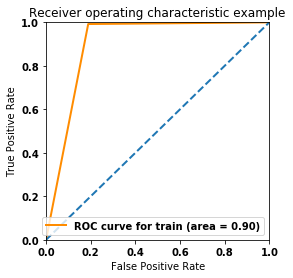

In [884]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(emb_model.predict_classes(X_train_seq_trunc)), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

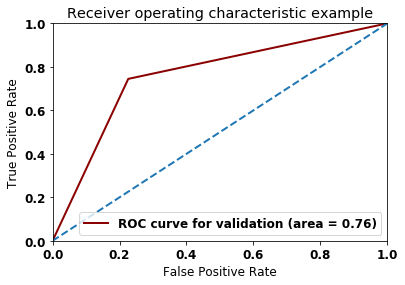

In [888]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(pd.DataFrame(emb_model.predict_classes(X_val_seq_trunc)), (y_val).astype('int'), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [830]:
pd.DataFrame(y_train_oh)

0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     0.0  1.0
4     1.0  0.0
5     0.0  1.0
6     0.0  1.0
7     1.0  0.0
8     1.0  0.0
9     0.0  1.0
10    1.0  0.0
11    0.0  1.0
12    1.0  0.0
13    0.0  1.0
14    1.0  0.0
15    0.0  1.0
16    1.0  0.0
17    0.0  1.0
18    0.0  1.0
19    0.0  1.0
20    1.0  0.0
21    1.0  0.0
22    1.0  0.0
23    1.0  0.0
24    0.0  1.0
25    1.0  0.0
26    0.0  1.0
27    0.0  1.0
28    1.0  0.0
29    1.0  0.0
...   ...  ...
2370  0.0  1.0
2371  0.0  1.0
2372  0.0  1.0
2373  0.0  1.0
2374  1.0  0.0
2375  1.0  0.0
2376  1.0  0.0
2377  1.0  0.0
2378  1.0  0.0
2379  1.0  0.0
2380  0.0  1.0
2381  0.0  1.0
2382  1.0  0.0
2383  1.0  0.0
2384  1.0  0.0
2385  1.0  0.0
2386  1.0  0.0
2387  1.0  0.0
2388  0.0  1.0
2389  1.0  0.0
2390  0.0  1.0
2391  1.0  0.0
2392  1.0  0.0
2393  1.0  0.0
2394  1.0  0.0
2395  0.0  1.0
2396  0.0  1.0
2397  1.0  0.0
2398  1.0  0.0
2399  1.0  0.0

[2400 rows x 2 columns]

In [371]:
test_pred=emb_model.predict_classes(X_test_seq_trunc)

In [372]:
#pd.DataFrame(test_pred).to_csv("test_emb.csv",index=True)

# GLoVe 

In [834]:
word_index_review_text = tk.word_index
print('Found %s unique tokens.' % len(word_index_review_text))
NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

Found 4486 unique tokens.


In [835]:
NUM_WORDS_REVIEW_TEXT

4487

In [375]:
#load the whole embedding into memory
embeddings_index = dict()
f = open('glove.twitter.27B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193514 word vectors.


In [376]:
tk.word_index.items()

dict_items([('movie', 1), ('original', 2), ('it', 3), ('the', 4), ('great', 5), ('loved', 6), ('like', 7), ('not', 8), ('good', 9), ('story', 10), ('animals', 11), ('amazing', 12), ('lion', 13), ('version', 14), ('king', 15), ('really', 16), ('better', 17), ('see', 18), ('film', 19), ('remake', 20), ('one', 21), ('animated', 22), ('much', 23), ('real', 24), ('animation', 25), ('this', 26), ('voice', 27), ('would', 28), ('disney', 29), ('characters', 30), ('well', 31), ('love', 32), ('enjoyed', 33), ('music', 34), ('new', 35), ('made', 36), ('done', 37), ('realistic', 38), ('no', 39), ('beautiful', 40), ('cartoon', 41), ('cgi', 42), ('still', 43), ('felt', 44), ('liked', 45), ('little', 46), ('live', 47), ('watch', 48), ('they', 49), ('time', 50), ('life', 51), ('kids', 52), ('scenes', 53), ('classic', 54), ('very', 55), ('emotion', 56), ('songs', 57), ('feel', 58), ('even', 59), ('awesome', 60), ('old', 61), ('watching', 62), ('everything', 63), ('could', 64), ('simba', 65), ('best', 6

In [836]:
emb_matrix = np.zeros((NUM_WORDS_REVIEW_TEXT, 50))
review_word_not_in_glove =[]
review_word_not_in_glove_count=0
for w, i in tk.word_index.items():
    if i < NB_WORDS:
        vect = embeddings_index.get(w)
        if vect is not None:
            emb_matrix[i] = vect
            print(vect)
    else:
        review_word_not_in_glove.append(word)
        review_word_not_in_glove_count = review_word_not_in_glove_count+1
        break

[-0.52439   0.69869   0.43413  -0.32594   0.28787  -0.17434   1.5951
  0.59349  -0.046551  0.11204   0.28161  -0.2822   -4.2177    0.89305
  0.18727  -0.25997   0.52339   0.43218  -0.42541   1.0957   -0.5298
  0.028357 -0.080996  0.068385 -0.062427 -0.12048  -0.94378  -0.39691
 -0.27545  -0.68235   0.28207   0.24672  -0.72618  -0.10179  -0.4691
 -0.17448   0.74891  -1.7316    0.36563  -1.1838   -1.1744   -0.25054
  0.37562   0.22527   0.25894   1.0189    0.16573  -0.44412  -0.80564
  0.2862  ]
[-1.0275   -0.60187  -0.095824  0.3133    0.9672    0.16158   0.85889
  0.2104    0.33039  -0.11373   0.080155  0.45342  -3.0531   -0.41579
  0.11326  -0.3126    0.96516   0.60353   0.55497   0.47665  -0.66782
 -0.027514 -0.010834 -1.0161   -0.62481  -0.94437  -0.12041  -0.037324
  0.42732  -0.93862   0.15682   0.019411 -0.44074  -0.43638   0.72999
 -0.5878   -0.13828  -0.96727  -0.40805  -0.23628  -1.2192   -0.26249
  0.043386 -0.37812  -0.3363   -0.10761   0.33541   0.37349  -0.84071
 -0.63547 

  0.37465    0.010619 ]
[ 3.8798e-01  4.1259e-01  1.1088e-01 -3.1950e-01 -2.4993e-01  5.1480e-01
  1.1895e+00  1.2972e-01  1.4492e-01  3.6331e-01 -2.0721e-01  1.0299e-01
 -5.7882e+00 -4.8716e-01 -4.7270e-02 -1.4607e-01  2.4650e-03 -3.7360e-01
 -4.2274e-01 -2.1037e-01  5.7178e-01  5.7590e-02  1.6542e-01  8.2709e-01
 -2.9750e-01  8.2443e-01 -2.6889e-01  4.6275e-01  2.4003e-01 -6.7370e-01
 -4.4532e-01  4.2877e-01  4.1317e-02 -1.9785e-01 -2.2389e-01  5.2941e-01
 -6.5028e-01 -3.4271e-01  3.3597e-01  6.1522e-01 -7.6909e-01 -2.8561e-02
  5.7861e-01  2.3178e-01 -5.7820e-02 -6.6985e-01  6.1158e-01 -1.9229e-01
 -9.7579e-01 -3.5407e-01]
[ 3.5339e-02 -3.9547e-02 -1.5051e-01 -1.7876e-01 -1.1363e-01  7.3212e-01
  1.0960e+00  4.6267e-01 -3.8790e-01  6.1733e-01 -1.9141e-01  1.6187e-01
 -5.3459e+00 -3.7108e-02  2.8463e-01  2.3848e-02 -8.1312e-02 -3.0353e-01
 -6.0300e-01 -5.8610e-02  2.7376e-02  1.5328e-01 -8.0363e-02  6.3788e-01
 -2.7521e-01  8.9720e-01  5.6226e-01 -3.9128e-03  1.6514e-01 -4.4416e-01
 

 -7.9937e-01 -3.7498e-01]
[ 5.6287e-01  3.3533e-01  3.8851e-01 -1.6341e-01 -2.6208e-01  6.2520e-01
  7.0515e-01  7.7083e-02 -1.9264e-01  7.3761e-01  5.7376e-03  2.3695e-02
 -5.1338e+00 -2.3378e-01  9.4279e-02  8.6392e-02  4.1383e-01 -3.5448e-01
 -1.2704e+00 -3.2374e-01 -1.9472e-01  8.9160e-02  4.0551e-03  4.7017e-01
 -1.3602e-01  9.1353e-01  1.8697e-01 -6.3095e-02  1.0357e+00 -6.9705e-01
  1.3706e-01  7.9820e-01  2.4979e-01 -1.9670e-01  3.1018e-01  4.3059e-01
 -5.9596e-02  3.0546e-01 -4.9236e-02  2.9651e-01 -6.4625e-01 -4.9730e-02
  1.0043e+00  8.0171e-01 -1.8514e-02 -5.5270e-01  1.2749e-01  3.5077e-02
 -3.2751e-01  1.8860e-01]
[-0.20258   0.20543   0.17236   0.74813  -0.67589   0.15501   1.2159
  0.076141 -0.54138   0.13545  -0.71692   0.3132   -5.1367   -0.51263
 -1.1023    0.2162   -0.17089  -0.11303  -0.60699   0.62725   0.58585
  0.37587  -0.22522   0.98157   0.32612  -0.064337 -0.082492  0.34397
  1.0403   -1.0402   -0.62527  -0.42018  -0.43558   0.58537   0.11988
 -0.24759   0.4

  0.1003  ]
[ 0.02896   0.56291   0.17958  -0.48992   0.1328    0.44708   0.86729
  0.6509   -0.29675  -0.20945   0.017871 -0.075247 -4.2639   -0.055036
 -0.49471  -0.77981  -0.036401  0.656    -0.66948  -0.18147   0.22621
 -1.1558   -0.20862  -0.31005   0.39507  -0.66858   0.4007    0.27866
 -0.061713  0.20618   0.24776  -0.8523   -0.33203   0.57023   1.1228
 -0.53009   0.19031  -1.0238   -0.11336   0.425    -1.2937    0.33876
 -0.29548   0.66687  -0.30609   0.70134  -0.041847 -0.1717    0.020294
  0.18103 ]
[-8.3414e-03  6.3162e-01  5.2193e-01 -9.4374e-01 -4.7076e-01 -6.0243e-02
  1.2472e+00  5.4026e-01  4.8764e-01  4.3398e-01 -5.9578e-03 -1.6741e-01
 -4.8379e+00  4.9179e-01 -5.8369e-01 -3.7601e-01  2.2189e-01  3.2406e-01
 -6.0114e-02  4.1612e-01 -1.7364e-01 -6.1051e-01  6.8058e-01 -4.3740e-01
 -1.9651e-01  1.4036e-01 -1.8623e-03  8.5711e-01 -5.5021e-01 -2.5930e-01
  4.8016e-01 -7.0230e-02 -4.3988e-01  4.8108e-01  2.0314e-01 -7.9547e-02
  6.4179e-01 -9.5948e-01  2.3295e-01 -2.8956e-0

  3.2927e-02 -2.1659e-01]
[-0.029621 -0.11334   0.15299   0.91998   0.2453    1.0687    0.98006
 -0.060012 -0.036346  0.69884   0.49467  -0.2283   -5.2751   -0.24952
 -0.72961   0.47597   0.096308 -0.024265 -0.46523  -0.25934   0.48189
  0.085489 -0.20475   0.80566  -0.076946  0.70114   0.18904   0.50155
  0.72876  -0.43267  -0.82785  -0.087157 -0.34021  -0.077024 -0.050306
  0.18951   0.10215   0.075077  0.29344   0.34188  -0.086304  0.24546
  0.52363  -0.74077  -0.14204  -0.4156    0.10096  -0.43951  -0.51248
  0.22897 ]
[ 1.6914e-02  4.8068e-01 -3.7654e-01 -3.0810e-01 -4.3374e-01 -4.0728e-01
  6.7576e-01 -1.1414e-01  3.6933e-02  1.9199e-01  2.9456e-01 -9.7620e-02
 -6.2036e+00  7.2438e-02  2.4029e-01  3.2197e-01 -2.0534e-01  9.3652e-02
 -3.9094e-02 -4.5284e-01  4.5975e-01  7.3949e-02  2.3755e-01  3.8141e-01
 -1.8752e-01  7.1259e-01 -7.0783e-02  4.3389e-01  4.3753e-01 -7.5603e-03
  4.3632e-01  5.8354e-01  2.9177e-03 -1.2324e-02  4.0210e-01  4.3889e-01
  3.4975e-01 -2.4047e-01  3.7878e

 -0.28165 ]
[-0.054357  -0.34718   -0.38556   -0.79296   -0.18324   -0.21592
  0.70832    0.4171     0.094823   0.013066   0.1921    -0.0056867
 -4.8328    -1.2299    -0.92583   -0.086276  -0.83795   -0.445
 -1.0068    -0.13679    0.65619   -0.25071    0.20636    0.029055
 -0.07902   -0.094522   0.11584   -0.57271    0.23611    0.46083
 -1.0522     0.22855   -0.039116   0.53167    1.0093     0.03042
  0.75505    0.40087    0.034691   0.6729    -1.261      0.10358
  0.72511    0.12276    0.83681   -0.27358   -0.1009    -0.20155
  0.46932    0.37107  ]
[-0.33216   0.15836   1.6083   -0.19932   0.031749 -0.3032    0.6708
  0.20964  -0.44209   0.13019   0.14684   0.35071  -4.3837   -0.4966
  0.081599  0.1906    0.19034  -0.84001  -0.78479  -0.54594   0.43609
 -0.27088   0.28007  -0.42329  -0.73936   1.1326   -0.99947  -0.004745
  0.017104 -0.13218  -0.44873   0.95693   0.27434  -1.0703   -0.16136
  0.81426  -0.50504   0.18554   0.078644  0.33014   0.13905   0.049532
  0.26418   0.68746  -0

 -0.5784     0.1061   ]
[-2.8797e-01 -2.1534e-01 -2.6018e-01  1.3816e-01  4.1148e-01 -3.8726e-01
  4.1268e-01 -4.4138e-01  4.5530e-01 -5.7201e-01  3.2217e-01 -4.9602e-01
 -3.4087e+00  4.1930e-01  4.9866e-01  1.0821e-01  6.7899e-01 -2.6031e-01
  8.1327e-03 -3.0479e-03 -4.2169e-01  3.1788e-02  2.8534e-01 -3.0541e-01
 -5.6260e-01  5.8602e-01 -1.2169e+00  7.8400e-01 -1.6671e-02  3.7007e-02
  7.5212e-02 -1.2934e-01 -2.7379e-01  4.5116e-02  8.8131e-01 -5.7133e-01
  3.9635e-02  1.3472e-01  5.0452e-01 -2.3324e-01 -1.9027e-02  1.0674e+00
 -2.9608e-03 -1.2556e-01 -8.3353e-01 -3.8732e-01  4.8241e-01  7.4559e-01
  2.8173e-01  3.4988e-01]
[ 0.30888   -0.080479  -0.32072    0.276     -0.22733    0.71776
  0.96259    0.11263    0.10916    0.72498    0.056321  -0.44072
 -6.0455    -0.0070845  0.10185    0.17447    0.18207   -0.54867
 -0.76432   -0.51174    0.145     -0.056987   0.39354    0.49906
 -0.12191    0.6292     0.33627   -0.14894    0.1351    -0.49151
 -0.027865   0.55364   -0.11845   -0.1129

  0.47998 ]
[ 2.1249e-01  4.1960e-01 -3.2607e-01 -4.0921e-02 -5.0295e-01 -1.7802e-01
  8.2597e-01  4.0468e-01  3.4827e-01  8.5751e-01  3.3750e-02 -2.9149e-01
 -6.1204e+00 -2.2541e-01 -7.4491e-01  4.2648e-01 -9.9331e-02 -4.0216e-01
  3.8392e-01 -1.4003e-01  5.5983e-01  7.1216e-02  5.9267e-01  1.1025e-01
  1.2897e-01  7.2692e-01  7.7725e-01 -4.5242e-03  3.5815e-01 -1.9774e-02
 -8.3918e-02  2.8712e-01  5.6776e-02  2.1613e-01  4.6535e-01  5.4465e-01
  3.7172e-01  1.9038e-01  1.3265e-01  1.5004e-02 -9.0509e-01 -5.1333e-02
  8.6375e-01 -2.7085e-01  7.7267e-02 -5.9205e-01  2.4782e-01 -8.2946e-02
 -3.1088e-01 -6.8613e-03]
[ 0.42089   0.18863  -0.18831  -0.31319   0.26701   0.056377  1.6744
  0.33577   0.44522   0.24651   0.13056   0.49609  -3.2492   -0.46096
  0.22219  -0.16606   0.44639  -0.58658   0.25232  -0.41103  -0.43257
 -0.55345   0.35946  -0.35587  -0.12376  -0.36591   0.10022  -0.42773
  0.20003   0.81445  -0.71882  -0.032797  0.20739  -0.72551   0.79923
 -0.36688  -0.04499   0.00671

  0.4782  ]
[ 0.034537   0.21527   -0.080189   0.053663   0.40644    0.30653
  0.97935    0.40562   -0.069521   0.090736  -0.27023   -0.36549
 -3.7907     0.64421   -0.064537   0.43796    0.22643    0.23486
 -0.8622     0.24373   -0.20349   -0.30401    0.047115  -0.27919
  0.016168   0.20725   -0.48549   -0.165      0.14299    0.58966
  0.16233   -0.97414   -0.77571   -0.42571    0.5186     0.19065
 -0.2197    -0.92661    0.81184   -0.63287   -1.1106     0.0051498
  0.041395   0.23832   -0.14418   -0.024882  -0.036312   0.19833
  0.11081   -0.47499  ]
[ 0.70057    1.2429     0.14358   -0.047923  -0.22654    0.052122
  0.27754    0.0077943  0.199      0.028957   0.13754    0.27831
 -5.6627     0.047475  -0.27048   -0.30585   -0.19595    0.37601
 -0.46639    0.11078    0.70468    0.24673   -0.57191    0.93697
  0.69903   -0.22891   -0.015884  -0.55132    0.072708  -0.75396
  0.4977     0.73042    0.13291    0.65353    1.101     -0.73381
 -0.072196   0.32753   -0.12214    0.52531   -0.989

  0.60707    0.24739  ]
[ 0.22057  -0.41688   0.23809   0.076659  0.15911   0.19734   1.0112
 -0.23984  -0.74267   0.87116  -0.83741   0.72355  -4.1389   -0.077433
 -0.47795   0.21015   0.49414  -0.61351  -1.1922    0.081234  0.016965
 -0.39081  -0.36324   0.27812  -0.11141   0.78311  -0.33019   0.055131
  0.44971  -0.70718  -0.26678   0.69319  -0.039952 -0.47175   0.63667
  0.65068  -0.1804    0.27682   0.099061  0.8439   -1.4429   -0.37694
  0.68424   0.73266   0.60162  -0.034397  0.46548  -0.26297  -0.015979
 -0.064042]
[ 0.12747   -0.091172   1.1054     0.026325   0.40837   -0.087926
  0.95167    0.05863    0.094775   0.15469   -0.090559  -0.56976
 -5.2111     0.35951   -0.16904   -0.060322   0.59837    0.10118
 -0.64784    0.1579    -0.085257   0.26621   -0.048946   0.014211
 -0.39276    0.88615   -0.060647  -0.59534   -0.2324     0.54822
 -0.70405   -0.0087293 -0.35986   -0.2912    -0.11985    0.1952
  0.13444    0.1546     0.45724    0.34689   -0.51399    0.15776
 -0.21812   -1.

 -0.26983 ]
[ 2.7146e-01  3.2075e-01  1.6562e-01  1.6880e-01 -1.8751e-02  3.8549e-01
  8.0457e-01  2.5418e-01  4.2782e-02  4.4943e-01  1.5905e-03  1.5191e-01
 -6.6907e+00 -2.8956e-01  1.1462e-01  1.3769e-02  2.0362e-01 -8.4492e-02
 -1.0800e-01 -4.1950e-01 -1.0936e-01  2.8066e-01  3.8551e-01  3.9562e-01
  4.0378e-02  5.3741e-01  2.2225e-01  2.4796e-01  2.7370e-01 -2.4437e-01
 -3.7033e-01  6.7658e-01 -1.1402e-01 -4.3624e-01  2.8795e-01  7.2468e-01
 -2.0442e-01  1.5739e-01  2.0666e-01 -1.5147e-01 -5.9503e-01 -4.4195e-01
  3.9562e-01 -1.4588e-01 -3.1672e-01 -3.6157e-01  3.6893e-01 -5.6268e-03
 -2.9708e-01  1.0829e-01]
[ 1.8876e-01  6.7072e-01  7.4378e-01 -4.3003e-02 -4.4528e-01  1.4037e-01
  1.3906e+00 -4.2861e-02 -4.3185e-01 -5.8442e-01  8.8311e-02 -3.5602e-02
 -4.6589e+00  2.9719e-01 -1.0005e+00  5.3829e-01  3.9996e-01 -3.9463e-01
 -4.6614e-01  1.0323e-01  5.1543e-01 -3.9556e-01  2.1334e-03 -2.3882e-01
 -5.9744e-01  1.4394e+00 -2.6954e-01  3.5704e-01 -2.1460e-01 -4.6623e-01
 -6.0655e-01 

 -0.81287    0.1309   ]
[ 0.2598   -0.53104  -0.78027   0.8355    0.75435   1.0033    1.1078
 -0.25618   0.15187  -0.63274   0.26772  -0.76429  -3.5416    0.60068
 -0.23402   0.44337  -0.041198  0.58124  -0.12303  -0.88812   0.38338
  0.17833   0.080363  0.79215  -0.84281   0.80583   0.18581   0.61426
 -0.42676   0.42739  -0.39977  -0.02567  -0.38884  -0.86105   1.059
  0.40372   0.022086  0.39967   0.68993  -0.23088   0.35481   0.40426
  0.55733  -0.37766  -0.51715  -0.73278  -0.18115   0.17035  -0.45816
  0.21988 ]
[ 5.1028e-02  4.8649e-01 -1.8347e-01  3.3075e-01 -4.7007e-01 -6.9412e-02
  1.1310e+00  3.1791e-01 -1.2472e-01  8.2891e-01 -3.5092e-01  5.1084e-02
 -6.4007e+00 -8.0443e-01 -8.5157e-01  2.3292e-01 -8.7020e-02 -4.2304e-01
 -2.6702e-01 -3.6750e-03  4.6597e-01  1.3554e-01  1.0425e-01  9.5240e-01
 -4.8529e-02  2.4545e-01  3.8401e-01  2.2835e-03  1.1910e+00 -3.0374e-01
 -4.4441e-01  8.2608e-02  2.3851e-01  3.3268e-01  1.3270e-01  3.8742e-01
  5.4447e-01  2.1171e-01 -8.3061e-02  2

 -0.70463   -0.10839  ]
[ 0.35199    0.19789   -0.46009   -0.62961   -0.017827  -0.079738
  0.63582   -0.052373   0.10532    0.41799   -0.21991   -0.12923
 -4.9389    -0.52039   -0.19945    0.12481   -0.48528    0.046764
  0.13778   -0.22211    0.2893    -0.35642   -0.12426    0.8059
  0.16754    0.74868   -0.02566    0.1152     0.69679    0.37519
  0.25247    0.29256    0.010316   0.61056    1.1323     0.21968
 -0.10524   -0.32982    0.079286  -0.17072   -0.18069   -0.37621
  0.89342   -0.13706    0.65552   -0.87587    0.31536    0.0052116
 -0.51299   -0.3388   ]
[ 1.3201e-01  6.9718e-01  2.3005e-01 -5.4248e-01 -6.2619e-01 -5.1515e-01
  1.8092e+00  5.6211e-01  6.1094e-01  6.3122e-01 -1.0943e-01 -3.9167e-01
 -4.5383e+00  4.0353e-01 -5.4820e-01  5.1683e-01 -2.0022e-01  2.7248e-01
 -1.4373e+00  1.2338e-01  6.3210e-02  1.4842e-01  1.6125e-01  4.4767e-01
  1.1475e-01  1.4622e-01  3.3234e-01  2.2003e-01  5.8362e-01 -6.3939e-01
  2.7228e-01  4.8468e-01 -9.4585e-02  3.8354e-01  1.9043e-01  1.

  1.0922e-01  7.5500e-01]
[ 0.34819    0.22675    0.29967    0.12761    0.683      0.38728
  0.8722    -0.74253    0.013572  -0.32005   -0.70282    0.36154
 -5.8094    -0.23964   -0.20053   -0.48883    0.13651   -1.0484
 -0.50466   -0.20374   -0.34794    0.45492    0.30113   -0.32378
 -0.5196     0.38503    0.56488    0.9209     0.15231   -0.86343
 -0.028034   0.64689   -0.34743    0.29188   -0.20026    0.3014
 -0.4115     0.083616  -0.40663    0.30037   -1.0878    -0.10489
  0.097191  -0.66472    0.29758    0.12624    0.44721   -0.13985
 -0.0068548  0.59429  ]
[ 0.11832    0.28606   -0.19454    0.15943   -0.23602    0.73233
  1.4439     0.18146   -0.26829    0.4169    -0.35517    0.33229
 -5.26      -0.63295   -0.37737    0.15107   -0.60249   -0.30376
  0.06929   -0.47956    0.66802    0.062219  -0.59084    1.2663
  0.22756    0.83523   -0.57426   -0.24996    0.0080671 -0.46093
 -0.10144    0.090885  -0.10759    0.31288   -0.16217    0.5354
 -0.038318  -0.20024    0.24221    0.74407  

  0.44036 ]
[ 5.7358e-01 -1.8028e-03  1.3148e-01  1.9991e-01 -1.7971e-02  6.4386e-01
  1.0841e+00  2.0660e-01 -6.4444e-01  1.9034e-01 -1.9687e-01 -2.1671e-01
 -3.9228e+00  2.0183e-01 -1.1170e-01  4.7332e-01  6.3836e-02 -1.2550e+00
 -1.2882e-01 -1.3528e-01 -1.8770e-02 -1.7745e-01 -1.8525e-01 -6.9602e-04
 -4.4916e-01  1.1921e+00 -1.0827e-01  3.6539e-01  1.1595e-01 -6.2770e-01
 -9.6587e-02 -3.8337e-01 -8.2689e-02  2.1735e-01  1.6406e-01  9.4598e-02
 -2.2427e-01  7.3928e-02  2.3082e-01  8.0772e-02 -1.7135e-01  3.9610e-01
  8.6154e-01 -1.6789e-01 -3.5161e-01  1.5790e-01  4.5413e-01  3.1846e-01
 -2.6791e-01  1.0514e-01]
[-0.19763   0.20157  -0.62727   0.01409   0.76623   0.36869   0.29115
 -0.21189   0.71454   0.25016  -0.13782   0.54809  -4.5846   -0.07789
  0.083047 -0.011862 -0.76916  -0.098322 -0.60063  -0.11325  -0.65698
 -0.080553  0.38864   0.88615  -0.14117   0.51559   0.73864  -0.34758
 -0.19374  -1.1742   -0.038499 -0.1328   -0.80787   1.1244    0.43784
  0.23529  -0.096163  0.4889

 -0.012385]
[-0.50128   0.40962   0.64312  -0.26067  -0.27818   0.59036   0.90437
  0.25659  -0.11475  -0.58194  -0.079421 -0.2883   -5.1047    0.10286
 -0.76867  -0.12699  -0.16268  -1.002    -0.29238  -0.68732   0.06251
 -0.36165   0.29152   0.24277   0.24353   0.79343  -0.55596  -0.1399
 -0.21129   0.28897  -0.44656   0.15926  -0.64158   0.019389  0.18832
  0.10346   0.17686   0.38195   0.42093  -0.017792 -0.15155   0.72622
 -0.083218  0.081371  0.76465   0.23819  -0.26818   0.69448  -0.14709
  0.060293]
[ 0.047517  0.45449   0.68472   0.73228  -0.13384   0.018994  1.9572
 -0.71872  -0.24766  -0.34206   0.84071  -0.25568  -3.5569    0.58069
 -0.81391   0.21944  -0.68838   0.34422  -0.68043   0.24971   0.32499
  0.52379  -0.013208  0.11907  -0.27116  -0.35536  -0.77418  -0.38612
  0.39441  -0.076577 -0.4597   -0.7899   -0.34349   0.55475   0.024981
 -0.33158   0.36739  -0.62196   0.19606   0.59685  -0.57017   0.098429
  0.27243  -0.36637  -0.79054   0.21147   0.031926 -0.10811  -0.01

  0.26113 ]
[ 0.40731   0.16582   0.015013  0.64028   0.77805  -0.4732    0.98478
 -0.67632  -0.1539    0.40853   0.086393 -0.35279  -2.9811    0.26678
 -0.29872   0.9605    1.0485    0.39455  -0.82359  -0.067702  0.52884
  0.24523   0.28216  -0.26675  -0.91253   0.18156   0.048683 -0.42057
 -0.097548 -0.37594  -0.027919  0.22732  -0.03121  -1.229     0.80338
  0.26572  -0.95506  -0.22314   0.58355  -0.41337   0.43523   0.21937
 -0.020236 -0.50775  -0.55427  -0.53833   0.78581   0.1213   -0.31968
  0.33988 ]
[-0.43914   0.33369   0.2629    0.26789  -0.076503  0.50808   0.55729
  0.34674  -0.41355  -0.59124   0.014618  0.19555  -5.8438   -0.19783
  0.008117 -0.16158   0.39056  -1.0301   -0.39188   0.24014  -0.73328
 -0.1235   -0.11693  -0.37383  -0.072489  0.81155   0.00894   0.53105
  0.49346  -0.3932   -0.20225  -0.25319  -0.53168  -0.4955    0.42859
 -0.32266   0.53963   0.83187   0.40932   0.21112  -1.3917    0.019728
  0.33857  -0.053623  0.42736   0.082545 -0.18416  -0.15648   0.4

 -4.5443e-01  9.2823e-02]
[ 9.4164e-01 -2.0398e-01  7.4145e-01  3.3375e-01 -2.5164e-01  6.5410e-01
  5.7291e-01 -1.3120e-01 -5.8898e-02 -4.9713e-01  5.6906e-01 -9.3735e-01
 -2.3978e+00  5.4837e-01  2.2509e-01  7.8564e-01  9.1580e-01  3.6398e-01
 -2.7992e-02 -5.1950e-02  1.9163e-02 -2.5974e-01  2.2460e-01  2.5133e-01
 -8.7589e-01  2.2856e+00 -2.0185e-01 -1.0932e-01 -6.9390e-01 -6.9712e-01
 -1.5748e-01 -1.0724e-01  7.8063e-02  3.4401e-01  1.8857e-02  5.5277e-01
 -8.2708e-01 -1.1945e+00  5.5923e-02  2.9179e-01  2.4055e-01  5.7970e-01
  1.2960e+00  1.4765e-01  7.3169e-02 -9.0744e-04 -2.0732e-01  4.2641e-01
 -6.8584e-01  8.0242e-01]
[-0.10473   0.38352   0.6328    0.084056  0.1032   -0.058534  1.1015
  0.22028  -0.038831 -0.13691   0.011565 -0.013577 -4.8547   -0.25582
 -0.088514  0.36213   0.36198   0.22988  -0.63141  -0.1665   -0.014746
  0.23725   0.13578  -0.40395  -0.15183   0.95909   0.47556  -0.042049
  0.25248   0.44193  -0.17093  -0.21102   0.050908 -0.013793  0.67751
  1.0412   -0

 -0.023296]
[ 9.8122e-01  4.4976e-01  1.5199e-01  1.3835e-05 -1.8100e-01  3.6554e-01
  1.3653e+00 -7.3388e-02 -2.1854e-01 -1.9520e-01 -1.6119e-01 -1.4120e-02
 -5.3928e+00 -4.1409e-01 -1.2100e+00  7.0993e-01 -6.6131e-01 -4.6520e-01
 -8.2845e-02  3.2248e-01  1.0826e+00 -4.2551e-01 -8.7924e-02  1.9068e-01
  2.9091e-02  1.0356e+00  2.1725e-01 -9.8407e-02  6.2192e-01  2.5149e-02
 -1.2182e+00  3.7697e-02  5.0893e-01  7.9243e-01  2.3347e-01  4.7221e-01
  2.1407e-01  5.6422e-01 -5.2009e-02  2.3891e-01 -4.1576e-01 -2.0906e-02
  4.0750e-01 -1.8357e-01  2.0495e-01  1.8352e-01  1.1995e-01 -6.5199e-01
 -4.0805e-01 -5.0449e-02]
[ 0.40956   0.1805    0.80131   0.025038 -0.16804   0.23202   1.0592
 -0.48936  -0.038877  0.27642   0.43776  -0.41873  -3.5025    0.73745
  0.050257 -0.036611 -0.031653  0.053884 -0.78027   0.53805   0.18621
  0.282    -0.5679   -0.025129 -0.39719   1.5195   -0.69708  -0.42518
 -0.37204  -0.13774  -1.1107    0.097701  0.17627  -0.6218   -0.46294
  0.44957  -0.086374 -0.15457

 -1.1734    -0.1452   ]
[-0.05136   -0.0094981 -0.042552   0.3412    -0.39446    0.79751
  0.7479    -0.73179   -0.30076   -0.047004   0.13091   -0.74674
 -3.603      0.16803   -0.19368    0.46969    0.77148   -0.2547
  0.061273  -0.47451    0.6388    -0.043724  -0.083484   0.50865
 -0.88348    1.2745    -0.19268    0.056536   0.46033   -0.6589
  0.81229   -0.12731    0.063373  -0.0057799  0.45694    0.76626
 -0.13858    0.12669    0.57951    0.40984    0.367      0.38018
  1.4685     0.70314    0.059954  -0.1191     0.1437     0.30803
 -0.44788    0.24644  ]
[-5.8764e-01  4.8290e-01  1.2889e-01 -2.2194e-01 -3.0724e-01 -9.0263e-01
  2.7366e-01 -7.0082e-01  4.1227e-01 -2.3834e-02  9.1423e-02  3.9134e-01
 -4.9987e+00  2.2402e-01 -1.1052e-01  2.0897e-01  7.9367e-01 -1.0855e-01
  1.0642e-01 -4.9450e-01  3.6636e-01  2.2448e-01 -1.2422e-01 -7.5562e-01
 -5.0926e-01  4.8231e-01 -9.9434e-01 -1.3950e-01  1.0511e+00  5.8268e-02
 -4.2717e-01  3.7054e-01 -4.7769e-01 -2.4157e-01 -1.5774e-02  2.7141e

  0.43862 ]
[-0.19028    0.23778    0.19118    0.25362    0.0060333  0.68518
  0.70213   -0.44318   -0.28206    0.73344    0.0067113 -0.13227
 -4.7753    -0.53101   -0.19575    0.37931    0.16745   -0.48084
 -0.074818  -0.47417    0.46072   -0.28067   -0.082044   0.26703
 -0.31284    1.2152     0.26037    0.64022   -0.16678   -0.41788
  1.0326    -0.0071913  0.23576    0.24194    0.13697    0.45741
 -0.33797   -0.26454    0.25167   -0.050752  -0.057844   0.50062
  0.7927    -0.23136    1.0292    -0.32523    0.64812    0.66846
 -0.48037    0.070889 ]
[-4.2134e-01  8.6022e-01  3.8991e-01  4.7324e-01  1.6521e+00  2.6592e-01
  1.3055e+00 -9.1418e-02 -7.9748e-01 -8.9594e-01  6.5517e-02  2.4349e-01
 -2.5228e+00  5.3195e-01  1.8069e-01  6.6681e-02  7.4523e-02  9.5173e-01
 -1.4521e-01  1.9464e-02 -7.1480e-02  6.8266e-01  2.2020e-01 -3.4597e-01
  5.1175e-01 -9.7600e-01 -2.4866e-01  2.2919e-01  7.0397e-02 -1.0505e+00
  4.3208e-01 -1.1657e+00 -1.4343e-01 -1.0508e+00  2.0825e-01 -4.5508e-01
 -9.55

  0.64913 ]
[ 0.67628    0.28174    0.13158   -0.30636    0.26722    0.65589
  0.96732    0.0076433 -0.24352   -0.74136    0.48323   -0.41982
 -3.3365     0.26998    1.0799     0.28676    0.99259   -0.062833
 -0.41737   -0.38454   -0.15214    0.62577   -0.095844   0.58491
 -0.53487   -0.89893   -0.30422    0.049202  -0.41339   -0.10184
 -0.77162   -0.27744    0.26581   -0.0047964 -0.046255   1.0738
 -1.2348    -0.51333   -0.34058    0.32166   -0.3854    -0.44364
  0.36262    0.15267    0.16568    0.0077522  0.60692    1.6949
 -0.51042   -0.43663  ]
[ 0.13371  -0.14082  -0.1317    1.1242    0.31027   0.23609   0.73709
 -0.61424  -0.88086   0.16644  -0.37793  -0.7116   -2.173    -0.086699
  0.099358  0.49634   0.53739  -0.19305   0.089193 -0.40513  -0.61747
 -0.11375   0.63205   0.74646  -0.2469    0.41602  -0.67756   0.46261
 -0.15654   0.31624  -0.34597  -0.72021  -0.60462  -1.7403    0.56533
  0.2283   -0.59131  -0.35824   0.81059  -0.63853   0.46329  -0.64024
  0.2968    0.18794  -0.

  0.16334 ]
[ 0.29779  -0.47651   0.12586  -0.6868    0.25248   0.33517  -0.50443
 -0.67301  -1.2127    0.22695  -0.89084  -0.16837  -1.2005   -0.11799
  0.32093   0.25533   1.3699   -0.069416  0.055903  0.37968  -0.14385
  0.51575  -0.90695  -0.18507   0.42634   0.90073   0.46731   0.9306
 -1.1246   -0.098709  0.60467   0.69641   0.30743  -0.31262  -0.56504
 -0.38961  -0.40233   0.12445  -0.57837   0.44512  -0.14949   0.62878
 -0.65666   0.47573  -0.61953   0.049867  1.2676    0.48627  -1.2777
 -0.42784 ]
[ 0.73701    0.84225    0.9322     0.41762    0.77528    0.061426
  1.2733     0.073776  -0.77111   -0.74702   -0.052971  -0.52363
 -2.4395    -0.072661   0.40729    0.9193    -0.0042189 -0.060484
  0.22385   -0.21944   -0.21444   -1.031      0.021104   0.54065
 -0.74378    1.018      0.0087307 -0.0063427 -0.69754    0.1153
  0.17602   -0.53357   -0.4113    -0.30861    1.4134     0.43865
  0.5285    -0.44279    0.15138   -0.43407    0.3525     0.57766
 -0.45597    0.58997   -0.3471  

 -0.9232  ]
[ 4.4889e-01  1.9251e-01  1.4684e-01  6.7879e-01  3.2992e-01  7.4118e-02
  9.0344e-01  3.0035e-01 -2.5544e-01  5.2790e-01  1.9766e-01  2.4727e-01
 -6.0887e+00 -2.5227e-01 -6.9129e-01 -3.9360e-02 -4.6972e-01 -1.4808e+00
 -6.7424e-02 -3.4786e-01  7.1126e-03  6.1120e-02  1.3309e-01 -3.1152e-02
 -4.5761e-01  5.2933e-01  4.3308e-01  8.2692e-01  1.3996e-01 -4.3085e-01
 -4.5323e-02  4.3083e-01 -4.6467e-02  6.6252e-01  3.7493e-01 -3.0532e-01
 -3.0912e-01  3.6830e-02 -4.0326e-01  5.4349e-02  1.1614e-01  3.3099e-01
  2.2071e-01 -4.3576e-01  2.1180e-01 -5.5250e-01  3.2968e-01 -5.4933e-04
  7.2317e-01  5.8804e-01]
[ 0.44686  -0.18796   0.55971  -0.070581  0.79103   0.10737   0.49168
  0.052438 -0.27368  -1.1931   -0.63859   0.098511 -3.1785    0.67278
  0.55791  -0.18433  -0.45127   0.020298 -0.52988  -0.93549  -0.57492
  0.43195  -0.097642  0.20493  -0.26774   0.31996   0.50385  -0.16406
 -0.24117  -0.083249  0.99635  -0.67264  -0.22586  -0.99034   0.036673
  0.64012   0.16871  -0.178

  9.7903e-01 -1.7783e-01]
[-0.52241   0.18713   0.96543  -0.38406   0.96218   0.28019   1.3036
 -0.71154  -0.81432  -0.5232   -0.12496   0.39825  -1.9673    0.69185
  0.38493   0.73409   0.53014   0.39693  -0.026251  0.12799   0.091787
 -0.97837  -0.42264  -0.22623  -0.21296   1.2656   -1.1115    0.79142
 -0.19151  -0.4544    0.44851   0.1938    0.66924  -0.31641   0.73549
  0.71324  -0.16013  -0.44205   0.017236  0.2413    0.083087 -0.91162
  0.5325    0.13334  -0.091619  0.79141  -0.12205  -0.48189  -0.49008
  0.76929 ]
[-0.17057    0.57221    0.20492    0.11108   -0.44926    0.29586
  0.51947   -0.016219   0.40714   -0.12396   -0.082296  -0.017158
 -4.8799    -0.0081757 -0.28457    0.4201    -0.25421   -0.12146
 -0.462      0.15813   -0.29773    0.1745     0.051303   0.3608
 -0.18251    0.39093    0.91752    0.63569    0.31702   -0.59747
  0.46878    0.16994   -0.096887   0.34195    0.41402   -0.15335
  0.28026    0.11692   -0.096599   0.61271   -0.41767    0.048906
  0.054711  -0.5

 -6.9762e-02  5.5611e-01]
[ 1.1559    0.36513   0.62314  -0.1602    0.64745  -0.045984  0.56835
  0.56702   0.71586  -0.74007  -0.84991  -0.76113  -3.4832    0.65787
  1.2533    0.23752  -0.022638  0.6572    0.53327   0.11015   0.33505
  0.0338   -0.17974  -1.0778    0.40619   0.42681   0.091644  0.15957
  0.34507  -0.051427  0.20814  -1.146    -0.29581  -0.57461   1.323
 -0.12857  -0.060735  0.64544   0.71575  -0.36265  -0.63634  -0.87704
 -0.11552   0.064849  0.88536   0.070911  0.54427  -0.05374   0.3447
  0.19626 ]
[ 0.32904    0.57483   -0.048191   0.28615    0.9127    -0.52128
  0.39443   -0.059114   0.25841   -0.44187   -0.038192  -0.17726
 -1.1736     1.4159    -0.15436   -0.40027    0.52212    0.71196
  1.3048    -0.064034   0.39857   -0.1322    -0.068597  -1.0229
 -0.28194   -0.082344  -0.81741    0.42591   -0.045532  -0.081883
  0.3377    -0.55208    0.28978   -1.1732     0.52093   -0.69025
  0.75585    0.089732   0.27943   -0.51993   -0.12748   -0.7193
 -0.050709   0.57517 

  0.18418 ]
[ 0.62519   0.46868   0.064076  0.45733   0.061006 -0.16483   0.78011
  0.50475   0.217     1.0106   -0.013182 -0.10657  -5.1065   -0.911
 -0.5388    0.44848   0.13738  -0.57151  -0.14043   0.16135   0.66615
  0.080042  0.70742   0.83071  -0.018678  0.51203   0.18401  -0.094295
  0.43715  -0.27519  -0.065148  0.10507   0.34786   0.034173 -0.40977
  0.037958 -0.25401   0.021255  0.2144    0.185    -0.62899  -0.4484
  0.44879  -0.30397  -0.17951  -0.54528   0.57874   0.20597  -0.48316
  0.13652 ]
[ 0.96945   0.12302  -0.26597  -0.73965  -0.47135  -0.057741  1.2384
 -0.69491   0.36584   1.0208   -0.66134  -0.31063  -3.5936   -1.0699
 -1.1073   -0.52962   0.2452   -0.85396  -1.3293    0.084022  0.13966
 -0.07077   0.3936    0.58067  -0.50261   0.61378  -0.41692  -0.38921
 -0.36928  -0.028354 -1.0693   -0.052943 -0.34675  -0.12648  -0.92149
 -0.093089 -0.34513  -0.21609   0.27086   0.47163  -0.69422   1.5096
  1.1737    0.35356   0.51703   0.40333   0.61504   0.45215  -1.1695
  

  0.0057524 -1.2429   ]
[-4.6421e-01  7.4733e-01  6.7268e-01  3.9627e-01 -2.7760e-01  6.8391e-02
  1.0860e+00 -1.1957e-01 -2.9418e-01 -3.7251e-01 -1.0601e-01 -2.4397e-01
 -3.3790e+00 -1.4799e-01 -5.0100e-01  1.1516e+00  2.5747e-01 -1.8419e-01
 -1.7622e-02 -2.1121e-01  3.4865e-01 -5.8890e-01 -4.0771e-02 -1.6966e-01
 -3.9966e-01  1.5221e+00  5.4295e-01  6.2342e-02 -2.4089e-01 -3.8271e-01
  2.0106e-01  2.6075e-01  2.8877e-01  1.0513e-01 -2.1092e-01  8.9440e-01
 -9.1014e-01 -1.1412e-01  1.3598e-01 -1.5680e-03  4.6850e-01  1.6793e-02
  6.3359e-01  1.4991e-01  4.1546e-01 -6.6891e-01 -1.8318e-01 -1.8635e-01
 -3.6533e-01  6.5880e-01]
[-0.28965  -0.10403   0.87246   0.41303   0.72126  -0.77817   0.77029
 -0.18456  -0.67231  -0.62446   0.12314   0.33     -2.0627    0.59084
  0.49303   0.27043   0.16446   0.43662   0.27535   0.58431   0.38573
 -0.099923 -0.28069  -1.0672   -0.69477   1.4011   -0.72655   0.22878
 -0.20654  -0.32605   0.1054    0.071557 -0.023992 -0.52085   0.79423
  0.13884   0.17

 -0.11554    0.053426 ]
[ 2.6853e-01  1.2581e-01  2.0771e-01  5.5472e-01  5.6718e-01  3.8856e-01
  7.9351e-01 -5.7612e-02  3.2231e-01 -1.3698e-01  2.4852e-03 -4.6276e-01
 -3.5986e+00  3.0163e-01  2.0903e-01  1.0029e+00  1.0824e+00  3.4469e-01
  1.5818e-01 -1.1921e-01 -2.2589e-01 -3.4705e-01 -1.0525e-01  1.0449e+00
 -7.8828e-01 -1.2645e+00  8.3304e-02 -7.3937e-01  2.0976e-01 -6.4601e-01
 -4.8614e-01  2.2348e-01  8.5244e-01 -2.6401e-01  2.2462e-01  7.4307e-01
  1.4526e-01 -4.9680e-03 -2.3486e-01 -7.2068e-02 -9.4889e-01  5.6099e-02
  2.6143e-01  3.3380e-01  7.3509e-01  5.0337e-02  7.8274e-01  1.0747e+00
 -1.0950e+00 -5.9578e-01]
[ 0.58994   0.57974   0.86976  -0.059423 -0.12346   0.52746   1.0285
 -0.33008   0.41308   0.48256  -0.028736  0.11985  -4.1002   -0.84012
  0.176     0.4954    0.43285   0.20578  -0.5222    0.097979  0.57415
 -0.17737  -0.31021   0.21114  -0.66662   1.0066   -1.1242    0.21436
  0.25604  -0.44664  -0.287     0.51125   0.1397   -0.37135   0.067868
  0.36305  -0.46

  0.72377 ]
[-5.1527e-01  8.0212e-02 -9.7454e-01 -4.1862e-01  9.8714e-01 -1.8314e-02
  3.0792e-01 -5.5898e-01  9.4593e-01 -2.7871e-01  2.0692e-01  5.1398e-01
 -3.3364e+00 -5.0145e-01  4.5727e-01  4.6644e-01 -4.2615e-01  9.3132e-02
 -4.6741e-01  2.8187e-01 -7.6362e-01 -3.1512e-01  1.1227e-01  8.5071e-02
 -6.7183e-01 -8.7834e-02  1.0119e+00 -3.8783e-01 -2.8845e-01 -6.6740e-01
  2.8762e-01 -5.8544e-02 -9.3900e-01  9.4102e-01  7.2622e-01  3.7771e-01
 -7.1291e-02  3.3757e-01 -1.4091e-01 -3.6708e-01 -4.6015e-01  3.2750e-02
 -5.9355e-01 -5.4622e-01  6.2566e-01 -8.9886e-01 -4.7984e-01 -2.4818e-03
  2.6559e-01  1.0629e+00]
[-0.11852   -0.0086332 -0.26555    0.63652    0.16433    0.13426
  1.6746    -0.15908   -0.26107    0.79695   -0.21833   -0.053682
 -3.003      0.49676    0.09165    0.92628   -0.52812   -1.4695
 -1.254     -0.21857    0.76407    0.032778  -0.12158   -1.0526
 -0.94566    0.34498   -0.28913   -0.72555   -0.75737   -0.55884
 -0.24003    0.13335   -0.49302    0.34787    0.19029 

 -5.5229e-01  1.4594e-03]
[-0.015067  -0.76496   -0.34207    1.2495     0.46979    1.0307
  1.5899    -0.55369   -1.6959     1.2054    -0.087694  -0.17153
 -3.0432    -0.093157   0.37458    0.34428    0.40572   -0.46931
  0.63244   -0.29057    0.034361  -0.18353    0.586      0.44004
 -0.83211    1.3274    -0.032252   0.50688   -0.70362    0.079734
 -0.13289   -0.88996    0.0041204 -1.4384     0.19186    0.31594
  0.41208   -0.24286    0.40174    0.0318    -0.043948  -0.22244
  0.43028    0.21276   -0.48544   -0.5537     1.1464    -0.38667
 -0.53612   -0.5187   ]
[ 0.71951   0.86187   0.60904   0.22108  -0.035869 -0.089001  1.445
  0.16093  -1.229     0.95711   0.2337   -0.22789  -4.0702   -1.0581
 -0.36916   0.4877    0.18022  -0.79824  -0.38835  -0.67019   0.19488
 -0.22739   0.49429   1.6828   -0.14758   0.88631  -0.31421   0.50004
 -0.088414 -0.3725   -0.28291   0.13588  -0.35701   0.34786  -0.42336
  0.36482   0.54306  -1.0379    0.71094  -0.074945  0.085106  0.21057
  0.083261  0

  1.2762  ]
[ 0.25768   0.62321  -0.19719  -0.66609  -0.27587   0.30529   1.3977
 -0.25927   0.56722   1.3802   -0.95271   0.29763  -4.5505   -0.28001
 -0.56442   0.57435   0.37309  -0.61001   0.13206  -0.52432  -0.21164
 -0.25369  -0.059137  0.67846  -0.43382   0.21429   0.5141   -0.023254
  0.3656   -0.030369  0.96623   0.24295  -0.26319   0.044672  0.035523
  0.23935   0.47716  -0.45864   0.37763   0.2989   -0.45982   0.39384
  0.41333  -0.47206   1.052    -0.47152  -0.52351   0.68356   0.0524
  0.10697 ]
[ 0.6876     1.0069     0.86981    0.058184   0.2326     0.92842
  1.0737     0.11727   -0.10719    0.18037   -1.0751    -0.85869
 -3.3176    -0.71885    0.02075   -0.77179    0.58576   -0.64496
 -0.019566  -0.3366    -0.079182  -0.024712  -0.59441   -0.19546
 -0.13161    0.35544    0.56205   -0.36301    0.22863   -0.22458
  0.2697    -0.27528    0.068743  -0.28521    0.35221    0.32485
 -0.29032    0.16402    1.267     -0.60827    0.43823    0.32973
 -0.082046   0.23989    0.00894

 -0.047744   0.0076928]
[ 0.49899   0.92261  -1.3481   -0.84344  -0.14062  -0.59347   0.62878
 -0.10696  -0.024935 -0.12943  -0.031051 -0.12499  -4.7004   -0.38995
 -0.43141   0.61627  -0.34749  -0.32365  -0.16853  -0.45334  -0.024592
  0.065981 -0.64583   1.1262   -0.19154   0.52233   0.7143    0.96177
  0.94232   0.25043  -0.18341  -0.28663   0.05989   0.44641   1.1213
 -0.75297   0.26415   0.30366  -0.41808  -0.16921  -0.64928  -0.18943
  0.11721  -0.093064  0.5827   -0.40697  -0.057403  0.53718  -0.027629
 -0.12269 ]
[ 1.0481e+00  3.0802e-01 -8.8454e-04  1.5651e-01 -1.6671e-01  2.4085e-02
  1.3570e+00  1.3921e-01 -5.6959e-01 -1.1114e-02  4.6122e-01 -6.6590e-01
 -4.2513e+00  6.9861e-01  5.6530e-01  4.1527e-01  6.5827e-01  1.3627e-01
 -9.7045e-02 -7.4413e-02 -2.7679e-01  8.9299e-01  1.0391e-01  1.9323e-01
  4.4171e-01  1.3844e+00 -6.0198e-01 -4.2519e-01 -8.2339e-01 -6.7669e-02
 -6.3779e-01 -5.2547e-01 -1.5509e-01 -6.2779e-03  1.1504e-01  5.8050e-01
 -5.3078e-01 -7.6199e-01  2.4249e-0

 -2.6903e-01 -7.1940e-01]
[ 2.6369e-01  1.2268e-01  4.1412e-01  1.1670e-01  2.2973e-01 -4.0903e-01
 -9.4840e-02 -9.3610e-01  9.7326e-01 -3.2259e-02  7.3988e-01 -1.5920e+00
 -3.6389e+00  7.4767e-01  6.9546e-01  1.4413e-01  7.2355e-01  1.3324e-01
 -1.2684e+00 -9.1093e-01  2.4035e-01  5.3166e-01 -8.8763e-04 -2.3300e-01
 -9.1711e-01  2.0242e-01  3.6403e-01 -8.1051e-01 -2.8561e-01  1.6589e+00
  1.7883e-01 -4.8672e-02 -1.6869e-01  1.1424e+00  6.8547e-01 -1.9547e-01
 -1.0204e+00  9.2831e-01 -3.0235e-03  1.7875e-01 -8.8985e-01  4.0567e-01
 -4.5659e-01  2.6943e-01 -3.5456e-01  2.4283e-01 -2.5035e-01  4.3506e-01
 -8.9734e-01 -1.1432e-01]
[ 0.58904    0.29398   -0.64865    0.26132    0.2622    -0.21519
  0.80287   -0.61187    0.60489    0.046219  -0.48489    0.087628
 -4.6607    -0.080378  -0.44456    0.041782   0.26805   -0.76094
  0.68583   -0.23977   -0.52447    0.031595   0.3962     0.29192
 -0.55468   -0.66779    0.3817     0.93786    0.31391    0.29202
  0.38919    0.29912   -0.019282  -0.4

 -0.10718 ]
[ 0.50453   -0.15835   -0.064747   0.07588    1.151      1.1512
 -0.044541   0.35638   -0.80222   -0.26361    0.020363  -0.15667
 -1.9168    -0.0097484  1.2075    -0.46312    0.57684    0.071256
  0.79069   -0.37726    0.35074    0.80168   -0.11169    0.080513
 -0.88086   -0.49913    0.82449   -0.82671   -1.0136    -0.84152
  0.65319   -0.5209     0.13766   -0.075513   0.099542   0.31907
 -0.16309   -0.09273   -0.58747    0.087868  -0.12889   -0.54937
  1.0762    -0.70549    0.48083    0.6737     0.65478    1.1441
 -0.86091   -0.59088  ]
[-9.5276e-01  2.5627e-03 -5.3006e-01  2.9375e-02 -3.4706e-01 -6.1367e-01
  6.4260e-01 -1.6699e-01  1.1684e+00  1.1929e-01 -2.7366e-01  2.2773e-01
 -4.5438e+00  1.9566e-01 -2.8586e-01  3.5926e-01  2.9114e-01 -4.4582e-01
 -1.5864e-01  4.1493e-01 -4.6370e-01 -6.8885e-01  1.0067e+00 -1.1967e-01
 -6.4641e-01  5.1190e-01  1.0391e+00  3.6342e-01  6.2373e-01 -1.2904e+00
  4.8022e-01  4.7472e-01 -4.1123e-01  2.0471e-01  8.4876e-01 -3.2606e-01
  2.06

 -4.3630e-02  5.4451e-01]
[ 0.58738  -0.16388  -1.5651   -0.61699  -0.04799  -0.70562   0.69886
  0.048479  0.43913   0.87213  -0.52401   0.16409  -3.918    -1.9214
 -1.7249    1.1757   -0.75974  -0.44157  -0.60809   1.1684    1.1957
 -0.37909  -0.39734   0.14026  -0.66467  -0.17893   0.75824  -0.57318
  0.93294   0.35896  -1.0779    0.11838   0.29925   1.1694    1.6295
 -0.32785   1.2437   -0.53601  -0.33587   0.50775  -2.031    -0.80623
  0.31416  -0.086483 -0.049301 -0.36209  -0.64029  -0.81381   0.012006
 -0.72534 ]
[ 0.12187   0.86952   0.15745   0.13939  -0.40699   0.023423  0.13025
 -0.045196  0.55831   0.38981  -0.97929   0.12574  -0.98633   0.40696
  0.82341  -0.69474   0.64345  -0.21139  -0.50948   0.2938   -0.14279
  0.2814    0.57675  -0.1152   -0.12391   0.12841   0.23173  -0.22603
  0.30957   0.86228   1.1931    0.26785  -0.30502   0.098382 -0.041879
 -0.47848   0.14999  -0.088179 -0.22815  -0.39263  -0.88155   0.21285
 -0.42862   0.1329   -0.48661   0.15558  -0.43229  -0

 -0.66044   -0.57872  ]
[ 0.58883    0.65013    0.38226   -0.72726    1.3049    -0.11414
  1.6046     0.16772   -0.18222    0.0072114  0.46417    0.032015
 -2.5914    -0.15073    0.43521   -0.40892    0.55437    0.041422
 -0.12029    0.90479   -1.0348     0.12943   -0.65384   -0.26561
  0.36433    0.41534   -0.35487    0.32465   -0.65819   -1.0184
  0.47491   -0.34376   -0.56759    0.1689     0.44329    0.027451
  0.42225   -1.0387     0.87091   -0.75532   -0.54389    0.42939
  0.32069    0.3842     0.016014   1.1676     0.44105   -0.41815
 -0.62145   -0.32406  ]
[ 0.6004   -0.12566   0.72246   1.6863    0.24407   1.2713    1.3833
 -0.49728  -1.2189   -0.16987   0.71363  -0.53826  -2.5984    0.54577
  0.68913   0.40933   0.29116   0.73529   0.41902  -0.27848   0.35869
 -0.89225   0.5516    1.0486   -1.0625    0.83092   0.63523   0.41021
 -0.62479  -0.14068   0.64767  -1.2118    0.34041   0.65671  -0.46443
 -0.55153   0.29874   0.57433   0.20017  -0.1369    0.39219   0.25177
  0.99352  

  0.44803 ]
[-1.3907    -0.27411    1.1716     0.3073    -0.23041    0.10428
 -0.41673    0.78607   -0.75761   -1.3365     0.40417   -0.46779
 -0.36863    0.20127    1.6368    -0.32527   -0.33512    0.10943
 -0.034189   0.50732    0.62181    1.1992     0.042123  -0.32221
 -0.63149    0.99279    0.12762   -0.080989   0.52295   -0.81051
  1.6611     0.15276   -0.26077   -0.1574    -0.43221   -0.037981
  1.8391     0.38967    0.3127    -0.84707    0.8173    -0.85256
  0.88568   -0.01546   -0.3245    -0.83929   -0.24891   -0.43249
  0.0021434 -1.1003   ]
[ 0.15963   0.48433   0.46563  -0.32142   0.73167   0.047215  1.0876
 -0.75577  -0.35221  -0.14934   0.23991   0.77503  -3.1854    0.085991
  0.14942   0.44828  -0.059872 -1.3711   -0.084679 -0.54144  -0.70146
  0.081723  1.385    -0.99287   0.70686   0.11505  -0.1385    0.14958
 -0.73686   0.15351  -0.14013   1.0279   -0.68132   0.68076   0.5295
  0.66765  -0.12524   0.77375  -0.45358   0.94972  -0.060571 -0.60993
  0.06214  -0.20618   0.

 -0.75655    0.3256   ]
[ 0.32321   0.55195   0.1396    0.64382   0.89028  -0.014878  0.4861
 -0.26299  -0.23406   0.12524   0.35788  -0.74775  -3.3699    0.64474
  0.24183   0.23801   0.87227   0.29207   0.38762   0.048147  0.051107
  0.2207    0.17776  -0.48667  -0.52805  -0.54067   0.1398    0.23344
 -0.41173  -0.28092  -0.44066  -0.51043   0.65788  -0.74503   0.19493
  0.43324  -0.62648   0.17395  -0.16507   0.33532  -0.90588  -0.21423
  0.5519   -0.51125   0.48086   0.23848   1.0835    0.66526  -1.2145
 -0.2514  ]
[ 0.3051     0.22643   -0.42653    0.33935    0.29004    0.49697
  0.4108    -0.28347    0.24885    0.48361   -0.019696  -0.47047
 -3.5683    -0.026206  -0.02318    0.64961    0.6186    -0.012941
 -0.01496   -0.37317    0.29378   -0.43994   -0.039559   0.27889
 -0.26123    1.1155     0.24553    0.23543    0.095438  -0.19698
  0.52772    0.2861     0.42426   -0.074722   0.0084084  0.30566
 -0.44625    0.01721   -0.18564   -0.11228    0.90024    0.75372
  0.80206    0.3557

 -5.0401e-01  1.0234e+00]
[ 0.75693   0.12087   0.37312   1.2084    0.49742   0.076452  1.2771
 -0.39158  -1.1286    0.84007  -0.029659 -0.54071  -4.4552   -0.89928
 -0.6991   -0.19867   0.091244 -0.14214   0.34419  -0.31324  -0.5345
  1.0529   -0.16669   0.43579   0.16976   0.33037  -0.20819   0.29117
  0.5732   -0.19563   0.23592   0.27006  -0.38101   0.32082   0.76087
  0.66684  -0.033121 -0.20709   0.9516   -0.49163   0.34312  -0.02645
  0.33545  -0.39392  -0.32906  -0.11321   0.26375   0.21837  -0.13225
  0.11353 ]
[-0.10531  -0.13904   0.27008  -0.36893   0.18921  -0.20984   0.72429
 -0.098878 -0.375     0.081567 -0.156    -0.04218  -2.3742    0.10327
  0.43121  -0.52142   0.64287  -0.19617   0.16258   1.1512   -0.2219
 -0.52832   0.41161  -0.52116  -0.83098   0.95703  -0.26887  -0.38946
 -0.73637  -0.20152   0.77036   0.17034  -0.697    -0.044328  0.61195
 -0.35282   0.15617  -0.45203  -0.63456  -0.54283  -0.079213 -0.17846
  0.8305   -0.39013  -0.14295  -0.76714   0.12385   0.0

  8.5933e-01  1.5228e-01]
[-0.1145    -0.06532    0.17981   -0.33928    0.5118     0.35197
 -0.074719  -1.292     -0.41205   -0.20837   -0.23224    0.2124
 -3.1226    -0.48024   -0.20856    0.98488    0.22814   -0.57305
 -0.27968    0.094257  -0.98081    0.31773    0.18616   -0.16234
 -0.2224    -0.40332    0.19515    0.0087601 -0.54308   -0.91114
  0.26741   -0.142     -0.18111    0.3081     0.36473   -0.14879
 -0.85154    0.1149    -0.31989    0.5807    -1.5487     0.19277
 -0.075366  -0.55787    1.2401    -0.96776    0.43393    0.10602
 -0.53455    0.52411  ]
[ 0.1014     1.0109    -0.076422  -0.25038    0.32887    0.1522
 -0.078934   0.63848    0.51177   -1.9215    -0.27127   -0.24615
 -2.6357    -0.12255   -0.0052911 -0.90273    0.32943   -0.62706
 -0.16745    0.13092    0.56552    0.38517   -0.26488    1.5036
 -0.9589    -2.4192    -0.42199   -0.31989    0.1265     0.20595
  0.080043  -0.14993    0.093888   0.36696    0.93902    0.42142
 -0.86029    0.56065    0.077366   0.56707 

  0.35201 ]
[-1.0006     0.16907    0.57952   -0.30894    0.77712   -0.7891
  1.3496     0.63698   -0.82797   -1.1161     0.45231   -0.0064206
 -2.0631     0.17076    0.6646    -0.24505    0.26352    0.75043
 -0.07353    0.46795    0.57449   -0.8769    -0.46372   -0.67516
  0.40445    0.13734   -0.078805   0.13698   -0.31416   -0.67169
  0.92642   -0.44879   -0.26974   -0.22239   -0.11284   -0.01558
 -0.069244  -0.34931    0.52052    0.10454   -0.1952     0.52056
 -0.20547    0.14983   -0.33323    1.2248     0.50202   -0.3409
 -0.12279    0.46042  ]
[-4.0910e-01  1.1181e+00  8.2305e-01  4.9989e-01  2.1197e-01  5.8523e-02
  5.0655e-01 -1.0656e-01  8.6361e-01 -1.1978e+00  2.4597e-01  5.1467e-01
 -1.1334e+00  3.8305e-01 -1.8896e-01 -1.2959e+00  1.1041e+00  3.1573e-01
  1.0225e+00  1.0677e+00  4.9471e-01 -2.0783e-01 -4.1865e-01 -3.5361e-01
 -6.1741e-01  1.0898e+00 -1.1644e-01  3.9730e-01 -4.9735e-01 -2.2698e-01
  3.1731e-01  3.6420e-01  9.5641e-02 -3.3486e-01 -6.0416e-01 -4.8818e-01
 -6.99

  0.030548]
[ 0.07976   0.1142   -0.53503   0.22393   0.41041   0.76383   0.62743
  0.037702 -0.055832  0.039211  0.14852  -0.76079  -5.4269    0.53983
  0.12009   0.3447    0.83039   0.14415   0.47107  -0.6109    0.081001
 -0.18196   0.18619  -0.090935 -0.029918  0.82338  -0.30127  -0.24971
  0.64153  -0.038495  0.72202   0.25019   0.21198  -0.65825   0.76765
 -0.15148  -0.14279   0.15746   0.28038  -0.52531  -0.071648  0.12603
  0.029803 -0.031697 -0.24547  -0.52143   0.48699  -0.44778  -0.69186
 -0.2349  ]
[-3.1891e-01  2.1260e-01 -3.2191e-01 -4.6731e-01 -2.1544e-01 -5.4635e-01
  3.7376e-01  1.8514e-01  6.6937e-01  2.2049e-01  6.3366e-01 -2.9262e-01
 -4.0214e+00 -2.9806e-01 -1.7348e-01  6.2883e-01 -9.4598e-02 -2.6459e-01
  8.4381e-02  4.9670e-01 -8.0982e-01 -3.4187e-01 -6.4016e-01  4.1573e-01
 -6.5708e-01  3.9705e-02  5.4718e-01  4.8494e-01  7.0499e-01 -4.8836e-02
 -1.3855e-01 -6.8737e-02  2.6358e-01  6.7624e-01  5.9223e-01  2.4382e-02
  4.0962e-01  4.4654e-02 -1.6526e-01 -5.2182e-0

  0.80283   -0.16982  ]
[-0.3457   -0.27426   0.21267   0.92254  -0.21207   0.85424   0.8561
  0.25726  -0.58905   0.187    -0.35564  -0.14624  -3.8206   -0.64708
  0.64539   0.30282  -0.21727  -0.020838  0.075662 -0.7685    0.19781
  0.67172  -0.63357   0.80799   0.030464  0.98247  -0.056556  0.53401
  0.1788    0.63357   0.2838   -0.36878  -0.042059  0.26351   0.73368
  0.035778 -0.051924  0.4732   -0.57287   0.63729  -1.2844   -0.37942
  1.2028    0.16599  -0.37465  -0.3436   -0.23079   0.39309   0.16338
 -0.19834 ]
[ 2.8261e-01  2.2557e-01 -9.1975e-01  5.9851e-01  7.6494e-02  9.3412e-01
  9.3921e-01 -6.9692e-01 -1.3096e+00  4.0041e-01  2.0290e-01 -5.4631e-01
 -4.2262e+00 -2.2250e-01 -1.4953e-01  6.4312e-01 -1.3429e-01 -7.3272e-01
  6.5591e-01 -1.2182e+00  6.1064e-01 -1.5448e-01 -3.4770e-01  4.4636e-01
 -4.1587e-02  1.0599e+00 -6.2713e-01  4.8513e-01  3.8356e-02 -1.0410e-01
  1.0260e+00 -2.8331e-01  1.9759e-01 -1.4714e-01  2.8213e-01 -6.7767e-02
 -1.7370e-01 -3.3363e-01  4.2564e-01 

 -0.582      0.51068  ]
[ 0.39929   0.06996  -0.026399  0.41798   0.31934   0.32483   0.43635
 -0.96054  -0.014044 -0.085952  0.29158  -0.69186  -3.3116    0.05939
  0.4354    0.14965   0.28846   0.1039    0.38531  -0.84009   0.21446
 -0.53096   0.21252   0.35027  -1.4897    1.2158    0.88428  -0.24217
 -0.70695  -0.23978   0.11093  -0.84383  -0.216     0.38338   0.84807
 -0.12396  -0.041877  0.28752   0.17448  -0.79106  -0.13738  -0.03251
  1.1886   -0.062628  0.3031   -0.90967  -0.4518    0.20854   0.20187
  0.18251 ]
[ 0.45245   0.43683  -0.5964    0.52192   0.16976   1.0922    1.3355
 -0.48606  -0.47693   0.43418  -0.025883 -0.15405  -4.0729   -0.23188
 -0.38951   1.0536    0.34973  -0.5018    0.84226  -0.74823   0.57687
 -0.31844  -0.016976  0.39619   0.032759  1.0335   -0.46147  -0.039045
 -0.6097   -0.47767   1.0023    0.068981  0.15404   0.090881 -0.24949
  0.27982  -0.38452  -0.35277   0.60838   0.288     0.063699  0.96699
  0.65895   0.080217  0.39019  -0.70757   0.60834  -0.

 -4.8167e-02  2.1333e-01]
[ 0.083388   0.42491    0.4923     0.37139    1.4367     0.048076
  1.0842    -0.59011   -1.5462    -0.69876    0.0081781 -0.49808
 -1.85       1.1004    -0.017211   1.2276     0.3792     0.51011
 -0.41887    0.47724    0.41676    0.53531   -0.59601    0.049068
 -0.70482    0.25663   -0.63683   -0.3814    -0.19629   -0.95476
  0.57794   -0.32049    0.2596     0.0097461  0.49695    0.33566
  0.065282  -0.58243    0.092251   0.33329   -0.45662   -0.54266
  1.1829    -0.40412   -0.11665    0.52553    0.008484  -0.068743
 -0.88581    0.16629  ]
[-0.16828   0.057018 -0.35018  -0.12229  -0.058057  1.3181    0.72164
  0.023474  0.25882  -0.15844  -0.24732   0.087954 -3.9437    0.08487
  0.98954  -0.15079   0.51331   0.34518   0.69774  -0.12667  -1.0208
  0.30259  -0.11213   0.22879  -0.13925  -0.33459  -0.43106   0.33416
  0.46248   0.30876   0.076117 -0.64195   0.13279  -0.11097   1.1381
 -0.083483  0.14732  -0.17745  -0.013057 -0.040232 -0.63141  -0.028038
 -0.0665

  1.5441e-02  3.8159e-01]
[ 0.080621  0.52461   0.18514   0.11891   0.99047   0.45338   0.55729
 -0.18473  -0.37684  -0.48718   0.68463  -0.48287  -1.5207    0.46688
  0.8856   -0.66577   0.79697   0.13537   0.57507  -0.19296  -0.59908
 -0.6331    0.48487  -0.054103 -1.1073   -0.31921   0.47293  -0.45383
 -1.0056    0.27919  -0.46736  -0.58876   0.16185   0.015178  0.86365
  0.049593  0.19233   0.32118  -0.22243  -0.22461  -0.74133  -0.49458
  0.32961   0.055113  0.29636  -1.7762   -0.41098  -0.12116  -0.31848
  0.043021]
[ 0.15549    1.3906     0.48464    0.24337   -0.2887    -0.086667
  1.4526     0.5276     0.24887    0.061487  -0.39925   -0.28853
 -4.8731    -0.89134   -0.61107   -0.0065847  0.22725    0.20388
 -0.32799   -0.6151    -0.1133     0.14228    0.11366    0.42432
  0.10334    0.36196    0.24648    0.69603    0.041382   0.12704
 -0.22076    0.5476    -0.30653    0.73131    0.46467    0.77705
 -0.126     -0.45317    0.54469    0.28502    0.094493   0.66597
  0.15342    0.3

  0.070999]
[-5.6685e-02  3.2492e-01  3.0465e-01 -5.8660e-02  6.6300e-01  1.1815e+00
  1.1491e+00  1.0732e-01  6.8029e-02 -2.2168e-01 -8.7395e-02 -8.2409e-02
 -4.1139e+00 -1.0165e+00  6.1756e-01  1.4629e-03  1.0685e+00 -5.3187e-01
 -7.8396e-01  2.3261e-02 -3.1445e-01 -7.2777e-02  1.2600e-01  3.6784e-01
  4.6821e-01  5.3682e-01 -3.1784e-01  3.3854e-01  6.8563e-01 -7.1573e-01
 -4.4865e-01  6.8878e-01 -1.6433e-01 -6.6944e-01  2.6792e-02  6.5536e-01
 -5.4392e-01 -5.5896e-01  5.6234e-01  5.3602e-01 -2.8151e-01 -3.7797e-01
 -6.8384e-02  6.1528e-01 -1.6995e-01  5.8988e-01  6.8450e-01  1.0110e-01
 -1.2569e+00  5.8162e-01]
[ 1.5190e-01  4.2114e-02  3.9130e-01  4.5826e-01  5.4624e-01 -1.6145e-01
  1.1397e+00 -3.7871e-03 -4.6555e-01 -1.1013e+00 -1.6941e-01 -1.7914e-01
 -5.7134e+00  5.9673e-01 -2.1714e-01 -3.8386e-02  1.2084e-01  1.1529e-01
 -1.5028e-01  1.6351e-01 -3.5213e-01 -1.7854e-01 -9.2030e-01  6.1992e-02
 -5.8630e-01  6.1782e-01  3.3206e-01  2.5603e-01  9.3667e-01  7.4345e-02
  7.4514e-02 

 -0.62822 ]
[-1.0211   -0.23671   0.78939   0.71782   0.038426 -0.38578   0.52172
 -0.052611 -0.8366    1.2399   -0.6949    0.011239 -4.8248    0.49067
 -1.2294   -0.71353  -0.089566 -0.96132  -0.50561  -0.44184   0.48859
  0.73917  -0.67152   0.45504  -0.3553    0.42582   0.27486   0.64806
 -0.21641   0.24448  -1.0164    0.48175  -0.76477  -1.079     0.36528
  1.1716    0.45815   0.60402  -0.77303  -0.80448  -0.53463   0.32499
  0.032566  0.26208   1.4028   -0.5579    1.7023   -0.98003   0.72694
  0.50305 ]
[ 0.59178   -0.20269    0.087943   0.93473    0.0064899  0.73244
  0.4467    -0.89662   -0.53853    0.99302   -0.13895   -0.28723
 -3.7247     0.026466  -0.16099    0.73561    0.45506    0.15252
  0.13641   -0.5391    -0.50552    0.24213    0.57518    0.97345
 -0.47463    0.15659    0.42829    0.10631   -0.23239    0.098833
  0.51454   -0.32168    0.5451    -0.23718    0.54539    0.61606
 -0.97578   -0.17368   -0.15754   -0.11628    0.09367    0.20104
  0.79558    0.10246   -0.2628

 -0.4648  ]
[ 4.9911e-01 -2.1265e-04 -5.8659e-01  6.7655e-01 -2.7053e-01  5.9571e-02
  1.0419e+00 -3.2418e-01 -1.2334e+00  7.6899e-01 -6.0774e-01 -2.3367e-01
 -5.0144e+00 -4.7993e-01 -1.8047e-01  1.2122e+00  5.8184e-01 -2.3163e-01
  4.4095e-01 -7.8311e-01  8.1535e-01  2.4291e-01  1.1600e-01  2.7174e-01
  1.7833e-01  8.8942e-01 -5.3413e-02 -5.5337e-01 -4.3357e-01  9.9577e-02
 -5.7753e-01 -2.0945e-01  3.6874e-01 -1.0805e-02  2.8748e-01  6.5640e-01
  2.6668e-01 -1.9679e-01  1.7826e-01 -8.6031e-01 -7.8501e-01  6.9782e-01
  2.9521e-01 -8.5901e-02 -3.3236e-02 -2.7671e-01  1.0468e+00  2.8727e-01
 -6.0295e-01 -5.7618e-02]
[ 0.79079   0.40193  -0.35399   0.46841  -0.15642  -0.026003  1.4574
 -0.15427  -0.5879    0.1544   -0.58539   0.083282 -4.7311   -0.016824
 -0.58499   0.41531  -0.77688  -0.91334  -0.102     0.3418    0.48367
  0.15503  -0.71994   0.22464  -0.23595   0.25392  -0.47406  -0.53197
  0.26446  -0.76668  -0.19914  -0.79531  -0.21271   0.40995  -0.21275
 -0.2549    0.60873   0.1119

 -1.0180e-01  2.6159e-01]
[-4.2952e-01 -1.3955e-01  3.5399e-03 -2.7666e-01 -2.7342e-01 -1.6481e-01
  6.6849e-01  1.7544e-02 -2.6160e-01 -7.1318e-01  7.1159e-01 -2.1421e-01
 -3.6498e+00  2.2257e-01  4.0558e-02  3.1522e-01 -2.2780e-01  5.5007e-01
 -3.2280e-01 -7.0141e-01 -2.4428e-01 -1.6255e-01 -5.2545e-02 -3.8726e-01
 -1.6779e-01  7.8255e-01  8.0917e-01 -2.9232e-01  4.1091e-02  4.4742e-02
  4.8875e-01 -2.1554e-01 -1.2508e-01  2.7753e-01  8.3549e-01  3.2393e-01
 -2.0006e-01 -4.3139e-01 -2.4154e-01 -2.8411e-01 -8.3426e-02 -4.1591e-01
  1.2528e+00 -2.7797e-01  1.0011e+00 -2.3582e-01 -1.6387e-01 -9.7742e-01
  4.5261e-01  6.0686e-01]
[-1.8188e-01  9.3477e-01 -2.6230e-01 -3.7209e-02  7.5778e-01  2.3120e-01
  9.1665e-01  1.1656e-02 -1.5523e-01 -6.6385e-01 -2.4493e-01  1.0236e-01
 -2.6193e+00  4.2438e-01  6.3123e-01 -6.5967e-01  1.9354e-02  4.3576e-01
  3.9608e-01  1.0065e-01 -8.1782e-01 -1.5194e+00 -8.1532e-02  9.6431e-02
 -3.6745e-01  1.0555e+00  3.3138e-01 -6.9079e-02 -4.4200e-01 -5.7425e-01

  1.3417e-01  5.3986e-01]
[ 0.28459    0.46964    0.2717     0.20937   -0.4266     0.71966
  1.3142     0.71141    0.53628    0.88366   -0.19418    0.31479
 -3.6529    -1.0053    -0.45422    0.22252    0.31742    0.12413
 -1.3489    -0.32703    0.19329   -0.066778   0.32205    0.26475
  0.12867    0.39809    0.32778   -0.30179    0.61276   -0.49297
 -0.067963   0.78315    0.17158    0.12556   -0.6512     0.81913
  0.10721   -0.05247   -0.29462    0.69245    0.0044984 -0.084473
  0.90955    1.1596    -0.011995  -0.022609   0.38996    0.15172
 -0.2873     0.61968  ]
[ 0.23266  -0.1337   -1.0443    0.85583   0.95974  -0.39158   0.65233
 -0.61661  -0.32649  -0.34949   0.023206 -0.53687  -3.3789    0.79637
  0.025602  1.0678    0.018379 -0.45181  -0.90604  -0.73175   1.2675
 -1.2449   -0.3659   -0.54516  -0.23136   0.37241  -0.66952   0.29303
 -0.22914  -0.65425   0.49987   0.033191 -0.29899   0.24899   1.0409
 -0.074714  0.24116  -0.30488   0.75833   0.28706   0.034199  0.7601
 -0.43331   

 -0.43572 ]
[-0.43301   -0.42587    0.34284    0.81483    0.48218    0.72413
  0.98898   -0.83814   -1.5751    -0.51071   -0.75347   -0.091734
 -0.74519   -0.0038549 -0.067786  -0.24913    0.7663    -0.078404
  0.63121    0.24192   -0.076682  -0.81151   -0.51512    0.50759
 -1.2789     1.5944    -0.80372    0.61704   -0.44069   -0.24958
  0.60246    0.27521    0.60767   -0.2163    -0.19141    0.10608
  0.044745  -0.38649    0.18434   -0.48271    0.61548   -0.58223
  0.88023    0.62728   -0.18517    0.83653   -0.14695    0.037637
 -0.72584   -0.39636  ]
[ 0.53427   0.17474   0.27937   0.1458   -0.24974   0.227     0.67936
 -0.088359  0.083768  0.17684   0.72166  -0.53292  -3.0809    0.050106
  0.023721  0.31826   0.49114   0.036717 -0.48759  -0.63575   0.38337
 -0.24469   0.11847   0.17886  -0.17162   1.2969   -0.44575  -0.3772
  0.69613  -0.5049    0.013771  0.42696   0.38647   0.18249  -0.22702
  0.46355  -0.2435    0.013457  0.16157  -0.49614   0.8369    0.48611
  0.90956   0.45245  

  1.6373e-01  8.1819e-01]
[ 1.5440e-01 -7.3300e-01 -1.6207e-01  1.0788e-01 -3.6056e-03 -2.9430e-02
  9.2920e-01 -1.7790e-01  1.3883e-01 -2.8244e-01  1.4788e-01  1.6723e-02
 -3.6464e+00  1.5329e-01 -2.7859e-01  2.2327e+00  4.2402e-02  7.3993e-01
 -5.9517e-01  9.2501e-02  2.8799e-01 -3.5445e-01  4.3458e-01 -1.8047e-02
 -6.1635e-01 -2.8488e-01  7.3479e-01 -3.4220e-01  1.3101e-01  1.6494e-01
  7.7721e-01 -1.4321e-01  7.0131e-02  4.1085e-01  7.8025e-01  7.9120e-01
 -2.5236e-01 -1.1571e+00 -1.0348e+00  2.5419e-01 -1.2661e+00 -3.0155e-01
 -2.7472e-02  1.8439e-01  3.8513e-01 -7.1152e-01 -7.9725e-02 -1.8441e-01
  3.5039e-01 -4.2561e-02]
[-0.496     0.64438   1.224     1.2016    0.43599  -0.54719   1.7184
 -0.066788 -0.029205 -0.96237  -0.52467   0.1517   -1.1506    0.13607
  0.9164   -0.31445   0.61798   0.6157   -0.49065  -0.087434 -0.4335
  0.21489  -0.19046   0.15273   0.57361   0.78963  -0.16832   0.17551
  0.033478  0.032743  0.45621   0.31961  -0.20149  -0.10942   0.87644
  0.6123    0.41

  0.40983 ]
[ 0.070675  0.81897   0.77525  -0.54334   0.65792   0.31815   0.25343
  0.26459  -0.31386   0.92206   0.32051  -0.043986 -3.2087    0.34643
  0.22496   0.056434  0.19554  -0.75764  -0.55711   0.15413   0.047226
  0.73025   0.686    -0.25196   0.095432  1.4615   -1.024    -0.16524
 -0.72238   0.4266   -0.46008   0.35468   0.11709  -0.62004  -1.0404
  0.31962   0.12991   0.021528 -0.43922   0.80367   1.0177   -0.10192
  0.24791   0.38832   0.28711  -0.82221   0.73832  -0.14183  -0.59946
  0.85168 ]
[-0.59812   0.71456   0.63817   0.082965 -0.3806    1.039     1.73
  0.13672   0.17908  -0.61799  -0.49662  -0.10877  -4.1186   -0.64834
 -1.0354   -0.78796   0.56579   0.23512  -0.77201   0.25968  -0.027918
  0.24098  -0.54321  -0.21611   0.33154   0.25471  -0.26515   0.22895
  0.050867  0.092019 -0.54493   0.12769  -0.77725   0.72445   0.024272
  0.35332   0.019066 -0.15136   0.81301   0.53222  -0.077897  1.2558
 -0.30294  -0.1848   -0.44415   0.56228  -0.11177   0.79313  -0.6999

  1.464   ]
[-3.8401e-01  1.0875e-01  2.8662e-01 -6.6156e-01  3.8833e-02 -3.0575e-01
  3.6360e-01  8.2926e-02 -4.1019e-01 -9.5378e-01  4.2104e-01 -2.6638e-01
 -5.8528e+00 -1.3227e-01 -2.8717e-01 -4.3347e-01  3.5693e-01 -4.9739e-01
 -1.2091e-01 -1.3876e-02 -2.2298e-01 -7.2154e-01 -1.8397e-01 -5.3441e-01
 -4.2049e-02  4.3647e-01  1.8059e-01  8.7492e-02  8.3075e-01  2.0319e-01
 -2.1760e-01 -3.5566e-01 -5.2560e-01  5.1073e-02  7.1591e-01 -2.0299e-01
 -1.0518e-02  7.0557e-01  3.6345e-03 -3.2321e-01 -9.2623e-01 -3.7608e-01
 -1.3119e-01  1.0151e-01  1.4738e-01  1.8218e-01 -2.6578e-01 -5.5857e-02
  1.5330e-01  2.4556e-01]
[-0.49083   -0.44166    0.80229    0.0088598  0.31282    0.76657
  1.1184    -1.0327     0.36541   -0.84254   -0.18059    1.0186
 -2.4613     0.52118    0.69928    0.53711    0.67508    0.59792
  0.25964    0.7015    -0.87859   -0.92184    0.3563    -0.36352
 -0.16984    0.63634   -0.89997    1.6913    -0.41379    0.81568
 -0.22288    0.44306    0.6833    -0.57433    0.29213 

 -0.064997]
[-0.10884  -0.82753   0.6837    0.46436   0.88495  -0.1175    0.50342
 -0.1114    0.23797   0.20396   0.32143   0.54602  -3.5845   -0.3451
 -0.12804   0.31303   0.72666   0.1212   -0.021385  0.38627  -1.4506
 -0.048789  0.82314  -0.4679   -0.16288   0.68032  -0.31579  -0.058953
  0.57369   0.044295  0.14018  -0.080961 -0.021361 -0.26086   0.13794
  0.30714   0.095954 -0.68901   1.1093   -0.46455  -0.79669   0.042542
 -0.3066   -0.068224  0.65495   0.28677   0.51313   0.55264  -0.52007
 -0.47539 ]
[ 0.72945   -0.023839   0.064281   0.47735    0.82151    0.45165
  0.56343    0.14891   -0.35294    0.40578    0.078378  -0.60505
 -3.7028    -0.2713    -0.28143    0.8431     0.51841   -0.1263
  0.2945     0.015111   0.30487   -0.21441    0.56481    0.39611
 -0.23385    1.3101     0.32523   -0.018989  -0.16093   -0.23631
  0.48572   -0.78239    0.1772    -0.40434    0.52883    0.62751
 -0.52604    0.20615    0.34318   -0.17351   -0.35318   -0.64603
  0.52228   -0.64133   -0.33412 

  1.3369e-01  3.1292e-01]
[ 0.23422   0.26967  -1.751     0.51995   1.1476    0.19686   0.14883
 -1.3753    0.077026 -1.1779    0.87022   0.15737  -0.9401    0.66317
 -0.45372  -0.92801   0.30967  -0.063347  0.56724  -0.29959  -0.8182
  0.17212   0.41755  -0.30611  -1.2965    0.6492   -0.067179  0.2971
 -0.32378  -0.18596  -0.1688    0.26769   0.14762  -0.7175    0.21654
  0.021638  0.10221  -0.28497  -0.18261   0.99447   0.55262   0.13207
  0.24199   0.4907    0.20319  -0.67273  -0.99192  -0.4759   -0.18616
  0.17717 ]
[-0.037302   0.17611    0.95692   -0.73111    0.34311    0.45498
  0.57781   -0.59952   -0.86291   -0.2149    -0.37873    0.17466
 -2.2363     0.06159    0.68655    0.21621    1.3499     0.19444
 -0.73093    0.30789   -1.2253    -0.22247   -0.16764   -0.017295
 -0.9834     1.2412    -0.41242   -0.034099   0.28063   -0.47367
  0.60658    0.2995     0.50718    0.12924    1.2074     0.5924
  0.26225   -0.52718    0.1415     0.15215    0.05032   -0.4954
  0.584      0.64381

  0.44799 ]
[-2.4740e-02 -5.5634e-01 -4.1177e-01 -6.7554e-01 -3.6345e-01 -8.4317e-01
 -7.1707e-01  4.3046e-02  1.6299e-01  1.1033e+00 -7.0580e-01 -1.1502e-03
 -1.6676e+00 -1.4825e-01  2.7979e-01  3.8993e-02  1.2711e+00  7.5349e-02
 -6.0869e-01 -3.0698e-01 -6.0397e-02  1.4717e+00 -5.0065e-01 -7.6873e-01
  1.5458e+00  2.1574e-01  6.4462e-01  1.1805e-01 -1.0979e+00  3.1732e-01
  2.5585e-01  2.2897e+00 -7.3156e-01  4.7179e-02  1.2926e+00 -6.6199e-01
 -4.1300e-01  2.6082e-01 -2.3605e-01  1.1652e-01 -1.6218e+00  1.1535e+00
  3.3873e-01  3.8992e-01 -5.5512e-01  5.3610e-01  5.6537e-01 -7.3158e-02
 -1.7038e-01 -3.8344e-01]
[ 0.62983    0.19856    0.19477    0.2717     0.72103    0.65141
  0.84693   -0.044826  -0.43675   -0.056569  -0.095724   0.5532
 -2.8766     0.33936    0.61083    0.48477    0.044028   0.39914
 -0.74384    0.11336    0.17746    0.096396   0.16854    0.67308
 -0.31444    0.72054    0.17341    0.15619   -0.34319   -0.65491
  0.2665    -1.1845    -1.0516    -0.3568     1.9274  

 -1.28      -1.1096   ]
[ 3.9037e-01  5.0895e-01 -4.0646e-02  1.9576e-01  1.0209e+00  1.0585e-01
  1.1721e-02 -6.1220e-01 -1.4769e-01 -4.5195e-01 -3.6578e-01 -5.4580e-01
 -2.5302e+00  6.0796e-02 -4.6147e-02  6.6386e-01  1.0954e+00  5.0856e-01
 -1.1826e-03 -3.4324e-01  5.0887e-01  5.3979e-01  9.5206e-02  1.1225e-01
 -2.6096e-01 -4.7366e-01  2.0027e-01  2.7180e-01  1.8611e-01 -6.7337e-01
 -1.2184e-01 -8.5182e-01  7.8992e-01 -1.1161e+00  3.7005e-01  5.7779e-01
 -3.8004e-01 -1.7231e-01 -6.6581e-01  1.5051e-01 -6.5117e-01  1.3596e+00
  3.3636e-01 -2.0533e-01  1.0802e-01 -3.0413e-02  4.4050e-01  1.2160e+00
 -5.9388e-01 -9.2442e-01]
[-0.27786   -0.12696    0.22252    0.45296    0.78279    0.46829
  0.43512   -1.0986    -0.88013   -0.81756   -0.52326    0.19751
 -1.6537     0.18999    0.91453    0.31703    1.1947     0.22973
  0.0030922  0.16472   -0.22191   -0.1517    -0.28603   -0.026136
 -0.75647    1.7808     0.25002    0.37078    0.29951   -0.34994
  0.61841   -0.18469    0.51086    0.029

  4.5547e-01  4.4256e-02]
[ 1.18      -0.10586   -0.61896    0.29568    1.2705    -0.55555
  1.3048    -0.1449     0.29685   -0.25025    0.14409   -0.45461
 -3.3262     0.068243  -0.55506   -0.12255    0.0064724 -0.13486
  0.29957   -0.39017   -0.38246   -0.081995   1.0765    -0.30136
 -1.1471     0.44849   -0.068032  -0.71592   -0.31904    0.29909
 -0.30951    0.073742  -0.28596    0.4301     0.64647    0.31174
 -0.44331    0.44392    0.048195  -0.31389    0.75896    0.39833
  0.15747   -0.40967   -0.42536   -1.2114    -0.32972   -0.4268
 -0.14338    1.0336   ]
[ 0.11149   -0.33151   -0.0055224 -0.24316   -0.27643    0.34942
  1.1521     0.44187    0.34156    1.0509     0.61606    0.35919
 -3.5983    -0.27752    0.32413    0.15644   -0.45826    0.0061798
 -0.27835   -0.79236    0.37289    0.093241  -0.98475    0.39508
 -0.25853    0.38408    0.58956    0.26635   -0.32551    0.19409
  0.24895    0.23031    0.067914  -0.25132    0.85344    0.53253
  0.38235    0.25273    0.54717    0.36

  0.49787 ]
[ 0.49467   -0.21489   -0.9698    -0.093046   0.81297    0.89797
  0.62085   -0.53666   -1.0188    -0.77072   -0.49407   -0.60289
 -2.4964     0.12353    0.25984    0.74906    1.0661    -0.3152
  0.73002   -0.12407   -0.97564    0.42675   -0.44935    0.38978
 -0.37229    1.0479     0.10528    0.5412    -0.063063   0.95001
  0.64667    0.0514    -0.7996    -0.50141    1.1491    -0.045953
 -0.15505    0.77651   -0.4407    -0.31316    0.078912   0.12162
  0.57475    0.0087321  0.87153   -0.54288   -0.79317    1.396
 -1.5471     0.31013  ]
[-0.14552    0.91042    0.32679    0.6252    -0.47836   -0.52316
 -0.4385    -0.6596    -0.14737    0.46937    0.28211   -0.047717
 -3.4593     0.50196    0.12392    0.51437   -0.20136    0.14931
  0.68814   -0.67351    0.96519    0.61167   -0.4269    -0.61279
  0.14392    1.3216    -1.0595    -0.32756    0.47035    0.081387
  0.18481    0.49653    0.26835    0.4146     0.03046    0.81209
 -0.68111   -0.18186   -0.10599   -0.41023    1.4942  

 -0.74347 ]
[-1.0968e-01  1.2069e+00  1.0756e-01 -6.1874e-01  5.5498e-02 -2.6668e-01
 -3.5895e-01 -1.6459e-01 -3.2439e-01 -6.4933e-01 -3.1854e-01  4.4365e-02
 -4.1658e+00  1.5431e-01  2.9795e-01  9.5177e-01 -4.8214e-01 -1.0588e-01
 -1.7636e-01 -4.1704e-01  5.1728e-01  1.1523e-01 -4.5655e-01  3.0476e-01
 -7.2688e-01  1.2223e+00 -8.1858e-02  6.3152e-01  6.4708e-01  5.9419e-01
  1.6728e-01  2.7646e-01  9.5304e-02  3.2615e-01  5.1754e-01  2.8281e-01
  9.0751e-01  9.7719e-02 -3.1087e-02  3.9351e-02  8.1449e-01 -3.0074e-03
  1.1096e-01 -2.5750e-01 -4.9671e-02 -7.2105e-01  8.6946e-02  5.4212e-02
 -5.4003e-01 -2.3854e-01]
[ 1.0750e+00  3.8092e-01  7.7791e-02  5.6183e-01  4.9156e-01 -5.7313e-01
  9.8198e-01 -4.2636e-01 -6.1403e-01 -1.0012e-01  3.1651e-01 -7.9256e-01
 -2.7919e+00  7.6722e-01 -4.3439e-01  1.2648e-01  1.0984e+00  3.1232e-01
 -2.6016e-03 -1.7432e-02  2.8433e-02  6.0840e-02  4.5435e-01 -5.1588e-01
 -1.2294e+00  6.5773e-01  7.1587e-03 -7.7886e-01 -2.6144e-01  3.5100e-01
 -1.3644e-01 

 -0.56426   -0.70041  ]
[-0.88715    1.103      0.38043   -0.2211     0.078428   0.37687
 -0.12185   -0.22149    0.23928   -0.76452    0.044028  -0.1266
 -0.14967   -1.2405    -0.0073869 -0.66469   -0.21115   -0.56918
  0.52941   -1.1261    -0.072774   0.20436   -0.60805   -0.70149
 -0.52521    0.72691   -1.1676    -0.61077   -0.7535     0.69343
  0.3128     0.36022    0.66552   -0.21501   -0.47661    0.38308
  0.43687   -0.50988   -0.0034182  0.5225     2.1781    -0.24993
 -0.74353   -0.17163   -0.6257     0.4002    -0.22503   -0.068743
 -0.080829  -0.072273 ]
[ 0.50436    0.47414   -0.21221    0.73066   -0.043886   0.39702
 -0.02084   -0.038935   0.30838    0.19755   -0.23112   -0.90196
 -2.7002    -0.51704    0.22485    0.96663   -0.044887   0.08284
  0.7064    -1.2712    -0.39441   -0.2487    -0.34243    1.1231
 -1.2347     1.0725     0.52661   -0.2289    -0.46509   -0.0053092
  0.2908    -1.0565    -0.38664    0.050751   0.70761   -0.051585
 -0.69095    0.83548   -0.045472  -0.654

 -0.27363   -0.67272  ]
[ 0.25324   0.86428   0.83909   0.50241   1.018    -0.26536   1.0078
 -1.4548   -0.68026  -0.50265  -0.32831  -0.76355  -0.48249  -0.4581
  0.90464  -0.49913   1.0946    0.087384  0.44999   0.55517   0.62336
  0.97145   0.91543  -0.31352  -0.33447   0.87441   0.04506   0.19731
 -0.37791   0.18231   1.2003    0.10942   0.70199  -0.21701  -0.54794
  0.38387   0.28433  -0.31199   0.81527  -0.60597   1.2603   -0.52751
  0.047481 -0.65924  -0.25442   1.2268    0.076541  0.41769  -0.086916
 -0.23912 ]
[-0.12069    0.31014    0.18375    0.58151    0.65939    0.62283
  0.80054   -1.7397    -0.91445   -0.10593   -0.25314   -0.39621
 -1.2007     0.27781   -0.39786   -0.02776    0.73788    0.3813
  0.10831   -0.14655   -0.18735    0.029507   0.22751    0.91725
 -0.30144    1.4582     0.65308    0.066352  -0.30167   -0.31613
  0.24186   -0.29506    0.031235   0.1764    -0.24707   -0.41735
 -0.2355    -0.069462  -0.32392   -0.32117    1.2052    -0.0097135
  0.71335   -0.3818

  6.1949e-01  1.2981e-01]
[-1.7970e-01  5.0026e-01  6.9857e-01 -8.6238e-01  5.1429e-01  4.8359e-01
  8.3507e-01  2.9150e-01  1.2156e-01 -1.1710e+00  2.2364e-01  7.1199e-01
 -3.6064e+00 -1.9422e-01 -5.3316e-01  4.6298e-01 -1.6419e-03 -9.2203e-01
  1.8172e-01 -2.4818e-01  3.6951e-01  1.4561e-01  6.9304e-01 -4.8063e-01
 -1.0542e-01  1.0989e+00 -2.2446e-01 -1.0906e-02 -7.8873e-01  6.4811e-01
 -3.5235e-01  1.4733e-01 -7.8081e-02 -2.6912e-01  1.7332e-01  7.3728e-01
 -2.9957e-01  5.7896e-01  2.3544e-01  9.1690e-01 -7.1776e-02  3.4571e-01
 -1.0937e-01 -1.0161e-01  3.6148e-01 -2.0443e-01 -3.7378e-01  7.7746e-01
  3.2815e-01  9.5255e-01]
[ 0.6456     0.81975    0.34852   -0.010779   0.79868    0.52484
  1.1714    -0.35176   -0.481      0.3605    -0.39714   -0.24592
 -3.2595     0.59971   -0.36371    0.27585   -0.14663    0.20561
 -0.73678    0.01076   -0.66246    0.98111    0.57708    0.56513
 -0.074011   0.56468   -0.0059206 -0.53213    0.87109   -0.055535
  0.75891   -1.166      0.18896   -0.4

 -1.0748    -0.98066  ]
[-1.2184e+00  1.9580e-01  3.3366e-01  1.4529e-01  1.2878e-01 -9.9019e-02
  4.1764e-01 -6.8200e-01  2.2345e-01 -1.5178e-01 -4.9620e-01 -5.4922e-01
 -1.2893e+00 -4.6736e-01 -1.1248e-01 -8.0188e-01  3.0604e-01 -7.3127e-02
  7.5209e-02  3.1218e-01 -5.8197e-01 -5.0321e-01  1.7090e-01 -1.0698e+00
 -1.1725e+00  6.4131e-01  1.0968e-01 -3.5437e-02  5.1939e-01  5.7412e-01
  1.3405e+00  6.5363e-01 -5.2576e-01 -6.1627e-01  1.0389e+00 -2.1882e+00
 -3.9807e-02 -8.8081e-02  3.9404e-02 -7.4425e-02  2.0080e+00  9.6560e-04
  9.6488e-01 -4.2801e-01 -3.4785e-01  9.8726e-02 -4.5648e-01 -3.7234e-01
 -1.4629e+00  2.3143e-01]
[ 7.6480e-02  6.3578e-01 -4.7886e-01  5.0049e-01  1.0641e+00  6.3510e-01
  8.6885e-01 -1.0629e+00 -2.4953e-01 -2.6817e-01 -9.8964e-02  4.2258e-01
 -3.8515e+00 -3.3316e-03 -1.0942e-01 -8.0540e-02  1.0500e-02  5.7145e-01
  6.6905e-01 -3.2468e-03 -9.9391e-02 -6.0360e-01 -8.0696e-01  6.8491e-01
 -1.2685e+00  3.9903e-01  1.7839e-01  1.2399e+00  5.1172e-01  5.6529e-01
 

 -0.088863]
[ 0.52293   0.38888  -0.16168  -0.19692   0.4245   -0.14686   0.42847
 -0.89265   0.45245  -0.25499  -0.20957   0.19449  -4.3511   -0.25191
 -0.71597  -0.44977   0.64712  -0.87867   0.74807   0.1336   -0.64487
 -0.41316   0.21948  -0.49235  -0.89935   0.58933  -0.097746  0.69972
  0.63337   0.56078  -0.32569  -0.11115  -0.45422  -0.89164   0.91846
  0.13028  -0.04117   0.36519  -0.32585  -0.43425   0.24418   0.31451
 -0.39957  -0.62703   0.67121  -0.74919  -0.51907   0.56365  -0.54368
 -0.22906 ]
[ 0.14844  -0.38017   0.29126  -0.35548   0.35136   0.24843   1.1194
 -0.69415  -0.43635   0.24342  -0.57736  -0.36212  -3.6536    0.13613
  0.611    -0.10891   1.0182   -0.54964  -1.0645   -0.13813  -0.36001
 -0.21605   0.56381  -0.43066  -0.90752   1.393     0.46595  -0.48108
 -0.55584  -0.92548   0.6898    0.71307   0.51478  -0.04729   1.026
  0.79444  -0.015643 -0.38341  -0.085759  0.36849  -0.049071  0.5586
  0.69235   0.015188  0.5133   -0.14377   0.62557   0.51693  -0.42267


 -0.67661    0.54625  ]
[-0.30349   0.40151   0.26433   0.36516   0.079008 -0.73024   0.057901
  0.7332    0.50267   0.6849    0.78065  -0.66446  -3.0948   -0.54035
 -0.19994  -0.040244 -0.13077   0.016332  0.85946   0.054804 -0.34337
  0.98908  -0.26663  -0.28239  -0.35996   1.0291   -0.017816  0.79907
  0.035102 -0.4873    0.48233   0.015684 -0.5658   -0.23883   0.37872
  0.38777   0.81943  -0.51603   0.15323   0.041685 -0.13895   0.11467
 -0.22857  -1.2484    0.13683  -0.52899  -0.50026   0.35983   0.14336
  0.19836 ]
[-0.31085   -0.61038   -0.061451   1.0801     0.37968    0.31414
  0.51419   -0.92708   -1.3002    -0.067104  -0.44908    0.061136
 -0.48966   -0.84577    0.50798    0.48847    1.1239    -0.33553
  0.30638   -0.018661   0.43587    0.0056009 -0.24128    0.55585
 -0.90024    2.0133    -0.055742   0.3362    -0.29391   -1.0979
  0.59006    0.8152     0.57521   -1.1203     0.1165     0.23689
 -0.49075   -0.6008     0.17106   -0.73064    0.94349    0.18077
  0.65765   -0.199

 -0.1892  ]
[ 0.24358    1.4452     0.74895    0.16364   -0.41016   -0.43267
  0.044588  -0.0042616 -0.71949   -0.14451   -0.60152   -0.086566
 -3.7994    -0.16552   -0.32853    0.055879  -0.23545   -0.69322
 -0.84949   -0.36219    0.88486    0.61644    0.18491   -0.74377
 -0.46884    1.0709    -0.29216   -0.7642    -0.22565   -0.037526
 -0.46019    0.51122   -0.38701   -0.61367   -0.62592    0.74318
  0.12331    0.33568    0.58766   -0.047452   0.29891    1.0896
  0.89762   -0.22388   -0.57997   -0.52122    0.36857   -0.22267
 -0.85618    0.032927 ]
[ 0.79331  -0.39419  -0.2215   -1.1446    0.059488  0.73145   0.22698
  0.73941   0.11812  -0.086294 -0.46215   0.43992  -3.9369   -0.54218
  0.16357   0.17619  -0.67405  -0.12298  -0.42978   0.82547   0.43978
  0.32104   0.48609  -0.77174  -0.18019   0.21759   0.30355  -0.46176
 -0.34586  -0.15904  -0.25347  -1.0633   -0.27906   0.38595   1.6576
 -0.10966   0.81876   0.023994  0.069431  0.36065  -1.5871   -1.2122
  0.68612   0.050746 -0.1

 -0.074346]
[ 1.0923e-01  8.5627e-01  2.5063e-01 -2.4544e-01 -9.8977e-01 -2.0304e-01
  9.4841e-01  3.5931e-01  3.0091e-01  8.3609e-01  1.7894e-01  1.2727e-01
 -4.4339e+00 -5.2042e-01 -1.1985e-01  9.6774e-02 -1.8215e-01 -5.0949e-01
 -4.4747e-01 -4.7378e-01  2.5932e-01  1.5945e-01  7.4693e-01  4.2273e-01
 -6.2108e-02  1.0760e+00 -9.1592e-01  4.1242e-01 -3.9638e-01  2.6106e-01
 -3.8553e-01 -1.2274e-01  1.7316e-01  2.0679e-03 -1.1292e+00  5.6676e-01
 -8.8706e-01 -4.8934e-01  1.7718e-01 -1.7641e-01  1.4540e-01  8.4236e-01
  7.4767e-01  4.3164e-01  3.1221e-02 -5.0157e-02  5.5572e-01  5.8907e-01
 -2.8376e-01  7.8640e-01]
[-0.99608    0.023605  -0.17883    0.16152   -1.0507    -0.074413
  0.99408    0.86259   -0.10967    0.0075767 -0.84013    0.9571
 -4.1078    -0.1032    -0.49959    0.63952   -0.62687   -0.47835
 -0.69939   -0.20493   -0.42542    0.2525     0.34888    0.47014
  0.19079   -0.22221   -0.058883  -0.34453    0.64837   -0.55455
 -0.86344    0.32339   -0.2212     0.07195   -0.53806

  2.6245e-03 -4.1850e-01]
[ 0.17376  -0.21661  -0.57826  -0.24062  -0.92113   1.1344    0.46307
 -0.93555  -0.33825  -0.11795  -1.1131    0.077697 -1.9233   -1.0406
 -0.015433  0.30751   0.50201  -0.93502  -0.99211   0.51269  -0.086451
 -0.26478   0.33633  -0.15722  -0.72329   0.1772   -1.1819   -0.06398
 -0.77357  -0.18075   0.27825  -0.51445  -0.52968  -0.74125   0.085169
 -0.21903  -1.3044   -0.74461   0.53053   0.3938   -0.97947  -0.37524
  0.19211   0.68638  -0.032119  0.3363   -0.040234  0.60945  -0.60699
  0.10161 ]
[-0.33668  -0.092966 -0.10742  -0.21124  -0.053631  0.2704    0.74445
  0.21004  -0.38241  -0.15988  -0.41059   0.85873  -3.6965   -0.16753
  0.069063 -0.59797  -0.19755  -0.29701   0.11461   0.32204  -0.043415
 -0.19042   0.25811  -0.2767    0.23851   0.29954  -0.56198   0.18994
 -0.52049  -0.37266   0.4175    0.24168  -0.43023   0.19199   0.097096
 -0.26815  -0.35612  -0.56989   0.05372   0.11335  -0.79764  -1.0658
  0.22052   0.42817   0.12426   0.90671   0.66488 

  0.53762 ]
[ 0.35367   0.47456  -0.41732   0.50239   0.43128   0.02422   0.90846
 -0.47792  -0.075318 -0.0366    0.20958  -0.45897  -5.4224    0.12562
 -0.15564   0.35154   0.71429  -0.47447   0.063493 -0.11304  -0.020885
  0.44401   0.46586  -0.067637 -0.46946   0.69191   0.72224   0.26748
 -0.11146  -0.40867   0.3898    0.14945   0.12746   0.18032   0.97884
  0.075951 -0.2838    0.19407  -0.35468  -0.1961   -0.81033   0.34861
  0.49621  -0.50243   0.42327  -0.16537   0.32844  -0.13326  -0.28661
  0.034531]
[-1.4908   -0.17963  -0.1266    0.029524  0.60204  -0.50367   0.49678
 -0.14622   0.11995  -0.30744   0.23351  -0.56588  -0.78647   0.10926
 -0.19992  -1.0752   -0.075141 -0.20234  -1.4957   -0.22983  -0.27738
  0.30337   0.062751 -0.76529  -0.40543   0.53462  -0.4147    1.2826
 -0.41966  -0.23147  -0.038657  0.48576  -0.33368  -1.383    -0.46091
 -0.70152   0.36835   0.31057  -0.46054   1.0228    1.6387    0.52579
  0.74498   0.4991    0.24479  -0.56494   0.06376  -0.30016  -0.55

 -0.50414 ]
[ 1.0809     0.5852     0.37826    0.66288    0.6579     0.069429
  1.0676    -0.41314   -0.21383   -0.20454    0.15334    0.37814
 -4.123     -0.54043   -0.19168   -0.071535  -0.023303  -1.4559
  0.016254   0.84325   -0.38917   -0.20829    0.27948   -0.6518
 -0.71543    1.1847    -0.3261    -0.19477   -0.46862   -0.49886
 -0.0071791  0.55045    0.46871    1.0565    -0.36496    0.12014
 -0.35865    0.26224   -0.070532   0.1609    -0.20546   -0.10515
 -0.37876   -0.12566    0.12418    0.35218    0.60136    0.20603
 -0.3207     0.52396  ]
[-0.65446   -0.37201    0.02543   -0.13545    0.1918     1.511
  0.74886   -0.79741   -1.2225    -0.29885   -0.38117    0.10352
 -3.5027     0.14344    0.082868   0.72188    0.24522    0.62638
  0.26516   -1.5123    -0.7943     1.3723     0.26875    0.86294
  0.0076317  1.0331     0.4626     0.7739     1.0023     0.54031
  0.32617   -1.1961     0.19272    0.38782    1.015      0.11792
  0.074253   0.30482   -0.25891    0.045084   1.0569    -

 -1.0847e+00 -2.1705e-01]
[ 0.72296   -0.67963    0.51782    0.78912    0.080196  -0.45642
  0.77949   -0.21557    0.31048    0.077156  -0.93018   -0.80328
 -2.8959    -0.8543     0.80863   -0.61311    0.44985   -0.4796
 -0.45967   -0.20617    0.20008    0.34486    0.85864   -0.26642
  0.53366    0.26459   -0.85176    0.32022   -0.25268   -1.4427
 -0.42488    0.0095939 -0.049737  -0.87414    1.065     -0.10722
  0.082667  -0.32457    1.3475     0.1465     0.30422   -0.28256
 -0.53958    1.0169    -0.66902   -0.27562    1.0317     0.53542
  0.40682   -0.89427  ]
[ 1.1517e-01 -7.5322e-01 -2.5714e-01  9.4718e-03  1.2667e+00 -6.7712e-04
  8.7671e-01 -1.1544e+00  6.3507e-01 -2.3545e-01 -1.6396e-01  1.1601e+00
 -3.2130e+00  2.7715e-01  1.1875e-01  1.2090e-01  4.1977e-01  7.5959e-01
  1.6857e-01  1.2584e-01 -1.1335e+00 -6.5808e-01 -5.0331e-01 -4.3407e-01
 -7.4721e-01  2.5135e-01 -1.3237e-01  1.0203e+00  6.0831e-01 -5.0866e-01
  6.6455e-01 -6.7004e-01  3.0982e-01 -1.6184e+00  1.3541e+00 -1.031

 -6.0224e-02  9.8745e-01]
[-0.61178    0.036273   0.16784   -0.55144   -0.24466   -0.3107
  0.032985  -0.70838   -0.35428   -0.93195    0.35031   -0.14914
 -2.5475     0.032927   0.096531   0.62189    0.0049026 -0.19503
 -0.2321    -0.9398     0.31273    0.14888   -0.15474   -0.64697
 -0.40711    0.78611   -0.25496   -0.97224    0.64398    0.27034
 -0.10092    0.38441    0.21681   -0.11756    0.35062    0.17133
 -0.30906    0.030283  -0.77007   -0.40694    1.2651    -0.28836
  0.90809   -0.44212    0.60115   -0.31473    0.13297   -1.127
  0.28547    0.40694  ]
[-8.0905e-01  2.7758e-01  1.5750e-01 -2.7705e-01 -1.9635e-01 -3.0653e-02
  8.0774e-01  6.5845e-01 -3.9444e-01  3.8632e-02 -3.5963e-02  1.9452e-02
 -3.7648e+00 -1.8975e-01 -1.5569e-01  3.0164e-01 -8.4187e-02  1.4934e-01
 -1.6832e-01 -2.7475e-01  2.7971e-01 -6.5616e-02 -6.1788e-01 -7.7360e-02
  7.6760e-01  7.9656e-01 -3.7676e-01 -1.0028e+00  5.4686e-01  4.4673e-01
 -2.7644e-01 -4.3592e-01 -1.8128e-01  5.1401e-01  2.0854e-01 -1.8637

  0.74012    0.93613  ]
[ 1.2174    1.0184   -0.6087    0.21864   0.037736 -0.71142   1.1774
  0.47657   0.17833   1.1738   -0.44038  -0.15121  -2.5107   -1.34
 -0.71409   0.59087   0.50779  -1.2078   -0.02911  -0.13701   0.4819
  0.020392 -1.4829    0.50656  -0.46191   0.1261    0.54026  -0.2437
  0.021076  0.91107  -1.0432    0.85687  -0.023188 -0.060123  0.78113
 -0.23042   0.27639  -0.15025   0.14191   0.32651  -2.2192   -0.1577
  0.078248 -0.48085   0.071971 -0.5304   -0.90491  -0.88479   0.58089
 -0.09434 ]
[-1.241      0.71478    1.0403     0.4419    -0.2386    -0.27928
  0.33468   -0.58233   -0.95944   -0.26689   -0.16084   -0.79026
 -0.37645   -0.31788   -0.26329    0.51733    0.19158    1.078
  1.2287    -1.6551    -0.16801   -0.5918    -0.1619    -0.0047386
 -1.0021     0.64637    0.25718   -0.10876    0.2207     1.0178
  1.4281    -0.85428    0.96769   -0.1084     0.42494   -0.20055
 -0.33118   -0.89763   -0.32171   -0.16399    2.3267     0.089941
  0.49575    0.1277    -0.

  0.15743 ]
[-4.5915e-01 -4.2638e-01  1.7286e-01  4.4215e-02  1.9482e-01 -1.7693e-02
  4.8403e-01 -2.4140e-01 -7.7201e-01 -6.0885e-01 -9.9169e-02  7.7614e-01
 -1.6693e+00 -4.4501e-01  4.8800e-01 -2.9941e-01  9.4235e-01  2.7143e-01
  3.1264e-01  3.6947e-01  2.2561e-01 -1.0021e+00 -1.7245e-01 -7.5134e-01
 -9.8128e-02  7.5540e-01 -4.7111e-01  4.9790e-01  9.6227e-02 -4.5948e-01
  7.4119e-01 -1.6050e-03  1.1897e+00 -6.2067e-01  1.6657e-01 -8.2074e-02
 -4.1596e-01 -3.1821e-01  2.2152e-01  1.4592e-01  8.7492e-02 -7.0827e-01
  1.4862e-01  2.7811e-02 -2.1318e-01  1.0621e+00  9.6569e-01  1.0295e-01
  1.0546e-01  2.7336e-01]
[ 0.55932  -1.0385   -0.082119  0.48309   0.82899   0.55001   0.81605
 -0.34824  -0.4296   -0.58584   0.56819  -0.21534  -1.4989    0.13311
  0.53096  -0.23333   0.83312  -0.36437   0.10723  -0.36098   0.21782
  0.54803   0.43018  -0.16692  -0.7011    1.5289    0.36929   0.2593
 -0.90381  -0.52807   0.57661   0.29882  -0.42884  -0.2649   -0.1622
  0.34163  -0.89535   0.062367

  0.054132  -0.4801   ]
[-0.81883  -0.323     0.22475  -0.50584  -0.47876   0.15385   1.5759
  0.98349  -0.45893  -0.44859   0.21598  -0.75005  -1.7643   -0.42689
  0.064462 -0.22406  -0.21197   0.10947   0.35019   0.30367   0.41933
  0.55121   0.35439   0.011496  1.0079    0.58192  -0.37811   1.2052
 -0.17697   0.99211   0.71049   0.10641   0.77121   0.80042   0.92829
  0.0168    0.48854  -1.6035   -0.74702   0.35811   0.34777  -0.31724
 -0.90508   0.73164  -0.92418   0.79379  -0.016588  0.25914   0.2672
  0.35537 ]
[-1.0541   -0.55038  -0.81924   0.31726   0.183     1.5123    0.59086
 -0.43782  -1.248     0.45634  -1.1024   -0.59222  -3.0642   -0.47428
 -0.17352   0.33028   0.30753  -0.63991   0.94454  -0.65908   0.74466
 -0.20127  -0.28565   0.22681  -0.25933   1.3116   -0.48803   1.2237
 -0.069419  0.74408   0.26502   0.033326  0.65084  -0.37794  -0.44507
 -0.28645  -0.21678   0.20863  -0.079841  0.73461   0.22271  -0.34272
  0.36134   0.80501   0.10476  -1.2161    0.31673   1.2091

  0.47887 ]
[ 0.17252   -0.209     -0.33614    0.92371   -0.16327    0.23963
  0.66885   -0.5296     0.40268   -0.16797    0.16322   -0.24722
 -2.7082    -0.16498   -0.40249    0.76624    0.093051   0.23089
 -0.53906   -0.15697   -0.68753   -0.14782    0.2837    -0.055002
 -0.84901   -0.70797   -0.11836   -0.23515    0.080792   0.30207
 -0.48461   -0.28525   -0.16783   -0.6309     0.62436    0.57583
  0.31339   -0.45676    0.26254   -0.01262   -1.3331     0.21708
  0.070068  -0.19102    0.14787   -0.40805   -0.35618   -0.18955
 -0.0031234 -0.48779  ]
[-1.0032    0.024076  0.019985 -0.4007   -0.44509  -0.54775  -0.54821
  0.27708  -0.70784  -0.47177  -0.16961   0.12335  -0.53894  -0.30753
  0.090538 -1.3402    0.51065   0.089367  1.3385    0.080281  0.048147
  0.50253  -0.13669  -0.61853  -0.17943   0.23486  -0.32908  -0.12172
  0.2476   -0.2816    0.66895   0.27122  -0.13598  -1.0209   -1.0894
 -0.6453    0.24661  -0.17325   1.0873    0.087703  1.4016   -0.14577
 -0.35014   0.099132 -1

 -0.2543  ]
[-0.99738   0.015027  1.6056    0.66943  -0.24181   0.43849   1.732
  0.54087  -0.29685  -0.57521  -0.25123  -0.17279  -2.6627   -1.0088
  0.095919 -0.58011  -0.14618   0.26354  -0.047382 -0.80488   0.94226
  0.89924   0.25746   0.36233   0.52144   0.22455  -0.18273   0.44773
  0.13785  -0.19592  -0.37913   0.41045  -0.36639  -0.25773   0.14127
  0.77057   0.64538  -0.56594   1.0086   -0.11759   0.51727   0.19621
 -1.4304    0.5035   -0.95154   0.16136   0.47862  -0.66543  -0.64141
 -0.051924]
[-0.10445   -0.56949    0.098019  -0.14364    0.10707    0.377
  0.35482   -0.15274   -0.34348    0.62902    0.84494   -0.15162
 -1.96       0.15483   -0.29529    0.2157     0.59064   -0.64121
 -0.48023    0.2416    -0.1055     0.57262   -0.21443   -0.5078
 -0.46649    0.93959   -0.075447  -0.17952   -0.36278   -0.088334
  0.016702   0.042638   0.31437    0.20205    0.035455  -0.1956
 -0.51223    0.27815    0.4813     0.3967    -1.0046    -0.0050659
 -0.29007   -0.47335   -0.44093   -

 -0.19216    0.1568   ]
[-0.54906  -0.17962   0.5083    0.67383  -0.57935   0.69579   1.5852
 -0.30419  -0.57441  -0.38079  -0.80958   0.17218  -3.9627   -0.2446
 -0.92541   0.21307   0.35955  -0.20667  -0.093266  0.18594   0.41716
 -0.13534  -0.38808   0.41127   0.18889   1.5503   -0.022314  0.30413
  0.14777  -0.49617  -0.51082  -0.42131  -0.23692   0.39383   0.41806
  0.24936  -0.13547  -0.18182  -0.22434   0.22509  -0.4945    0.093185
  0.98597   0.1933   -0.028083  0.48576   0.35175   0.43912   0.47121
 -0.46914 ]
[-7.1077e-01 -3.5075e-01 -1.9972e-01  1.3835e-01 -3.4037e-01 -4.1139e-01
  9.9436e-01 -2.6643e-01 -2.6639e-01  6.0467e-01  8.0660e-02 -3.7310e-03
 -3.7981e+00 -2.1132e-02 -5.9648e-01 -1.3985e-01  3.8573e-01 -1.8900e-01
  6.1866e-01 -1.0225e+00 -1.1350e+00  1.3375e-01  4.3337e-01 -1.5024e-02
 -1.5243e-02  5.8293e-01 -8.6330e-01  7.0792e-01 -2.6590e-01  5.4302e-01
 -5.4548e-01 -9.8515e-02  1.1407e-01 -1.0229e+00  4.4107e-01  1.4034e-01
 -5.9349e-01  4.3542e-01  2.7181e-01 

  1.166   ]
[-0.45978  -0.63667  -0.68365   0.11409  -0.046967 -0.019696  0.77786
 -0.55244   0.68784  -0.026629  0.026289  0.37683  -3.3539   -0.40814
  0.29783   0.23648   0.63434  -0.74906   0.19566   0.98503  -0.95814
 -1.2018    0.82193  -0.30959  -0.61709   0.95044   0.26743   0.41214
 -0.24832  -1.7093    0.62436   0.39086  -0.33335   0.14461   0.86589
  0.073565 -0.53835   0.38155  -0.47294  -0.41412  -0.46641   0.73695
 -0.36382  -0.5461    0.42665  -0.65305   0.38461   0.67824  -1.0022
  0.73742 ]
[ 0.45064   0.39256   0.65578   0.074805  0.417    -1.4428    2.1378
 -0.86087  -0.63609   0.096108  0.20745   0.10711  -4.0585    0.55164
 -1.1692    0.21381  -0.60321  -1.2066    0.016912 -0.21286  -0.23849
 -0.80869   0.38158  -0.30328  -1.0933    0.44344  -0.73404   0.59107
 -0.683    -0.54133  -1.0869    0.2196   -0.59923  -0.64508   0.15051
 -0.45005   0.19742   0.60999   0.051806 -0.43151  -0.16014  -0.40868
  0.15048   0.31028  -0.28431   0.13908   0.22648  -0.12143  -0.6391

 -0.42956 ]
[-0.059451   0.49484    1.1186    -0.3651    -0.15625    0.43678
  0.81079   -0.7372    -0.47592    0.25139   -0.4872     0.080367
 -2.071     -0.20547   -0.32121    0.58229    0.7351     0.10953
  0.072711  -0.23642    0.18784   -0.2664    -0.67519    0.34074
 -0.80295    1.6463    -0.40892    0.3778     0.51705   -0.30394
 -0.20013   -0.073485   0.26021    0.52978    0.26787    0.6359
 -0.20213   -0.9073    -0.01682    0.074166   1.1926     0.56617
  1.0609     0.23438   -0.42686   -0.0080464  0.51127    0.43161
 -0.8532    -0.037625 ]
[ 0.095861  0.22159  -1.1514   -0.26796   0.89243  -1.1451    1.0493
 -0.64223   0.41198  -0.10097   0.56445   0.054601 -2.6893    0.26302
  0.68262   0.35619   1.2671    0.31182  -0.57211  -0.68974   0.53621
 -1.3514   -0.1659   -0.75348  -0.52514   0.54359   0.19232  -0.076182
  0.31572   0.30791  -0.031849 -0.77408  -0.18334  -1.1219    1.1484
 -0.16624   0.039836  1.1341    0.11205  -0.29046  -0.47171   0.80599
  0.21818   0.45686  -0.4

  0.43151 ]
[ 0.36538   -0.18114   -0.66589   -0.28477   -0.55429   -0.28308
  0.82094    0.33104   -0.39143   -0.37503    0.046979   0.42571
 -3.743      0.28568   -0.16217    0.044951  -0.048127  -1.7997
  0.68592   -0.072637   0.24325   -0.10185    0.36156   -0.25982
 -0.1496     0.784     -0.98134    0.82388    0.55345    0.037441
  0.029078   0.036349   0.56347    0.57942   -0.45867   -0.65994
 -0.056078  -0.70322   -0.53449    0.035071  -0.090031  -0.1468
 -0.66507    0.42781    0.45192    0.68101    1.1166     0.46477
 -0.16143    0.0046628]
[-0.086448  0.48569   0.34318   0.20732  -0.16073  -0.11623   0.58128
  0.043926 -0.015569  0.58446   0.06426   0.17437  -3.2898   -1.0475
 -0.14791   1.0817    0.096204 -0.91396   0.24593  -0.21578  -0.30944
  0.57785   0.82754  -0.5138    0.37007   0.33084   0.2051    0.66792
 -0.38595   0.20276  -0.051562 -0.10656  -0.10269  -0.58542  -0.48344
  0.772     0.31076  -0.59549   0.50366   0.40065  -0.047701 -0.23598
 -0.38715   0.089603  0.97

  0.47647 ]
[ 0.48862   0.072236 -0.22184   0.57945  -0.34316  -0.016113  0.91686
 -0.43259   0.032985  0.69449  -0.51222  -0.21192  -2.9073   -0.68719
 -0.5242    0.09408   0.90787  -0.42741   0.39671  -0.21447   0.39447
 -0.26029   0.005952  0.21155  -1.0495    1.0474   -0.39438  -0.079049
  0.29933  -0.36324   0.3796   -0.061272  0.027044 -0.30244  -0.33661
  0.29735  -0.28666  -0.36745   0.30086  -0.56086  -0.14937   0.3374
  1.1354    0.712    -0.34366   0.46512   0.40253   0.047381 -0.90483
 -0.043466]
[-0.84414    0.23725   -0.43261    0.15689    0.041021  -0.37962
  0.17003    0.28639    0.85525   -1.2645    -0.27501    0.79311
 -2.765      0.12998    0.6581    -0.43686    0.27029   -0.3324
 -0.26974    0.76015   -0.18339    0.17625    0.32381    0.84779
 -0.91648   -1.562     -1.7762     0.072196   0.34035   -0.30486
 -0.11724    0.68277    0.12565   -0.33656    0.0059161 -0.090496
  0.49365   -0.15948   -0.022197  -0.52657   -1.2851     0.60715
  0.055969   0.29165    1.0398 

 -0.36272 ]
[-5.8651e-01 -5.7548e-01  4.4661e-01 -2.7372e-01  8.0664e-01 -4.1498e-01
  2.2107e-01  1.7927e-03  2.0205e-01  7.4870e-01  5.1016e-01  4.1238e-01
 -3.4154e+00 -4.4853e-01 -1.5275e-01  2.4658e-01  7.8627e-01  7.1137e-02
  1.5973e-01 -7.1548e-01 -4.2508e-01  6.0003e-01  7.1767e-01 -1.7277e-01
  2.8726e-01  6.6999e-01 -7.0353e-01 -2.4407e-02 -3.0074e-01  6.7726e-01
 -1.7615e-01  1.9055e-01  7.1274e-01 -4.1181e-01 -1.7206e-01  5.7978e-02
  2.5774e-01  1.3744e-01  3.7043e-01  1.9117e-01 -2.8211e-01  2.2047e-01
 -5.8090e-01  8.3865e-01  7.9465e-01  1.8010e-01  9.6328e-01  6.3483e-01
  7.6096e-01  1.1478e+00]
[-0.38645  -0.69789   0.45933  -0.42777  -0.28932   1.1145    0.66087
 -0.22857   0.31398  -0.61166   0.31903  -0.18589  -3.2049   -0.28504
  0.12333   0.70638   0.2921    0.7722    0.58446  -1.3072    1.6431
 -0.45076   0.46051  -0.031516  0.32439   0.45944  -0.96153   0.076024
 -0.34014   0.62622  -0.28456  -0.27464   0.5238   -0.61788  -0.26182
 -0.27146   0.52263   0.7535

 -0.022918]
[-0.45812   0.044572  0.034479 -0.64244  -0.16374   0.29733   0.72006
  0.057193  0.31754  -0.73163   0.86959   0.34813  -4.2004   -0.18595
  0.7147    0.16394   0.26939   0.039315  0.12135  -0.38661  -0.5761
 -0.020412 -0.10457  -0.75705   0.39743  -0.40628  -0.5133    0.8329
  0.10962   1.0491   -0.1962    0.31212  -0.30439   0.45533   0.34282
 -0.10449  -0.43258  -0.1372   -0.09073   0.089551 -0.4738    0.16461
 -0.21987   0.33768   0.4057    0.95162   0.32698  -0.23159  -0.048839
  0.50422 ]
[-5.0380e-01 -7.2289e-01  2.6147e-01  5.1588e-01 -1.0768e-01  6.3095e-01
  5.8182e-01 -7.7970e-01  2.2883e-01  6.2415e-01  2.5994e-01 -2.4946e-01
 -3.5572e+00 -7.5899e-01 -1.3306e-01  2.6753e-01  4.9962e-01  2.2680e-01
  3.5068e-01 -5.3991e-01 -6.8893e-01 -7.4413e-01  2.5705e-01 -3.1271e-01
 -4.6604e-01  4.4842e-01 -1.7557e-01  7.0740e-01 -8.1598e-02  8.2980e-01
  4.3399e-01  4.3932e-02  4.9410e-01 -2.5268e-01  9.7103e-01 -1.6081e-01
 -7.5856e-01  5.8499e-01  6.4260e-01  6.4699e-01 

  5.0211e-01  7.4956e-01]
[ 0.11712   0.53033   0.32298  -0.52741  -0.53548  -0.35712   0.72601
 -0.19138   0.5458   -0.013863 -0.38903  -0.20266  -4.3669    0.40821
 -0.17095   0.44297  -0.23271  -0.014014 -0.081866 -0.42781   0.26426
 -0.024799 -0.060003 -0.12035  -0.48589   0.94614  -0.19446  -0.31671
 -0.033098  0.15146   0.48828   0.61461   0.10349  -0.41605  -0.078862
  0.55892  -0.064488 -0.14833   0.40995   0.53367   0.68365   0.52873
  0.14823   0.1706    0.88805  -0.75124   0.26476  -0.16972  -0.60099
 -0.30915 ]
[-0.45491   0.20317  -0.024309  0.31622   0.19005   0.51259   0.39079
 -0.92629  -0.9088   -0.33917  -0.060862  0.23207  -2.5373   -0.16296
 -1.0693   -0.11813   0.73969   0.90166   1.0122   -0.28617   1.0095
 -0.28566   0.18349   0.59913   0.063024  1.4534   -0.042189  0.079979
  0.25602   0.38578   1.1928   -0.010101  0.41441  -0.1627    0.35988
  0.14506  -1.1007    0.16164  -0.1039   -0.68251   1.5627    0.11605
  1.052    -0.60762   0.21922  -0.24842   0.059066 

 -3.7014e-01 -1.2152e+00]
[-3.6183e-01  4.8574e-02  1.8272e-01  4.6791e-01 -3.2970e-01 -1.9830e-01
  1.7471e+00  7.1033e-01 -1.5017e-01  8.8360e-01 -1.3130e+00  3.7345e-01
 -4.6880e+00 -2.3263e-01 -2.9961e-01  2.8160e-01 -6.3047e-01 -6.6139e-01
 -2.9392e-01 -8.7577e-02  3.5419e-01  6.6491e-03  5.9234e-01  1.1195e-01
  3.2833e-01  3.8784e-01 -3.9977e-01 -2.6100e-01 -6.7774e-02 -5.8335e-01
 -7.3703e-01 -1.6401e-01 -2.4677e-01 -4.7312e-01 -5.2235e-01  4.1021e-01
  4.7874e-01  1.8938e-01 -1.1720e-01 -4.8972e-01 -1.6050e+00 -3.5956e-01
 -2.1350e-03  7.5816e-01 -2.7358e-01 -2.5207e-01  8.9010e-01  8.4837e-02
 -1.9161e-01  3.5675e-01]
[-0.27926  -0.16338   0.50486   0.47208  -0.041595 -0.35001   1.0036
 -0.51853  -1.1179   -0.54929  -1.1192    0.29558  -3.8367   -0.25076
 -0.7437    0.72074   0.59865  -0.40193  -1.144     0.37786  -0.38491
 -0.90288  -0.68801  -0.075955 -0.10188   1.3165   -0.4294    0.06335
  1.0047   -0.68249  -0.37507   0.29066   0.59682   0.045956  0.42591
  0.30568   0.1

  2.0944e-01  7.4436e-03]
[-0.43763   0.088942 -0.038946 -0.13575  -0.083208  0.31692   0.72799
  0.049915 -0.22776   0.37262   0.46461  -0.079245 -3.3697   -0.60728
 -0.32577  -0.2563   -0.17297   0.048567 -0.74604  -0.73139   0.89304
 -0.68738  -0.014343  0.19135   0.1958    0.68465  -0.46623  -0.30016
 -0.54346   0.26758   0.091228 -0.25854   0.05174  -0.46453  -0.29575
  0.60117  -0.35547  -0.057272 -0.099391  0.23503   0.57351   0.85922
  0.40121  -0.47165  -0.29568   0.035778  0.39913   0.39138  -0.20249
  1.2453  ]
[ 1.3099e-01  3.3078e-02  2.1316e-02  5.3691e-01  1.2141e+00  1.1734e+00
 -4.6508e-01 -1.9432e-01 -1.8289e-01  4.0297e-02  4.1103e-02  9.0655e-02
 -1.9886e+00  3.6887e-02  1.3179e+00  2.5711e-01  6.3841e-01  6.9939e-02
  9.5639e-01 -6.5088e-01  8.9761e-01  3.3940e-01  1.8450e-01 -6.0259e-01
 -4.8807e-01 -5.9995e-01  6.0783e-01  2.1423e-02  2.3567e-01 -1.2200e-01
  7.3459e-01 -8.5812e-01  2.3522e-01 -7.1440e-01  4.3505e-01 -7.1976e-03
 -5.1913e-01  2.3837e-01 -1.1720e+

 -0.71505    0.11519  ]
[-1.8104e-01 -2.0710e-02  1.2331e-01 -1.1321e-02  5.4763e-01  1.3041e-01
  5.4443e-01  5.3030e-02 -6.5790e-01 -5.5042e-01  5.1984e-01 -6.2782e-01
 -3.3151e+00  7.6953e-01  1.9720e-03  1.4883e-01  8.8516e-02 -5.4920e-01
 -6.4720e-01  3.5244e-01  3.1934e-01  5.6714e-01  5.9727e-01 -1.3527e+00
 -2.9073e-01  2.4798e-01 -8.1890e-01 -4.6660e-01  1.1862e-01  2.7069e-01
  6.8604e-01 -2.0553e-02  3.4948e-02  9.7920e-01  6.8089e-01  2.7778e-01
 -1.5165e-01  1.3838e-02  3.8618e-01 -3.2559e-01 -6.8303e-01 -7.5399e-02
 -6.2798e-01  1.3233e-01  6.2148e-01 -9.0765e-01 -3.1578e-01  1.5468e-01
  2.6403e-01  9.2585e-01]
[ 7.9025e-01 -6.0755e-01 -1.7492e-01  1.4222e+00  9.8175e-01  4.0484e-01
  2.3913e-02 -8.2764e-01 -6.6333e-01 -5.4544e-01  3.5434e-01 -1.7331e-01
 -1.4470e+00 -3.0297e-01 -2.2073e-01  8.5469e-02  5.1452e-01  5.0109e-01
  5.7055e-02 -4.5897e-01  1.6302e-03  2.3911e-01  1.3785e-01  8.4110e-01
 -5.1389e-01  1.6618e+00  3.2281e-01  6.5061e-01 -4.4183e-01  2.7512e-01
 

 -1.1532     1.0001   ]
[ 0.18603  -0.55037  -0.1193    0.46666   0.38463   0.45215   1.1922
  0.12924   0.31474  -0.44256   0.04096  -0.19572  -3.8558    0.57147
 -0.9907   -0.6765    0.1792    0.42486   0.3429   -0.054327  0.1986
 -0.61236  -0.20047   0.63909  -1.2652    1.163     0.16322   0.14241
 -0.082972  0.16139  -0.64935  -0.057135 -0.10864  -0.85809   0.40943
  0.29148  -0.3574    0.58896   0.24478   0.34176   0.44017   0.97296
  0.37942  -0.40473  -0.19435  -0.31798   0.14687   1.07     -0.12137
 -0.24595 ]
[-0.13043   -0.68543    0.0030956  0.93705   -0.16898   -0.3081
 -0.98015    0.71668   -0.46951   -1.078     -0.019097  -0.77499
 -0.38101    0.64822    0.12062   -0.19693    0.57076    0.53875
  0.1494    -0.37429   -0.16175    0.38823   -0.55455   -0.30785
 -0.33481    1.6526     0.60431   -0.26977   -0.47719   -0.10838
  0.42704    0.54391    0.43763   -1.1501     0.0030549  0.54119
 -0.33711    0.059438  -0.18216   -0.54941    1.4658    -0.064844
 -0.46083   -0.28856 

 -0.83542   -0.15456  ]
[ 0.85532   0.033075 -0.77804   1.2046    0.55569   0.95837   0.89844
 -0.83662  -1.3635    0.25245   0.8501   -0.40262  -2.645     0.37391
 -0.040354  0.91832  -0.14509  -0.32162  -0.30426  -0.71351   0.66671
 -0.026528  0.048976  0.95587  -0.51115   0.83601  -0.44001   1.4414
 -1.4694    0.26237   0.085504 -0.52994  -0.24208  -0.11724   0.10797
 -0.059424 -0.050558 -0.37839   0.81766  -0.44653   0.70217   1.4287
  1.2258   -0.50574  -0.35918   0.42601   0.15874   0.77119   0.17059
 -0.041739]
[ 4.3574e-01  1.0940e+00  3.6270e-02  1.6518e-01 -2.1243e-01 -1.3043e+00
  1.0661e+00 -9.2895e-01  6.1408e-03  7.6911e-01  7.0232e-01 -5.2367e-01
 -3.2686e+00 -5.6469e-01 -1.0137e+00 -4.3170e-01  4.4980e-01 -3.7562e-01
 -5.6311e-01 -3.0090e-01  1.4504e-01  1.4455e-01  2.8729e-01 -5.8301e-01
 -1.6113e+00  4.8313e-01 -3.4888e-01 -5.5888e-01 -3.0299e-01  9.6627e-01
 -1.7435e+00  1.0328e+00 -6.6551e-01 -9.9624e-01 -1.7972e-01  4.1292e-01
 -7.8565e-02 -2.8249e-01 -3.2145e-01 -

  0.17919 ]
[-0.043862  0.88972  -0.66981   0.27839   0.25832  -0.77703   0.43214
  0.51948  -0.89643  -1.5164    0.74381  -0.68417  -0.88909   0.27388
  0.041869  0.10024  -0.27531   0.23521  -0.079021  1.522    -1.5125
 -0.33957  -1.0692   -0.38808   0.33116   0.73922  -0.86817   1.22
  0.17644   0.10231   1.6843    0.45724   1.586     0.89313  -0.23227
 -1.4145   -0.78498  -1.3129    0.83387  -1.2325    0.95571   1.2836
 -0.27702  -0.11897  -1.5104    1.0414    0.34817  -0.28905   0.39725
 -0.054613]
[ 0.10821    0.59903   -0.18257    0.86728   -0.26515    0.66838
  0.46753   -1.0808    -0.25488   -0.35092   -0.36779   -0.37232
 -1.3212    -0.52905   -0.39044    0.2748    -0.15199   -0.73661
  1.8364    -0.47238    0.97789    0.78188    0.14199    0.0092245
 -0.2385     0.86742    0.30067    0.77121   -1.1562    -0.8356
 -0.5841    -0.094904   0.40814   -0.49681   -0.043737   0.50476
 -0.31281    0.064264  -0.0518    -0.11768    0.49082    0.30581
  0.067381  -0.26556   -0.25449   -

 -0.62135 ]
[-0.18107   0.32791   0.76451  -0.17702  -0.066755  0.13021  -0.2925
  0.61628  -0.050159 -0.24634   0.79255  -0.80825  -1.8067    0.16236
  0.87754  -0.084973  0.28977   0.012188 -0.26487   0.11751   0.98625
  0.6421    0.29121  -0.57607  -0.60166   1.6334   -0.58885  -0.55075
 -0.56045   0.54353   0.79363  -0.17254  -0.30549  -0.25882   0.18324
 -0.6651   -0.52223  -0.28112  -0.4396    0.55984   1.3742   -0.72023
  1.001    -0.37148   0.17042  -0.70105  -0.43005  -0.26978  -0.26074
  0.048356]
[ 1.0976     0.11076   -0.36125    0.88521    0.52935   -0.41241
  0.97773   -0.30425   -0.43252   -0.17202    0.40193   -0.75049
 -3.5876     0.26062   -0.40939    0.36734   -0.21466    0.061438
  0.51057    0.062292   0.57041    0.36605    0.36443    0.34807
 -0.39904    1.3197     0.099613   0.44726    0.024629  -0.59326
  0.24843   -0.34989   -0.36108    0.79115    0.2719     0.49897
  0.029877   0.064372   0.37334   -0.54333   -0.32893    0.65892
  0.53036   -0.38371   -0.16596

 -0.84874 ]
[-0.71031  -0.41542   0.90112  -0.73949  -0.40832  -0.18657   0.39432
  0.67356  -1.0544   -0.59053   0.81843   0.52963  -2.6133   -0.55629
  0.62768  -0.34627  -0.20739   0.66971   0.34128   0.30062   0.34696
 -0.22775   0.08214  -0.87228  -0.010934  0.039667  0.75961   0.1039
 -0.73628  -0.57957   0.20042  -0.13486  -0.84875   0.11699  -0.21268
  0.92043   0.30258  -0.3181    0.35248  -0.095349 -0.55514  -0.057469
  0.10169   0.68587  -0.40897  -0.51495  -0.1346   -0.71645  -0.11144
 -0.46898 ]
[-0.44676   1.0034   -0.70761   0.67154   0.089941  0.13972  -0.18191
  1.2479   -0.077542  1.6028    0.49687   0.11187  -2.5022    0.37023
 -0.16226  -0.4624    0.17261  -0.65045  -0.5831    0.27257  -0.020789
  0.37148  -1.5739    0.95621  -0.52191  -2.2565   -0.23795  -0.66962
  0.25785  -0.21282  -0.69712   1.0703    0.57663  -0.072767  0.56936
  1.0507   -0.093547  0.98665  -0.2798    1.1842   -2.0583    0.56566
  0.34036   0.43551   0.64878  -0.23516  -0.18791   0.078958  0.5

  0.097271]
[ 3.1003e-01  1.5464e-01  7.9345e-01 -3.0440e-01  6.6062e-01 -1.0204e-01
  3.7350e-01 -2.0452e-01 -1.3711e-01 -6.2793e-01  4.2947e-01 -3.4208e-01
 -4.5529e+00 -4.6708e-01  7.9752e-02 -2.9079e-01 -9.3672e-02 -6.4219e-01
 -1.2014e-01 -8.3563e-01  5.0397e-01 -1.2380e+00 -4.7526e-01 -2.6272e-01
 -4.1680e-01  1.9183e-01 -1.0877e+00  2.9780e-01 -2.3323e-01  9.0375e-01
  1.7852e-01  3.6404e-03  7.1844e-01 -3.6541e-01  7.8704e-01 -4.2061e-01
  6.0759e-01  9.4945e-01  2.6638e-01 -1.8904e-01  1.0881e-01  4.0115e-01
 -4.0115e-01 -3.7271e-02 -1.2241e-01  1.7655e-01  5.6645e-01  4.5544e-01
  3.8934e-01  1.1640e+00]
[ 0.33452   -0.40833    0.0051166  0.94397    0.094856   0.54701
  0.59568   -0.84984   -0.77754   -0.21107   -0.52131   -0.83471
  0.064745   0.20912    0.19878    0.13555    1.2184     0.18449
 -0.22384    0.16607    0.52733    0.39742    0.071256  -0.60544
 -0.52914    1.4575    -0.17791   -0.366     -1.1116    -0.22584
  0.84119    0.2524     0.10306   -0.35322   -0.55296

 -1.1371  ]
[-0.31748  -0.41439  -0.11925  -0.35777   0.27494   0.30427   0.72818
 -2.212    -0.65619  -0.66703  -0.74997   0.89081  -0.92836   0.50219
  1.0449    0.2309    0.25302   0.57321  -0.13174   0.24005   0.94622
 -1.117     0.30492  -0.91073  -0.69973   0.65416  -1.0274    1.0232
  0.087757 -0.12229   0.32099  -0.25817   1.6608   -0.1339    0.47837
  0.67753   0.10096   0.30784   0.90376  -0.23005   0.090224 -0.050896
  0.12202  -0.41359  -0.41431   0.56761  -0.19672  -0.043838  0.52483
  0.69549 ]
[-0.031891   0.50027   -0.057741   0.42422    0.60265   -0.035328
  0.54798   -1.7317    -0.64506   -1.0135    -0.25628   -0.0098902
 -1.4571     0.39526    0.595     -0.2952     0.55539    0.023694
  0.55984   -0.29069   -0.51467   -0.39254    0.0066311 -0.083535
 -0.49616    0.77967   -0.41085    0.68303   -0.035221   0.61683
 -0.084847   0.35681    0.65298   -1.1544     0.46075   -0.42242
  0.11884    0.10231    0.3675    -0.41813    0.99371   -0.43122
  0.50257   -0.25457   -1.

 -1.0304     0.79788  ]
[-0.44969  -0.92564   1.0445    0.48905   0.79654   0.54871  -0.2709
 -0.75454  -0.36499  -0.98528  -0.11281  -1.5737   -0.2494   -0.15645
 -0.095918 -0.35395   1.6237    0.34498   0.7969   -0.25317  -0.91762
  0.54398  -0.28173   0.34343   0.30041   1.8349    1.0819   -0.32486
  0.054712 -0.45799   0.59877   0.32984  -0.18179  -0.7725   -0.053449
 -0.47549   0.16393   0.20364  -0.39274   1.2033    1.4541   -0.54026
 -0.49719   0.14273  -0.77537  -0.7121    0.18711   0.049779  0.65935
  0.10781 ]
[-0.68654   -0.80223    0.15926    0.31928    0.047561   1.1447
 -0.048977  -0.30088    0.052647  -0.60625    0.52396   -0.8139
 -2.9462    -0.52195    0.76567    0.19783    0.053947   0.90221
  0.38622   -1.2108     0.83873    0.16961   -0.64107   -0.5477
 -0.17037    1.0633    -0.52911   -0.77047    0.0065286  0.88263
  0.22869   -0.41927   -0.24158   -0.10534    0.51685   -0.35373
 -0.37445    0.40859    0.23328   -0.78887    0.53415   -0.35229
  1.275      0.28044  

 -0.47219 ]
[-0.59759   -0.27343   -0.18553   -0.063258   0.64005    0.054471
  0.53842   -0.20568    0.3537    -0.16237   -0.16518    0.88654
 -3.2841     0.13488    0.17077    0.0045808  0.35654    0.5262
  0.32331    0.74616   -0.99152   -0.57776   -0.45997    0.074432
 -0.18638    0.95443    0.35328    0.078534  -0.35648   -0.50521
 -0.24242   -0.066844  -0.37793   -0.94453    1.6159    -0.6774
  0.22284    0.13828   -0.27798   -0.4018    -1.0701     0.024303
 -0.82453   -0.79341   -0.32671   -0.68171    0.4461     0.21007
 -0.65972   -0.026636 ]
[-0.10784   -0.44404    0.77681    0.43802    0.47787    0.25574
  0.31977    0.20715    0.70879   -0.41705    0.37564    0.38011
 -2.7886    -0.43811   -1.2393    -0.098676   0.32267   -1.1365
  0.38551   -0.25204    0.1429     0.48779   -0.013236   0.32715
 -0.47129    1.6832    -0.70052    0.023389  -0.22555    0.24075
 -0.2006    -0.059072   0.17726   -0.72244   -0.099467   0.13325
 -0.11978    0.75318    0.055284   0.8815     0.41685 

  0.18116 ]
[-0.3008    0.3501    1.2209   -0.45914  -0.096553  0.79609   0.8384
 -0.8109   -0.13269  -0.93119  -1.083     0.14837  -3.6894    0.28434
 -0.97258   0.18187   0.74072  -0.34546  -0.29252   0.20521   0.60386
 -0.85691  -0.64811   0.14921  -0.40381   1.4024   -0.012249 -0.31002
  0.26417  -0.32566  -0.25355   0.071663 -0.29474   0.44261  -0.011689
  0.20468  -0.1441    0.31764   0.32023   0.95842  -0.025383  0.010476
  0.49027   0.51142   0.83016   1.0095    0.13031   0.3715   -0.21189
 -0.22681 ]
[-1.6846e-01  8.6783e-01  2.4112e-01  7.0564e-02 -9.6752e-02 -1.3488e-01
  5.4349e-01  2.0924e-01  4.1599e-01  1.4239e-01 -4.7399e-01  2.2341e-01
 -4.9928e+00 -5.8395e-01  4.0851e-02 -2.4604e-01  1.4387e-01 -5.8292e-01
  2.5584e-01 -1.0308e-01 -3.5609e-03  2.0423e-01 -1.1598e-01 -6.2130e-01
  3.4363e-01  8.8728e-01 -2.3662e-01 -3.3857e-01  6.4085e-02 -5.2629e-03
 -1.9211e-01  7.7993e-02 -3.3184e-01 -8.9279e-01 -2.3174e-01  8.5222e-01
 -3.6775e-01  3.6014e-01  8.5780e-02 -3.3723e-0

  0.4027  ]
[-4.0246e-01  7.5818e-01 -7.8561e-01  5.7069e-01  4.1807e-01  1.4066e-01
  7.2910e-01  4.6553e-02 -3.7674e-01  1.0327e+00 -9.5125e-01  2.6665e-02
 -3.7395e+00  1.8294e-01 -9.6277e-02  1.6657e+00 -1.5979e-01 -1.2347e+00
  3.4569e-01  2.2513e-02 -2.2048e-01 -2.8427e-02 -8.5899e-02  3.2665e-01
  3.0358e-01  1.3567e+00  7.6872e-01  4.8374e-01  6.6651e-01 -3.5170e-01
  5.3377e-01 -6.3331e-01 -1.4680e-01  2.9448e-02 -4.7455e-01  3.1977e-01
 -3.7609e-01 -1.6167e-03 -2.6431e-01  2.1594e-01 -1.8892e-01 -9.5289e-02
  4.6275e-01 -2.7948e-01  8.4233e-01 -1.1166e-01  1.0423e+00  1.1987e-01
  2.6419e-02  5.6334e-01]
[ 0.69242    0.14718   -0.40475    0.43941    0.40259    0.23018
  0.4555    -0.6453    -0.93134    0.52782   -0.38844    0.56384
 -2.8392    -0.88264   -0.24398    0.2152     0.87604   -0.49703
  0.61572    0.25979   -0.55421   -0.15414    0.0053189  0.44482
 -0.84585    1.3999    -0.18345    0.41167   -0.082011  -0.80265
  0.47602    0.71624    0.66398   -0.67213    0.2494 

 -2.2823e-01  1.0798e+00]
[ 4.1595e-01 -1.3457e+00  2.4785e-01  5.7022e-01  1.5941e-01  5.0570e-01
  4.2210e-01 -4.3933e-01  3.6106e-01  4.9660e-01 -1.7827e-01 -2.1727e-01
 -2.8415e+00 -1.2691e+00  1.2230e-01 -6.7601e-02  8.0332e-01 -5.5808e-01
  1.4684e-01  5.8503e-01 -4.5716e-01 -5.2883e-01  2.9125e-01 -5.5291e-01
 -3.4556e-01  4.0799e-01 -5.2866e-01  1.6859e-01 -2.8355e-01 -1.0462e+00
  5.6267e-01  4.5834e-01  4.1068e-03 -4.1883e-01 -2.4572e-01 -2.1411e-01
 -1.0393e+00 -2.1735e-01  5.2988e-01  1.2481e-02 -6.9412e-02 -1.9267e-01
  4.1829e-02 -8.1588e-01  4.5940e-01 -1.8605e-01  1.0376e+00  3.8320e-01
 -1.5219e-03  9.2781e-02]
[ 0.91565   -0.0063913 -0.04295    0.085613   0.24435   -0.23987
  0.514      0.79503    0.31533    0.24236   -0.55054   -0.39003
 -3.5531    -0.4601     0.36237   -0.4604    -0.85869   -1.0641
 -0.014422  -0.11108    0.79217    0.67387   -0.035837  -0.20157
  0.020394  -0.76509    0.25976   -0.29733   -0.78002   -0.53276
 -0.18951    0.014638  -0.20454   -0.656

 -6.8195e-01  5.9321e-02]
[ 9.1438e-01 -6.0935e-02  3.0318e-01  1.8374e-01 -2.2686e-01  1.1156e-02
  5.8326e-01 -2.7803e-01  1.9742e-01 -1.9780e-01 -2.0102e-01  3.6888e-01
 -2.2813e+00 -6.7554e-01 -1.1357e-01  1.5062e-01  9.6952e-01 -2.7193e-01
 -1.0312e+00  4.7834e-01 -5.1979e-02  4.0419e-01  2.1799e-01  3.0652e-01
 -8.9023e-01  1.0018e+00 -5.6201e-01  6.4782e-01  5.1779e-01 -4.4629e-01
 -4.9701e-01  4.3396e-01  7.8876e-01 -3.6169e-01 -7.0971e-01  5.6759e-01
 -1.1546e+00 -2.7655e-01  3.5782e-02  4.4584e-01  2.9445e-01 -1.3391e-03
  3.6387e-01  5.1201e-01  2.2959e-01 -1.2641e-01  7.9378e-01  1.0231e-01
 -6.8769e-01  1.1482e+00]
[-0.36531   0.58099  -0.20863  -0.2923    1.0758    0.029345  0.44986
 -0.27525   0.25834  -0.63464   0.004192 -0.22195  -2.9081    0.80479
  0.63301   1.1003   -0.37188   0.24514   0.26099  -0.16156  -0.30119
 -0.62329  -0.68048   0.44548  -0.38745   1.4496    0.78514   0.9748
  0.059267 -0.28112   0.73581  -0.95866   0.31084   0.39103   0.43223
 -0.13251  -0.5

 -0.50746 ]
[ 0.41681   0.51194  -0.70859   0.15889   1.3557    0.26308   0.19034
 -0.47401  -0.44281  -0.46974  -0.21468  -0.026512 -0.73399  -0.1009
  0.5412   -0.53457  -0.093112 -0.72945  -0.43243   0.34567  -0.77098
  0.77429   0.47849  -0.15265  -0.18296   0.14576   0.027126  0.42612
 -1.1778   -0.31595   0.51977   0.52042  -0.53298   0.18517  -0.001519
 -0.24518  -0.25144  -0.60264   0.4505    0.24018   1.1232   -0.51573
  0.018223 -0.4317   -1.014    -0.5585    0.24955   0.20841   0.57798
 -0.47296 ]
[-1.8496e-01 -2.4076e-01 -6.6996e-01 -3.0085e-01 -1.9123e-01 -1.3171e-01
 -2.1089e-01 -4.8334e-01  1.7044e-01 -2.7574e-01  2.6036e-01  4.3920e-01
 -3.4195e+00  3.1513e-01  5.7016e-01 -1.0170e-01 -1.4646e-02  1.0884e+00
 -4.2901e-02 -3.4223e-01  3.2192e-01 -4.4960e-01 -5.3060e-01 -2.3699e-03
  6.0133e-01  4.0967e-01 -1.6232e-01 -2.2097e-01  1.1881e-01 -3.5985e-01
  3.0742e-01  4.3950e-03  2.3583e-01 -2.1774e-01  1.2012e+00 -5.3780e-01
  7.8068e-02 -2.2131e-01 -3.6564e-01 -6.7941e-01

  0.20072 ]
[ 0.12592   0.24305   0.50789  -0.42794   0.034338  0.46964   1.8278
 -0.017838 -0.59901  -0.27104  -0.35806   0.011217 -4.5776    0.37433
 -0.27044   0.10712   0.084514 -0.37114  -1.6655    0.26521  -0.35499
 -0.3321   -0.14211  -0.18218   0.87482   0.21018  -0.33343  -0.43587
  0.26979   0.066496 -0.42327   0.23226  -0.23646   0.56452  -0.18651
  0.23653   0.14722   0.17882   0.26994   1.0992   -1.393     0.20739
  0.5667    0.66489   0.43036   1.0764   -0.051161 -0.55092  -0.091666
  0.48423 ]
[ 0.46889  -0.33511  -0.55323  -0.99269   0.70769   1.0528    0.21909
  0.23447  -0.56801  -1.1062    0.44745  -0.014984 -3.1758    1.2713
  0.78691   0.77196   1.4405    0.45705   0.43766  -0.35576  -0.64922
  0.67285   0.22157   0.4067   -0.32063   0.98826   0.4017    0.40245
 -0.44129   0.5328   -0.50922  -0.10721  -0.19178   0.96951   0.36628
  0.14156   0.29162   0.49098  -0.381    -0.058156 -0.42166  -0.88074
  0.83251   0.11922   0.61189  -1.0762    0.021259  0.32979  -0.204

 -6.6674e-01  2.1302e-02]
[ 0.18246  -0.29708  -0.14111   0.40938   0.398    -0.70512   1.0783
  0.16151  -0.029065 -0.10604   0.1612    0.86234  -1.5028   -0.30364
 -0.37894  -0.72396   1.1202   -0.011887 -0.22402  -0.27848  -0.05378
  0.37159  -0.08991   0.11553  -0.97687  -1.526    -0.34971  -0.074987
  0.35958  -0.37266  -0.9571    0.45623   0.077119 -1.2451    0.16197
 -0.45205   0.57883  -0.63904  -1.0368    0.28595  -2.0078   -0.81379
  0.19974   0.20627  -0.48842   0.10752  -0.27058  -0.097571  0.080335
 -0.88213 ]
[-0.72182   -0.013042  -0.21357    0.37435    0.029711  -0.90452
 -0.34906   -0.71347   -0.39749   -0.43582   -0.056932   0.013401
 -0.71112   -0.021464   0.34692   -1.3193     0.54081    1.251
  0.84458    0.41231    0.53775    0.13744    0.074486  -0.30426
  0.18486    0.45769    0.23668    0.29624    0.33997   -1.3128
  1.5252    -0.4546     0.23233   -0.050778  -1.084      0.42367
 -0.0020154  0.21295    1.2954     0.12124    1.0413    -0.18106
  0.19537    0.061

  0.46005 ]
[ 0.17155  -0.16407   0.24854   0.39803   0.3656   -0.15111   0.88979
  0.40772   0.36772  -1.2864    0.21127   0.6422   -3.4298   -0.14684
 -1.2063    0.47841   0.51484  -0.85828   0.46144   0.26158   0.56754
 -0.058048  0.65374  -0.12012  -0.63319   1.4025    0.05222  -0.33671
  0.13631   0.16043  -0.071239 -0.11443  -0.14787   0.031288 -0.25583
  0.63952  -0.30188   0.62944   0.35104   0.90069   0.14263   0.54293
 -0.060134  0.10125   1.0937   -0.36385  -0.16595   0.090924  0.11906
  0.019966]
[-5.5871e-01  1.7865e-01 -9.3875e-01 -9.2094e-01  1.1053e+00 -2.7914e-02
  5.7101e-01 -3.9864e-01 -2.5119e-01 -6.9489e-01  3.3091e-01 -2.4161e-01
 -3.0458e+00  4.9356e-01 -2.5601e-01  1.1664e+00 -8.6805e-01 -3.4465e-01
  9.0059e-01  4.4398e-01 -7.5726e-01  4.8029e-01 -4.7730e-01  9.8315e-01
 -2.0216e-01  1.2913e+00  5.6005e-01  7.3308e-01  4.5085e-05  1.2446e+00
 -4.5413e-01 -1.4569e+00  1.0596e+00 -2.9995e-01  8.4212e-01 -1.1937e+00
 -1.0246e+00  1.3413e+00  4.8567e-01 -6.1688e-01

 -1.0282  ]
[ 0.14497    0.28175    0.075352  -1.0046     0.32597    0.15263
  1.5505    -0.6575    -0.19308   -0.38689   -0.019151  -1.211
 -4.1843     0.45999   -0.47424    0.39481    0.47941   -0.20885
 -1.2988     0.14834   -0.40514   -0.0059591  0.076394  -0.56512
  0.53048    0.52092   -0.022787  -0.54154   -0.046029   0.62568
 -0.16201   -0.096517   0.4196     0.44025    0.15968    0.5918
 -0.13676    0.015076   0.57881    0.27006   -0.84638    0.96036
 -0.13637    0.086471   0.93149   -0.21134   -0.23287   -0.13049
 -0.50378    0.85903  ]
[ 0.87011    0.80261   -0.08397   -0.3175     0.079812   0.92345
  0.46982   -0.33911   -0.29005   -0.86096    0.35691    0.059177
 -3.67       0.42539   -1.4482     0.38368   -0.37783    1.1073
 -0.75206   -0.3296     0.097812   0.11944   -0.79195    0.67321
  1.1416     0.21261   -0.0079577 -0.11804   -0.62963   -0.14054
  0.60675   -0.074687  -0.061412  -0.25603    0.82225   -1.1009
 -0.41451   -0.25259    0.34168   -0.28607    0.11789    0

 -0.70806 ]
[-0.92863   0.53611   0.090437 -0.13932  -1.0424   -0.5055    0.48499
  0.98425  -0.63634  -0.95795  -1.0468    1.0385   -2.8865    0.23928
 -0.31602   0.4117   -0.3558   -0.79469  -1.179     0.11445  -0.16917
  0.79136   0.16411   0.019551 -0.68329   1.0579   -0.16798  -0.56146
  0.23898  -0.4163   -0.56594  -0.16877  -0.66616  -0.16815  -1.2461
  0.65678   0.5776    0.43105   0.76272  -0.32474   0.057321  0.090121
  0.1837    0.63272   0.1895    0.13596   1.1625   -0.7335   -0.086518
  0.33437 ]
[ 5.9597e-01 -3.9206e-02 -2.9813e-01  1.9698e-01  1.1176e+00  1.1350e+00
  4.8113e-01 -1.2417e+00 -6.6900e-01  3.1194e-01 -1.4822e-01  5.7300e-02
 -3.5491e+00 -1.4097e-01  1.2699e-01 -2.3502e-01  5.3044e-01  5.6877e-01
  7.9665e-01 -7.3732e-01 -7.7854e-01  4.2866e-01 -1.3175e-01  5.4997e-01
 -5.4004e-01  6.7654e-01  6.7325e-01 -2.2930e-01  8.5552e-01 -8.4539e-02
  5.5356e-01 -1.1328e+00 -4.3439e-01  4.1706e-02  8.5369e-01 -2.7738e-02
 -2.5028e-01  6.7270e-01  6.9871e-01 -7.3674e-0

  0.34611 ]
[ 0.06692    0.51711    0.17466   -0.44904    0.53106    0.0083666
  0.896     -0.24751   -0.43776   -0.026798  -1.0788     0.6291
 -2.0616    -0.45205   -0.0399     0.15157    0.99647    0.0081624
 -1.1493     1.0055     0.15442    0.15982   -0.33845    0.51412
 -0.51976    1.4413    -0.5204    -0.10084    0.0041882 -0.59939
 -0.39234    0.28117    0.93823   -0.2876     0.42971    0.10085
  0.17838   -1.025     -0.42329    0.52234    0.25408   -0.32331
  0.47635    0.42305   -0.5537     0.35408    0.81402   -0.30202
 -0.4497     0.10442  ]
[-2.2360e-02  3.3940e-01  3.7261e-01  4.0650e-01 -1.6929e+00 -5.5621e-01
 -9.3837e-01  8.6076e-01  3.2675e-01 -9.0787e-01 -1.9923e-01  2.1302e-01
 -6.2349e-01 -3.7834e-01  7.2636e-01 -4.6550e-01 -5.3356e-01 -1.8843e-01
  5.2854e-01  1.2997e-01 -1.2071e-01  1.4078e+00 -8.0408e-01 -7.8714e-01
 -4.1768e-01  9.3675e-01 -6.1273e-01 -9.3863e-01 -6.0561e-01 -3.3092e-01
  2.4456e-01 -4.6744e-01  2.3706e-01 -1.1874e+00 -1.0085e+00  1.1769e-03
  7

 -0.38378 ]
[-0.63529  -0.64865   0.23571  -0.1753    0.16761   0.46205   0.42093
 -0.33808   0.062869  0.69309  -0.30231   0.19159  -3.7918   -0.078477
  0.12561   0.23947  -0.32065  -0.3623   -0.59051  -0.15216  -1.2086
 -0.72909  -0.19901   0.17471  -0.3919    0.75176   0.004659  0.97026
 -0.29375   0.37701  -0.23573   0.66944   0.028479 -0.20639   0.49863
  0.31098   0.20162   0.14431   0.16517   0.6082   -0.0197    0.74264
 -0.31854  -0.3633    1.2342   -0.40613   0.7425    0.93082  -0.22444
  0.21511 ]
[ 1.0056    0.38165   0.3018   -0.33782  -0.62731  -0.32597   0.60752
  0.83945   0.37067   1.0841   -0.1482   -0.40122  -1.9596   -0.20872
  0.30945   0.56905   0.61874  -0.68497  -0.80873  -0.064865 -0.64222
  0.77943  -0.62025   1.1633   -0.58919  -2.0911   -0.3021   -0.93999
  0.49621  -0.51265   0.52859   0.57329   0.060419 -0.71845  -0.20368
 -0.65015  -0.46225   0.29962  -0.70764  -0.2792   -2.5423   -0.18272
  0.014864  0.84199  -0.82363  -0.10744  -1.0364    0.57109   0.07

 -0.38111 ]
[-0.27905    1.0579     0.52288    0.31679    0.17063   -0.46445
  0.088799  -0.10625   -0.37108    0.0912    -0.3058    -0.89267
 -1.4431    -0.044778   0.22638   -1.9987     0.35246   -0.55572
  0.27049    0.10581   -0.70001    0.44345    0.17649   -1.0439
 -0.53322    0.78253   -0.54352   -0.60418   -0.50076   -0.16864
  1.0522     0.18817   -0.67574   -1.0275     0.03472   -0.13803
 -0.032146  -1.1047     0.22886   -0.38369    1.128      0.0030915
  0.28053    0.2621    -0.1277     0.2532     0.017427  -0.12353
 -1.2015     0.82297  ]
[ 4.0891e-01 -3.9162e-01  9.6133e-01 -2.6467e-01  4.1052e-01 -5.0439e-01
 -1.0062e+00 -6.1937e-01  4.9060e-01  1.5519e-01 -4.1380e-02 -6.8596e-01
 -3.1904e+00 -4.0287e-03 -5.8961e-01 -5.6296e-01 -1.4805e+00  2.5504e-03
 -2.1037e-01  5.4881e-01 -1.2015e-01  6.0098e-01  2.0100e-01  3.5051e-01
  1.0475e-01 -1.1614e+00 -2.8062e-01  5.9457e-02  2.7985e-01  1.0699e+00
  8.8041e-01 -1.6545e-01 -4.6287e-01  1.7925e-01  2.3588e-01 -2.7637e-02
  4.1

  0.33888 ]
[ 6.5375e-01  3.7038e-01  5.4194e-02  2.8780e-01 -3.7403e-01 -3.9384e-01
  1.1698e+00  1.3796e-01  5.6177e-01  3.4068e-01  5.6645e-01 -9.4022e-01
 -3.8435e+00 -3.4448e-01 -4.4953e-01  4.8916e-01  3.1826e-01 -8.7639e-01
 -6.9712e-01  3.3144e-01  7.8612e-01 -3.0716e-01  2.7700e-01  8.0381e-02
 -4.1534e-01  2.8464e-01  3.1431e-01 -1.6533e-01 -1.9302e-01  4.7966e-01
 -1.1931e+00 -7.7641e-02  1.0497e-01 -4.8988e-02 -2.2743e-01 -3.3484e-01
 -1.8395e-01 -7.2790e-02  1.5100e-01  6.0876e-01 -1.0284e+00  1.9634e-01
 -1.4082e-01 -1.9425e-01 -2.1798e-01 -5.5460e-01  3.8408e-01  2.2143e-03
 -5.1113e-01 -4.4748e-01]
[-1.3779   -0.65382   0.1599   -0.27148  -0.023632 -0.82468  -0.30026
 -0.34244   0.26884   0.31475   0.42876   0.54642  -2.0278   -0.1273
 -0.12234  -1.088     0.54757   0.58896   0.30275   0.79254  -0.6107
 -0.40742   0.75237  -0.54341  -0.32536  -0.52097   0.11278  -0.034227
  0.013092  0.41675   0.81954   0.35717  -0.56846   0.30337  -0.077488
 -0.89457  -0.41366   0.1224

 -0.58993 ]
[-0.034408  0.16374   0.97777   0.33188  -0.084798  0.58483   0.47017
 -1.2262   -0.24311   0.41132  -0.25314  -0.20375  -3.1304    0.35352
 -0.39383   0.37708  -0.28084  -0.23179  -1.0134    0.59234  -0.057567
  0.27519   0.22478   0.154     0.34178   1.1123   -0.49329  -0.84685
 -0.35914  -0.61969   0.12863   0.1257   -0.4691    0.89509   0.016882
  0.72145  -0.77285   0.21575  -0.1664   -0.058059  0.70319   0.16599
  0.11089  -0.85224   0.21989  -0.42127  -0.047098  0.77093  -0.66734
  0.75325 ]
[ 0.58828    0.67642   -0.52574    0.049378  -0.012435   0.52357
 -0.42448    0.10654    0.96261    0.46332   -0.33895   -0.59139
 -2.0329     0.08441    0.42134   -0.32446   -0.35099   -1.1373
  0.73264    0.53674   -1.066      0.44597   -0.95374   -0.20451
  0.030073  -0.29993   -0.52079    0.55667   -0.72834    0.18058
 -0.40674   -0.40818    0.33573   -0.24699    0.71701   -0.0094025
 -0.93723    0.15189   -0.61693    0.20811   -1.6792    -1.4838
  0.048855  -0.86827    0.058

 -0.36066   -0.54985  ]
[-0.75468  -0.2562   -0.42275   0.86314   0.2758    0.82596   0.40377
 -0.59387  -0.44157  -0.10998   0.18035   0.28253  -2.9014    0.45475
  0.51465  -0.06549   0.1349    1.3246    0.28076   0.11627  -0.75751
 -0.64419   0.25428   0.47081  -0.40742  -0.088257 -0.19378   0.58311
 -0.2831    0.70492   0.15096  -1.1632   -0.050092 -0.84434   1.2511
  0.59766  -0.25775   0.21564   0.29293   0.21109   0.24189   0.29072
  0.60699   0.17041  -0.41974   0.19494   0.57309   0.27044   0.14537
 -0.57339 ]
[-0.96803    1.1197     0.70094    0.52078   -0.29078   -0.029425
 -0.45028   -0.3046    -1.004     -0.13261   -0.23466    0.57454
 -2.5355     0.9501    -0.69299    0.4206     0.075638   0.28328
 -0.5299    -0.093092   1.5314     0.51265   -0.72376   -0.080189
  0.44052    1.0923    -0.78026   -1.0262     0.26693    0.15171
  0.48747    0.1772    -0.065949  -0.10925   -0.57675    0.82496
  0.21739   -0.85305    0.21188    0.47763    1.1254     0.24452
  0.24391   -0.400

 -0.52734    1.0538   ]
[-1.2628   -0.24363  -0.98051   0.97267  -0.84204   1.2827    0.26066
 -1.196    -0.31612   0.27037  -0.41668  -0.21823  -2.8905    0.36005
 -0.058989  0.23862   0.59203   0.7914    0.9864   -0.61249  -0.10951
  0.34927   0.37468   0.55617  -0.20687   0.78731   0.3998    0.64463
  0.23733   0.030889  0.53969  -1.2931   -0.11719   0.44963   0.92425
  0.14396   0.051486 -0.88244  -0.50437   0.060534  0.60279  -0.23661
  0.80402  -0.32741   0.31878  -0.054138  0.36372   0.16086   0.010265
  0.11989 ]
[ 5.5301e-02  8.7622e-01 -1.7924e-01 -5.6533e-01  8.8097e-01 -5.8907e-02
  8.8279e-01 -2.1391e-01  2.0580e-01 -6.7696e-01  8.8385e-02  4.8410e-01
 -3.3368e+00  4.2928e-01  1.4178e-01 -2.7333e-01 -1.8189e-01  9.8844e-01
 -5.2856e-01  6.2993e-01 -9.7512e-01  1.8830e-01 -4.1613e-01  6.4181e-01
  5.2440e-02  1.6778e-01  3.0455e-02  1.1867e-03  5.7818e-01  8.3383e-02
  2.2870e-01 -1.1405e+00 -2.5753e-01 -8.7419e-01  1.2560e+00 -5.2324e-01
  1.4700e-01  5.2033e-01  6.2963e-0

  0.061657   0.14333  ]
[-0.28502   0.35164   0.11136   0.83279   0.91644   0.31567   0.52308
 -0.66878  -1.4094   -0.11382   0.03132   0.10092  -2.194     0.3582
  0.32364   0.57207   0.56238   0.7054    0.12939   0.062701  0.11837
  0.12974  -0.57861   0.20766  -0.30925   1.675     0.042146  0.53033
  0.39756  -0.66982   0.81982  -0.5653    0.42402   0.17018   0.67919
  0.77812  -0.36501  -0.3941    0.089274 -0.76755   0.28995  -0.4567
  0.53419  -0.43224  -0.036868  0.52022   0.077011  0.1256   -0.50631
  0.093285]
[-1.3157   -0.43651  -0.011095  0.98698   0.18457   0.26568   0.9495
 -0.010002  0.36751  -0.41058   0.68686   0.81153  -1.9314   -0.48003
 -0.29237  -0.27266  -0.21839  -0.34715  -0.081221  0.22809   0.3103
  1.1512    1.217     0.084706 -0.33716   0.50506  -0.79555   0.63519
 -0.2376   -0.46198   0.81768  -0.29389  -0.62449  -0.37469   0.78907
 -1.1475   -0.061958 -0.63209   0.85315   0.3668    0.59533   0.98129
  0.25778  -0.1561   -0.21004  -0.36611   0.16351   0.1022

 -0.38451 ]
[ 6.3551e-01  3.5270e-01  6.8160e-01  3.5057e-03 -1.9663e-01  2.3519e-01
  2.7147e-01  4.6356e-01  2.4001e-01  6.7363e-01  8.4677e-02 -5.7547e-01
 -3.7101e+00 -1.5121e-01  1.1053e-01  3.4943e-01  2.6704e-01 -2.0701e-01
 -1.9075e-01 -1.9946e-01 -3.7273e-01 -4.2222e-01  2.6504e-01  5.8365e-01
  1.2670e-01  8.8361e-01 -1.8664e-01 -3.8754e-02 -1.2497e-01 -3.1561e-01
 -8.3833e-02  1.0285e-01  1.8639e-01  4.1678e-01  1.7227e-01  6.4662e-01
 -5.7431e-01  1.1904e-01 -3.6435e-01 -6.7913e-01  6.1498e-01 -6.6246e-02
  5.4553e-01  2.8935e-01 -3.1085e-01  2.0228e-01  7.6992e-01  2.4981e-01
  3.4837e-01  1.6110e-01]
[-0.54724  -0.054737 -0.33577   0.8948   -0.34524   0.32256   0.98912
 -0.58934   0.2356    0.48228   0.5161    0.079674 -2.8531   -1.1306
 -0.63743   0.70328  -0.1758   -0.67495   0.58598  -0.42372   0.34173
  0.48502   0.36539  -0.23284  -0.90453   1.1597   -0.93897   0.52034
 -0.31634   0.37213  -0.064796 -0.575     0.09524  -0.6909   -0.23725
 -0.72053   0.045996 -0.50603

  0.75594 ]
[ 0.38633   0.80866  -0.13452   0.40156   0.75359   0.29068   0.80876
 -0.78145  -0.028242 -0.33952  -0.1639    0.6785   -3.1834   -0.08002
 -0.94971   0.54006   0.55581  -0.46093   0.25692   0.2591   -0.52288
 -0.93336  -1.5346    0.5584   -0.90746   1.1205    0.25151   0.19374
  0.18943  -0.33505  -0.56353  -0.32419  -0.48587  -0.082631  0.53381
 -0.069605  0.40336   0.25642   0.2219    0.040314 -0.76402   0.10424
  0.06516  -0.53278   0.033555  0.096787 -0.49055  -0.12795   0.11788
 -0.55658 ]
[ 1.8120e+00  3.1267e-01  1.2821e-01  3.1972e-01  5.7479e-01 -6.1716e-01
  1.1523e+00 -5.0554e-01 -8.3046e-01 -3.4864e-01  3.4434e-01 -6.4672e-01
 -3.1474e+00 -8.6374e-01 -5.2061e-01  8.6852e-02  8.4695e-02 -7.1102e-01
  7.4709e-01 -3.9163e-01 -7.0910e-01 -7.2424e-01  1.2664e-01  2.0106e-03
 -9.7105e-01  7.2092e-01  5.8141e-01  4.1880e-01 -9.8499e-01  9.3297e-02
 -4.4240e-01  6.8848e-01 -6.6962e-01  7.0711e-02  8.8876e-01  5.8043e-01
 -1.1236e-01  7.9942e-02  1.6441e-01 -9.3018e-01

 -0.27504    0.3705   ]
[ 0.56488    0.72523   -0.2186    -0.13381    0.59448    0.91452
  0.78525   -0.91788   -0.55128   -0.70869   -0.65183    0.31074
 -3.8951     0.56614   -0.80081   -0.66985    0.22392    0.4429
  0.14077    0.22332   -0.12191    0.11583   -0.012702   0.52343
 -0.55943    0.8727     0.167      0.33848    1.0699     0.0089867
  0.57303   -1.5392     0.22123   -0.61123    0.45231    0.090997
  0.33408    0.50694    1.2953    -0.46149    0.46183    0.69459
 -0.018448  -0.23456    0.29536   -0.3696    -0.59111    1.3947
 -0.49469   -0.45513  ]
[ 0.97325   0.43796  -0.85331   1.1016   -1.0444    0.096253  1.2471
  0.37583   0.20621   0.22503  -0.67084  -0.39482  -4.0487    0.79291
  0.19366   1.1699   -1.018    -1.0717   -0.79325   0.2364    0.35925
 -0.43705  -1.0739    0.035521 -0.58148   0.044292 -0.34222  -0.45051
 -0.24619  -0.39837   0.026886 -0.8194   -0.4332    0.059856 -0.53426
  0.43955  -0.35568  -0.050635  0.65396  -0.87817   0.12123   0.47412
 -0.64055   

  1.0207  ]
[ 1.4047   -0.45701  -0.15024   0.61888   0.71284  -0.030707  1.0685
 -1.1969   -0.28565   0.84077   0.088434 -0.27901  -1.3008   -1.4177
  0.030542 -1.3041    0.66061  -0.83899   0.65685   0.93578   0.21177
  0.40776  -0.03245  -0.08263  -1.2186    1.4567    0.21816  -0.12277
 -1.2676   -0.14002  -0.30118   0.88796   0.80088   0.036127 -0.57176
  0.34447  -0.42798  -0.5033   -0.53733  -0.36916   1.041    -0.26765
 -0.31162  -0.79875  -0.72378   0.40976   0.48913   0.28644  -0.90853
 -0.0627  ]
[-0.53548  -0.20217   0.83523   0.34137  -0.1642    0.18265   0.83006
  0.011583  0.26745  -0.47136   0.77541   0.68427  -1.9693   -0.75348
 -0.86024   0.79191   0.032041 -0.4395    0.42692  -0.50845  -0.15663
 -0.39117   1.3869    0.2352   -0.35327   1.0514   -0.18335   0.20274
  0.27468   0.3797   -0.003722  0.66502  -0.21665  -0.18285   0.34695
  0.42468   0.91394   0.2936    0.10678  -0.057686  0.37407   0.44581
 -0.91077   0.38625   1.7554   -0.4396    0.010189 -1.3791    0.5343

 -0.75952 ]
[ 0.31721    0.41078   -0.16008    0.37673    0.32439   -0.37023
  0.60218   -1.2885     0.12228   -0.49719    0.61693   -0.78617
 -0.21613   -0.18406   -0.42264   -0.95474    0.6989     1.0829
 -0.17312    0.73177   -0.41175   -0.076376  -0.39896   -0.55687
  0.23505    1.2156     0.31826    0.63049   -0.92602    0.95709
  0.72773    0.63333    0.66841    0.10525   -1.0225    -0.58239
  0.0028077 -0.84296   -0.51859    0.031106   0.95315   -0.76474
  0.85011    0.29376    0.2985    -0.021307  -0.72949   -0.13159
  0.32791    0.17289  ]
[ 0.14122  -0.060404 -0.63248   0.30337   0.5269    0.66138   0.36013
 -0.76729  -0.43688  -0.19652  -0.76691   0.077973 -2.9603    0.29332
  0.11332   0.026258  0.086459  0.1754    0.67554  -0.58533  -0.18645
 -0.50141  -0.22958   0.25367  -0.53325   1.0277    0.59118   0.4204
 -0.47626   0.43013   0.84033  -0.52014   0.28293  -0.99928   0.83061
  0.6868    0.29576   0.67056   0.76488  -0.45395   0.25929   0.57016
  1.3598   -0.19322   0.33

 -0.91885 ]
[ 1.606     0.53126   0.91637   0.18184   1.2756    0.51147   0.24409
  0.0716    0.38329  -0.25844   0.27122  -1.4344   -2.943     0.44448
  0.4248   -0.030254 -0.28354   0.45859   0.58124   0.065609 -0.47471
  0.042681  0.40946  -0.22868   0.58019  -1.0478    0.55455   0.59051
 -1.1501    0.050111  0.2213   -0.03543   0.043349 -0.43675   0.6919
  0.93007   0.1001    0.12776  -0.31491  -0.32383  -0.65228   0.27902
  1.6748    0.033197  1.1732    0.11724   0.23536   0.089841 -0.53024
 -0.76778 ]
[ 1.2882e-01  1.0732e-01 -1.2249e-01 -3.2450e-01  2.4663e-01  9.2293e-01
 -6.7169e-02  2.6261e-01  9.8160e-02 -1.3780e-03  6.0997e-01 -1.4255e-01
 -1.9958e+00  4.2585e-01  4.1382e-02 -2.4742e-01  3.2571e-01  3.6509e-01
  8.7791e-01  1.3993e-01 -1.7696e-01 -6.0815e-01 -4.1671e-02 -7.1560e-01
 -1.5223e-01  3.2453e-01  5.5132e-01  4.5622e-03 -3.1625e-01 -3.4498e-02
  7.8176e-01 -7.4214e-01  2.7557e-01 -3.6694e-02  5.6521e-01 -1.0240e-01
  1.0379e-01 -1.0749e-01 -1.0798e-01 -4.4264e-02 

 -0.42531 ]
[-0.44137  -0.36223   0.62755  -0.4196    0.060583  0.37667   1.2088
 -0.011568  0.11303   0.50584  -1.0222   -0.18227  -3.8063   -0.45417
  0.098709  0.10454   0.35068  -1.2481   -0.017115  0.003924 -0.48133
 -0.42647   0.10052  -0.43394  -0.047852  0.1743   -0.47894   0.38305
 -0.50504  -0.77999  -0.75434   0.62698  -0.17556   0.029103 -0.11945
 -0.42096   0.35868  -0.22733   0.067825  0.57455  -2.2971   -0.73817
 -0.50798   0.46977   0.38247  -0.056814  0.39074   0.16882  -1.0253
  0.26726 ]
[-0.11191   0.45812   0.58937   1.0302   -0.70905  -0.035922  0.17857
 -1.1943   -0.66224   0.39279   0.39727  -1.1082   -1.1132   -0.5882
  0.058671 -0.73403   1.2679   -0.1938    0.30016  -0.89581  -0.35946
  0.092749  0.73485   0.1521   -1.0472    1.5369   -0.66435   0.3771
 -0.85503  -0.37291   0.19556   0.21478  -0.073053  0.071285 -0.076673
  0.13671  -0.4638    0.062834  0.125    -0.1977    1.4456   -0.068998
  1.0905    0.52165  -0.24904   0.26891   0.019928  0.16612  -0.9171

  4.9734e-01  6.2639e-01]
[-0.44198    0.17964    0.09528   -0.17202   -0.06486   -0.3483
  0.73807    0.036058  -0.18532   -0.16434    0.29046   -0.95982
 -4.0028     0.96946   -0.3807     0.33575   -0.5165    -0.41723
 -1.4268     0.020362   0.036925   0.48997    0.2149    -0.012642
 -0.1374     1.1727    -0.3592    -1.2146     0.20546    0.17022
 -0.28926   -0.0075801 -0.20621    0.28945    0.40639   -0.18857
 -0.31579    0.82914    0.065579  -0.42938   -0.47048    0.13693
  0.63343    0.24107    0.41397   -1.1579    -0.35079    0.098203
 -0.87744    1.1933   ]
[-0.59079   0.61546   0.1761    0.24875   1.0379    0.26252   1.0779
  0.27649   0.44573   0.27643  -0.72696   0.32212  -3.2852   -0.27999
 -0.46143  -0.45899  -0.12031  -0.19377   0.095075  0.14256  -0.39668
  0.47892   0.25105  -0.11625   0.84193  -0.56698   0.03103   0.27231
 -0.45599  -0.37096   0.12235  -0.02624  -0.48028  -0.24665   0.37804
 -0.34989   0.43042  -0.85551  -0.33525   0.87465  -1.4604   -0.19122
 -1.3169  

  6.2010e-01  1.9724e-01]
[-0.59873   0.071306 -0.27578  -0.97281  -0.19539  -0.34734   0.33954
 -0.23071   0.011642  0.70845  -0.2939   -0.39468  -3.191     0.66311
 -1.0536    0.92215  -0.047177  0.2171   -1.6134   -0.59487   0.26613
  1.1136   -0.10875  -1.0714    1.3406    0.3435    0.9661   -0.080564
 -1.4146    0.63027   0.28959   0.94148  -0.58133   0.70737   0.39074
 -0.66348  -0.36591   0.4383   -0.32939   0.41897  -0.61117   1.656
  0.56546   0.65464   0.39628   0.32795   1.0781   -0.56318  -0.38379
  1.219   ]
[-0.22481  -0.096881  0.42255   0.73044   1.2906   -0.58033   0.81292
 -0.45267  -0.36114   0.45036   0.51657   0.071746 -2.4446   -0.29322
 -0.69926  -0.29187  -0.12081  -0.69504   0.053386 -0.17435   0.64988
  0.16415   0.46     -1.0781   -0.50421   0.96394  -1.1547   -0.020174
  0.071678  0.51614   1.2554    0.06938   0.5284   -0.71982   0.77581
  0.32469  -0.66613   0.37538   0.044885  0.35761   1.0543   -0.13236
  1.0322    0.88859   0.67153  -0.31097  -0.18397  -

 -1.4126e-02  9.4716e-01]
[ 5.3420e-01 -5.7043e-01  2.9564e-01 -9.7648e-02  1.0244e-01  3.6116e-01
  6.8039e-01  1.9402e-03  1.5491e-01 -5.7327e-01 -9.0764e-01 -4.1485e-01
 -3.1907e+00 -3.6210e-01  1.5281e+00 -5.7960e-01  2.4585e-01  1.3899e-01
  4.5699e-01 -1.4932e-03  6.4197e-01 -6.2254e-01 -1.1569e-01 -1.3570e+00
  6.9107e-01  9.2661e-01 -3.2463e-01  6.4908e-01 -1.0774e-02 -1.6944e-01
  5.7028e-01 -1.5406e-01 -8.5900e-02  4.9587e-01  6.3124e-01 -2.3617e-01
 -2.2440e-01  1.1286e+00  6.0788e-01  4.5358e-01 -4.4090e-01 -8.1641e-01
  1.8156e-01  2.2156e-01 -5.8428e-01  4.5789e-01  8.0722e-01  1.5340e-01
  3.4852e-01  1.1562e+00]
[-0.70731  -0.39462  -0.28065  -0.10651   0.85023  -0.43919   0.55355
  0.27481   0.60326   0.27386  -0.39503   1.3      -3.6433   -0.84414
 -0.098992 -0.57561  -0.25847   0.25345  -0.19113   0.47138   0.21286
  0.080211  0.41515  -0.65123   0.40385   0.20875  -0.033726 -0.44753
 -0.49915   0.49693  -0.32693   0.08488  -0.027305  0.7202   -0.6101
 -0.39175  -0.3

  0.96149 ]
[-0.39486   0.63229   0.18197   0.12474   0.65339  -0.89678  -0.71318
 -0.48357   0.052789 -0.55715   0.24492  -0.52004  -0.58749  -0.69287
 -0.37928  -0.49435   0.58195  -0.094254  0.48738  -0.38914   0.1896
  0.18321  -0.12214  -0.87031  -0.63374   1.4292   -0.13576  -0.49696
 -0.014008  0.18916   0.97727   0.44476   0.17101  -0.32858   0.27572
 -0.31778  -0.79171  -0.20772   0.3069   -0.16664   1.7983   -0.36737
  0.25041  -0.43636  -0.42236  -0.47577  -0.27663  -0.23006   0.11146
 -0.56263 ]
[ 1.0649e-01  3.7627e-01 -2.4948e-01 -3.7312e-01  9.2260e-01 -4.9618e-01
 -2.6654e-01 -5.9597e-01  2.1096e-01 -8.9856e-01 -6.8217e-01 -1.8524e-01
 -2.8431e+00  1.8079e-01  8.2630e-01  1.8624e-01  5.6582e-01 -3.0961e-01
 -3.4260e-01 -5.6474e-01  3.0695e-01 -1.3029e+00 -4.6257e-01 -8.7168e-01
  7.2231e-01  2.6408e-02 -1.3542e-02 -5.5934e-01  4.7988e-01 -1.3625e+00
  2.5970e-01 -1.6336e-01 -1.0611e+00 -7.7424e-01  4.9150e-01 -2.3532e-01
  3.9056e-01  4.1398e-01  1.0411e+00  1.6700e-01 

  0.26867 ]
[ 0.45099   0.075567  0.44099   0.90904   0.69394   1.1344    0.22408
 -0.074309 -0.95583   0.065714 -0.14196  -0.32941  -2.5061   -0.93314
  0.5465    0.48601   0.46068  -1.0401   -0.17982   0.12135   1.1121
 -0.45698  -0.2296    0.22033  -0.5332    1.7619   -0.55302   0.37457
  0.46484  -0.10033   1.1892    0.051073  0.40234  -0.01324   0.091022
 -0.3625   -0.96273  -0.21688  -0.66812  -0.49078   1.2057   -0.074125
  0.62967  -0.37499   0.084439 -0.39057   0.75945   0.10424  -0.90644
 -0.42379 ]
[-0.15404   0.040582 -0.55996   0.47572   0.34068   0.19556   0.35033
 -0.65319   0.4949    0.015824 -0.02041   0.95906  -2.7138    0.93396
  0.44958   0.050569  0.16585   0.80431  -0.18428   0.6127   -0.23709
 -0.55541   0.59979  -0.38849  -0.75904   0.38245  -0.5344    0.43381
 -0.042248 -0.45696  -0.13115  -0.36624   0.087934 -1.5433    1.7216
  0.12235  -0.46039  -0.51287   0.59284  -0.3133    0.14225   0.034331
  0.53545  -0.068354 -0.92607   0.56825   0.12047   0.70681  -0.5

  0.2277  ]
[-0.74986  -1.338     0.63382  -0.21473   0.15872  -0.37468   0.44109
 -0.29874   0.95382   0.39438   0.1808    0.96008  -3.464    -0.33525
 -0.10073   1.21     -0.16294  -0.86476   0.081246  0.26707  -1.7037
 -0.38305   0.73474  -0.20456  -0.48561   0.55525  -0.2201   -0.48227
  0.17333  -0.8818    0.23386   0.47113  -0.15513  -0.59085  -0.075683
 -0.52157  -0.010407  0.30305   0.021802  0.01527  -1.0382    0.46977
 -0.99565  -0.40627   0.82766   0.029669  0.61998  -0.14482  -0.07734
  0.19259 ]
[-0.85239  -0.28312   0.11382  -0.48712  -1.3066    1.6197    0.33035
 -0.70871   1.1033    0.64967   0.44752   0.32734  -3.2904    0.42237
  0.60925   0.66216   0.25814  -0.6564    0.089549 -0.45618  -1.3434
 -0.54728  -0.61948  -0.57345  -0.39912  -0.34962  -0.78174   0.5705
  0.028909  0.32707  -0.70356   0.26207  -0.010759  0.44323   0.96473
 -0.34142  -0.30194   0.28593   1.0662    0.31294  -1.5155   -0.34484
 -1.1753   -1.1165   -0.054151  0.703    -0.94851  -0.44216   0.5547

  0.24401   -0.40202  ]
[ 0.31114    0.37675   -0.29814    0.61869    0.72923   -0.78849
  0.34348   -0.72794   -0.39947    0.14097    0.44004    0.12375
 -1.7595    -1.2031    -0.27399   -0.69896   -0.12992   -0.59005
  0.0088958 -0.14575    0.33264    1.0096     1.0179     0.16723
 -0.23734    1.475      0.95746   -0.21397   -0.072552  -0.13818
 -0.14795   -1.0052     0.40434   -1.0084    -0.071548  -0.094992
  0.33133    0.36781   -0.22325    0.8861     0.14551   -1.3622
 -0.31267    0.11509    0.079565  -0.030319   0.59026    0.41689
  0.1522    -0.43485  ]
[ 0.1965   -0.18111  -1.3277    0.27974  -0.89985   0.30142  -0.73434
  0.49468   0.046304 -0.66099  -0.47605  -0.31915  -1.6385   -0.085295
 -0.42532   0.85976  -0.20801   0.19854  -0.74115   0.87367   1.127
 -0.33815   0.36088   0.45958  -0.135    -4.0122    0.30272  -0.94809
 -0.51708  -0.31104   0.40461   0.16887   0.11452   0.020487  0.49742
  0.44976   0.20681  -0.13627  -0.10816   0.20136  -1.3081   -0.17657
  0.31581   0

 -1.126   ]
[-0.55494   -0.72792   -0.5237     1.2638    -0.17939    1.4951
 -0.056856  -1.3262     0.0046573 -0.12334    0.44747   -0.43053
 -2.0726     0.1524     0.073942  -0.24284    0.18783    0.86891
  0.92966   -1.1232    -0.16349   -0.29516    0.32831    1.297
 -0.60207    1.5692     0.021652   0.43744   -0.4519     0.20679
  1.3058    -1.1609    -0.26839   -0.20387    0.2187     0.4665
  0.1947     0.85512    0.058417   0.22063    0.40107   -0.93797
  1.4513     0.44371    0.01793    0.676     -0.4967     0.055375
  0.16051    0.72721  ]
[-1.3943   -0.21123   0.20618   0.87888   0.78108   0.49308   1.453
 -0.34068  -0.6614    0.33746  -0.86862  -0.313    -1.6961   -0.40839
  0.56744  -0.9827    0.051664  0.60469  -0.7284    0.61218  -0.72995
  0.65032   0.2311   -0.26675   0.26785   0.63902   0.016362  1.6016
 -0.63143  -0.18371  -0.064297  0.78902  -0.43477   0.082835  0.048606
  0.37461  -0.26156  -0.27685   1.1186   -0.65189   1.0762   -0.44206
  1.2288   -0.73623  -0.87137

 -0.24036 ]
[-0.37266   0.41448  -0.40596   0.51974   0.13507   1.2949    0.44749
 -1.1658   -1.0799   -0.092903  0.34911  -0.41012  -1.6675    0.012898
  0.052858 -0.20765  -0.1372   -0.16143   0.72168  -0.5876   -0.88197
  0.62812   0.11198   0.32185  -0.24487   0.92918   0.38711   1.3735
  0.46797  -0.22634   0.4419   -1.6531    0.91012  -0.5237    0.18931
  0.11568  -0.5526    0.51392   0.13924  -0.29698   1.4587   -0.13195
  0.51798  -0.61314  -0.79146  -0.15129   0.047714  0.29762   0.23106
 -0.65451 ]
[-0.61591   0.25179  -0.78439   0.71936   0.50131  -0.98875  -0.25769
 -1.0062   -0.73932  -0.10649  -0.62661   0.13629  -1.087     0.83149
  0.18377  -0.20021   0.82313   0.10178   0.99848  -0.45989   0.29551
  0.29239  -0.29633  -0.59719  -0.20132   1.3631   -0.18728  -0.85628
  0.28593   0.94575   0.4622    0.36455   0.47096  -0.86666  -0.40545
 -0.26098   0.20418  -0.043088  0.26749  -0.72455   1.2501   -0.72556
 -0.16688  -0.14785  -0.40231   0.85363   0.85676  -0.20866   0.55

  0.19225 ]
[-0.40358   0.84468   0.54855  -0.58032   0.25682  -0.70333  -0.056196
 -0.37795   0.7197   -0.76221   0.33198  -0.40063  -0.5641    0.47948
 -0.037748 -0.62086   0.55785   0.30295   0.76845   0.55434   0.28292
 -1.1025    0.16782  -1.1048    0.27507  -0.081082  0.09364  -0.073153
  0.37136  -1.2688    1.4983   -0.91038  -0.25019  -0.72154  -0.72243
 -0.29398   0.10337  -0.50192  -0.12034   0.80424  -0.35307   1.0294
  0.39477  -0.68511   0.22351   1.1924    0.14368  -0.37748   0.46215
 -0.053106]
[ 0.30849  -0.50174   0.87685  -1.0909   -0.34007  -0.12793   0.29004
  0.9171   -0.90365  -0.54429   1.4422    0.5606   -2.8104   -0.44306
  0.74475   0.03519   0.12562   0.30377   0.54159   0.26102   0.17517
  0.1759   -0.28642  -0.61889  -0.54819   0.11635   1.087    -0.16949
 -0.96989  -0.6286    0.29621   0.16773  -0.65521  -0.11944  -0.093606
  0.92172  -0.29394   0.25098   0.47783   0.30544  -0.1158   -0.17961
  0.62693  -0.02911  -0.029256 -0.48203  -0.14098  -0.72612  -0.

  0.69865 ]
[-2.0441e-01  8.0607e-01  1.8861e-01  3.1484e-02  1.9637e+00  2.5281e-01
 -7.7895e-02 -7.9772e-01  2.8671e-01 -2.3002e-01 -1.1051e-02 -1.6098e-01
 -7.7456e-02  2.3901e-01  3.4431e-01 -8.9678e-03  2.0247e-01  6.9140e-01
  9.3085e-01  3.2874e-01 -6.3783e-01  1.7276e-02  2.1000e-01 -5.2968e-01
  2.5001e-01 -6.4894e-01  3.6121e-02  6.6739e-01 -2.8186e-01 -9.8870e-01
  5.0950e-01 -6.3238e-01  2.4626e-01 -9.4724e-01 -1.6324e-02 -9.4074e-01
 -6.7288e-03  1.5326e-03 -1.3882e-03  4.2301e-01  1.3422e-01  6.3165e-01
  5.3737e-01 -3.6804e-01  6.5964e-02  8.3531e-01  4.8990e-01  2.4809e-01
 -1.0473e+00 -1.0724e+00]
[-0.30415   0.33479   0.026427  0.76622   0.10514   0.19627   0.18004
 -1.0636    0.53713  -0.23628   0.20877  -0.10113   0.078766 -0.058847
  0.18395  -0.67111   0.54393  -0.38483   0.19533  -0.36498   0.39954
 -0.30008   0.22441   0.55601  -0.40371   1.5532    0.29797   0.85157
 -1.1711   -0.17625   1.0158    0.20007   1.0354   -0.45304  -0.14323
 -0.1079   -0.8912    0.290

 -0.72776    0.094219 ]
[-1.396    -0.60771  -0.4275   -0.426     0.71788   0.81011  -0.45785
 -1.0999    0.38012  -0.55529  -1.3721   -0.94564  -1.7224    1.3643
 -0.18974  -0.45502   0.56772   0.24306   1.2354   -0.45776  -1.7376
  0.43204  -0.14892   0.22327   0.76734   1.6658    0.071237  1.5049
  0.051689  1.4244   -0.18823   0.42379   0.45354  -0.2621   -0.072915
 -0.60266  -0.49992   0.76289  -0.039318  0.61405   0.25843  -0.55691
 -0.15728  -0.42876   0.25857   0.084858  0.37326   0.60688   1.036
 -0.89094 ]
[-0.87898   -0.37186    0.46851   -0.36566   -0.8671     1.1562
  1.1927     0.04064   -0.22426   -0.055514   0.24462   -0.26355
 -3.8643     0.2986    -0.4742     0.0088856  0.15588    0.11859
 -0.38951   -0.39392   -0.22065   -0.71274    0.4307     0.36059
  0.75117    0.069845  -0.22268    1.1436    -0.26675    0.71879
 -0.25435    0.45902    0.67669    0.33751    0.2411    -0.012494
 -1.4875     0.27851    0.69824    1.1475    -1.0907     0.15679
 -0.14489    0.24872   

  0.31357 ]
[-0.54317  -0.41949   0.12205   0.88151   1.0793   -0.044862  0.18114
 -1.0556   -0.95656  -0.65307  -0.41973   0.1052   -0.58258  -0.22061
  0.8057   -0.031371  1.0637    0.14496   0.17454  -0.12777  -0.34636
 -0.23784  -0.14673  -0.33967  -0.86852   1.4031   -0.24381   1.025
 -0.043984 -0.46032   0.59386   0.41295   0.85897  -0.85762   0.86288
 -0.012767 -0.50181  -0.52275   0.41135  -0.29616   0.72178   0.31788
 -0.06342   0.04736  -0.33416  -0.62529   0.90896   0.07919  -0.20572
 -0.38954 ]
[-0.079427   0.44731   -0.28276   -0.42277    0.21767    0.41861
  0.03154   -0.78927    0.52142   -0.72917    1.1768     1.3454
 -1.8233    -0.12358    0.29396   -0.84224    0.23298    0.4897
  0.6519     0.96859   -0.44854    0.48799    0.88458   -0.62217
 -0.77049   -0.21837   -0.81207    0.047926   0.043132  -0.0089116
  1.1757    -0.84361    0.20063   -1.5207    -0.32592   -0.36319
  0.40949   -0.60338    0.30572    0.36725    0.72548    0.073244
 -0.84373    0.11841    0.19358 

  1.6207e-01  7.4147e-01]
[-0.60613  -0.035602  0.57711  -0.37379  -0.7087   -0.086959  0.037446
  0.52485  -0.86155  -0.039954  1.0222    0.54845  -2.4588    0.065367
 -0.040356  0.055322 -0.21082   0.50954  -0.22933   0.03329  -0.12627
  0.20344  -0.28078  -0.69001   0.39635  -0.12328   0.6761   -0.14535
 -0.27809  -1.3818    0.25579   0.25372  -0.42688  -0.16808   0.27759
  0.76093   0.18247  -0.39509   0.049911  0.019301 -0.45321  -0.85709
 -0.43673   0.43542  -0.38786  -0.32694  -0.25118   0.045577  0.076848
 -0.4989  ]
[-1.58       0.77295   -0.54681    0.64336   -0.18827   -0.66833
  0.63476    0.13261   -0.082015  -0.10204   -0.056221   0.42477
 -1.6106    -0.35641   -0.14064   -0.0072091  0.45762    0.30993
  0.086245  -0.18955   -0.45825    0.03276    0.41027    0.017109
  0.60796    0.68648    0.22021    0.28971    0.29377   -0.38636
  0.54087   -0.47974    0.044216  -1.1758     0.84356    0.30015
 -0.38188   -1.1143     0.50094    0.19685    0.20377    0.076132
 -1.3148    

  1.9831  ]
[-0.11458   0.04455   0.51989  -0.28961   0.31792   0.47283   0.8659
  0.059121  0.22522  -0.67634   0.20181  -0.54225  -3.162     0.37794
 -1.4665   -0.16279  -0.19447   0.035102 -0.26321   0.33692   0.041731
  0.18461   0.44003  -0.031977 -0.090806  0.77225  -0.49079  -0.84755
  0.18008   0.27042   0.13681   0.011949  0.029103  1.5736    0.15926
  0.14235  -0.27643   0.066938  0.12847   0.15283   0.57913   0.59241
 -0.36837  -0.2405    0.096341 -0.63316  -0.50018   0.18737   0.11576
  0.76812 ]
[-0.34837  -0.22882  -0.11769   0.070305  0.43612   0.50921  -0.61329
 -1.0045   -0.16154  -0.33997   0.38983  -0.31283  -0.96376  -0.5094
  0.3719   -0.067251  0.2169   -0.64052  -0.27266  -0.36356  -0.14056
 -0.54181   0.02025  -0.46155  -1.1672    2.0304   -0.019355  0.76198
 -0.21865  -0.49384   0.90606   0.9815    0.58904  -0.2457   -0.17796
 -0.54119   0.50704  -0.58639  -0.63407   0.31686   1.5689    0.20322
 -0.42834  -0.31644  -0.12547  -0.28795  -0.87907   0.080578 -1.162

 -0.22133 ]
[ 2.2680e-02  1.9414e-01 -4.1169e-01  7.5960e-01  3.7899e-01  2.0977e-01
  8.2296e-01 -5.4886e-01 -7.0970e-01 -6.7143e-02  3.4856e-03 -7.2370e-02
 -3.6064e+00 -9.1275e-02 -4.5398e-01 -2.4664e-01  1.2251e+00 -8.5591e-02
  6.9545e-02 -2.9145e-01  2.1603e-01 -2.1578e-01 -2.2029e-02  3.0005e-01
 -3.3169e-01  1.0921e+00 -8.2121e-01  3.0622e-01 -1.3133e-01 -5.5280e-01
  1.7909e-01  1.6846e-01  1.7845e-01 -4.9791e-01 -9.0977e-02  9.1876e-01
 -1.1319e+00 -4.8730e-01  4.7419e-01 -4.2241e-01 -1.1377e-01  1.7042e-01
  5.5085e-01  4.5374e-01 -2.4320e-01  1.0807e+00  6.9032e-01  2.3208e-01
 -7.8150e-01  5.2540e-01]
[ 0.026815   0.65177   -0.51139    0.54946    0.52009    0.18643
 -0.13784   -0.62988    0.4921    -1.0576    -0.093959  -0.50767
 -0.068154   0.089418   0.26018    0.51866    1.2801     0.34571
  1.0032    -0.23246    0.087023   0.5905     0.45129   -0.022092
  0.33123    2.3617    -0.1896    -1.1965    -0.47643    0.055562
  0.93681   -0.047843   1.2927    -0.60741   -0.356

  0.52285 ]
[-1.4104   -0.52697   0.57741   1.0396    0.27684  -0.20715   1.1896
  0.038895 -0.38256  -1.0295   -0.30153  -0.62997  -0.77762  -0.81452
  0.54266  -0.56073  -0.46272   1.2499   -0.35778   0.40969  -0.041866
 -0.24278  -0.14929  -0.38039   0.64992   1.4979    1.1825    0.10979
 -0.99657  -0.21289   0.75434   0.51418  -0.82405   1.0029    0.40889
  0.47088   0.11081  -0.88958  -0.17768   0.038468  0.63218  -0.51478
  0.34659  -0.40487  -0.059876  0.077328 -0.25939  -0.086421 -0.070482
  1.1708  ]
[ 0.33564    0.25443    0.75039   -0.13519    0.84485   -0.40678
  0.2848    -0.32519    0.17264   -0.57171    0.61485   -0.30123
 -1.5803     0.59951   -0.3904     0.061241  -0.25516   -0.0043439
 -0.15767   -0.076916  -0.61247    0.54328    0.28393   -0.51851
 -0.68349    1.3197     0.38005   -0.88214   -0.18373    0.61555
  0.58382   -0.65601    1.1802    -0.7433     0.070413   0.3649
 -0.81535    0.7488     0.75235    0.015169   0.70393   -0.063115
  0.29342   -0.31887    0.48

  0.097482]
[ 0.088743  -0.034016  -0.27076    2.1457     1.8607    -0.092375
  0.68122   -1.3848    -0.86994    0.66041    0.1023    -0.79731
 -1.8801    -0.23536   -0.2793    -0.31838    0.91391    0.32399
  0.44706   -0.62521    0.023215   0.54134    0.33763    0.002874
 -0.21365    0.98556   -1.7695    -0.0073185  0.42291   -0.59003
  0.39356    0.58791    0.18862    0.23328   -0.047512  -0.1796
  0.15718   -0.35708    0.71559   -0.32025    1.3972    -0.466
  0.87292   -1.0431    -1.6804    -1.1907    -0.22512    0.059725
  0.42649    0.51994  ]
[ 0.078286  1.333     0.21733   0.42728   0.63434   0.93294   0.049908
 -0.67144  -0.58671  -0.9555    0.84494  -0.71176   0.27529  -0.15205
 -0.51317   0.40299   1.0484   -0.33542   1.0506    0.085597 -0.34034
 -0.019767 -0.17003  -1.0436    0.30538   0.63236  -0.18754  -0.35546
 -0.58699   0.11981   0.66502  -0.94351   0.6118   -1.068    -0.4567
 -0.8406    0.28944  -0.15997  -0.12931   0.51821   1.3878    1.0699
  0.82439  -0.42589  -0.0

  0.74399   -0.57162  ]
[-0.059556   0.41789    0.59329   -0.0050009  0.66316   -0.034327
 -0.86134   -0.46205   -0.93721    0.17173   -0.24018    0.37163
 -1.3247     0.69794   -0.14289   -0.95022    1.3777    -0.41185
  0.39252   -0.71907    1.0897    -1.3224     0.071308  -1.0099
 -0.89045    1.7539    -1.1432    -0.66856    1.1547     1.5782
  0.80623    0.018061  -0.15865   -0.74268   -0.54596   -0.77534
  0.26726   -0.077505   1.0111     0.44807    1.2381    -0.35482
 -0.70472   -0.81429    0.83039    0.50147    0.18764    0.21364
 -0.27446   -0.55103  ]
[-0.21822    0.0046987  0.97355    0.7541     0.70259    0.27063
  0.087367  -0.71311   -0.054771  -0.88237   -0.098067  -0.026731
  0.73172   -1.3974     0.48151   -0.37331    1.0121    -0.72025
  0.074004   0.17062    0.88538    0.074885  -0.73664   -0.65851
 -0.47159    1.4912    -0.49507   -0.32738   -0.23258   -0.13719
  1.2002     0.50737    0.77538   -0.9706    -0.76589    0.10289
 -0.1629     0.3387     0.065452  -0.07977

  0.28546   -0.68116  ]
[-0.30547   0.31016   0.68389  -0.48957  -0.11713   0.62214   0.44291
 -0.32735   0.26746  -0.49739  -0.91464   0.95031  -3.0543    0.02743
 -0.74723  -0.57614   0.099106 -0.33837  -1.4673   -0.23252   0.16637
 -0.62201  -0.062527 -0.1805    0.29777   0.55768  -0.55737  -0.79954
 -0.80237  -0.35551  -0.53204   0.61178  -0.79078   0.020788 -0.87947
 -0.20213   0.026032  0.78162   0.50796   0.51675  -0.29873   0.92185
  0.90798   0.07214   0.25069   1.3256    0.78774   0.46627  -0.23895
 -0.23117 ]
[-0.29119   0.57333   0.01239  -0.016654  0.25792   0.44274  -0.67088
 -0.79434   0.039409 -0.18375  -0.89915  -1.1026   -0.5189   -0.49608
 -0.17632   0.10772   1.285     0.17967   1.0223   -0.24165  -0.34727
 -0.31718  -0.7371    0.6375   -1.2976    1.4204    1.385     1.1764
 -1.0354    0.7332    0.20386   0.82329   0.92152  -0.25934  -0.40555
  0.32056   0.52695  -0.77761  -0.23277  -0.24818   1.6016    0.23965
 -0.74904  -0.18185  -1.3195   -0.060787  0.99564  -1.0

  0.11087 ]
[ 0.093228  0.14901   0.22358   0.86526   0.22142   0.93831   0.29259
 -0.5986   -0.93692  -0.65599   0.38183   0.27335  -0.63846   0.46066
  0.16659  -0.014583 -0.39029   0.64349   0.81829  -0.32553  -0.2972
 -0.16021   0.12906   0.40452   0.62603   1.4489   -0.34569  -0.48676
 -0.51879  -0.77653   0.55474  -0.40864   0.92084   0.026308 -0.040988
 -0.23738   0.29304   0.052111 -0.4009   -0.30019   1.8524   -0.21877
 -0.098214 -0.26004  -0.11355   0.37393  -0.75216  -0.57026   0.62352
  0.025774]
[ 0.66127   0.52008   0.43669  -0.67925   0.30978   0.57852  -0.14177
 -0.31202   0.02969  -1.0638    0.52903   0.19116  -1.4567    0.47496
  0.20148   0.23913   0.20518  -0.48571   0.34506  -0.28517  -0.17345
  0.88876  -0.092075 -0.17356  -0.61619   1.3169    0.18465   0.67316
 -1.1084    0.22151   0.17218  -0.81549   0.53705  -0.1962    0.13144
 -0.041541 -0.48763   0.45702   0.15245  -0.46301   0.72388   0.04964
  0.46093   0.059717  0.5028    0.27777  -0.093064  1.2271    0.70

 -0.32649 ]
[ 7.5848e-01  3.5810e-01  5.2473e-01 -2.0776e-02  1.9213e-01  1.6805e-01
  1.8105e-01 -8.9758e-01  2.9691e-01  3.6571e-01  5.1000e-01 -7.4188e-01
 -2.9723e+00 -1.1289e-01 -1.1962e-01 -4.0167e-01  1.0915e+00 -4.2959e-01
 -4.8494e-01  2.1674e-01 -1.0357e+00 -4.7648e-01  3.8469e-01  5.5548e-01
 -7.2512e-01  1.3956e+00 -3.2303e-02 -4.5349e-01 -7.8524e-01 -4.9459e-01
  3.6030e-01  3.9311e-01  5.6481e-01  2.0254e-01  1.1978e-01  6.0131e-01
 -6.4724e-01 -3.2692e-01 -2.4555e-03  1.1417e-01  6.0166e-01  3.2151e-01
 -2.3106e-01  2.8778e-01 -4.4530e-02  6.5322e-01  3.8165e-01  1.8420e-01
 -3.9891e-01  3.2715e-02]
[-7.4358e-01 -8.2972e-01 -1.2443e+00  2.9207e-01 -2.0276e-03 -3.1441e-01
  3.7206e-01  9.7535e-02  6.1773e-01 -5.3604e-01  5.8004e-01  1.0347e-01
 -2.2733e+00  4.5531e-02 -6.9819e-02 -7.0094e-01  6.0684e-01  3.5574e-02
  6.4394e-01 -1.9263e-01 -1.0239e+00  6.2030e-01  3.7469e-01 -1.2959e+00
 -5.9964e-01 -6.0079e-01 -2.5093e-02 -6.3565e-02  1.7577e-01 -1.7207e-01
 -4.2302e-04 

  4.0367e-01  1.0163e+00]
[-7.9650e-01 -6.6283e-01  5.6090e-01  1.1979e+00 -4.1641e-02 -7.8980e-01
  9.7629e-01 -7.3377e-01 -2.2274e-01 -5.5348e-01  9.8059e-04  4.7911e-01
 -3.2350e+00  1.6206e-01 -7.1547e-01  1.1017e+00 -7.8334e-01 -4.7750e-01
  6.2062e-01 -9.5579e-02 -5.1632e-01 -5.3673e-01 -6.3058e-01 -8.0137e-02
  1.6298e-01  1.9432e-01 -8.8505e-01  6.5900e-01  8.1755e-01 -9.3620e-01
  4.5254e-01  3.1313e-01 -3.1643e-01 -1.6487e-01 -5.3151e-01 -6.3873e-01
 -4.1565e-01  6.4543e-01  5.5382e-01  3.9281e-01  6.3176e-02 -6.9288e-01
 -3.4848e-01  6.7666e-02  3.1149e-01  3.1908e-01  5.9874e-01 -8.0800e-01
 -1.4155e-01  9.4680e-01]
[ 0.12349    0.6382     0.40728    0.20863    0.44774   -0.10569
 -0.039128  -0.34373   -0.41577   -0.11496   -0.7739     0.026252
 -2.2254    -0.13971    0.62947    0.2803     0.048232  -0.16008
  0.045856  -0.35085    1.0583     0.16089   -0.39777   -0.66649
 -0.19428    1.7099     0.033046  -0.34435    0.33343   -0.16905
  0.61947   -0.35581    0.072742  -1.3

 -0.30313 ]
[ 0.26612   0.68966   0.37498   0.19237  -0.71869   0.15651   0.32919
  0.26896   0.13149  -1.0394    0.6298   -0.43958  -2.0398    1.2851
  0.55773  -0.69345   0.30388   1.0689   -0.3817    0.8397   -0.52507
 -0.51867   0.22601  -0.39937  -0.046531  0.11183  -0.1463    0.31013
 -0.45745  -0.078626  0.14106  -0.1397   -0.47664  -0.3265   -0.57153
 -0.024285  0.3176   -0.73639  -0.52907  -0.56961   0.41658  -0.38302
  0.86465   0.82593   0.62182   0.35596   0.21436  -0.38157  -0.13035
 -0.11752 ]
[-0.30667   0.035999  0.16522   1.021    -0.25839   0.46401   0.29984
 -0.34127  -0.34012  -0.87429   0.021569 -0.55306  -0.63127  -1.1121
  0.54339  -0.85485   1.1741   -0.22581   0.35691  -0.68611   0.1188
  0.18266   0.39044  -0.46945  -0.23052   1.9127    0.82782  -0.10799
  0.066378  0.74114   1.0435    0.0185    0.32542   0.22221  -0.50239
  0.38448  -0.30431  -0.056875 -0.36166  -0.068876  1.0145    0.040233
 -0.28396   0.33119  -0.32488  -0.032146  0.69415  -0.039447  1.1487

 -0.2375     0.32625  ]
[ 0.34755  -0.35548   0.37683  -0.44321   0.84076   0.57817   0.70022
 -0.78318   0.26638  -0.64945  -0.090187  0.30777   0.68233   0.43603
  0.021138  0.68664  -0.25604   0.92867  -0.27043  -0.13098  -0.91362
 -0.57057  -0.29593  -0.17176  -0.14568   0.29325   0.20642   1.0413
 -0.14019   0.084145  0.02636  -1.5015    0.47909  -0.56265  -2.2188
  0.74756   0.24702  -1.7074   -1.4972    0.067894 -0.72044  -0.051287
 -0.49597  -0.72281  -0.77314   0.31612  -0.54418   0.63672  -0.19814
  0.76345 ]
[-0.45957  -0.62633   0.26033   0.3752    0.74701  -0.16465  -0.25772
  0.37562   0.51809  -1.1815   -0.55456  -0.72199  -0.6406    0.095181
  0.94809   0.017913  0.34403   1.1069    0.033516  0.43619   0.74933
 -0.29953   0.031589  1.3102   -0.82158  -1.8875   -0.017385 -0.79093
 -0.24368   0.14376  -0.097421 -1.0063    0.5101   -0.095579 -0.9317
  0.29465   0.13454   0.22422  -1.7944   -0.029838 -2.4931   -0.24077
 -0.26032  -0.014553 -1.149    -0.38608   1.017     0.8

 -0.6566     0.64749  ]
[ 9.0257e-01  6.5424e-01 -1.0140e-01 -9.5114e-01 -3.9449e-01 -1.2923e+00
  4.6404e-01  8.6184e-02  2.6546e-01  2.0776e-03  5.2886e-01 -6.8886e-01
 -3.4990e+00 -1.8438e+00  1.4313e-01  6.0165e-02  1.8912e-01 -8.2425e-01
  1.0355e-01 -5.0341e-01  4.4065e-01 -2.3411e-01  2.5734e-01 -5.9793e-01
 -5.8926e-01  5.0698e-01 -6.1547e-01 -3.9320e-01 -2.4954e-01  1.3190e+00
 -1.1750e+00  5.3456e-01  3.8337e-01 -5.7680e-01  1.8263e-01  5.5214e-01
 -4.6483e-01  8.0732e-01 -2.0343e-01 -2.2994e-01  5.8600e-01  5.1465e-01
  5.2763e-01 -5.1880e-01 -4.5417e-01 -7.9994e-01  4.5908e-03 -3.6588e-01
  5.1581e-02  4.9785e-01]
[-1.8866     0.16393    0.34627   -0.42882   -0.2723     0.32507
  0.36864    0.68986   -0.17163   -0.5978    -0.59443    0.57622
 -2.6549    -1.231      0.41288   -0.74608   -0.1562     0.81313
 -0.71878    0.27097   -0.86788   -0.45351    0.64921   -0.83808
  0.41226   -1.19       0.66545    0.68634   -0.64055    0.23149
  0.011883   0.1115    -1.0222     0.5142

 -0.42417 ]
[ 1.039    -0.4202   -0.2688    0.11393   1.2873   -0.6452    1.8688
 -1.0334   -1.5348   -0.36935  -0.332    -0.21126  -1.2969   -1.1206
 -0.87652   0.045131  0.81494  -0.11735   0.48951   0.88469   0.79652
  0.30903  -0.075469  0.12752  -1.1879    1.2128   -0.065338  0.69969
 -0.49707  -0.76258  -0.46193   0.67088   0.20566  -0.080795 -0.46577
 -0.26629   0.57364  -0.78503   0.12534  -0.60041   0.40229   0.16561
  0.61349  -0.34432  -1.4446    0.70718   0.13144   0.16695  -2.0817
 -0.1163  ]
[-0.89462    0.023314   0.82529    0.29225    1.3684    -0.77121
  1.5697    -0.80513    0.30531   -0.4477     0.096267   0.75572
 -2.1565     0.16651   -0.56074   -0.12939    0.1609     0.74027
 -0.088351   0.25844   -1.0105    -0.38264   -0.15196   -0.69217
 -0.5875     0.54581   -0.12043    0.56337    0.58858   -0.1957
  0.083034   0.38254   -0.0026769 -0.38788    1.1151    -0.61544
  0.24775    0.0078395  0.0536    -0.28208    0.61069   -0.63544
  0.29147    0.56684   -0.63758    

  0.14839   -0.24912  ]
[-1.2323    -0.86707    0.74406    0.39034    0.083179   0.31422
  0.044038  -0.55024    0.046218  -0.60535    0.3838    -0.83021
 -0.88752   -0.12594    0.045699   0.0092082  0.88644    0.43077
 -0.74206   -0.31267    0.074963  -0.47654   -0.023403  -0.87544
 -0.25307    1.319     -0.76289    0.11805   -0.22498    0.22737
  0.31275    0.11059    0.68983   -0.013413  -0.66236   -0.91568
 -0.34993   -0.27217    0.03736   -0.23995    0.92057   -0.027255
  0.63058   -0.93855    0.15461    0.19552    0.1824    -0.034102
 -0.1487     0.82008  ]
[-0.32632  -0.36354   0.64981   0.65303   0.26221   0.55185   0.52392
 -1.0734   -0.65295   0.45128   0.62684   0.70133  -1.4162   -0.26969
 -0.22161  -0.27475   0.49226   0.57272   0.61358   0.039787 -1.2341
 -0.11501   0.57763   0.40233  -0.82179   1.332     0.18896   0.54021
 -0.28734  -0.087468  0.68526  -0.7148    0.57203  -0.25368   0.44655
 -0.15301  -0.37485  -0.13798   0.1468    0.24477   1.5551   -0.75826
  0.30558  

 -1.2241     0.19131  ]
[-0.24022  -0.78012   0.34013   0.5998   -0.60709   0.64241   0.24178
 -1.2492    0.41416  -0.41623   0.033842 -0.23322  -1.3136    0.19277
 -0.20847   0.63278   0.08322   0.27495   1.5563   -1.0046   -0.085635
  0.48282  -0.1003   -0.28902  -0.51815   1.2973    0.44868   0.89185
  0.083707  0.9448   -0.34358   1.0625    0.27425  -0.94945   0.43802
  0.24716  -0.12684   0.18168  -0.12921  -1.0488    0.80095   0.30632
 -0.77798  -0.35725   0.073754 -0.020696  0.27622  -0.63764   0.12622
  0.021019]
[-0.29367   -0.0060977  1.125      0.20795    0.62605    0.54835
 -0.1698    -0.69918   -0.5542    -0.76411    0.14429   -0.15863
 -0.54354   -0.1858    -0.15449   -0.32255    0.86541    0.21407
 -0.12264    0.30515    0.089538   0.035485  -0.17817   -0.47484
 -0.3788     1.2608    -0.44944    0.14894   -0.42493    0.15112
  0.79825    0.33053    0.29213   -0.65952    0.052116  -0.018662
 -0.69776   -0.050019   0.28578   -0.42955    1.1701    -0.4972
  0.82264    0.082

 -0.45454 ]
[-0.0053175 -0.55083    0.29239   -0.07978    0.68712    1.0172
  0.76831    0.041019  -0.83458   -0.37586   -0.44489    0.36591
 -2.1271    -0.46835    1.2337    -0.51971    0.96733   -0.17164
 -0.051213   0.72543    0.36835    0.7919    -0.027846  -0.38389
 -0.13766    1.6895     0.115     -0.3162    -0.80491   -0.97039
  0.17424    0.53762   -0.31217    0.49806    0.78331    0.10712
 -0.22151   -1.471     -0.055525  -0.088267   0.30073    0.091173
  0.69731   -0.47186   -1.0541    -0.33042    0.46094    0.37321
 -1.1869    -0.51496  ]
[-0.11166  -0.1894    0.053154  0.33688  -1.3455    0.73     -0.81483
 -1.9357   -0.40375  -0.52861  -1.1798   -0.51788  -0.10384   0.12142
 -0.12142  -0.1439    0.85789  -0.64601   0.52474  -0.090488  0.50317
  0.59919  -0.32319  -0.34666  -0.54545   1.3473   -0.67093   0.37599
 -0.46034   0.11268   0.34051   0.014909  0.86601  -0.63917  -0.72727
  0.25924  -0.53031  -0.5716    0.093938 -0.13424   1.992     0.54781
  1.1673   -0.14198   0.

 -1.4433    -0.37516  ]
[-0.88799   0.51484   0.63921   0.49573   1.313     0.19897   0.34484
 -0.87008   0.27195  -0.98007   0.77075   0.36592  -1.2167   -0.90713
 -0.39321  -0.48718  -0.40372   0.25484  -0.12954  -0.51816  -0.15408
 -0.25803   0.62048   0.084432 -0.19597   0.98533  -0.26524   0.41722
 -0.56694   0.015452  0.3391    0.22451   0.65006   0.52115   0.25636
  0.40217   1.2907   -0.06404   0.10807   0.24283   0.86775   1.3221
 -1.0402    0.07045   0.2661   -0.18765  -0.30677  -0.62469  -0.028347
  0.31747 ]
[ 0.69503   0.62319  -0.915     0.32806   1.2402    0.27454  -0.15515
 -0.83112   0.26268  -1.0665    0.020912 -0.38585  -2.765     0.30522
  1.4531   -0.59086  -0.205     1.4124    0.097971 -0.66146  -0.51559
 -0.18559  -0.2602    0.49645  -0.65536   1.029     0.93354   0.028125
 -0.14463  -0.30655   0.24811  -1.6694   -0.13572   0.097178  0.73069
  0.25194  -0.45542   1.2433    0.59254  -1.0149   -0.63315   0.19816
  0.87264  -0.42597   0.47133  -0.63851  -0.28657   0

 -0.84035    0.72462  ]
[-0.36509    0.53853   -0.47441    0.16458    0.58369    0.17879
  1.3383    -0.31997    0.99063   -0.45425    0.15103   -0.34993
 -2.724     -0.0066415 -0.84526   -0.3997     0.19941    1.0245
 -0.31258    0.60143    0.11241   -0.86923    0.38871   -0.82616
  0.033496  -0.79315    0.57211   -0.2365     0.40486    0.12035
 -0.48589   -0.21825   -0.70263   -0.16882    1.4918    -0.56081
  0.51859   -1.1066    -1.0299     0.46487   -0.30301    0.54468
 -1.0453    -0.1775    -0.18652   -0.30904   -0.2823    -0.49558
 -1.0798     0.7776   ]
[-1.4199e+00  1.5821e-01  8.3711e-01  3.4799e-01 -1.2969e+00  5.0896e-02
  1.0767e-01 -2.0127e-01  1.0391e+00 -1.0496e+00  4.5862e-01  5.9274e-01
 -3.1247e+00 -8.9057e-02  5.5128e-02  4.2720e-01 -3.7924e-01 -1.0123e+00
  3.8778e-01 -1.3839e-01 -6.4698e-01 -2.2565e-01  7.3292e-01 -5.3944e-01
 -7.1465e-01  1.1999e+00 -1.0002e+00 -3.5389e-04  1.4825e-01  6.6406e-03
 -3.9513e-02 -4.4810e-01  2.7686e-01 -1.8729e-01  3.1118e-01 -2.1974

  0.19182 ]
[-0.57068   -0.21597    0.099423   0.27634   -0.74673   -0.78375
  0.23615   -0.063722  -0.53443   -0.60663    0.27828    0.3862
 -2.4337    -0.12514   -0.50665   -0.20253   -0.015863   0.72024
 -0.10744    0.22962    0.35182   -0.44968   -0.3199    -0.13709
  0.10803   -0.26121    0.22454    0.61236    0.67309    0.15071
  0.65109   -0.54722   -0.16511   -0.82155   -1.2843     0.18374
 -0.22774   -0.6214    -0.25855   -0.27365   -1.3806     0.0099921
 -0.53275    0.84863   -0.57139    0.55393   -0.24934   -0.32512
 -0.31814   -0.46267  ]
[-1.3507e+00 -7.2604e-02  1.4972e-03  1.8908e-01 -4.4947e-01 -7.7212e-01
  1.5249e+00 -1.3820e-01 -4.1686e-01 -4.6410e-01  8.6872e-01  3.2215e-01
 -1.9203e+00  3.8388e-01 -3.0833e-01 -2.7544e-01  1.6985e-01  7.6761e-01
 -2.2695e-01  2.4328e-01  5.5611e-01 -1.0395e+00 -1.3078e-01 -2.1755e-01
  5.8694e-01  4.1528e-01  8.6425e-03  2.8676e-01  2.9100e-01 -3.7152e-01
  1.8807e-01 -3.7249e-01  3.7344e-01 -8.1707e-01 -5.1058e-01 -5.2971e-01
 -3.4

  1.0889e-01  2.5857e-01]
[ 0.8088     1.1078    -1.2007     0.32548    0.43685    0.19824
  0.93485   -1.0303     0.66526   -1.2108    -0.84072    0.18499
 -2.1802    -1.1542    -0.8936    -0.35037    0.059477  -0.49805
  0.76691    0.15073   -0.28971   -0.83058   -0.079409  -0.1582
 -1.0633     0.90523   -0.0075377 -0.60801   -0.59513    0.10679
 -1.2298    -0.2748     0.037497  -1.7519     0.3938     0.47234
  0.68105    0.043709   0.11585   -0.46795    0.75192    0.808
 -0.11624   -0.39507    0.10062   -0.54957   -0.72197    0.4031
 -0.033408   0.37714  ]
[-1.3301   -1.2368    0.77693   0.65112  -0.87583   0.27126   0.18687
  0.079909  0.71547  -0.4825    0.12058   0.96737  -1.5669   -0.41239
 -1.3277   -0.045725 -0.32409  -0.73427  -0.43235  -0.49172   0.23847
 -0.29605  -0.33793  -0.20726  -0.63523   1.5302   -0.96935  -0.74064
 -0.53795   0.69692  -0.031848  1.4477    0.78286  -1.1509    0.26301
 -1.0952    0.31872   0.61271  -0.57953   0.88695   1.0011    0.98975
  0.60511  -0.

  0.27084    0.45014  ]
[-0.014607  0.093077  0.12715  -0.14041   0.089139  0.39702   0.90275
  0.089633  0.61025  -0.071363 -0.049282 -0.54023  -4.1538   -0.44131
 -0.47419   0.2335    0.56444  -0.18894  -0.42824   0.215     0.68716
  0.24747   0.20794   0.51523   0.018087  1.4853    0.11457  -0.79288
 -0.42721  -0.1965   -0.42512   0.075409  0.065174 -1.3728   -0.22642
  0.27987  -0.89485  -0.057822 -0.39733   0.072533  0.14976   0.011928
  0.39102  -0.085764 -0.45734  -0.48518   0.48186   0.048104 -0.86021
 -0.22927 ]
[ 0.3105    0.43378   0.50395  -0.79085  -0.40936   0.78485   0.36841
 -0.099915 -0.029073  0.21122  -0.028638 -0.16246  -1.9613    0.94147
  0.30517   0.27044  -0.41556  -0.54579  -0.83975   0.14326  -0.45961
 -0.4202   -0.73596   0.17386  -0.24782  -0.8838    0.48106  -0.004576
 -0.10745   0.69705   0.026234  0.26865   0.73487   0.25698   0.2859
  0.32367  -1.0748   -0.094689 -0.46416   0.77068  -2.3453    1.8306
  0.49744  -0.95503   0.0868   -0.41069  -0.80792  -0.

 -8.5536e-01 -9.4974e-01]
[ 1.0975    0.42548   0.25654  -0.055501 -0.30146   0.12959  -0.14281
  0.34063   0.33109  -0.25935  -0.53621  -0.97156  -1.9533   -0.15483
  0.40463  -0.4665    0.21504   0.024545  0.3037    0.73449  -0.83817
 -0.66275   0.038128  0.066962  0.28099   0.43021   0.44766  -0.10855
 -0.75686   0.42402   0.79437  -0.02891   0.82308   0.11416   0.21336
  0.13238   0.19345   0.60031  -0.017437 -0.28357  -0.083279  0.75285
  0.25867   0.066073  0.33617   0.34399   0.43485  -0.14062   0.1812
 -0.72656 ]
[-0.15727  -0.54108  -0.51225   1.1914   -0.092207  0.046577  0.3585
 -1.4039   -1.3982   -0.57216  -0.79912   0.04215  -2.0146   -1.4949
  0.38448   1.7495   -0.049146 -0.42168   0.71662   0.24254  -0.089501
 -0.3034   -0.95169   0.87057  -0.11924   2.522     0.58752  -0.43128
  0.33413  -0.56369   0.50424  -0.37609   0.31431   0.64183   0.69225
  0.7489   -0.65619   0.19227  -1.0392    0.20379  -0.041755  0.23706
  1.4038    0.24382   0.5295   -0.092096  0.82715  -0.

  0.10356 ]
[ 1.2149     0.55595    0.75429   -0.19253   -0.024475   0.38917
 -0.75369   -0.99999   -0.53085   -0.10944   -0.040812   1.437
 -1.6216    -0.70532   -1.7305     0.85814   -0.21265    0.35079
 -0.069706  -0.26115    0.49737   -0.12188   -0.11067    0.51782
  1.054      0.2394     0.50467   -0.29264   -1.0318    -1.0408
 -0.069745   0.34538    0.019946  -1.0354     2.187     -1.4706
  0.16602    0.2836     0.051884  -0.17198   -1.1223     0.0029382
 -0.40033   -0.10953   -0.3311    -0.44341    0.40299    0.11383
  1.3044     0.60663  ]
[ 0.48654    0.54612    0.70188    0.12741   -0.50155    0.4157
  1.2011     1.1052     0.075132  -0.62109    0.32876    0.42825
 -1.342     -0.96728   -0.32666    0.59633   -0.46106   -0.68457
  0.46781   -1.3183     0.36007    0.33058    0.62309    0.49421
  0.10567    0.74272   -0.25795   -0.30046   -0.30524    0.41171
 -0.6198     0.047893  -0.058731  -0.62272   -1.0414     1.2072
  0.74704    0.0080173  1.5305    -0.75951    1.1172     0

  0.73481 ]
[-6.0371e-01  1.0846e+00  2.5769e-01  3.6357e-01 -1.5754e-01 -4.5633e-01
 -5.2680e-01 -4.9558e-01 -1.8347e-01 -7.4615e-01 -2.5455e-01 -2.9295e-01
 -1.5888e+00 -3.3416e-01  6.9625e-01  1.8651e-01 -1.3223e-01 -1.8098e-02
  1.7299e-01 -4.9482e-01  2.1068e-01 -1.2976e-03  7.1576e-02 -1.1030e-01
  2.5069e-01  1.2912e+00  5.4156e-01  1.3722e-01 -2.1676e-01  1.0674e-01
  7.7291e-01  6.7962e-01  2.1604e-01  1.1825e-02  6.8628e-01  4.5831e-01
 -3.2732e-01  2.3542e-01 -1.9200e-01 -7.2275e-01  1.7582e+00  3.3469e-03
  5.2365e-01 -1.0211e+00  4.7611e-01 -6.4853e-01  3.2976e-01 -7.5538e-01
 -3.5520e-01 -4.7056e-01]
[-0.1542   -0.039869 -0.39088   0.56405   0.13143   0.8535    0.87579
 -0.58105  -0.73645  -0.62663  -0.62684  -0.35401  -3.0107   -0.26966
 -0.067536  1.0045   -0.12755   0.46624   0.45309  -1.1496   -0.24316
 -0.27814  -1.0943    0.69365  -0.41602   0.66755   0.16124   0.059609
 -0.13704   0.57962  -0.23853  -1.0259   -0.022561 -0.67922   1.0292
  0.2302   -0.43538   0.2087

  0.41454 ]
[-0.27172   -0.59714   -0.24192    0.28401    0.47895    0.3772
  1.0403    -0.30058   -0.0050307 -0.78171   -0.63521    0.21662
 -1.9109     0.079543  -0.28319    0.11964   -0.18981   -0.41143
 -0.12171    0.1834     0.1767    -0.40056   -0.079467  -0.48089
 -0.45495   -0.52952    0.022045  -0.072518  -0.43251   -1.3481
  0.13422    0.46161    1.0607    -0.95662    0.26672   -0.22785
 -0.0088093  0.24255    0.3475    -0.072252  -1.3909     0.44662
  0.90174   -0.055454   1.0426     0.55485    0.33637    1.4259
 -0.92795   -0.87066  ]
[ 1.2256     0.29853   -0.29554    0.63432    0.67694    0.62199
  1.1918    -0.59687   -0.73396    0.029551  -0.54112   -0.69616
 -3.2866    -0.59265   -0.70347    0.85822    0.24614   -0.47074
 -0.73544   -0.2257     0.084181  -0.18297   -0.28207   -0.0041776
 -0.63241    0.048104  -0.23273   -0.33867   -0.99931    0.54498
 -0.61582   -0.35591   -0.71004   -0.80807   -0.38734    0.66452
  0.76711   -0.21451    1.4907    -0.49625   -0.14493  

  0.33813 ]
[ 0.051844  0.34381   0.096244  0.48392   1.0343    1.4102    0.25919
 -0.79429  -1.2337   -0.99481   1.0941   -0.62386  -1.6521    0.34264
 -1.1918   -0.11447   1.2121    0.63342   1.5078   -0.58863   0.29422
  0.74895  -0.57247   0.40608   0.21775   1.6109    0.57653   1.2959
 -0.20182   0.14113   0.37878  -0.96509   0.15088   0.21922  -0.70144
  0.68325   0.13648   0.1589   -0.073754 -0.54576   0.79163  -0.26592
  1.116     0.16008   0.4533   -0.12245  -0.75062   0.85644   0.41141
  0.35477 ]
[-8.6469e-01 -2.2573e-01 -1.5797e-01  5.7643e-01  1.0603e+00  4.4751e-01
  7.8389e-01 -4.9854e-01 -1.6469e-01 -4.0949e-02 -1.8597e-01 -6.0080e-01
 -2.4738e+00 -1.1809e+00 -8.7709e-01  6.3109e-01  4.8185e-01 -4.3567e-01
  2.7483e-01 -6.0275e-01  6.4076e-01  2.4475e-02 -6.6207e-01 -1.8102e-01
 -3.4764e-01  6.3582e-01 -5.4381e-01  1.0515e+00  5.5007e-01  2.6056e-01
  8.8365e-01  7.6077e-01 -9.9232e-02 -1.0274e-03  6.6355e-01  1.3332e-01
  6.7802e-01  1.9447e-01  5.2871e-01 -6.4074e-01 

  0.84512 ]
[-3.1758e-01  3.2209e-02  1.1934e+00  1.8996e-01 -6.4779e-01 -1.7524e-01
 -2.7801e-02  4.4062e-01  6.4736e-01 -2.0107e+00  8.3222e-01 -1.2427e-01
 -9.9837e-04 -7.8838e-01 -9.3180e-01 -3.6344e-01  4.0384e-01 -1.3565e+00
  4.5670e-01 -9.5228e-01  1.4227e-01  4.8025e-01  5.2793e-01  1.0896e+00
 -1.8251e-01  1.6823e+00 -1.4908e+00  1.2253e-01 -7.3188e-01  7.2146e-02
 -4.8570e-01  4.7339e-01  1.1085e+00 -1.6820e-01  4.2913e-01 -5.3225e-01
  3.0962e-01  9.6182e-02  3.6000e-01 -2.7856e-01  9.0839e-01  7.6173e-01
  2.1127e-01  3.0937e-01  6.3028e-01  1.0708e+00  9.2124e-01  1.3179e+00
  5.3103e-01  3.4030e-01]
[ 0.5496     0.66976    0.0090161 -0.22922   -0.50438   -0.17506
  0.57092   -0.096764   0.74512    1.3076    -0.22643   -0.59552
 -3.2627     0.15876   -0.70497    0.1701     1.2416    -0.48828
 -0.74408   -0.35961    0.034316  -0.19713    0.78745    0.64533
 -0.42101    0.63893    0.16564   -0.34846    0.32278   -0.96809
  0.18979    0.78314    0.32215   -0.30704   -0.53061

  0.25108 ]
[ 1.7222e-01  2.4307e-01  8.0610e-01  9.0762e-01  3.7094e-01 -5.7221e-01
  2.3633e-01 -6.7809e-01 -4.3536e-01 -5.5327e-01  4.2892e-01  9.9860e-04
  6.0657e-01 -5.0006e-01  3.7194e-01 -1.0691e+00 -3.1206e-01 -7.6038e-01
  3.3759e-02  5.2219e-01 -1.4437e+00  7.5744e-02 -4.1605e-01 -9.0729e-02
  2.1819e-01  6.6450e-01  1.8172e-01 -1.4795e-01 -5.1685e-01 -5.4623e-01
  9.1746e-01  7.1520e-01  8.8513e-01  4.1336e-01 -1.1285e+00  1.6496e-01
  2.2505e-01  3.1500e-01  6.0756e-01 -2.7942e-01  1.7418e+00 -2.4051e-01
 -2.3289e-01 -1.3850e-01 -7.1195e-01  4.0066e-01 -4.3965e-01  1.9411e-01
  9.8896e-01 -7.8474e-02]
[ 0.30344  -0.14234   0.21489  -0.1044   -0.7384   -0.28147   1.1255
  0.41403   0.23472  -0.81099   0.80665  -0.77883  -1.9851    0.83699
  0.18947  -1.1729    0.37154   0.79444  -0.89548   1.4218    0.13708
  0.27681   0.3019   -0.45758  -0.078301 -0.18198  -0.033338  0.3099
 -0.67372  -0.23971   0.079216  0.039874  0.5256   -0.39666  -1.5516
 -0.19009   0.062326 -1.2381   

 -2.5907e-01 -4.6585e-02]
[-0.22203   0.08626  -0.24785  -0.20444  -1.2867    0.086307  0.36871
 -0.22996   0.78111  -0.40093  -0.65044  -0.89736  -2.154    -0.30317
  0.57299   0.97552  -0.82471   0.48863   0.8771   -1.3162    0.35601
 -0.072584 -0.013743  0.30318   0.085995  0.72428   0.78013   0.41743
 -0.7038   -0.015588  0.072678  0.48967  -0.13089  -0.44936   0.4074
  0.8061    0.14324  -0.098414  0.68229  -1.0963    1.0345    0.4596
 -0.28636  -0.15931   0.94416  -0.34966   0.024885 -0.37361  -0.072052
 -0.40654 ]
[ 0.11948   0.47543   0.018873 -0.34403   0.60345   0.055065  0.28358
 -1.0499    0.49709  -0.22269   0.85677   0.51722  -1.8528   -0.40903
  0.40387   0.2729    0.55245   0.30079  -0.36938   0.15315  -1.0908
 -0.066986  0.63658  -0.64464  -0.15468   0.20112   0.11546  -1.0194
 -0.43437  -0.16576   0.7993   -0.28653  -0.24754  -0.42437   0.93723
 -0.74224   0.95909  -0.2489    0.040209  0.15542  -0.14971   0.91796
 -0.55201  -0.43675   0.069743  0.138    -0.46048  -0.3

  0.41858   -0.66728  ]
[-0.14929   -0.2488     0.55295    0.47466    1.0695    -0.51215
  0.76029   -0.10091   -0.58447   -0.66509   -0.14889    0.60159
 -1.6134     0.65822    0.14749   -0.18719    0.60855    0.7543
  0.50208    0.555      0.0094866 -0.29118    0.32372   -1.27
 -0.58325    0.8812     0.034115  -0.035801   0.052599   0.29427
  1.0537     0.42878   -0.043865  -0.87882    0.33747   -0.89568
  0.81033   -0.067652   0.90834   -1.0347     0.5424    -0.47928
  0.48719    0.38401    0.46261    0.12423    0.41865   -0.26523
 -1.241     -0.73207  ]
[-1.249     -0.66076    0.89246   -0.33757   -0.43015    0.5496
  0.17288   -0.20989   -0.0095508 -0.38784   -0.019816  -0.18042
 -2.1139    -0.59357    0.46958   -0.057469  -0.87172   -0.26256
 -0.15878   -0.84126   -0.50616    0.75008   -0.12352   -0.35918
 -0.31515    1.0637    -0.67165    0.10529   -0.040897   0.73873
 -0.33772    0.57545    0.26252    0.13498    1.3452    -0.16237
 -0.28861    1.2409     0.13949    0.91051    1

 -0.020273]
[-0.17795   0.44234   0.58876  -0.16544   0.5899    1.6692    0.1628
 -0.98933  -0.26381  -1.4502   -0.21155   0.20993  -0.38069  -0.060553
 -0.82305  -0.67374   0.94682  -0.24109   0.81025   0.064954  0.62116
  0.42621  -0.41646   0.090205 -1.1429    0.60093   0.19277   0.94066
  0.10755   0.83567   0.28891  -0.78835   0.32723  -0.69408  -0.13323
 -0.10832   0.62991   0.68231   0.23478  -0.17945   1.4567   -0.19336
 -0.3489   -0.80976   0.25404  -0.46864  -0.65469   1.2326   -0.44492
  0.029843]
[ 0.16769   0.46758   0.70831  -0.30915   0.64274   0.14923   0.59949
  0.36175   0.32106  -0.25069  -0.95626  -0.65929  -3.293     0.62209
  0.14681   1.3665    0.35963  -1.3378   -1.2272    0.016047 -0.64099
 -0.3838   -0.88184   0.042039  0.52035   0.93317   0.099476 -0.46346
  0.75753  -1.2058    0.11291   0.47901  -1.2707   -0.033404 -0.63137
 -0.26216   0.52347   0.078168  1.1851    0.98976  -1.2062    0.15461
  0.023639 -0.22439   1.8452    0.94061   0.44824  -0.76783  -0.17

 -0.46324   -0.41133  ]
[-0.22031   0.46443  -0.33593  -0.14157   0.26551   0.68335   1.521
 -0.21512   0.49684   0.79709  -0.081299 -0.36979  -3.0737   -0.23193
 -0.45299   0.81173   0.054068 -0.48522  -1.1459   -0.49093   0.65967
 -0.1761   -0.28875  -0.10482   0.087734  0.39595   0.8283   -0.39733
 -0.13025  -0.39783   0.20025   0.073627  0.48799  -0.29556  -0.42435
 -0.4665    0.63027   0.35517   0.47549   0.33339   0.34289   0.68144
  1.2729    0.70801   0.17122   0.22489  -0.11104  -0.37375  -0.2513
  1.2333  ]
[-0.15569  -0.019293 -0.20178   1.4073   -0.033491  0.15327  -0.64362
  0.53391  -0.26918  -0.81579   0.56246  -0.15922  -1.026    -0.93753
  0.041618  0.52037   0.72268   0.28331   0.2131    0.64072  -0.10448
  0.55684  -0.48393   0.87103   0.20759  -1.9061    0.33376  -1.0203
 -0.12014  -0.31784  -0.36763   0.70531   0.82764   0.41633  -0.18642
  0.50845  -0.028504  0.22216  -0.74265   0.44321  -1.3784    0.77177
  0.36656   0.35169   1.2636   -0.16341   0.60808   0.9345

 -0.19506   -0.65969  ]
[-0.58717    0.56352    0.25976    0.19052    1.1725     0.9506
 -0.095045  -0.085113  -0.33479    0.11884   -0.0031367 -0.43874
  0.22865    0.41632    0.43937    0.90152    0.31152    1.0264
  1.2757     0.06843   -0.58044   -0.99125    0.66625    0.48756
  0.61056   -2.0486    -0.26808    0.18275   -0.64828   -0.23698
 -0.33364   -0.35678   -0.17419    0.40609   -0.46655    0.59226
 -0.41604    0.012769  -0.70059   -0.057036  -0.66438   -0.6374
  1.3514    -0.45997    0.39097    0.33965    0.44529    0.65203
 -1.1259    -0.98904  ]
[ 0.69558  -0.54382  -0.44927   0.70295  -0.089686  0.28756   0.011402
 -0.65775  -1.727     0.12344  -0.19278  -0.18542  -0.64545  -0.6076
  0.48946  -0.086057  0.789    -0.4306    0.95724   0.3983    0.64491
  0.0428    0.21566  -0.17054  -1.2328    2.2131    0.043001 -0.45161
 -0.7863   -0.25383   0.91629   0.61426   0.95632  -0.812    -0.50383
  0.15177   0.22593  -0.79614  -0.12268  -0.25498   0.3763    0.18968
  0.92358  -0.2

 -0.11412 ]
[-0.29299   0.30581  -0.38043   0.53585   0.31138  -0.052479 -0.41278
 -0.43077   0.18075   0.10081   0.68595   0.17005  -0.68689  -0.79438
 -0.20556  -0.043614  1.2368    0.44068   0.15674   0.85591  -0.77118
 -0.003576  0.46498  -0.85027  -0.56573   0.13836  -0.065938 -0.043787
 -0.062615  0.58897   0.81222   0.20664   0.60111  -0.87045  -0.10822
  0.032361 -0.10425  -0.71071   0.43723  -0.3246    1.4274    0.67914
 -0.37096  -0.96973  -0.27975  -0.68036  -0.1397   -0.69337  -0.57706
  0.017109]
[ 0.61869   0.24941  -0.60796   0.1198   -0.59692   0.71617  -0.27693
 -0.26067   0.50632  -1.2217   -0.70912  -0.27726  -2.9696    0.77938
  0.86816   0.22946  -1.1275   -0.47394   0.54482  -1.0491   -0.22256
  0.01317  -0.43806  -0.91528   0.04577   0.32538  -0.78759   0.56529
 -0.25585   1.0458    0.25494  -0.013421  0.15262   0.17681   1.6198
 -0.33353  -0.31201   0.098325  0.085192 -0.99969   0.91379  -0.59532
  0.47924  -0.11825   0.24973   0.12902  -0.032179  0.20828   1.13

 -0.43837 ]
[ 0.70298   0.59393   1.4065   -0.2546    0.51643   0.63552   1.3509
  0.10641  -0.31256  -0.72604   0.083908  0.15535  -3.1194   -0.63543
  0.80781   0.52431  -0.27323  -0.43709   0.10635  -0.57124   0.059727
 -0.86318   0.17203   0.16276  -0.015682  1.0424   -0.31075   0.03987
 -0.62947   0.036599  0.16344  -0.12608   0.13144   0.27309   1.495
  0.68997   0.31241  -0.12781   0.11466   0.50927   0.20357   0.34012
 -0.13169   0.55537  -0.35159   1.1929    0.33033  -0.28192   0.029788
  0.62639 ]
[ 0.74991  -0.73208   0.22775   1.0893    0.98095   1.1078    0.4561
 -0.36576  -0.34313  -0.25991  -0.65133  -0.35791  -2.6745    0.34808
  0.80722  -0.36199  -0.36632   0.6221    0.89969   0.10387  -0.23958
 -0.18043  -0.30004   1.0148   -0.59036   0.80451   0.54103   0.04442
  0.24366  -0.011354  0.85635  -1.018    -0.14256  -0.40139   0.62949
 -0.56243   0.22231   0.85054   0.33804  -0.83829   1.184    -0.041942
  0.80249  -1.134    -0.40196  -0.67229   0.62916  -0.048493  0.283

  0.25185    0.77803  ]
[-0.23752   0.030616 -0.1841    0.18898   0.25289   0.47123  -0.64724
 -1.291    -0.40311  -0.92502   0.77273   0.27919  -0.57301   0.41076
 -0.12712   0.48603  -0.27156  -0.22455   0.71111   0.25208   0.41661
  0.10004  -0.35957  -0.56771  -0.48267   1.234    -0.29677  -1.5942
  0.54253   0.38283   1.0771    0.23709   1.3206   -0.045364  0.1876
 -0.32482  -0.99774   0.28229  -1.0887   -0.46084   1.4286   -0.021831
  0.26361  -0.57683   0.11394  -0.32295  -0.44481  -0.71098  -1.1932
  0.8003  ]
[ 0.53403   0.59794  -0.81816  -0.44667   0.89293  -0.16327   0.75644
 -0.27232   0.56316  -0.37231   0.53974  -0.60258  -3.5673    0.3667
 -0.054658  0.26938   0.55122  -0.62305   0.32825  -0.078325  0.27152
  0.78855   0.098083  0.20054  -1.0473    1.0494   -0.25859   0.22456
 -0.28333  -0.23477   0.024053 -0.42435  -0.48875  -0.40484   0.025513
 -0.65725  -0.68862   0.21084   0.21781  -0.99017   0.206    -0.17038
  0.1603   -0.090411 -0.63744   0.15128   0.17365  -0.32

  2.7197e-01 -1.5721e-01]
[ 0.32146    0.62799    1.115     -0.66437    0.078659   0.68875
  0.94014   -0.21803    0.61426   -0.40792   -0.34178   -0.12397
 -2.3847    -0.13563    0.058735  -0.31133   -0.65755   -0.19599
 -1.0705     0.47162    0.31094    0.12995    0.62077    0.10148
 -0.60417    1.2633    -0.11174   -0.13061   -1.3082    -0.37703
 -0.12801    0.43306   -0.30078    0.32664    0.41314    0.54064
 -0.46095   -0.83444   -0.21737    1.2806     0.42236    0.56413
  0.90295   -0.092541  -0.3494     0.50756    0.36984   -0.0073113
 -1.2801     1.0338   ]
[-0.54879    0.0090195 -0.34502   -0.10907   -0.33389   -0.55915
  0.39801   -0.69694    0.2896     0.054968   0.34059   -0.26375
 -2.7439     0.14954   -0.58948    1.2069     0.64726   -0.44186
 -0.8594    -0.42605   -0.79076    0.45746    0.45771   -0.15421
 -0.91979    0.52205    0.35409   -0.38476    0.082814  -0.42653
  0.57205    0.19618    0.52325    0.85137    0.38628   -0.0096175
 -0.10114   -0.20176    0.31767   -0

 -0.85645 ]
[-0.12424   0.14972   0.25175   0.23679   0.098865  1.0326    0.76424
 -0.10357   0.29421  -0.040904 -0.22941  -0.76585  -3.4228    0.12306
  0.34006   0.014904 -0.65684   0.63157   0.4607    0.26262  -0.35456
  0.22162  -0.48815   0.25508   1.1404    0.48983   0.16546   0.16011
  0.75474   0.15482   0.43874  -0.92081  -0.15129   0.064288  1.0956
 -0.35137  -0.15261   0.166    -0.054265 -1.1716    0.39824  -0.43142
  0.69072  -1.2262    0.18034   0.33152   0.21977   0.11417   0.28924
  0.064029]
[ 0.6634    0.55093  -0.042915  1.2942   -0.257     0.19556   0.59231
 -1.5556   -0.68681   0.16205  -0.67063  -0.46957  -1.172     0.68699
 -0.46538  -0.14429  -0.22069  -0.64067   1.1983   -0.58027   0.91846
  0.12518   0.098925  0.85077  -1.487     0.57906  -0.35659   1.3955
 -1.2229   -0.16461   1.4185   -0.25704   0.25862  -0.18634  -0.72856
  0.70764   0.035926 -0.048149  0.47121   0.60619   1.5092    0.33515
  0.36445  -0.29307  -0.6518   -0.19554  -0.50579   0.13104  -0.2811

  0.01141   -0.70463  ]
[-0.62466    0.57583   -0.15843   -0.13921    0.069209  -0.2881
 -0.37629   -0.68114    1.0515    -0.25791   -0.2279     0.36231
  0.0039088 -1.1864     0.0040094  0.044115   0.13311    0.048205
 -0.37777    0.05079    0.7849     0.39272   -0.11249    0.40222
 -0.45155    1.2178     0.22227    0.45582   -0.60831   -0.65143
  0.66704    0.27634    1.5828    -0.44539   -1.2819    -0.046322
 -1.113     -0.50131    0.15154    1.427      1.6367     0.052646
  0.79501   -0.23299   -1.0246    -0.54039    0.91036    0.081682
 -0.56283   -0.48824  ]
[-0.26479  -0.91968  -0.35011  -0.034591  0.13133  -0.12448   0.35558
 -0.26665   0.36744  -0.73736   0.95009  -0.043569 -2.0495    0.094126
  1.0461    0.27133   0.27653   0.59142   0.14095  -0.081843 -0.77647
  0.098652  0.61357  -0.82129  -0.34106   0.5991    0.030862  0.039966
 -0.3468    0.60454   0.35959   0.073844 -0.25141  -1.2807    1.1018
  0.24505   0.37602   0.82584   0.046304  0.22474   0.032593  0.48771
  0.576 

  0.27155 ]
[ 6.9188e-01  4.8905e-01  5.3664e-01  1.8860e-01 -6.6643e-02  1.7348e-01
  9.5527e-01 -1.4979e-01  7.3208e-01  1.6308e-01  1.1506e-01  1.9979e-01
 -3.0306e+00 -1.8790e-01 -1.1402e+00  1.3241e-01  9.0736e-01 -4.3138e-01
 -2.1620e-02 -6.3264e-02  6.4126e-01 -1.5870e-01  5.0716e-01 -2.6124e-01
 -5.7621e-01  1.3551e+00  1.8500e-01 -6.0026e-01 -1.0493e-01 -2.1136e-01
  2.0600e-01 -1.2343e-01 -1.0894e-04 -3.5677e-02 -5.4120e-01  8.6024e-01
 -4.3900e-01  7.2373e-02  1.7356e-01  4.2835e-01  6.1665e-01  4.4755e-01
  6.9153e-01  3.6642e-01 -1.2832e-01 -4.0426e-01  2.0779e-01  2.0355e-01
 -3.0168e-01  2.1383e-01]
[ 0.37064   0.472    -0.10894   0.57124   0.67785   0.035919  0.27649
 -0.62499   0.21698  -1.0177    0.83014  -0.8806   -1.1475   -0.10272
  0.081389 -0.14694  -0.36246  -0.15486   0.98161  -0.6904   -0.21373
 -0.519     0.28434   0.083719  0.062606  1.7133    0.38628   0.47411
 -1.4559    0.35567   0.221     0.1423   -0.078762 -0.43439   0.077576
  0.46603  -0.28859   0.280

 -1.23    ]
[ 0.43965   -0.15419   -0.30736    1.3385     0.5043     0.74602
  0.0063078 -0.80527   -0.87616    0.0066355  1.1451     0.93986
  0.46136    0.55461    0.15663    0.23136   -0.4682     0.44802
  1.3155     0.51809   -0.33716   -0.44133    0.038241  -0.15389
 -0.84831   -2.4087    -0.017988   0.48855   -1.594     -0.70081
 -0.45251    0.53276    0.89923    0.97164    0.020637   1.0113
 -0.97436    0.55904   -0.86918    0.35442   -0.23955    0.1783
  1.0235     0.40537    0.83585   -0.070667   0.32015    0.084906
 -0.58292   -0.67504  ]
[ 0.56784  -0.2955    0.5107    0.59893   0.69852   0.68905   0.22805
 -1.6901   -0.56532  -0.10318   0.67911   0.67614   0.96073  -0.10467
 -0.73948   0.44696  -0.53817  -0.37029   0.99247   0.20916  -0.82745
 -0.013761  0.18463  -0.058325 -1.3925   -0.12358  -0.048231  1.2849
 -2.6742   -0.53886  -0.41184  -0.17877   0.87735   0.1088   -1.8387
  0.41098  -1.2436    0.32477   0.083534  0.4796    0.89496   0.033897
  1.3282    0.40857   0.34

  1.3681e-01 -3.0897e-01]
[ 6.0011e-01  5.0613e-01  1.4530e-02  2.5803e-01  1.2977e+00  8.3754e-02
  1.2738e-01 -3.0999e-01 -5.2698e-01 -1.1432e+00  2.6922e-01  8.7374e-02
 -7.3729e-01  5.4742e-01  5.2546e-01  1.8602e-01  1.1452e+00  2.8250e-01
  4.4479e-01 -3.9738e-02  2.1119e-01  3.4245e-01  3.4237e-01  9.2032e-04
 -1.1344e+00 -6.1093e-02  1.2573e-01  1.7107e-01 -1.6345e-01 -7.3669e-01
 -2.0818e-02 -1.4984e-01  6.6988e-01  3.1812e-01  3.8234e-01  2.4827e-01
 -7.6145e-01  3.7452e-02  1.6461e-02 -1.2851e-01 -3.6820e-01 -1.0450e+00
  6.4118e-01  1.2484e-01 -1.2881e-01 -6.2326e-02  4.2068e-02  4.1264e-01
 -1.0309e+00 -4.1017e-02]
[-1.0571    0.19713   0.72257   0.93024  -0.20643   0.44373   0.46367
 -1.27      0.25638  -0.70357   0.6403   -0.9453    0.85491   0.97296
 -0.07624  -0.11625   0.21     -0.051076 -0.27447   0.34846   0.68444
 -0.62269  -1.0529   -0.23185  -0.80466  -1.3842    1.7703   -0.67785
 -0.16174  -0.67698   0.59163   0.21263   0.68314  -1.023    -1.043
 -1.2738    0.45

  0.53843 ]
[ 0.358    -0.24741   1.1403   -0.65143   0.78297   0.75659   0.52596
 -0.030675 -1.042    -0.91422   0.91677   0.37527  -2.6172    0.2684
  0.48365   0.18781   0.64894  -0.29905  -0.17584  -0.78834   0.31114
  0.39729   1.2674   -0.62281  -0.65655   1.435     0.8399   -1.2414
 -0.88934   0.50649   0.76634  -0.22039   0.073035 -0.095601  1.3411
  0.71805  -0.10113  -0.27761  -0.17053   0.43623   0.11116  -0.28604
  0.3912   -0.45473   0.16783  -0.68354  -0.75913  -0.092494  0.57946
 -0.18944 ]
[ 0.56861   0.082635  0.27465  -0.40343   0.31616   0.49567   0.49604
  0.40786  -0.35895  -1.1009    0.022337 -0.095324 -3.1982   -0.067957
  0.87995  -0.051936  0.39755   0.01728   0.66047   0.027211  0.17938
 -0.34329  -0.21605  -0.34962  -0.22257   1.3655   -0.060514 -0.50974
 -0.45781   0.73193   0.77516  -0.82756  -0.14529  -0.10042   1.1341
 -0.11218   0.39508   0.53897  -0.19295  -0.38197  -0.21766   0.1334
  0.17858   0.17874   0.19993  -0.59188  -0.52568   0.42597   0.21949


 -0.049234]
[-9.3655e-02 -8.0397e-01 -2.4830e-02  5.0143e-01 -6.0691e-01  7.1896e-01
  1.1976e+00 -5.4938e-01 -6.2942e-01 -2.5429e-01 -1.2097e-01 -1.2394e+00
 -1.4364e+00  4.9690e-02 -6.5508e-01 -6.8753e-01  4.0282e-01  4.7341e-01
 -1.7310e-02  1.9186e-02 -5.1044e-01 -5.4538e-01 -9.0158e-01  3.0089e-02
  1.4383e-01  1.4731e+00 -7.7401e-02  5.6028e-01 -9.3985e-01  6.9364e-01
  1.2472e-01  5.1027e-01  1.2723e+00 -2.2639e-01 -7.5807e-01  5.5260e-04
 -1.0973e+00 -2.4707e-01  4.6554e-01  1.2528e+00 -7.2325e-01 -1.0367e-01
  6.7618e-01  4.8951e-01 -2.8497e-01  1.7620e+00 -3.6341e-02  2.2894e-01
 -1.0856e+00  1.3174e+00]
[ 6.8533e-01  9.1213e-02 -6.3856e-02 -3.0162e-01 -1.5084e-01  4.9094e-01
  1.4016e+00  1.6968e-01 -5.6971e-01 -2.8631e-01 -8.7458e-01 -1.7652e-01
 -4.0632e+00  1.1354e-01 -7.1508e-01  1.7144e-01  1.8578e-01 -5.1372e-01
 -1.1977e+00 -1.9439e-01 -7.3205e-01 -3.7498e-02 -8.3927e-01 -6.7442e-02
  7.5780e-01  7.2869e-01 -1.9245e-01 -3.7342e-01  9.4924e-01  4.6089e-01
 -9.0100e-01 

 -0.09469   -0.7119   ]
[-0.24468   0.27874  -0.82401   0.19032   0.58286   0.55808   1.5092
 -0.92358  -0.9403   -0.51772   0.35837  -0.33461  -2.8733    0.56165
  0.98241   0.1529    0.95765   0.11161  -0.052773 -0.99722  -0.058338
  0.83815   0.88097   0.20784  -0.87202   0.8056    0.87859   0.75438
  0.1025    0.21431   0.40824  -1.3619   -0.22895  -0.36879   0.51706
 -0.9405   -0.86153   0.32706   0.51061  -0.60938  -0.061631  0.072072
  0.99256  -0.77712   0.36033  -0.2515    0.40674   0.49199  -0.37711
 -0.02026 ]
[-0.37327    1.7171    -0.20328   -0.0092983  0.40244   -0.098278
 -0.41373   -0.13554    0.21374    1.0506    -1.5452    -0.099307
 -2.3087    -0.70847   -0.35593   -0.086484  -0.11291   -1.2848
 -0.66525    0.022245   0.045149  -0.0059673  0.65885    0.86227
 -0.60159    0.067426   0.854      0.014702  -1.4116     0.18967
  0.12327    0.38771    0.26818    0.25085   -0.96769    0.21629
 -0.30331   -0.41257    0.41622    0.095221  -0.28672    1.6557
  0.99406   -0.873

  0.44345 ]
[-2.4411e-01  6.4050e-01  1.3611e-03 -6.9824e-01 -3.3505e-01 -3.2841e-01
 -8.2215e-01  4.7420e-01 -1.0118e+00  4.0159e-01  1.6320e-01  3.2653e-01
 -2.2977e+00  7.0519e-01 -7.4594e-01 -8.9279e-01 -4.4833e-01 -5.8121e-02
  2.6823e-01  8.9168e-02  5.7673e-02  6.5528e-01 -6.7515e-01 -8.9563e-02
 -4.3760e-01 -6.4165e-01  7.7326e-01 -6.1194e-01 -2.7693e-01 -4.2094e-01
  3.6960e-01 -1.6643e-01 -2.9283e-01 -5.5731e-01 -3.8394e-01  1.2047e+00
  2.0294e-01  3.0535e-01 -8.7152e-01 -4.2189e-01 -7.2030e-01 -4.0721e-01
 -3.8279e-01  7.6431e-01  6.6293e-01 -5.7370e-01  1.3699e-01 -4.6245e-01
  2.3224e-01 -8.4202e-01]
[ 0.532     0.26058  -0.01095  -0.092873 -0.13476  -0.30251   1.0612
  0.61838  -0.096194 -0.016936 -0.48602   0.4538   -3.2873   -0.82651
 -0.43385  -0.080454 -0.27674   0.010419 -0.86295   0.055101 -0.010438
 -0.74802  -0.91063  -0.11477  -0.11515   0.57802   0.3763   -0.59722
  1.3733   -0.50764  -0.23781  -0.094182  0.21293   0.24793   0.82381
  0.026414  0.24226   0.5924

 -0.38129 ]
[-1.1138    -2.1015     0.10722    0.13869   -0.90027   -0.5596
  0.53228    0.021757  -0.099568  -0.25775    0.47089    0.35784
 -2.7491    -0.17257   -0.018234  -0.21317    0.14533    0.29704
  0.39337    0.79873   -0.76283   -0.32554    0.31116   -1.0773
 -0.1545     0.067254  -0.24927    0.4569    -0.011536   0.023358
  0.3454     0.6841     0.44454   -0.72022   -0.0056647 -0.30588
 -0.68608    0.11635    0.93199   -0.31684   -0.42744   -0.04365
  0.2197     0.55253    0.091514  -0.19292    0.25884    0.046872
 -0.13583   -0.3988   ]
[-1.3347   -0.25015  -0.146     1.0334   -0.10868  -0.16881   0.25626
 -0.47484   0.48271  -0.84718  -0.56624   0.48667  -0.13649  -0.12549
  0.43271  -0.82769   0.17848   0.67454   0.22997   1.0181   -0.87003
  1.2975    0.95549  -0.53211  -0.42356   0.95753  -0.094581  0.50501
  0.1915   -0.096507  0.31877   0.40723   0.077887 -1.1999   -0.6261
 -0.29022   0.12636   0.12112   0.19182  -0.59303   1.0082    0.33683
 -0.46811   0.38166  -0.2

  0.91884 ]
[-0.4586    -0.5794    -0.1077     0.24749   -0.089712   0.30348
 -0.067282  -0.057879  -0.55922   -0.0073489 -0.0028097  0.4934
 -2.3724    -0.79164   -0.17401   -0.2095     0.39578   -0.24725
  0.83981   -0.028916  -1.3518    -0.015991   0.89411   -0.10791
 -0.73774    0.64913   -0.44179    0.45581   -0.046362   0.73374
  0.61355   -0.46037    0.65031   -0.40442    0.097316   0.67083
 -0.91221    0.058769   0.86446    0.41026   -0.37244    0.67389
  0.70028    1.0333     0.60694   -0.69358    0.054351  -0.15069
  0.0893     0.4208   ]
[ 0.25432   -0.50522   -1.0638     0.33647    0.0041462  0.77668
  0.5718    -0.33155   -0.30769   -0.24909   -0.48008   -0.51496
 -2.1957    -0.58371    0.53123   -0.80645    0.22906   -0.59967
  0.17128    0.0036685  1.1023     0.56461    0.014071   0.5811
 -0.65219   -0.63971   -0.17301    0.056551  -0.68507   -0.12228
 -1.0243    -0.77611   -0.1031    -0.50272   -1.8539    -0.081079
 -1.2932     0.44095   -0.82081    0.28622   -1.6253   

 -5.0353e-01  7.4568e-03]
[-0.13407   0.11449  -1.2986   -0.1692    0.40828   0.21468  -0.28022
 -0.67507   0.38509  -0.36395   0.14778   0.95603  -2.2218   -0.33889
 -1.1492    0.34527   1.2398    0.06651  -0.038765 -0.41535  -0.95878
  0.19964   0.042112  0.27152  -0.99822   0.75019   0.060418  0.1737
 -0.40298  -0.53453   0.3395   -0.23014   0.32006  -0.68817   0.15505
 -0.2779    0.15777  -0.56158  -0.25229  -0.24891  -0.23912   0.76316
 -0.78885   1.4287    0.8922   -0.14206   0.51869  -0.10942  -0.83259
  0.57559 ]
[-0.80375  -1.1635    0.5393    0.88555  -0.91174  -0.1577    0.45729
 -0.23877   0.77604  -0.98827   0.41563   0.4337   -2.8176   -0.15978
  0.1368    0.99043  -0.1458   -0.2205   -0.39225  -0.46287  -0.80895
 -0.10865   0.50443   0.22528   0.15788   1.2      -0.7892    0.58167
 -0.21854   0.14024  -0.73339   1.1298    0.24843  -0.40479  -0.5845
 -1.4462    0.1968   -0.051918  0.77333   0.23819  -0.2858    0.47965
  0.72391  -0.19448   1.7052    1.0562    1.2078   -0.

 -0.11665 ]
[-0.34516   0.29848   0.29454   0.9137   -0.81938  -0.29867   1.9225
  0.4858   -0.23658   0.74288  -0.5702    0.25994  -3.2923   -0.17368
  0.17602   0.96956  -0.58091  -0.94242   0.25559  -0.37601   0.58362
  0.3279    0.18301   0.13423  -0.26181   0.53083   0.21589  -0.88344
 -0.78728  -0.69339  -0.73807  -0.64955  -0.66478  -0.74193  -0.58883
  0.73668   0.94502   0.39005  -0.23243  -0.52488  -0.91584  -0.36608
  0.23828   0.17006   0.64026  -0.74162   0.57994  -0.077121 -0.35611
  0.062864]
[-0.46092    0.27821    0.34077    0.72097    0.38637    0.41719
  0.74281   -0.78858   -0.5745    -0.58729   -0.98661    0.15727
 -2.0631    -0.36178   -0.13802    0.041283   0.79441   -0.15484
  0.86009   -0.74254   -0.80081   -0.79161   -0.095545   0.025772
  1.1279     1.1517     0.45849   -0.0038723  0.66099   -0.32232
  0.54137   -0.17743   -0.12317   -0.12043    0.28262   -0.26301
 -0.17011   -0.56356    0.069305   0.84398    0.55118   -0.88147
 -0.13287    0.23834    0.07956

  1.0145  ]
[ 0.48303   1.1547    0.77094  -0.25577   0.10963   0.87242   0.64673
 -0.95679  -0.24127  -0.27711   0.48753   0.15377  -0.60368  -0.31717
  0.6334   -0.043491  0.86758   0.51722  -0.61195   0.2236    0.2002
 -0.6707    0.003488  0.35303   0.37122   1.8366   -0.30299   0.15382
 -0.2782   -0.75741   0.17101   0.96077   1.3719    0.42166   0.33357
  0.11323  -0.41829  -0.83818  -0.45879   0.75361   1.066    -0.26356
  0.27885   0.63755  -1.0021    1.3478    0.85624  -0.37471  -0.16969
  0.75836 ]
[ 6.6683e-01  6.7776e-01  6.2802e-01  6.2975e-01  5.1602e-01 -5.8286e-01
  1.1813e+00 -5.0045e-01  7.7362e-01 -4.0084e-01  4.8334e-01 -1.4170e-01
 -1.3909e+00  1.0033e-01 -7.0167e-01 -5.7753e-01  4.4083e-01  1.0997e+00
  2.5204e-01  5.0955e-01 -2.5199e-01  2.3002e-01  1.8386e-01  2.4408e-02
 -5.5556e-01  5.2901e-01  1.2583e+00  9.9809e-01  5.8156e-01  1.5041e+00
  9.8846e-01  6.1859e-02  2.5865e-01 -9.7031e-01 -2.0633e-01 -1.0884e-01
  9.8958e-02 -1.1412e+00  9.6315e-01 -3.7152e-01 

  0.91112 ]
[ 0.16013   0.45646   0.39073   0.29746   0.62323   0.074703 -0.26606
 -0.80961  -0.23672  -1.0136    1.0319    0.45369  -0.8106   -0.50331
  0.45335  -0.22133   0.27605  -0.36992   0.43412   0.16399   0.56401
 -0.63118  -0.52431  -0.49577  -0.20316   1.604    -1.2478   -0.46313
 -0.3851    0.44498   0.72286   0.25755   0.38492  -0.76722  -0.73557
 -0.70563  -0.015101  0.39236   0.079421  0.43327   1.5526    0.30846
 -0.098843 -0.87161  -0.46343   0.41674  -0.052494  0.54244   0.022343
 -0.20371 ]
[ 0.17279    0.2467     0.13191    0.48724   -0.098904   0.34355
 -0.12513   -0.60742    0.203     -0.19904    0.034751  -0.4107
  0.088312  -0.34485    0.13077   -0.51107   -0.014583  -0.35452
  0.45411    0.16431    0.032752   0.0020744  0.059401   0.69661
 -0.69958    1.2708    -0.18694    0.12657   -1.1378    -0.24405
  0.79453    0.042862   1.0744    -0.6388    -0.27813   -0.19866
 -0.1186     0.18977   -0.067941  -0.16207    0.82367   -0.18217
 -0.10609    0.018792  -0.29004

 -0.21417 ]
[-0.15386   0.28681   0.54424  -0.59776   1.5469    0.83407  -0.3771
 -0.10673  -0.25649  -1.0419   -0.48505  -0.42341   0.59088  -0.14012
  0.68851  -0.24482   0.74727   0.44695  -0.49135   0.22932  -0.12293
 -0.77989  -0.29706   0.5683   -1.0063   -1.0973   -1.3175   -0.34585
 -0.89799  -0.67807   0.072011  0.57042   0.96162  -0.51552  -0.82747
  0.55663   0.47677  -0.37736   0.1465    0.36993  -0.23845   0.29132
  1.151     0.77384   0.67843   0.050489 -0.1364    0.9274   -1.3811
 -0.81341 ]
[-0.23849    0.93352    0.05594    0.71704   -0.076759   0.11449
  0.02705   -0.71454   -0.90746   -0.39908    0.43857    0.31697
  0.42799    0.54369    0.30992    0.068833   0.41137    0.11493
  1.7103     0.8728    -0.94997   -0.67753    0.13901    0.25808
  0.15697   -0.32857   -0.8111     0.71385   -0.67845   -0.64351
  0.51998   -0.33713   -0.19859   -0.066973  -1.1686    -0.48428
 -0.62927   -0.71748   -0.0060744  1.1402     0.43535    0.18669
  0.060585   0.3591    -0.34553  

  0.1571  ]
[-1.0364   -0.66549   0.26392  -0.46101   0.18988   0.79942   0.32438
  0.15979   0.31063  -0.58184   0.19911  -0.35409  -3.4691    0.12984
 -0.63586  -0.30588   0.47741  -0.039102  0.55505  -0.3963   -0.74317
  0.19382  -0.38274  -0.023298  0.11954   0.61203  -0.89795   1.0491
  0.056699  0.90188  -0.72246   0.31442   0.07017   0.69773  -0.03998
 -0.26291  -0.87465   0.11294   0.51888   0.43067   0.41205   0.065292
 -0.74324  -0.15827   0.26524   0.16775   0.46758   0.84663   0.28135
  0.52872 ]
[-0.84179   0.054671 -0.064251  0.46514   0.6925   -0.2425    0.38719
 -0.46816   0.019346  0.20758  -0.60097   0.046495 -2.3767   -0.73598
 -0.74771   0.75006   0.21639  -0.58146   0.40882  -1.0798   -0.34171
  0.14071   0.87037   0.12693  -0.16724   0.86054   0.3898    1.0493
 -0.35015   0.34663   0.52348   0.55518   0.082779 -0.098939 -0.13776
 -0.096763  0.60432   0.13177   0.45674   0.72672   0.076919 -0.33238
 -0.32331   0.36377   0.97814  -0.72547   0.18396   0.54123   0.877

 -1.5105  ]
[-0.39169  -0.53626   0.65429  -0.35132  -0.84185  -0.6005    0.27532
  0.089097 -0.94915  -0.80716   1.0054    0.031181 -2.1609    0.14299
  0.24611  -0.11326  -0.23838   0.45138   0.27604   1.0036    0.50981
  0.25461  -0.057389 -0.42535   0.024558  0.31575   0.32223   0.23081
  0.12333  -0.028848  0.41573  -0.29991  -0.017075 -0.42873  -0.92145
  0.21495   0.72398  -0.21931  -0.15283  -0.44003  -0.68442  -0.78469
 -0.45211   0.71453  -0.071499 -0.64234  -0.4466   -0.45446  -0.78554
 -1.2033  ]
[-2.5954e-02  5.9481e-01 -1.3266e+00 -7.5176e-01 -2.1670e-01 -5.2202e-01
  3.6832e-01  2.7958e-01 -8.4462e-02  1.4018e-01 -3.0257e-01 -9.8387e-02
 -1.1743e+00 -8.0788e-01 -1.2933e-01  2.8493e-04 -1.7187e-01 -9.5887e-01
  1.4473e-02  1.4440e-01  4.1749e-01  3.0433e-01  5.6766e-01  2.3584e-01
  5.2097e-01  6.6812e-01 -3.8908e-01  5.2360e-01  1.0995e+00 -2.0725e-01
  5.9084e-03  7.1822e-01  8.7083e-01  5.3040e-01 -6.9661e-01  1.6619e-01
  5.2000e-01 -2.7220e-01 -2.5792e-01 -4.7819e-01

  0.10572    1.0653   ]
[ 0.50499   0.44257   0.38484   1.0422    0.70882   0.40565   0.073365
 -0.16202   0.41874   1.03      0.27143  -0.23583  -3.3589   -0.013774
 -0.49905   0.68351  -0.62981   0.27217   0.090278 -0.85389   0.6672
  0.4242    0.20049   0.58483  -0.83954   0.54014   1.1705    0.33731
 -0.044337  0.17762   0.80146  -0.20706  -0.075321  0.27024   0.17638
  0.57083   0.021804 -0.64091  -0.8785   -0.16443   0.33567   0.028519
  0.49898  -0.1384   -0.37902  -0.02133   0.13591   0.38932  -0.28753
 -0.23377 ]
[-0.27421   0.37132   1.3623    0.15731  -0.23675  -0.26702   1.2964
 -0.40122  -0.37412  -0.10261   0.52934   0.22992  -3.2538   -0.81814
 -1.5925    0.11185   0.42942  -0.94869   0.30126  -0.67416   0.48632
 -0.8669    0.69758   0.28702  -0.46365   1.2255   -1.0107   -0.27907
 -0.73223   0.55425  -0.22842  -0.12652   0.080905 -0.66534  -0.61344
  0.28771  -0.18018   0.3118    0.83216   0.015839  0.42235   1.1009
 -0.27728   0.33892   0.5321    0.4587    0.45631   0.

  0.5261     0.0534   ]
[-0.039485  0.87595   0.4731    1.2148    0.099948 -0.39014  -1.0107
 -0.9126    0.51667  -1.0618    0.30183  -0.624    -2.5374    0.74604
  0.23181  -0.10711  -0.24779  -0.022252  0.31104   0.12055   0.26067
 -0.73119  -0.028766  0.59851  -1.1361    1.1866   -0.37861  -0.13803
  0.17356  -0.27632  -0.076032  0.30352  -0.021591  1.6582    0.26003
 -0.20096   0.040457  0.28332  -0.49717  -1.2921    1.2129   -0.1302
 -0.7909   -1.053     0.33555  -0.85009  -0.44741   0.31541   0.076496
  1.2933  ]
[ 1.0484e+00  4.0200e-01 -1.7012e-01 -3.1848e-01  4.4865e-01 -1.9859e-01
  6.0800e-01 -4.4583e-01 -1.9228e-02  5.5600e-01  2.5077e-01 -8.8591e-01
 -2.2550e+00  3.8491e-01 -7.2544e-01 -5.6862e-01 -3.5886e-01 -2.3019e-01
 -2.9956e-01 -5.0236e-02 -1.2006e-01  3.3194e-01 -2.9998e-01  2.0089e-01
 -2.4416e-01  7.3593e-01  7.3381e-01 -3.9380e-02 -1.2925e+00  6.7170e-01
 -4.2022e-01 -8.3260e-04 -6.9670e-01 -6.7092e-01  2.8050e-01  8.7741e-01
  2.4666e-01 -5.2752e-01 -1.1432e-01 

  0.16468    0.068637 ]
[ 0.32655   0.66281   0.097108  0.32122   0.054791 -0.062388 -0.38279
 -0.32911   0.55319  -0.42236   0.58511  -0.50903  -3.0149    0.081889
  1.1775   -0.030241 -0.31629   0.35675   1.097    -1.0927    0.058078
 -0.059415  0.4027   -0.49549  -0.23963   1.4755    0.40456   0.039936
 -0.73209  -0.079343 -0.35887  -0.095174 -0.28625  -0.17806   0.51216
  0.89387  -0.10485   0.80041  -0.069888 -2.0174    0.29947  -0.45012
  0.22167   0.18131   0.30554  -0.60794  -0.16075  -0.67452  -0.51872
 -0.17807 ]
[-0.87243  -0.6581   -0.44161   1.0535   -0.10831   0.28509  -0.1054
 -0.48064  -0.73152  -0.27581  -0.48298  -0.71224  -1.4931   -0.40898
 -0.29541  -0.38611   0.38447   0.64611   0.648    -0.19465  -0.3317
  0.22445  -0.82365   0.056082 -0.50508   2.202    -0.033049 -0.31943
 -0.15458  -0.37489   0.5241   -0.21383   0.43432   0.66982   0.43281
  0.35954  -0.3026   -0.39194  -0.52668   0.13418   1.1666    0.55147
  1.5298   -0.069881 -0.3654    0.91317   0.11209   0

 -1.2079    -0.58137  ]
[-0.64697    0.33576   -0.93576   -0.51254    0.10844   -0.045077
  0.81074   -1.1365     0.87586   -0.45866    0.28722   -0.16033
 -3.3422     0.60049    0.72251    0.4716    -0.20361    0.25298
  0.099985   0.32768    0.0059552 -1.0602    -0.58693   -0.19779
 -0.37534    0.39358   -0.20596    0.5793     0.38903   -0.64518
  0.37223   -0.96316    0.60058    0.17729    1.2787    -0.83592
  0.90224    0.76383    0.57573   -0.30763   -1.1394     0.73045
  0.11993   -0.0039503  0.87862    0.48389   -0.30556    0.20272
 -0.26644    0.39835  ]
[-2.1519e-01  4.8611e-01 -3.6786e-01 -9.6694e-01  1.4393e+00  3.2387e-01
  2.6817e-01 -1.0302e+00 -2.2455e-01 -9.2629e-02 -4.3482e-01  6.0397e-01
 -3.0989e+00 -2.8991e-02 -1.1396e-01  3.5935e-01  2.4038e-01 -4.3502e-01
 -5.8693e-02  6.6079e-02  1.3404e-01 -7.7852e-01  1.0092e-02  3.6859e-02
 -1.0875e+00  1.0279e+00  1.0627e+00 -2.9814e-01  9.5339e-01 -4.0019e-01
  1.2618e+00 -6.3104e-01 -1.5238e-01  7.7381e-01  7.3149e-01  3.60

  0.57756 ]
[ 0.23931  -0.22907   0.33921   0.37594   0.66868   0.54362   2.1093
 -0.065389 -0.18615   0.14386  -0.61718   0.085679 -2.1152   -1.2045
  0.61999  -0.71192   0.71134  -0.052642 -0.46471   0.52348  -0.37578
  0.61769   0.18683   0.73166  -0.36271   0.88985  -0.36757   0.55105
 -0.60855  -0.51148  -0.17251   1.163     0.19881  -0.57712   0.79957
  0.54144  -0.3073   -1.6186    0.24341   0.35571   0.4851    0.15478
 -0.47919   0.14253  -1.5912    0.65479   0.10343   0.3366   -1.2983
  0.68691 ]
[-0.35526    0.46612   -0.43422   -0.21569    0.7019    -0.2034
  0.5111    -0.8539    -0.45438   -0.71788   -0.90949    0.49231
 -0.053867   0.30504    0.57632    0.61482    1.314      0.33101
 -0.34312    0.60917   -0.4505     0.47436   -0.56122    0.25698
 -0.71864    0.14974    0.098501  -0.0051044  0.037896   0.11658
  0.024047  -0.31142    0.8465     0.041272   0.10555    0.32348
 -0.50901   -0.31327   -0.28207    0.47421    0.25538   -0.47358
  0.93295    0.47087   -0.24956    

  0.32343    0.9936   ]
[-0.10531   0.99168   0.33314  -0.037627 -0.021963 -0.1188   -0.58132
  0.2984    0.32399   0.67972   0.1399   -0.011601 -2.9917    0.22681
  0.22814   0.51981   0.36396  -0.26086   0.13639   1.1798   -0.51681
 -0.50697  -0.5553    0.25539  -0.28008  -1.9079   -0.17108  -0.19583
  0.17892   0.89234   0.18328  -0.39247   0.037374  0.29695   1.02
 -0.059226 -0.59785  -0.32316  -0.71913   0.59933  -2.7819    0.67984
  0.11567  -0.63688  -0.2643    0.36903   0.2413   -0.24482   0.035582
 -1.161   ]
[ 0.31012    0.33375    0.28107    0.87308    0.97315   -0.53638
  0.81108   -0.60565   -0.17597   -0.84929   -0.17848   -0.24627
 -1.6611     0.21259    0.62435    0.15243    0.6087     0.4876
  0.32825    0.078413   0.063027  -0.14969    0.32361   -0.0042872
  0.15797    1.7294     1.0276     0.26378   -0.30514    0.35133
  0.17735   -0.23293    0.46355   -0.71712    0.88875   -0.5915
 -0.28075    0.46821   -0.022205  -0.38867    0.46169   -0.080241
  0.72067   -0.46577

 -0.16871 ]
[ 0.77303   0.30662   0.18228   0.41379   0.25494  -0.4144    0.59055
  0.83577   0.072982 -0.17246  -0.13628  -1.3321   -1.6576   -1.1271
  0.45346  -0.84186   0.40437  -1.3276    0.33151  -0.57327  -0.10419
 -0.96687   0.12051   0.44979  -0.56344   1.7233   -0.11884  -0.29384
 -0.21676  -0.24521   0.25499   0.082768  0.78158  -0.89864   1.1005
  0.22789  -1.4118   -0.72941  -0.019881 -0.086024 -0.29731   0.48481
  1.3938    0.43908  -0.7042    0.61681   0.2787   -0.35423  -0.42429
 -1.656   ]
[ 0.39823   0.40907   0.35964   0.69633   0.13252  -1.2072    0.93025
 -0.45463  -1.5491   -0.11054   0.43575  -0.58653  -2.5251    0.73029
 -0.32228   0.88191   1.351     1.3277    0.28737   0.079425  0.6883
  0.67492  -0.74691   0.17399   0.25489   1.7438   -1.5814   -0.33528
 -0.45876   0.15279  -0.058085 -0.24323   0.2431    0.3062   -0.86698
  0.080187  0.033277 -1.8543    1.0931   -0.58144   0.22335   0.11786
  0.4316   -0.27959  -0.48285   0.24833   1.2276    0.40805  -0.50157

  0.44025    0.018962 ]
[-0.41587   0.60127  -0.23364   0.64304  -0.81452  -0.67054  -0.96817
 -0.51812  -0.072511 -0.55676   0.7515   -0.84177  -0.35894  -0.044671
 -0.37136   0.47817  -0.57208   0.094576  0.058566  0.092813  0.4792
  0.86459  -1.369    -0.10173  -0.6147    0.87646  -0.37373  -0.12736
  0.49611   0.80598  -0.22531   1.0496    0.97123  -0.56289  -0.28767
  0.70285   0.048574  0.70064  -0.13534   0.076442  2.4387    0.41305
  0.24691  -1.3337    0.018661 -0.6411   -0.017094 -1.0165    1.1021
 -0.67997 ]
[-1.0675   -0.9439   -0.056011  0.12791  -0.1942    0.15279   0.61314
 -0.52665  -0.73267  -0.41243  -0.15801  -0.081116 -1.5373   -0.17292
  0.28481  -0.84956   0.4216    0.97008   0.63067   0.25223   0.64561
 -0.35567  -0.15866  -0.91635   0.16342   0.2054   -0.40454   0.78618
  0.046574  0.26012   0.93975  -0.32497   0.17414  -0.55971  -0.61319
 -0.37789  -0.16369   0.30958   0.29197   0.53612  -0.1697   -0.55733
  0.02728  -0.16166  -0.79061   1.0666   -0.033646 -0.4

  1.2891e+00  1.1914e+00]
[-0.029835 -0.6473   -1.3974    0.307     0.42028   0.95171   0.33315
 -0.49443  -1.0974    0.09536   0.27146  -0.18112  -2.1042   -0.39195
 -0.20938  -0.46069   0.41587   0.34212  -0.024585  0.073032 -0.23138
  0.34246  -0.047312  0.52903  -0.88031   1.2873    0.20582   0.78148
 -0.88414  -0.1681    1.3509   -0.10557   0.70346  -0.82128   0.059336
  0.91902  -0.22695  -0.04327   0.49031   0.4761    0.25892   0.52648
  1.474     0.36694   0.15512   0.67182  -0.036557  0.96917  -0.583
  1.0474  ]
[-0.034032  0.39162  -0.65201   0.056189  1.0811    1.1567    0.060312
 -0.26243  -0.42217   0.42861  -0.35703  -0.32789  -2.8326    0.33003
 -0.12078   0.6933    1.1162   -0.31558   1.0811   -0.55733   0.067069
  1.2571    0.29002  -0.13871  -0.32737   1.6019    0.15791   0.18402
 -0.2381    0.50758   0.56316  -0.21176  -0.60301   0.14892   0.48964
 -0.039224 -0.45194   0.050763 -0.35811  -0.43515   0.9852   -0.26669
  0.10561   0.28035   0.35561  -1.3595    0.013827 

  0.87218 ]
[-0.40262   -0.21695    0.76818   -0.02277    0.47959    0.12559
 -0.033085  -1.162     -0.65581   -0.37235   -0.92284   -0.74148
 -0.034723  -1.3076    -0.085719   0.1242     0.0033836 -0.22445
  1.2242     0.84135    0.72066    0.97162   -0.38928    0.15018
 -1.0477     1.338     -0.3549    -0.17109    0.62664   -0.21857
  1.2363    -0.026091   0.39478   -0.47107    0.36578   -0.66009
 -0.95363    0.20493    0.71902    0.64542    1.3097    -0.06511
  0.96945    0.18664   -0.27669    0.10281   -0.056343   0.65435
 -1.4901     0.60462  ]
[-0.26404   -0.22593    0.456      0.21591    0.15487   -1.0227
  0.1215    -0.26086   -0.41453   -0.44429   -0.40135   -0.12325
 -0.52726   -0.13829    0.055916   0.0018665  1.1942     0.35918
  0.55495    1.011     -0.73818   -0.31612    0.41018   -0.24689
 -0.85672    0.16941   -0.44819   -0.40661   -0.097288  -0.23498
  1.0615    -0.021681  -0.44502   -0.52626    0.29675   -0.81066
 -0.26151    0.14363   -0.20387   -0.56242    0.08966  

 -1.1766    -0.49107  ]
[-0.79341   -1.1575     0.26126    0.70109    0.19048    0.30862
  0.83995   -0.4437    -0.3788    -0.23975   -1.0082     0.83378
 -1.7158    -0.21645   -0.23699    0.28943    0.0058842 -0.44217
  0.38813    1.0055    -0.39895   -1.0403    -0.33075   -0.34696
 -0.87132    1.7041    -0.47797    0.58921   -0.28547   -0.87587
  0.5234     0.26781    0.79299   -0.84457    1.2361    -0.63925
  0.20312   -0.066191  -0.059737  -0.17976   -1.0392     0.21777
 -0.003211   0.37687    0.25808   -0.038009   0.35576    0.21203
 -0.83129   -0.43258  ]
[ 4.8513e-01  1.0910e-01  2.7380e-01 -8.8263e-01 -2.2553e-01  4.8875e-02
  5.9176e-02  5.3103e-01 -2.0241e-01 -9.9556e-01  5.8820e-01  1.3172e+00
 -2.9954e+00 -5.9729e-01  2.4009e-01  4.7281e-01  1.6147e-01  4.7906e-01
  7.0241e-04  4.4716e-01 -1.4357e-01  4.9960e-01 -4.9528e-01 -5.2777e-01
 -1.1102e-01  8.8404e-02  7.6185e-01  3.4204e-01  3.4100e-02 -3.5960e-01
  3.0324e-01 -1.9148e-03 -8.0633e-01 -1.5736e-01 -8.9441e-01  9.940

 -1.5013e-01  7.4680e-01]
[-0.12603    0.15163    0.67267    0.54184   -0.36154   -0.41578
  1.5581     0.49316   -0.23826   -0.65326    1.0036    -0.59673
 -2.6479     0.65613   -0.33951   -0.92914   -0.0065231  0.78808
 -0.68745    1.1195     0.21225    0.34373    0.30093   -0.14924
  0.058306  -0.42271   -0.066864   0.25849   -0.34707    0.0085631
  0.17482   -0.47566   -0.61113    0.075462  -0.45041   -0.16355
  0.52378   -1.4222    -0.57717    0.35195   -0.85746   -0.27446
 -0.23868    0.87613   -0.1988     0.60092   -0.32956   -0.19942
 -0.73398   -0.95351  ]
[-0.42375   0.58522  -0.016507  0.82079  -0.12697   0.05121   0.84142
 -0.39934   0.13851  -0.46563   0.15855  -0.15432  -1.3062   -0.7796
  0.77749  -0.73094   0.42894   0.051275  0.60444   0.046092 -0.62108
  0.70926   0.70656   0.14494   0.11101  -0.21755   0.6831    0.84764
 -0.42236  -0.32904  -0.26787   0.44713  -0.59332  -0.73095   0.35255
 -0.035985 -0.092189 -0.51344  -0.42916   0.30857   1.219    -0.37145
 -0.68965

 -1.2237e+00  4.2475e-01]
[ 0.40682    1.1668     0.27388    0.67199   -0.37069   -0.41981
 -0.047809  -0.52838    0.18827    0.37353   -0.1289    -0.14937
 -2.1754    -0.081821   0.0081593  0.30755    0.78392   -0.34679
  0.25913   -0.33907    1.0569     0.1922     0.18134   -0.41799
 -0.60954    1.4642    -0.40411   -0.27477   -0.05319   -0.059859
  0.26286    0.73173    0.41114   -0.72221   -0.31713    0.7497
 -0.6012     0.29268    0.26509   -0.10427    1.7308     0.4716
  0.78364   -0.50142   -0.54689   -0.68663    0.47474   -0.12195
 -0.81222   -0.20487  ]
[-0.60108  -0.33377  -0.52656   0.97138   0.24709   0.81197   1.09
 -0.82161  -0.71316  -0.38417   0.23023  -0.87628  -2.5389   -0.55893
 -0.16271   1.0862   -0.19087   0.51863   0.20363  -0.74316  -0.21944
  0.88729  -0.63941   0.49248   1.1037    0.93591   0.98858   0.16742
  1.0547    0.010881  0.41556  -0.84108   0.38504  -0.080199  0.1985
  0.88676  -0.47986   0.35227  -0.39118  -0.92228   1.6099    0.32223
  0.42915  -1.2

 -0.49078 ]
[-5.8113e-01  3.1010e-01  4.1628e-01  4.9129e-01 -6.0448e-01 -3.8110e-01
  7.1938e-01 -1.2145e+00  7.5483e-01  3.9487e-01  3.3725e-01  7.9763e-01
 -3.1840e+00  2.9807e-02  2.7226e-02  1.4145e-01  1.2218e-01 -6.2839e-02
 -1.1044e-02 -1.5290e-01 -1.5917e+00 -7.5365e-01  1.3693e+00  2.0508e-05
 -1.1323e+00  9.9598e-02 -1.1855e+00  1.2188e-01 -6.4567e-01  6.1354e-01
 -3.4765e-01 -4.8015e-01 -1.2668e-01 -1.4158e+00  8.4678e-01 -3.6733e-01
  6.1805e-01  2.9057e-01 -6.0050e-01 -4.4563e-01 -1.4571e+00  7.5577e-01
 -3.0303e-01  1.6348e-01 -4.2640e-01 -1.5262e-01 -3.9936e-01  1.2969e-01
 -4.0288e-01 -5.5633e-01]
[ 1.0388e-01  8.3355e-02 -7.3664e-01 -3.1538e-02  1.4235e+00  1.2636e+00
  3.6687e-02 -4.0729e-01 -2.5233e-01 -2.6948e-01 -2.5400e-01  4.1357e-01
 -1.8663e+00  2.3747e-01  2.1666e-01  5.4334e-01  5.4306e-01  1.7326e-01
 -6.5075e-01 -1.7166e-01 -3.4856e-01  4.0582e-01  6.2446e-01  1.7077e-03
 -3.1827e-01  1.1306e-01 -1.4930e-01  9.7313e-01 -2.0296e-01  5.1500e-01
  4.1910e-01 

  0.61265   -1.4123   ]
[ 7.3158e-01  3.8441e-01  9.7408e-01 -3.7334e-02  1.5556e+00  7.2977e-01
 -1.2585e-01  3.8741e-01  9.5027e-01  3.2675e-02 -1.6605e-01 -4.3797e-01
 -4.4259e-01  9.1644e-02  7.0457e-01 -1.2259e-01 -1.3421e+00  7.5322e-01
  6.7494e-01 -6.7274e-01  7.6941e-01 -3.8346e-01  1.5876e-01 -5.2756e-01
  1.1443e+00  1.7730e-03 -6.5974e-02  5.8409e-01  2.1106e-02  5.2138e-02
  7.5181e-01 -1.4713e+00  1.3420e-01 -1.2280e+00 -1.9377e+00 -1.5936e-01
  1.0607e+00 -9.5066e-01 -2.2674e+00  2.2613e-01 -1.4369e+00 -4.1151e-01
 -4.7603e-01 -8.0594e-02 -1.0508e+00 -1.1202e+00 -4.7874e-01  2.5785e-01
 -7.3871e-01 -4.8291e-01]
[-0.063685 -0.99515   0.48224   0.32488   0.5135    0.093019  0.39009
 -0.18448  -0.10795  -0.76832   0.61334  -0.44529   1.0397    0.17023
  0.53159   0.34893  -1.1831    1.1444   -0.39496  -0.36577  -0.80572
  1.8083    0.88946  -0.26199  -0.16822   0.40544  -0.085024 -0.52489
 -0.21037   0.67937   1.0484    0.4033   -0.18974  -1.4458   -1.4433
  0.23831  -0.287

  0.11605 ]
[-1.1154    -1.1696    -0.26275    0.30082    0.6185     1.7571
 -0.72555    0.173     -0.11581   -0.75327   -0.018698  -0.88929
 -2.9513     0.23782   -0.69796    0.38237   -0.38024    0.24153
  0.88906   -1.4136     0.68281    0.17854   -0.0097401  0.77862
 -0.33605    1.4081    -0.70251    0.32745   -0.096502   0.17176
  0.47553   -0.36841    0.29565   -0.51263   -0.22387    0.38888
  0.2454     0.82471    0.29394   -0.17718    0.57904   -0.16086
 -0.37202    0.37296   -0.14      -0.058374   0.23081   -0.20896
 -0.82121    1.2348   ]
[ 0.54796  -0.16684  -0.24778   0.18436  -0.15987   0.77673   1.0674
 -0.36887  -0.30516   0.092252 -0.33962  -0.078002 -2.1549    0.32487
  0.11034   0.92909   0.93084   0.60542  -0.52156  -0.39932  -0.99178
  0.56768   0.20663   0.50539  -0.14839   0.69701  -0.20197  -0.32677
 -0.066331 -0.14644  -0.18596   0.039148  0.072182 -0.9071    0.45003
  0.42925  -0.29168  -0.15768   0.29331  -0.031311  0.13922   0.58986
  0.77655   0.036214 -0.42

  0.13845   -0.58354  ]
[ 0.21225   0.54387   0.15789   0.1739   -0.7536    0.70147   0.97919
 -1.4586   -0.42606   0.17041  -0.19614  -0.5521   -2.2975   -0.4116
 -0.61025  -0.20064   0.40074  -0.67298  -0.49292  -0.24732   0.23296
  0.28538   0.37822   0.40113  -1.1795    1.4866   -0.24921   0.34933
 -0.43193   0.24547   0.048888 -0.46772   0.12819  -0.31033  -0.36206
  0.49592  -0.27339   0.025032  0.24045   0.24162   1.0776    1.1644
  0.7184    0.52318   0.90211  -0.1116   -0.89803   1.072    -1.3736
  0.27232 ]
[-0.43098  -0.032584  0.019369  0.75538   0.058684  0.13775   0.43522
 -0.83369  -0.96215  -0.19463  -0.017004  0.23235   0.2881   -0.64525
  0.066007  0.066093 -0.016865 -0.01043   0.011526 -0.23744  -0.70539
  0.030593  0.065503  0.57401  -0.90186   0.73021   0.66048   0.033865
 -0.75136  -0.80658   0.35465  -0.31818   0.40161  -0.98316  -1.3863
 -0.49079   0.55734   0.73955   0.16495   0.31482   1.9995   -0.59133
 -0.14272  -0.35663  -0.38096   0.28921   0.53566  -0.424

 -0.49962 ]
[-0.16543  -0.075314 -0.23421   0.33682   0.66936   0.90403   0.26702
 -1.0851   -0.59123  -0.75875  -0.34775  -0.63141  -1.6374    0.15633
 -0.30718   1.1724    1.2865   -0.50155   0.17034  -0.46912   0.49874
  0.45237  -0.31981   0.6706   -0.3366    2.505    -0.21009   0.40142
 -0.23089  -0.50109   0.12003   0.17691  -0.22461  -0.34613   0.059227
  0.62874  -0.84525  -1.0313   -0.35947   0.73772   0.49966   0.54099
  0.86579  -0.18703   0.52844   0.70171  -0.10915   0.76749  -0.45204
  0.17388 ]
[-1.3832e-01  8.9556e-02  1.2124e+00  6.2918e-01  5.4715e-01 -7.0841e-01
  9.4263e-01  8.7859e-01 -4.2853e-04 -1.2098e+00  3.1710e-01 -1.0134e+00
 -2.7977e+00 -1.8131e-01  2.2850e-01  1.4486e-01  1.2669e-01  7.0522e-01
 -2.2421e-01  7.5602e-01  6.6493e-01  2.5861e-01  4.3121e-01 -6.2426e-01
  5.2917e-01  4.6771e-01  3.4357e-01 -3.4981e-01 -1.3669e-01  5.5095e-01
  7.1232e-01 -7.8219e-01  4.9169e-01 -1.5113e-01 -7.1564e-02  1.7491e-01
  3.9722e-01 -5.5410e-01 -5.0282e-01  7.1855e-0

  2.1987e-01 -2.4901e-01]
[-0.55178    0.71151   -0.22793   -0.70343   -0.14767    0.84644
  0.149     -0.076461  -0.37751   -0.25426    0.78462   -0.24147
 -1.7136     0.28452    1.1745     0.73775    0.59168    0.39519
 -0.15387   -0.91975    0.19231    0.65132   -0.31718   -0.098159
 -0.70197   -1.1285    -0.91198    0.45624   -0.339      0.34051
 -0.42224   -0.030563   0.86011    0.060156   0.29628    0.46346
 -0.75679   -0.0080305 -0.27077   -1.2445    -0.50681    0.042082
  0.64961    0.1181     0.28676    0.13332   -0.81069    1.4001
 -0.068143  -0.16038  ]
[ 0.77195    0.56843   -1.2288     0.72447    0.86424    1.38
  0.76591   -0.94574   -0.76706   -0.34931   -0.23852   -0.57139
 -2.5371    -0.049415   0.26846    0.24658    0.038733   0.47187
  0.42327   -0.28496   -0.62916   -0.22601   -0.0034933  0.32546
 -0.33506    0.13868   -0.12238    0.22201   -0.10426    0.22058
  0.11819   -2.3746    -0.53448   -1.3039     0.63486    0.024865
 -0.047756   0.68932    1.0501    -0.2454

  0.21389   -1.3435   ]
[-0.33751  -0.21743   0.37186  -0.34128   0.79213   0.79132   0.65992
  0.21795   0.88698   0.4347   -0.2079    0.64274  -3.5277   -0.24969
 -0.12192   0.2112   -0.37162  -0.13373  -0.19141  -0.47443  -0.48286
  0.75388   0.37808  -0.37535   0.64467  -0.44777   0.030564  0.26049
 -0.20669   0.17279   0.29692   0.53509  -0.26569   0.53234   0.1545
 -0.089571  0.57324  -0.12175   0.28886   1.0252   -0.61997   0.061238
 -0.25422  -0.13053   0.60244   0.42707   0.75022   0.18116   0.11111
  0.67567 ]
[ 0.72927    0.62654   -0.97755    0.13589    0.32787    0.063033
  0.84114   -0.80332   -0.037169  -0.61513   -0.33268   -0.26796
 -2.6169    -0.3753     1.3709     0.78719    0.87922   -0.11404
  0.098973  -0.36175   -0.89541   -1.0526    -0.54824    0.099751
 -1.0144     1.1148     0.80018   -0.58731    0.12454   -0.32193
 -0.54218   -1.2134    -0.28831   -0.45003    0.82725    0.54425
  0.62308    0.57066    0.21899   -0.60006   -0.69255    1.0324
 -0.0063661 -0.183

  1.3483  ]
[ 0.34232   0.26784  -1.0964    0.52726   1.3648    0.71271  -0.16019
 -0.24753  -0.31167  -1.1258   -0.17107  -0.56969  -1.4456    0.47295
  0.31392  -0.60082   0.80007  -0.026768  0.30212  -0.58011  -0.48124
 -0.18122  -0.082624  0.63359  -0.84173   1.3947   -0.4752    1.1166
  0.29111   0.58632   0.21757  -0.23104   0.52473  -0.74385   0.43182
 -0.4723    0.076571  0.79381   0.50992  -0.14785   1.1895    1.0414
  0.28002  -0.96681  -0.33473  -0.69879  -0.40746   0.44619  -0.42662
 -0.49864 ]
[-0.35792   -0.0093236  0.03785   -0.27125    0.18203    0.43707
  1.0486    -0.915      0.81283   -0.75013    0.15721    0.69941
 -3.214      0.67495   -0.07815    0.16233    0.47896   -0.41851
 -0.67139    0.20627   -1.1224    -0.40414   -0.13562    0.13974
 -0.12583    1.4639    -0.45191    0.83455    0.10619    0.32478
 -0.82272    0.045799  -0.47168   -0.13862   -0.68143    0.10169
 -0.042309   1.2128     0.19414    0.56363    0.035714   2.0405
 -0.60139   -0.20872    1.4707    

  1.2105e-01  1.7978e-01]
[ 0.44515   0.40283  -1.5826   -0.65515   1.011     0.73412  -0.57524
 -1.1227    0.28835  -1.4683    0.32968   0.88869  -1.4161   -0.49369
  0.61767  -0.25145   0.36818   0.81976   0.57411   0.38861  -0.39825
  0.28756   0.22485   0.14759  -0.69778   1.0703    0.055973  0.74332
  0.67079   0.77923   0.17308  -0.71238   0.1213   -1.3489    0.60707
 -0.48421   0.75184   1.4201    0.26741  -0.32597   0.61608   1.0266
  0.20986   0.34481   0.45489  -0.23109  -0.60154   0.56737  -0.54854
 -0.11272 ]
[-0.081803  -0.072393  -1.1551    -0.13576    1.1476    -0.035779
  0.35805   -0.38096    0.30227   -1.1859    -0.048765  -0.97107
 -2.3233     0.41271    0.84037    0.51518   -0.16307   -0.11945
 -0.33878   -0.90744   -0.074554  -1.8251     0.5566     0.0076238
 -0.41053    0.91815    0.72426    0.10343   -0.56651    0.66079
 -0.3676    -0.1246     0.66516    0.32321    0.40787   -0.55849
 -0.16369    0.83875   -0.024236  -1.2387    -0.35082   -0.44173
  0.2619    -0.

  1.1445e+00 -1.0668e-01]
[ 0.57267  -0.49159  -0.060545  0.23878   0.26872   0.057842  0.57027
 -0.3851   -0.77771   0.12479   0.42571  -0.58343  -0.83783  -0.8714
  0.48499   0.74312   1.0769   -0.79377   0.64616   0.11546   0.43048
 -0.26046  -0.21666   0.47137  -0.36595   2.1089   -0.019491  0.71174
 -0.84271  -0.31698  -0.26756   0.44399   1.2211   -0.73594  -0.44592
  0.497    -0.92064  -0.6733   -0.39532  -0.30841   1.3507   -0.27793
 -0.33303  -0.25243  -0.40071   0.42254   1.3067    0.6025   -0.83364
 -0.4651  ]
[-0.54311    0.83333   -0.098365  -0.097526  -0.19546    0.055228
  0.95284   -0.1543     0.7455    -0.5928     0.32793   -0.059754
 -2.3125     0.20184    1.6458    -0.038324   0.12917   -0.6709
  0.82013   -0.22826   -0.27895    0.25737    1.141     -0.79814
  0.2785     0.70752    0.0032544  0.69934   -0.36822    1.0481
  0.22735    0.18497   -0.26501   -0.2051     0.81381   -0.16826
 -0.87869    0.3489    -0.40517   -2.3583     0.63569   -0.58778
  0.65512   -0.317

  0.11182    0.12532  ]
[ 0.4222    1.2048    0.57831  -0.35995   0.7295   -0.1023    0.6151
 -0.72171   0.81482  -1.0223   -0.091891 -0.040584 -1.7215    0.19167
 -0.59609  -0.66679   0.7981   -0.063552 -0.11188   0.42062  -0.22646
  0.080045  0.46185  -0.46912  -1.2116    1.1643    0.79195  -0.30581
  0.22895  -0.057066  0.51636   0.21256  -0.71451   0.185     0.28515
 -0.038827 -0.097316  0.43491  -0.047824 -0.45206   1.239     0.39631
  0.51068   0.17302   1.4258   -0.22391  -1.1606    0.13539  -0.1681
 -0.32473 ]
[-0.43429   0.081608 -0.39535  -0.30947   0.53793   0.30947   0.50931
 -1.0611   -0.98637  -1.1751   -0.42121   0.25369  -0.04306   0.12563
  0.36901   0.52954   1.3405    0.15113  -0.25577   0.75285   0.43237
  0.072714 -0.033754  0.31736  -1.225     1.2677    0.88519   0.17896
  0.17276   0.30005   0.89099   0.46887   1.6365    0.38728   0.18795
  0.3215    0.4828    0.22115  -0.47903  -0.17864   0.95868   0.47514
 -0.83176  -0.07992   0.23455   0.92856   0.87866  -0.43

 -8.0684e-01  7.4333e-02]
[-0.31932  -0.12609   0.37407  -0.7057   -0.37343   0.57981  -0.272
  0.056585 -1.3415   -0.13728   0.92314   0.28397  -1.4301   -0.79292
  0.073117 -0.73595   0.29042  -0.44104   0.63363  -0.39294   0.089666
  0.35973   0.23363  -0.23408  -0.6871    1.4937    0.68737   0.17017
 -0.37913  -0.12878   0.61302   1.3338    0.99392  -0.93117   0.27049
  0.46414   0.22354  -0.65822  -0.23582   0.24209   1.1354   -0.22473
  0.88048   0.2005   -0.044128 -0.30582  -0.90587   0.41939  -0.097901
 -0.96277 ]
[-0.735     0.42716  -0.25805  -0.93759   0.34459  -0.71785  -0.28802
 -0.66772   0.42412  -1.2015    0.65642  -0.99337  -1.3173   -1.0036
  0.16123  -0.32739  -0.017197 -0.26479  -0.30211  -0.61749   0.4141
 -0.08177  -0.43204  -1.4484   -0.13419   0.61769  -1.119    -0.63777
 -0.14435   1.0135    0.36467   0.46393   0.79409  -0.76542   0.80381
 -0.49349  -1.0609    0.8862    0.4679    0.17667   1.3149    0.90167
  1.2535   -0.36733  -0.40519  -0.40513  -0.5459   -0.

 -0.17168   -0.058246 ]
[ 1.3925   -0.29151   0.28096   0.1192    0.3865   -0.45505   1.6857
  0.12447  -0.3869    0.93213  -0.50087   0.19338  -2.2112   -1.4123
 -0.059042 -0.49089  -0.15157  -1.3568    0.46863   0.98306  -0.50675
  0.66521   0.28876   0.67033  -0.85253   0.19491  -0.40297  -0.37013
 -1.2299   -1.1666    0.32882   0.4096   -0.98377  -0.43163  -0.7556
  0.27439  -0.69196  -0.26847   0.28952  -0.23833  -0.038798  0.11074
  0.87043  -0.32072  -0.84034   0.51074   0.66586   0.25634  -0.80615
  1.1766  ]
[-0.4207    0.53425   0.62689  -0.71025   0.5095   -1.3304    1.0708
  0.334    -0.35294   0.74686  -0.4631   -0.09045  -3.2783   -0.11919
 -0.71155   0.18553   0.42448  -1.0106   -0.27077  -0.42171  -0.33153
 -1.061     0.051536 -0.20568  -0.47244   0.10727  -0.51275  -0.20352
  0.13902  -0.17889  -0.99639  -0.056609 -0.60866  -1.0059    0.80619
 -0.065292  0.060159  0.31688   0.18097  -0.034724 -1.5932   -0.35688
  0.41496   0.57584  -0.61299   0.55187   0.19203  -1.0483

 -0.34133 ]
[-1.0804   -0.18239  -0.08562  -0.147    -0.46127   0.17951  -0.010558
 -0.89617  -0.52838  -0.6097    0.33341   0.16833  -1.7757    0.20205
  0.38737  -0.20546   1.0698    0.76805   0.39089   0.76441  -0.38361
 -0.2239    1.0444   -0.64154   0.63876  -0.65963  -0.39188   0.63194
  0.13536   0.94138   0.1234   -0.50224   0.14444  -1.0101    0.80578
 -0.15007  -0.70986   0.003824  0.4793    0.52884  -0.25634   0.016145
  0.47455  -0.4317   -0.2544    0.3822    0.19624  -0.52427   0.28715
 -0.24944 ]
[ 0.55029    0.76187   -0.11456    0.13108   -0.32363    0.63453
 -1.0663    -1.8748    -0.74132   -0.26535    0.49761    0.71954
 -2.5024    -0.4493    -0.17442    0.055555   0.78575    1.2725
 -0.23295   -0.14974   -0.25993    0.0032159 -0.37592    1.0726
  0.14157    0.0086378 -0.47389   -0.60801   -0.17141   -0.76689
  0.77644    0.59932    0.41545   -1.1754     1.4141    -1.5787
 -0.5133     0.25561   -0.18489   -0.69894   -0.72392   -0.30951
 -0.10882   -0.15905   -0.40353 

  0.69675 ]
[ 0.4859   -0.70982  -0.045164  0.47803  -0.13881  -0.5205    0.13865
 -0.46359  -0.051711 -0.83055  -0.88253  -0.67795  -0.38038   0.20785
  1.117    -0.22885   0.65744   0.20554   0.48288   0.13395   0.57371
 -0.17247   0.22463  -0.80181  -0.28691   2.0371    0.039192  0.10485
 -0.45022   0.2133    0.93855  -0.14122   0.79622   0.18049  -0.26082
  0.093412  0.23713   1.2041    0.39292   0.061079  0.26172  -0.67348
 -0.072953 -0.044483 -0.5303    0.86677   0.46479   0.61765   0.32813
  0.90312 ]
[ 0.32674    0.29753   -0.10657    0.71413   -0.83417    0.40384
  0.38408    0.0077935  0.070802  -1.393     -0.31291    0.13575
 -3.1159    -0.050949  -0.084124   0.55352   -0.29525   -0.06208
  0.91987    0.035438   0.24047   -0.25201   -0.50117    0.044406
 -0.1531     1.3315     0.99603    0.16326    0.28107    0.99823
  0.58406   -0.056106   0.17468   -0.057089   0.84592    0.46987
 -1.0397     0.55462   -0.89163   -0.096607   1.0115     0.87341
  0.44036   -0.77483    0.4270

 -0.060005]
[-0.61747   1.6968    1.3165   -0.36784   0.36363  -0.34744   0.69121
 -0.21291  -0.334     0.40707   0.038162  0.26615  -1.5239    0.041723
  0.2386   -0.99962  -0.40651  -0.35803  -0.59241   0.61015   0.66607
  0.13926  -0.080638 -0.85046  -0.32247   0.95146   0.27611   0.39332
 -0.42097   0.99562  -1.2419    0.22564   0.4039   -1.2412   -0.27682
 -0.17107   0.38715  -0.55434  -1.2069    0.7955    1.4333   -1.1624
 -0.48372  -0.56931  -1.0146   -0.11495   0.34015  -0.18071  -0.62993
  0.010769]
[-0.27041   0.61195   0.10152   0.32671  -0.34752   0.11019   1.3041
 -0.37718  -0.73972   0.54496  -0.39261  -0.91079  -1.8187   -0.9284
 -0.87449  -0.24284  -0.058447 -1.2698    0.3429   -1.3228    0.044528
 -0.23748   0.93207   0.60666   0.57098   1.1757    0.36332   0.53794
 -1.6029   -0.14555   0.34163   0.13933   0.61807   0.3124   -0.12402
  0.54731   0.17927  -0.46899   0.96147   0.27227   0.80634   0.22123
 -0.77231   0.85172   0.37438  -0.098048  0.53297   0.59685   0.107

 -6.0627e-01 -7.2266e-01]
[-0.61097    0.82901    0.66603    0.32828   -0.30968   -0.18082
  0.40168   -0.26508    0.16402   -0.75478   -0.90074   -0.39589
  0.69736   -0.011333   0.1557    -0.0033732  0.7032    -0.30905
  0.58231    0.609     -0.084416   0.35406   -0.042058   0.033394
 -0.18408    0.5661     0.39259   -0.48821   -0.79888   -0.12007
  0.42863    0.53638    0.91692   -0.056077  -0.27783   -0.25383
  0.025078  -0.070235  -0.21469    0.36842    1.1192     0.27399
 -0.14635    0.15444   -0.35338   -0.1732    -0.047555  -0.18978
  0.548      0.42288  ]
[-0.4024    -0.36173   -0.0032782 -0.75691    0.58323   -0.49955
 -0.59962    0.44648   -1.6264    -1.115     -0.036777  -0.23481
  0.19625   -1.1227     0.10036   -0.83327    0.69672   -0.72359
  0.254     -0.17235   -0.86143    0.72537   -0.016738   0.087591
 -0.062249   1.7535    -0.12039    0.59599   -0.40783   -0.18937
  1.186      0.62918    0.40115    0.068235  -0.49621    0.88841
  0.28649   -0.27402    0.30057    0.1

  0.17084 ]
[-5.9395e-01  3.0021e-01  8.6543e-01  2.2244e-03  4.0199e-01  1.2642e+00
 -1.1840e-01 -6.0964e-01 -1.0506e+00 -8.7036e-01 -4.9325e-01 -5.6651e-01
 -9.7630e-01 -8.4862e-01  3.9372e-02  6.8325e-01  8.4161e-01 -5.6449e-01
 -4.6185e-01 -4.9632e-02  8.3815e-01  2.7500e-01 -7.4144e-01  6.4327e-01
 -9.4846e-01  1.8190e+00 -3.9952e-04  1.8651e-01  3.6375e-01 -1.6798e-01
 -1.0625e-02 -3.0675e-01  3.6790e-01  4.8311e-01  1.0718e-01 -2.1712e-01
  2.4556e-01 -4.4856e-01 -5.5794e-01  3.4191e-01  1.4961e+00 -7.9198e-02
  1.2553e+00  1.2161e-01 -6.2272e-02  1.1204e-01  2.7253e-01  3.4507e-01
 -9.0239e-01 -9.9024e-02]
[-0.59561   -0.72507   -0.16936    0.78005    0.35374   -0.26341
  0.7141    -1.1145    -0.91075   -1.1963    -0.19161    0.44331
 -0.95614   -0.26056   -0.45854    0.12448    0.27686    0.21195
  0.58859    0.22279   -0.22661    0.026493  -0.58516   -0.24015
 -0.58326    1.4399    -0.78028    0.71681    0.24888   -0.26882
  1.3622     0.33594    1.5432    -0.76624    0.76225

 -0.75609 ]
[-1.2767    0.8703   -0.4168    0.61611   0.17386  -0.4173    0.68619
  0.30335   0.038128 -0.45618  -0.91213   0.064148 -1.3133   -0.2882
  0.38356   0.32907  -0.45483  -0.24018   0.11664   0.30399   0.26835
  0.17769  -0.46152   0.37616   0.16543   0.89139   1.7398    0.77329
  0.15777  -0.62518   0.78078  -0.19736  -0.096398 -0.19985  -0.43924
 -0.24629   0.49409  -0.4934   -0.026535 -0.10197   1.0781    0.78656
 -0.10331  -0.54294  -0.013792 -0.33828   0.90901  -0.43981   0.16246
  0.60815 ]
[ 0.08028    0.27188   -0.32867    0.3162     0.17642   -1.0544
  0.14908   -0.43311   -0.24672   -0.92633    0.98145   -1.0545
 -1.8755     0.05957    0.33274   -0.24474   -0.82147    0.088381
 -0.2572     0.50682   -1.1448     0.33652   -1.1117    -0.18902
  0.15499    1.0618    -0.46241    0.071092  -0.51473    0.60557
  1.0223    -0.18539   -0.093483   1.9132    -0.31221   -0.23811
  0.43092   -0.22041   -0.83874   -0.022538   0.48606   -1.1415
  0.25318    0.60798   -0.33971   

  0.20347   -0.34539  ]
[ 7.5690e-01  2.7809e-01 -1.5527e-01  5.8884e-01  1.4025e+00 -3.0504e-01
 -2.3672e-01 -4.7574e-01 -5.9529e-01 -1.1482e+00 -2.7384e-01  9.2089e-02
 -1.1141e+00  7.1267e-01  6.5082e-01  8.0021e-01 -1.8664e-01 -1.8973e-02
  1.9482e-01 -5.1239e-02 -5.4711e-02 -1.1016e-01 -5.2200e-01  4.3754e-01
 -2.1660e-01  1.5986e+00  4.0614e-01  2.3520e-01  1.5155e-04 -1.9613e-01
  7.8925e-01 -2.5627e-01 -2.1452e-02  1.7570e-01  1.0589e+00  1.1853e-01
 -3.7327e-02  5.1730e-01 -6.0304e-02 -7.8616e-01  1.2301e+00 -4.9754e-01
  4.9625e-01 -6.1311e-01  5.6933e-02 -5.0308e-01 -1.6378e-01  4.7219e-02
  1.5289e-01 -5.3265e-01]
[ 0.57989   0.47156   0.70429   0.58601   0.58307   0.23615   0.016859
 -0.072855 -0.18029  -1.028     0.73766  -1.2325   -0.56533   0.54428
  0.19305  -0.47625  -0.070658  0.46312  -0.59248  -0.64242  -0.51535
 -0.40977  -0.066076 -0.28118   0.16119   1.001     0.4578    0.096719
 -1.1535    0.6293    1.1673   -0.23421  -0.076085 -0.48037   0.040605
 -1.162    -0

  0.052212  -0.042568 ]
[ 0.92804   0.77297  -0.19904  -0.29083  -0.79039  -0.63649   1.6165
 -0.22289  -0.11472   1.1246   -0.75259  -1.2582   -3.1188   -1.4606
 -1.1657    0.84909   0.55394  -0.89539  -0.48553  -0.73627  -0.43228
 -0.13703  -0.09338   0.69162  -0.73628  -0.34272   0.76975  -0.92193
 -0.19065   0.4204   -0.26613   0.57312   0.31892  -0.39604  -0.070506
  0.38943   0.27508  -0.67388   0.07086  -0.37505  -1.0356    0.26295
  0.45976  -0.23968  -0.14831  -0.87499  -0.89495  -0.83085  -0.025199
  0.23876 ]
[-0.49868   0.3744    0.25761   0.39716   0.3392    1.011     0.095369
 -0.50203  -0.70461  -0.095603  0.080458 -0.067085 -1.5918   -0.49128
  0.031408 -0.22193   0.35258  -1.1402   -1.6136    0.5672    1.3379
  0.027467  0.47074   0.66478  -1.0081    0.67092  -0.049152 -0.02903
 -0.16662  -0.22158   0.37099   0.53385   0.36193  -0.38842  -0.55311
  0.16659  -0.309    -0.16201  -0.18342   0.48344   0.54606   0.41
  0.22522  -0.046504  0.10718  -0.72629   0.044346  0.757

 -0.1374  ]
[-2.9655e-01  3.1515e-01  3.1789e-03 -2.0958e-01 -1.4236e-01 -8.1637e-04
  9.1894e-01 -7.0667e-01 -3.4261e-01  5.8252e-01 -1.2754e-01 -6.4491e-01
 -3.3697e+00 -1.2980e-01 -6.0492e-01  3.1874e-01  2.8158e-01 -5.5165e-01
 -1.3072e+00 -5.6083e-01  4.4290e-01  2.1101e-01  2.0189e-01  3.5806e-03
 -2.1928e-01  6.6401e-01 -1.3979e-01 -6.0104e-01 -2.6586e-01  8.0669e-02
 -3.8378e-01  4.2246e-01 -7.5660e-02 -1.1341e-01 -4.9720e-01 -7.0019e-02
  3.6744e-01 -2.6692e-02  3.2130e-01  4.4603e-01  7.8844e-01  1.0807e+00
  1.2634e+00  6.0590e-02 -1.6082e-01  1.8878e-01  8.3468e-02 -1.1500e-01
 -4.2439e-01  6.9872e-01]
[ 0.27332   0.33584   0.40495   0.1471   -0.59664   0.45268   0.75391
 -0.1453   -0.61503   0.020818 -0.17638  -0.3183   -5.5543   -0.7978
  0.25619  -0.20254  -0.2567   -0.94952  -0.1614   -0.027341  0.60402
 -0.017798 -0.41725  -0.23766   0.17197   1.562    -0.73388  -0.57235
 -0.043745  0.014224 -0.12609  -0.46436  -0.43685  -0.17528   0.16788
  0.3965   -0.84252   0.19626

  0.39855 ]
[-0.70099  -0.25687   0.50513   0.60902  -0.53721   0.20742  -0.48489
 -1.4169    1.1251   -0.28171  -0.10852   0.26547   0.28748   0.59732
 -0.13207   0.17626   0.72527  -0.11235   0.5749   -0.065497  1.3024
  0.13789   0.47224   0.041514 -0.42804   0.90762   0.30585   0.98836
 -0.92746   0.33361   0.19699   1.2666    1.0787   -1.1228   -0.42903
 -0.17896   0.35582  -0.60187   0.87069  -0.33544   1.7513   -0.34953
  0.067585 -0.23527  -0.1622    0.4016   -0.21179  -0.048468  0.26121
  0.098391]
[-0.028295 -0.48018   0.055072  0.13552   0.10797   0.57749   0.48105
 -0.54698   0.51178   0.40908  -0.26838  -0.23806  -2.7344    0.092402
  0.97022  -0.048817  1.099     0.34542  -0.11252   0.2061   -1.1047
 -0.50754   0.76016  -0.73086  -0.29829   0.38166   0.51556  -0.4328
 -0.034954  0.08463   0.45266  -0.33712   0.63227  -0.44478   1.1122
 -0.54653  -0.18771   0.44975   0.32945  -0.31151  -0.54653   0.67267
 -0.15691   0.018207  0.32425  -0.5032    0.15923   0.30619  -0.07584

  0.46794 ]
[-0.70628    1.4531     1.6101     0.45485    0.083641  -0.84696
  0.0072809 -0.89359    0.043229  -0.85195   -0.03849    0.025498
 -0.55238    0.012001   0.23013    0.097838   0.41007   -0.56444
  0.52207   -0.43012    0.29058    0.061057  -0.33391   -1.1488
 -0.57894    1.2294    -0.81637    0.15834   -0.73993    0.92802
  0.88717    0.57823   -0.021106  -0.50289   -0.89324   -0.93372
  0.76457   -0.74951    1.0341     0.007958   2.1494    -0.49944
  0.27081   -0.51781   -0.68543    1.0755     0.002259   0.012719
 -0.50812   -0.52298  ]
[ 3.9004e-01 -4.9045e-01  4.5466e-01  4.0456e-02 -6.8210e-01  8.9506e-01
  6.6267e-01  7.0697e-01  1.4979e-01 -1.5938e-01  4.8232e-01 -3.3440e-01
 -4.0218e+00  5.8420e-01 -1.9498e-01  1.2981e-01  5.6688e-01 -6.5862e-04
  6.1460e-01 -3.2251e-01  9.7100e-01  4.9622e-01  6.4935e-01  4.1749e-01
 -9.3823e-01  1.6209e+00  2.4572e-01 -2.1237e-01 -2.5730e-01  2.4405e-01
 -7.9441e-01 -8.6989e-01 -3.5683e-01  9.5531e-01  3.3424e-01  4.2547e-01
  5.9

  0.28294 ]
[ 1.3281    0.57838   0.45473   0.029412  0.068898  0.72594   0.98385
 -0.68258   0.3845    0.69333  -0.44645  -0.71261  -2.8671    0.69643
  0.030678 -0.61086   0.42672   0.46999  -0.60243   0.64251  -1.0046
  1.5529    1.0009    0.077897 -0.70223  -0.050921  0.080032 -0.053565
  0.99523   0.32567   0.54173  -1.0395    0.30269  -0.95992  -0.5931
 -0.059689 -0.25703   0.766     1.6392   -0.094101  0.60326   0.27653
 -0.16212  -0.018288  0.42272  -0.32002  -0.72932   0.33308  -0.82631
 -0.084905]
[ 3.8663e-01 -1.7518e-01 -3.9042e-01 -3.8160e-01  4.8341e-01 -5.9897e-01
  1.0908e+00  1.4349e-01  6.8872e-01 -6.8531e-01  7.2292e-01 -5.4413e-01
 -3.1876e+00 -7.9898e-01  1.8746e-03  2.4780e-02 -1.7779e-01 -4.1358e-01
 -2.4164e-01 -8.4583e-01  2.5685e-01 -7.8567e-01 -5.1995e-01 -6.8913e-01
 -5.9002e-02  2.7937e-01 -3.6954e-01 -5.7235e-01  2.9565e-01  6.4961e-01
 -1.2910e-02  2.2194e-01  6.9771e-01 -6.0432e-01  8.4914e-01 -6.3624e-01
 -1.4400e+00  9.2028e-01  1.1324e+00  4.8311e-01 

  0.078701   0.65621  ]
[ 0.33835    0.0096603  0.45582    1.0801     0.20859    0.011677
  1.4298     0.015606  -0.63174   -0.37319    0.21939   -0.18365
 -5.7212     0.77821    0.013356  -0.69843   -0.19628   -1.0716
  0.54879   -0.63682   -0.20385   -0.17077   -0.45239    0.40179
 -1.0098     0.89126    0.41754    0.41932   -0.047749   0.058968
 -0.087736  -0.44553   -0.09051    0.017122   1.4665    -0.21036
 -0.3428     0.099424  -0.19486   -0.23804   -0.046337   0.06677
 -0.25353   -0.39808    0.90446   -0.45554    0.99033   -0.056678
  0.88307    0.076157 ]
[ 7.8062e-01  1.9116e-01 -1.5028e+00  7.3334e-02 -1.6837e-01 -5.3004e-01
  8.0517e-02  2.9289e-02  6.2817e-01 -9.5404e-01  5.5338e-01  5.9566e-01
 -2.7144e+00  4.5003e-01  1.0527e+00  2.1439e-01 -3.3260e-01 -2.1004e-01
  8.6606e-01  4.6799e-02 -1.1582e-01 -9.1616e-01 -4.1864e-01 -5.0319e-01
 -5.6454e-01  1.6841e+00 -1.1314e-01 -4.9948e-02  3.2657e-01 -9.5931e-04
  4.3044e-01 -2.9684e-01 -2.0086e-02  5.6467e-01  9.9898e-01 -1.3

  0.51747 ]
[ 0.10019  -0.17494   0.1639    0.64701   0.87031  -0.12053   0.085602
 -0.93222  -1.0638   -0.98888   0.26987  -0.54047  -0.92019  -0.59615
  0.1999    0.67134   0.8655    0.26707  -0.19442  -0.16272  -0.43816
 -0.046503 -0.94384  -0.26188  -0.75116   1.325    -0.41692   0.68539
 -0.54366   0.14371   0.56772   0.50041   0.12319  -0.18028   0.20388
  0.13888  -0.44926  -0.68034   1.098    -0.61682   0.42451  -0.66981
  1.1392    0.39503  -0.58435   1.0222    0.36514   0.038192 -0.57576
 -0.56674 ]
[ 0.34833    0.23972   -0.35939    0.078141  -0.26051   -0.094271
 -0.18307   -1.1384     0.52282   -0.49775   -0.13456    0.12661
 -0.54763    0.049992   0.12122    0.43435    0.45448    0.029099
  0.26365   -0.61462    0.63794   -0.23141    0.42137   -0.73008
 -1.0883     0.72415   -0.04878    1.0129     0.62568    0.57412
  0.51556   -0.0035853  0.98076   -1.5156     0.52819    0.20505
 -0.21224   -0.87578    1.0022     0.055549   1.9304    -0.40941
  0.08664   -0.396     -0.78

  0.61571 ]
[ 0.2012   -0.2678   -0.23463   0.077433  0.51156  -0.18314  -0.072497
 -0.57316   0.53443  -0.81408  -0.011958  0.22736  -0.6195    0.35793
  0.034296  0.25665   0.67497   0.55394   0.90832  -0.22136  -0.56299
  0.2045    0.80368  -0.67843  -0.20432   1.4515   -0.79965   0.64859
 -0.58866  -0.65335   0.22524  -0.22307   1.0746   -1.1513   -0.32891
 -0.13401   0.19589  -0.46575   0.62191   0.14895   1.0407   -0.051426
  0.015211  0.27423   0.084911  0.77643   0.28478   0.63701   0.49917
  0.13365 ]
[-0.91009  -0.20432  -0.22063   0.34287  -1.0524   -0.86976  -0.7867
  0.14428  -0.059445 -1.1211   -1.2753    0.33137  -0.60689  -0.20714
  0.007458 -0.25096  -0.58627  -0.045254  0.45088   0.17376  -0.59208
  0.27292  -0.23898   0.074454 -0.29952   0.50759  -0.30836  -0.32678
  0.034265 -0.29294  -0.085381  0.73356   0.077648 -0.88508  -1.4246
 -0.15107  -0.026912  0.44032   0.35518   0.43873   0.81868   0.18746
  0.46516  -0.58942  -0.56792   0.55983   0.38397  -0.60136   0.53

 -0.58903 ]
[-0.45461   0.047982  0.57189   0.73784   0.47298  -0.23639   0.077466
 -0.18278  -0.162    -0.81303   0.69566  -0.040425 -2.5476   -0.28227
  0.34038   0.95535   0.13271  -0.25416   0.31716  -0.75299   0.37937
  0.1769   -0.75655  -0.60871  -0.49422   1.1656   -0.27224  -0.25159
  0.14822   0.83988   0.88601   0.54543  -0.040571 -0.33073   0.99839
 -0.32238  -0.37119   0.3444   -0.03801   0.37799   1.08      0.63115
  0.41855  -0.40787   0.46177  -0.76654   0.26605  -0.30637   0.27903
  0.29739 ]
[ 0.38609    0.51334   -0.38164    0.61229    1.1638    -0.12239
 -0.1253    -0.50258   -0.38463   -0.63236   -0.098622  -1.0249
 -0.77079    0.15038    0.17764   -0.61738    0.44529   -0.71018
  0.2959     0.36319   -0.42553    0.57495   -0.60909    0.030179
 -0.10136   -0.0051773 -0.7615     0.025073  -0.54228   -0.34291
  0.97734    0.44901    0.005936   0.021542  -0.066165  -0.8493
  0.67208   -0.70318    0.86016   -0.58695    0.58276   -0.38213
  0.20291    0.38637   -0.56498

  2.9625e-01  9.7402e-04]
[-1.3328     0.090909  -0.086809  -0.11572    1.0162    -0.11047
  0.13567   -0.13335    0.33094   -0.22668    0.681      0.76312
 -2.0611    -0.0988    -0.18951    0.54136    0.62473    0.18953
  0.16617    0.2705    -1.4229    -0.033546   0.82942   -0.55477
 -0.20941    0.36479   -0.10699   -0.45888    0.41084    0.47342
  0.73889   -0.58884    0.95999   -0.21545    1.3288    -0.59501
 -0.0477    -1.1579     0.69045    0.50121   -1.0093     0.68098
 -0.52555   -0.42708    0.051762   0.014451   0.037884  -0.91344
  0.0055943 -0.63904  ]
[-3.4059e-02  1.2877e+00  9.2295e-02  4.5971e-01  5.6983e-01 -4.2206e-01
 -1.4626e-01  4.9543e-02  5.0015e-01  7.8223e-01  3.5758e-01 -1.7066e-03
 -1.7918e+00  2.7082e-01  3.0411e-01  4.5387e-01  6.5150e-01 -3.5321e-01
 -8.5629e-01 -1.4723e-01 -3.2215e-01  1.2848e-01 -7.5815e-01  4.6872e-01
 -3.8945e-01  9.3752e-01  3.4584e-01 -8.2505e-01  3.2772e-01 -1.4857e-01
  9.7121e-02  2.0501e-01  3.0601e-01  3.8809e-01  3.1384e-01 -1.3

  0.90977 ]
[ 7.4360e-01  8.3061e-01 -8.2513e-01 -5.6793e-01 -1.1506e+00 -3.3519e-01
 -7.9878e-02  2.6985e-01  6.3865e-01  1.7690e+00  7.3639e-01  8.7871e-01
 -1.7119e+00 -2.7272e-01  5.1461e-01 -2.1819e-01  5.8022e-01 -5.5398e-01
 -1.2241e+00  5.0089e-01 -3.8000e-01  3.6745e-01 -2.0781e+00  1.2860e+00
  4.7917e-01 -3.0022e-01  2.3869e-01 -1.6283e-03 -5.8604e-01 -5.5565e-02
  2.9306e-01  6.9031e-01  5.4814e-02 -7.9717e-01  1.3847e+00 -1.1656e+00
 -9.7768e-01 -1.5574e-01  1.0002e+00  6.1251e-01 -3.3958e+00  1.5616e-01
 -2.1733e-01 -2.3493e-01 -3.1056e-01 -1.8564e-01 -1.2225e+00 -2.9887e-01
  4.8806e-01  7.7578e-02]
[-0.36223   1.5782    0.51744  -1.1647    0.25533  -0.079088  0.4689
  0.25121   0.97355   0.14742  -0.75368   0.16138  -3.2056   -0.092211
 -0.60505   0.42848   0.13581  -0.039122 -1.0447    0.026363  0.31107
 -0.062726 -0.32953   1.0526   -0.36513   0.67027  -0.054574 -0.27946
 -1.0295   -0.17003   0.72447  -0.085429  0.91819   0.72105  -0.2067
  0.46053  -0.66825  -1.1809 

  0.65354 ]
[ 1.0547e+00 -3.1392e-01 -6.6805e-01  1.0321e+00  1.1952e+00  2.3047e-01
  3.5109e-01 -6.0663e-01  1.7199e-01  4.4171e-01 -6.3602e-01 -5.7272e-01
 -2.7510e+00 -2.8762e-01 -6.2874e-01  6.4058e-01  3.0675e-01  1.5072e-01
 -6.4624e-01  4.9061e-01  5.7488e-01  4.2949e-01  2.2365e-01 -5.1770e-01
 -8.9323e-02 -3.3093e-01 -5.6423e-01 -8.5027e-02 -2.1189e-01  5.6443e-01
  3.1062e-01  2.7911e-01 -5.3707e-01 -7.4943e-01  5.5169e-01  9.5141e-01
 -2.5011e-01 -6.1305e-01  1.3224e+00 -7.8068e-01  4.3137e-01 -1.3712e+00
 -1.8037e-01  4.0806e-02 -4.9951e-01  2.4175e-03  2.2382e-01  1.2786e+00
 -3.3546e-02 -6.5564e-01]
[ 0.43004    0.27873    0.62215   -0.61467    0.0042009  0.14825
  0.9649     0.29242    0.51226    0.78615    0.12602    0.25232
 -2.2394    -0.63037   -0.36467    0.068505   0.27482    0.36862
 -0.53168   -0.13724    0.081501   0.14976    0.32719   -0.15267
 -0.050081   0.68114   -0.26387    0.50321    0.33072   -0.43349
 -0.88411    0.62383    0.099924  -0.062085  -0.19629

  1.1057  ]
[-0.64612  -0.11801   0.54613  -0.86712  -0.17644   0.073644  1.234
  0.20285  -0.45654   0.38387  -0.071516  0.40441  -4.4089   -0.23448
 -0.4084    0.64079  -0.69194  -0.5155   -0.43224  -0.81778   0.36302
 -0.63997  -0.37985   0.018221  0.59509   0.2892   -0.19074   0.2283
 -0.013174  0.21143   0.6174   -0.10627   0.87696  -0.3472   -0.027227
  0.52564   0.147     0.15096   0.77828   0.087619 -0.19866   0.95185
 -0.16784  -0.43405   0.69282   0.49705   0.71868   0.72179   0.4368
  0.80364 ]
[-1.1933e-01  7.5619e-01  1.5068e-01  9.9352e-01  3.1619e-02 -1.5863e-01
 -7.9476e-01 -1.3189e+00 -8.3195e-02 -6.1733e-01 -5.9655e-01 -7.9771e-01
 -1.1947e+00 -7.7273e-01  2.6230e-01 -1.8228e-01  6.5938e-01  2.7349e-01
 -5.8719e-01 -5.8203e-01  7.1378e-01  1.0327e-01 -5.4877e-01 -5.0472e-01
 -1.1842e+00  1.1105e+00 -9.8210e-01  3.7828e-01  1.7704e-03  6.2019e-01
  9.8910e-01  4.0181e-01  2.1623e-02 -1.2526e+00  2.2370e-01  7.7991e-02
 -7.0428e-02  4.6507e-01  1.1838e-01 -2.6373e-01  2

  0.39541    1.4136   ]
[ 0.48854   0.029411  0.084693  0.12944   1.2534   -0.87391   1.0824
 -0.78753  -0.095509 -0.42184   0.38789  -0.96285  -2.447     0.61815
 -0.79687  -1.0701    0.76244   0.27488  -0.49126   0.69733  -0.22622
  0.84985   0.040375 -0.83262  -0.77565   0.32935  -0.49732  -0.61152
  0.53552   0.30431   1.3986    0.34659   0.19376   0.26387  -0.74526
 -0.96527  -0.60293   0.081015  1.1624   -0.37884   0.87144   0.58486
  0.6919   -0.068243  0.059711 -0.33016  -0.53681  -0.30711  -0.46171
  0.42181 ]
[-0.40853   -0.13558   -0.50045   -0.63532    0.17756    0.56235
  0.33149   -0.18672    0.53675   -1.1206    -0.55746    1.2631
 -1.1048     0.16338    1.1741    -0.82214   -0.22879   -0.32634
  0.39743    0.33269    0.24851    0.028492   0.59052   -0.56172
  0.34432    0.969     -0.86885    0.0050501 -0.33491    0.13542
  0.82253    0.060825   0.75242    0.60956    0.32336   -0.54343
  0.56257   -0.090996   0.080106   0.15008    1.1343     0.77285
  0.15868    0.31306 

 -0.046243]
[ 0.37747   0.20699   0.35367  -0.16329   0.2327    0.5721    0.44232
  0.056294 -0.035749 -0.25947   0.18452  -0.33811  -3.9865    0.34823
 -0.30888   0.14914  -0.74764   0.46414  -0.66585  -0.69636  -0.21391
 -0.91441   0.059417  0.11927  -0.097797  1.1344    0.45921  -0.093138
 -0.35389   0.31379   0.48651   0.075727  0.35061   0.34351   0.98793
  0.72706   0.38343   0.27489   0.25184   0.4638   -0.065005  0.18659
  1.2715    0.58818   0.47959  -0.33034  -0.83726   0.14722   0.10267
  1.1171  ]
[-0.0081987 -0.1436    -0.5701     0.88975    1.0789     0.72655
  0.62689   -0.48021    0.28124    0.22673   -0.17064   -0.3394
 -1.2588     0.3541     0.28001    0.51997    0.43917   -0.14668
  0.72169   -0.52241    0.34388   -0.4272     0.12871    0.029204
 -0.18043    1.059      0.81689    0.084332  -0.40259   -0.23487
  0.44695   -0.093773   0.4142    -1.2568     0.14644    0.037069
 -0.14944    0.49755    0.33525   -0.16725    0.49473    0.21759
  0.17554   -0.69111   -0.404

 -4.9052e-01 -7.2128e-01]
[ 0.13626  -0.084086  0.47904   0.12566   0.051764  0.57879  -0.013759
 -0.79524  -0.57851  -0.81277  -0.50718  -1.6284   -1.5554    0.32176
  0.35097  -0.11929   0.76494  -0.48647   1.3821   -0.4581   -0.046171
 -0.14196  -0.16447  -0.35131   0.54702   0.7031    0.31417   1.0552
 -0.58938   1.4902    0.93034   0.6397    0.65432   0.41935   0.86804
  0.3877   -1.7503    0.85325   0.9596    0.2528   -0.13238   0.31486
  0.42135  -0.40112   0.033744  0.021167 -0.23397   0.49157  -0.78921
  0.6437  ]
[ 0.27126   -0.24109   -0.62808    0.3913    -0.25718    0.67932
  0.5072    -0.22058   -0.15213    1.0893    -0.96607    0.7809
 -3.4661    -0.50979    0.31147   -0.056351   0.10209   -0.32615
  0.50652    0.67158   -1.0295    -0.29506    0.02251    0.052017
 -0.92248    0.53355   -0.3097     0.0064602 -0.2999    -0.30428
  0.16934   -0.30219    0.41133   -0.74847    0.73079    0.33753
  0.1662    -0.076351   0.065552  -0.16292   -1.3056     0.98897
  0.40186    0.2

 -4.4058e-02  5.1216e-01]
[-0.16242   0.79355   1.4503   -0.3691   -0.84895  -0.24774   0.029664
  0.021173 -0.17576   0.3603   -0.22215   0.20648  -2.0454   -0.87209
  0.39239   0.88669  -0.28897  -1.2166   -0.14376  -0.93822  -0.073488
  0.30856   0.82025  -0.24952   0.14177   0.9713   -1.0463    0.094951
 -0.2247    0.94062  -1.0921    0.89463   0.38052  -1.3223   -0.89189
  1.1166   -0.11598   0.55373   1.0742    0.24494   1.6147    0.79608
 -1.5479    0.062668 -0.025235  0.26837   1.196    -0.16768  -0.92257
  0.22998 ]
[ 0.83847   0.40295  -0.14319   0.62571  -0.43989   0.24532   0.055591
  0.32417   0.58761  -0.64887  -0.16445  -0.77055  -2.5851    0.53647
  1.5364   -0.29585  -0.73764  -0.16015   0.6703   -0.57984  -0.18644
 -0.76424  -1.0056   -0.37976   0.070037  1.1841    0.19296  -0.20549
  0.5125    0.44493   0.70821  -0.34027   0.65901   0.75288   1.4679
 -0.045193 -0.23674   0.23738  -0.51423  -1.2674    0.63528   0.22295
  0.2498   -0.74859   0.28733   0.071139 -0.40329

  0.23112 ]
[-0.056553  0.64743   0.38963   0.018626  0.43294  -0.709    -0.083981
 -0.54649   0.36865  -0.49266   0.11006  -0.83783  -1.3457   -0.56755
  0.56647   0.5758   -0.13399  -0.3083   -0.41225  -1.0278    0.3118
 -0.60701   0.31618  -0.49937  -0.79402   1.068     0.44565  -0.84385
 -0.26041   0.25107   0.083872  0.6191    0.04926  -0.71202   0.32225
  0.43535   0.19438   0.59275  -0.30736  -0.32352   1.6385    0.028726
  0.14685  -0.47704   0.39864  -1.8087   -0.41849  -0.80999  -0.6138
  0.3867  ]
[ 1.4607    -0.52259    0.8694    -0.14187   -0.072736   0.4955
  0.57444    0.35164    0.82214   -0.74945   -0.065482  -0.318
 -4.1889     0.49629    2.0711    -0.3723     0.10157    0.69805
  0.088386  -0.33785    1.1684    -0.11945    0.30972   -0.40839
 -0.23073    0.32588    0.92127   -0.2371    -0.098386   1.2306
  0.61895   -0.17504   -0.42139    0.53758    1.0841    -0.16088
 -0.21763    1.3617    -0.0043228 -0.43384   -0.40115   -0.053655
  0.10686    0.25867    0.23236   

 -1.1958    -0.91523  ]
[ 0.14581    0.40357   -0.32125    0.38726    0.92239    0.65194
  0.17758    0.30088    0.038717  -0.26769   -0.15998   -0.38144
 -0.018513   0.7731     0.20313    0.45647    0.86138    1.4824
  0.74757    0.54479   -0.60223    0.57142    0.58842    0.44857
  0.027544  -3.0495    -0.020821   0.0098106 -0.40247    0.21913
 -0.48044   -0.27951    0.29255    0.040205   0.26067    1.0658
 -0.21372    0.16327   -0.56028    0.83802   -0.66002    0.19185
  0.065826   0.26742    0.84911   -0.81716   -0.026327   1.0365
 -1.0452    -1.0209   ]
[-0.24358   1.1985    0.38192  -0.6768    0.66042  -0.15417   0.045653
  0.098973  0.27041   0.33464   0.40435  -1.2632    0.51752   0.39745
  0.93464   0.69518  -0.63989   0.85761   0.5951   -0.26392  -0.47487
 -0.66844   0.86105  -0.12427   0.17847  -1.6867    0.39048   0.43899
 -1.3225    0.7613   -0.02193  -0.63228   0.47596   0.011061 -0.53287
  1.1468   -0.28652  -0.29443  -1.5056    0.73923  -0.59316   0.17491
  0.48534  -0.

  0.30572 ]
[-0.35031    0.4059    -0.62852   -0.014854  -0.33932    0.31088
  1.127      0.34077    0.10432    0.5436    -0.13396    0.045171
 -3.0605    -0.78554   -0.39989    0.7688     0.3927    -0.34912
 -1.1561    -0.70596    0.072181  -0.44236    0.22867    0.44277
  0.1078     0.92067    1.0679    -0.44065    0.40435   -0.53029
 -0.0055993  0.33021   -0.19276   -0.09737    0.038235  -0.2305
  0.85585    0.6839    -0.25609    0.58458    0.060573   0.19771
  0.77913    1.082      0.20192    0.35005   -0.33686   -0.32969
  0.025351   0.82676  ]
[-0.50282   0.27114  -0.77625   1.0994    0.53617   1.1221   -0.67302
 -1.6313   -0.052206 -0.44481  -0.56995  -0.19106  -0.84007   0.55896
  0.5383    1.2441    0.61206   0.9017   -0.26272  -0.25061   0.62926
 -0.37679  -0.8056    0.96245  -1.2413    1.154    -0.10243   0.46781
 -0.7838   -0.82847   0.77909  -0.31985   0.46558   0.089883 -0.077261
  0.3648   -0.029786 -0.34796   0.73652   0.42346   0.8115    0.22093
  0.74949   0.76204   1

 -0.33621   -0.35872  ]
[-6.7623e-01  3.6443e-01 -2.3461e-01 -1.9096e-01  1.3683e+00  7.2037e-02
  1.1346e+00 -4.4420e-01  6.6524e-02 -1.0887e+00 -6.9390e-02  7.6169e-01
 -3.0373e+00 -3.2337e-02 -4.7279e-01 -7.1114e-01  3.1652e-01 -4.8904e-02
 -3.4116e-01 -1.5716e-01 -7.0578e-01  6.1617e-02  3.3913e-01 -6.1652e-01
 -8.4992e-02 -9.8746e-02 -3.1935e-01  8.2948e-02 -7.6136e-01 -3.4952e-02
 -4.5677e-01  9.1285e-01 -5.6251e-01  5.8616e-01  1.4409e+00 -5.9629e-01
  1.8248e-01 -5.4238e-01  6.1079e-02  1.0505e-02  3.0786e-01  5.9081e-01
 -3.4595e-01 -1.1309e-01 -8.0051e-01 -1.1197e-01  8.0784e-02  1.7482e-03
 -2.6832e-01  5.6786e-01]
[ 0.14166   0.38184  -0.10811  -0.078991 -0.58762   0.31974   0.3353
 -0.90225  -0.022822 -0.17362   0.47318  -0.39123  -2.3153    0.78445
  0.072287  0.3269    0.90168   0.02748  -0.56453  -0.44124   0.32531
  0.12014   0.16126  -0.039516 -0.33627   1.2951   -0.45665   0.027251
  0.53941  -0.12669   0.19505   0.46722   0.35532  -0.064355 -0.3545
  0.37193  -0.137

  0.52505    0.20193  ]
[ 0.11756  -0.6622    0.71699  -1.1532   -0.21076  -0.19227   0.053845
  0.94669  -1.1348   -0.76846   0.91522   0.95258  -2.7268    0.015825
  0.37716   0.15103   0.30222   0.4516    0.61889   0.43907   0.23062
  0.10568  -0.019336 -0.71947  -0.38149   0.48157   0.70575   0.10765
 -0.41539  -0.43737   0.28223   0.63775  -0.3817   -0.23058  -0.61996
  0.8333    0.16378  -0.06756   0.25036  -0.44946   0.064676 -0.53333
  0.62676   0.051705  0.093846 -0.39472  -0.13048  -0.28784  -0.26538
 -0.48288 ]
[-0.74352   0.032189  0.31199  -0.34466  -0.54944  -0.46093  -0.18603
  0.33425  -1.0233   -1.0488    1.0147    0.50976  -1.191     0.076939
  0.59648  -0.72889   0.34495   0.43186   0.43953   0.48619   0.19138
  0.13471  -0.3703   -0.37687   0.16753   0.59136   0.32183   0.73975
 -0.44453  -0.20331   0.37327   0.93767   0.064329 -0.35589  -0.9844
  0.28002   0.4311   -0.55549   0.5351   -0.58125   0.56201  -0.83026
 -0.10088   0.2695   -0.10644  -0.018201 -0.35344  -

In [378]:
review_word_not_in_glove

[]

In [379]:
emb_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.52438998,  0.69869   ,  0.43413001, ..., -0.44411999,
        -0.80563998,  0.28619999],
       [-1.02750003, -0.60187   , -0.095824  , ...,  0.37349001,
        -0.84070998, -0.63546997],
       ...,
       [-0.1416    ,  0.40799999,  0.40553999, ..., -0.61149001,
         0.30302   , -0.29124999],
       [-0.51844001,  0.21265   ,  0.19418   , ...,  1.52530003,
        -1.04400003, -1.05999994],
       [-0.31803   ,  0.087674  ,  0.38121   , ..., -0.013076  ,
        -0.33364001,  0.30186   ]])

In [837]:
review_text_input= Input(shape=(REVIEW_TEXT_MAX_SEQUENCE_LENGTH,),name='review_text_input')
if (review_word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[emb_matrix],trainable=False)(review_text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[emb_matrix],trainable=True)(review_text_input)
review_out_text = Flatten()(text_embed)

In [838]:
no_of_levels=2 # distinct levels in target variable 

In [839]:
X = Dense(8, activation='relu')(review_out_text)
final_out = Dense(no_of_levels, activation='sigmoid')(X)

# NN with GloVe Embedding

In [840]:
model = Model(inputs=[review_text_input], outputs=final_out)

In [841]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
review_text_input (InputLaye (None, 21)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 21, 50)            224350    
_________________________________________________________________
flatten_5 (Flatten)          (None, 1050)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 8408      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 18        
Total params: 232,776
Trainable params: 8,426
Non-trainable params: 224,350
_________________________________________________________________


In [842]:
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [843]:
model.fit(X_train_seq_trunc, 
          y=y_train_oh, 
          epochs=10,validation_split=0.20)

Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - ETA: 1:02 - loss: 0.6759 - acc: 0.562 - ETA: 0s - loss: 0.5577 - acc: 0.7184  - 1s 690us/step - loss: 0.5504 - acc: 0.7125 - val_loss: 0.5003 - val_acc: 0.7438
Epoch 2/10
1920/1920 [==============================] - ETA: 0s - loss: 0.5318 - acc: 0.656 - ETA: 0s - loss: 0.4907 - acc: 0.731 - 0s 44us/step - loss: 0.4699 - acc: 0.7505 - val_loss: 0.4678 - val_acc: 0.7667
Epoch 3/10
1920/1920 [==============================] - ETA: 0s - loss: 0.4615 - acc: 0.796 - ETA: 0s - loss: 0.4270 - acc: 0.785 - 0s 44us/step - loss: 0.4220 - acc: 0.7938 - val_loss: 0.4488 - val_acc: 0.7792
Epoch 4/10
1920/1920 [==============================] - ETA: 0s - loss: 0.4422 - acc: 0.734 - ETA: 0s - loss: 0.3640 - acc: 0.837 - 0s 43us/step - loss: 0.3841 - acc: 0.8255 - val_loss: 0.4440 - val_acc: 0.7854
Epoch 5/10
1920/1920 [==============================] - ETA: 0s - loss: 0.3692 - acc: 0.812 - ETA: 0s - 

In [844]:
model.evaluate(X_train_seq_trunc, 
          y=y_train_oh)

2400/2400 [==============================] - ETA:  - ETA:  - 0s 35us/step


[0.29682743777831394, 0.8833333333333333]

In [846]:
model.evaluate(X_val_seq_trunc,y=y_val_oh)

600/600 [==============================] - ETA:  - 0s 27us/step


[0.46650186061859134, 0.7875]

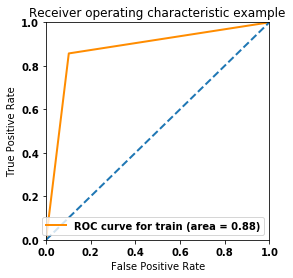

In [882]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(model.predict(X_train_seq_trunc).argmax(axis=-1)), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

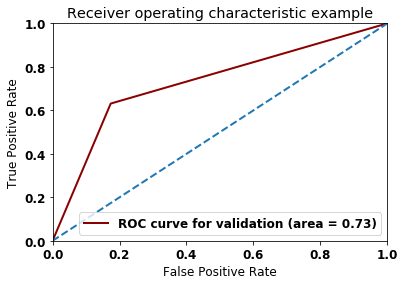

In [883]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(pd.DataFrame(model.predict(X_val_seq_trunc).argmax(axis=-1)), (y_val).astype('int'), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [389]:
pred=model.predict(X_test_seq_trunc)

In [390]:
y_classes=pred.argmax(axis=-1)
y_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [391]:
y_classes=pd.DataFrame(y_classes)

In [392]:
y_classes[0].value_counts()

0    978
1    222
Name: 0, dtype: int64

In [393]:
#y_classes.to_csv("y_classes.csv",index='True')  #0.57

In [872]:
len(l2)
len(X_train_seq_trunc)

2400

# Dense Layer for numerical features

In [848]:
num_cat_inputs = Input(shape=(l2.shape[1],),name='num_cat_inputs')
out_num_cat = Dense(64, activation='relu')(num_cat_inputs)

In [849]:
concatenated = concatenate([out_num_cat,review_out_text],axis=-1)
X = Dense(8, activation='relu')(concatenated)
final_out = Dense(no_of_levels, activation='sigmoid')(X)

In [850]:
model1 = Model(inputs=[num_cat_inputs,review_text_input], outputs=final_out)

In [851]:
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
review_text_input (InputLayer)  (None, 21)           0                                            
__________________________________________________________________________________________________
num_cat_inputs (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 21, 50)       224350      review_text_input[0][0]          
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 64)           128         num_cat_inputs[0][0]             
__________________________________________________________________________________________________
flatten_5 

In [852]:
model1.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [853]:
model1.fit([np.asarray(l2),X_train_seq_trunc], 
          y=y_train_oh, 
          epochs=10,validation_split=0.20)

Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - ETA: 1:27 - loss: 0.7723 - acc: 0.468 - ETA: 0s - loss: 0.5300 - acc: 0.7238  - 2s 912us/step - loss: 0.5234 - acc: 0.7276 - val_loss: 0.4610 - val_acc: 0.7740
Epoch 2/10
1920/1920 [==============================] - ETA: 0s - loss: 0.4193 - acc: 0.750 - ETA: 0s - loss: 0.4184 - acc: 0.810 - 0s 47us/step - loss: 0.4132 - acc: 0.8063 - val_loss: 0.4495 - val_acc: 0.7719
Epoch 3/10
1920/1920 [==============================] - ETA: 0s - loss: 0.5852 - acc: 0.687 - ETA: 0s - loss: 0.3708 - acc: 0.829 - 0s 52us/step - loss: 0.3639 - acc: 0.8396 - val_loss: 0.4397 - val_acc: 0.7656
Epoch 4/10
1920/1920 [==============================] - ETA: 0s - loss: 0.3300 - acc: 0.812 - ETA: 0s - loss: 0.3313 - acc: 0.860 - 0s 54us/step - loss: 0.3302 - acc: 0.8633 - val_loss: 0.4369 - val_acc: 0.7729
Epoch 5/10
1920/1920 [==============================] - ETA: 0s - loss: 0.3830 - acc: 0.875 - ETA: 0s - 

In [854]:
model1.evaluate([l2,X_train_seq_trunc],y_train_oh)

2400/2400 [==============================] - ETA:  - 0s 20us/step


[0.27246107896169025, 0.8979166666666667]

In [855]:
model1.evaluate([l3,X_val_seq_trunc],y_val_oh)

600/600 [==============================] - ETA:  - 0s 27us/step


[0.4596252969900767, 0.7924999992052714]

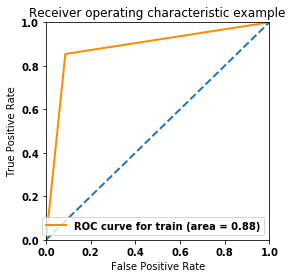

In [879]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(model1.predict([l2,X_train_seq_trunc]).argmax(axis=-1)), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

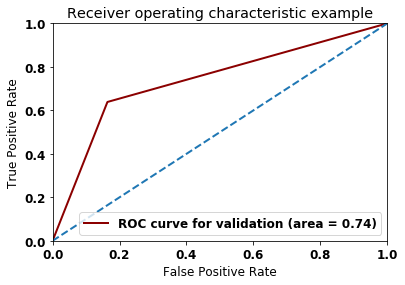

In [880]:
plt.rcParams['font.size'] = 12
fpr1, tpr1, thresholds1 = roc_curve(pd.DataFrame(model1.predict([l3,X_val_seq_trunc]).argmax(axis=-1)), (y_val).astype('int'), pos_label = 1)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1, tpr1, color='darkred',
         lw=lw, label='ROC curve for validation (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [870]:
pd.DataFrame(model1.predict([l1,X_train_seq_trunc]).argmax(axis=-1)).shape

(1200, 1)

In [403]:
pred=model1.predict([l1,X_test_seq_trunc])

In [404]:
pred.shape

(1200, 2)

In [405]:
y_classes_2=pred.argmax(axis=-1)
y_classes_2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [406]:
pd.DataFrame(y_classes_2).to_csv("test_glove_lstm.csv",index=True)

# Bidirectional LSTM

In [407]:
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

21

In [889]:
model2 = Sequential()
model2.add(Embedding(NUM_WORDS_REVIEW_TEXT, 8, input_length=REVIEW_TEXT_MAX_SEQUENCE_LENGTH,dropout=0.2))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='sigmoid'))

In [890]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [891]:
model2.fit(X_train_seq_trunc, y_train_oh,
           batch_size=32,
           epochs=4,
           validation_data=[X_val_seq_trunc, y_val_oh])

Train on 2400 samples, validate on 600 samples
Epoch 1/4
2400/2400 [==============================] - ETA: 3:09 - loss: 0.6942 - acc: 0.437 - ETA: 36s - loss: 0.6907 - acc: 0.618 - ETA: 19s - loss: 0.6854 - acc: 0.69 - ETA: 13s - loss: 0.6811 - acc: 0.70 - ETA: 10s - loss: 0.6770 - acc: 0.71 - ETA: 7s - loss: 0.6696 - acc: 0.7234 - ETA: 6s - loss: 0.6607 - acc: 0.727 - ETA: 5s - loss: 0.6589 - acc: 0.717 - ETA: 4s - loss: 0.6517 - acc: 0.715 - ETA: 3s - loss: 0.6418 - acc: 0.718 - ETA: 2s - loss: 0.6365 - acc: 0.719 - ETA: 2s - loss: 0.6287 - acc: 0.723 - ETA: 1s - loss: 0.6265 - acc: 0.720 - ETA: 1s - loss: 0.6220 - acc: 0.723 - ETA: 1s - loss: 0.6181 - acc: 0.722 - ETA: 0s - loss: 0.6122 - acc: 0.724 - ETA: 0s - loss: 0.6126 - acc: 0.720 - ETA: 0s - loss: 0.6115 - acc: 0.718 - ETA: 0s - loss: 0.6102 - acc: 0.716 - 4s 2ms/step - loss: 0.6041 - acc: 0.7196 - val_loss: 0.5378 - val_acc: 0.7333
Epoch 2/4
2400/2400 [==============================] - ETA: 1s - loss: 0.5157 - acc: 0.750 - E

In [892]:
model2.evaluate(X_train_seq_trunc,y_train_oh)

2400/2400 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 98us/step


[0.13876731775701046, 0.9520833333333333]

In [893]:
model2.evaluate(X_val_seq_trunc,y_val_oh)

600/600 [==============================] - ETA:  - 0s 98us/step


[0.4857156225045522, 0.811666665871938]

In [894]:
model3 = Sequential()
model3.add(Embedding(NUM_WORDS_REVIEW_TEXT, 64, input_length=REVIEW_TEXT_MAX_SEQUENCE_LENGTH,dropout=0.2))
model3.add(Bidirectional(LSTM(32)))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='sigmoid'))

In [895]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [896]:
model3.fit(X_train_seq_trunc, y_train_oh,
           batch_size=32,
           epochs=4,
           validation_data=[X_val_seq_trunc, y_val_oh])

Train on 2400 samples, validate on 600 samples
Epoch 1/4
2400/2400 [==============================] - ETA: 3:00 - loss: 0.6917 - acc: 0.546 - ETA: 44s - loss: 0.6855 - acc: 0.664 - ETA: 25s - loss: 0.6784 - acc: 0.71 - ETA: 17s - loss: 0.6738 - acc: 0.72 - ETA: 12s - loss: 0.6639 - acc: 0.73 - ETA: 10s - loss: 0.6538 - acc: 0.74 - ETA: 8s - loss: 0.6442 - acc: 0.7475 - ETA: 7s - loss: 0.6401 - acc: 0.742 - ETA: 5s - loss: 0.6354 - acc: 0.731 - ETA: 5s - loss: 0.6292 - acc: 0.730 - ETA: 4s - loss: 0.6293 - acc: 0.724 - ETA: 4s - loss: 0.6236 - acc: 0.721 - ETA: 3s - loss: 0.6149 - acc: 0.722 - ETA: 3s - loss: 0.6155 - acc: 0.720 - ETA: 2s - loss: 0.6142 - acc: 0.717 - ETA: 2s - loss: 0.6085 - acc: 0.720 - ETA: 1s - loss: 0.6037 - acc: 0.721 - ETA: 1s - loss: 0.6018 - acc: 0.722 - ETA: 1s - loss: 0.6014 - acc: 0.719 - ETA: 1s - loss: 0.5979 - acc: 0.719 - ETA: 1s - loss: 0.5917 - acc: 0.722 - ETA: 0s - loss: 0.5883 - acc: 0.722 - ETA: 0s - loss: 0.5882 - acc: 0.720 - ETA: 0s - loss: 0.58

In [899]:
model3.evaluate(X_train_seq_trunc,y_train_oh) #Best Model out of all algorithms run

2400/2400 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 123us/step


[0.09217262680331866, 0.9710416666666667]

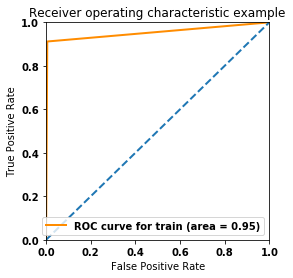

In [900]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(model3.predict_classes(X_train_seq_trunc)), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

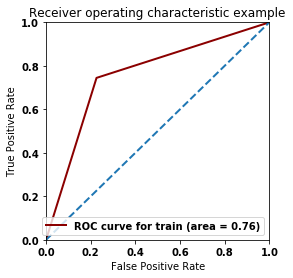

In [903]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(emb_model.predict_classes(X_val_seq_trunc)), (y_val).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [898]:
model3.evaluate(X_val_seq_trunc,y_val_oh)

600/600 [==============================] - ETA:  - ETA:  - 0s 128us/step


[0.508010827700297, 0.8149999992052714]

In [418]:
pred=model3.predict_classes(X_test_seq_trunc)

In [419]:
#pd.DataFrame(pred).to_csv("test_bilstm.csv",index=True)

## Running Bidirectional LSTM with dim of embedding layer=64, dim of LSTM layer = 64

In [420]:
model4 = Sequential()
model4.add(Embedding(NUM_WORDS_REVIEW_TEXT, 64, input_length=REVIEW_TEXT_MAX_SEQUENCE_LENGTH,dropout=0.2))
model4.add(Bidirectional(LSTM(64)))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='sigmoid'))

In [421]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [422]:
model4.fit(X_train_seq_trunc, y_train_oh,
           batch_size=32,
           epochs=4,
           validation_data=[X_val_seq_trunc, y_val_oh])

Train on 2400 samples, validate on 600 samples
Epoch 1/4
2400/2400 [==============================] - ETA: 1:55 - loss: 0.6957 - acc: 0.406 - ETA: 38s - loss: 0.6899 - acc: 0.567 - ETA: 23s - loss: 0.6856 - acc: 0.59 - ETA: 16s - loss: 0.6827 - acc: 0.60 - ETA: 13s - loss: 0.6741 - acc: 0.64 - ETA: 10s - loss: 0.6678 - acc: 0.65 - ETA: 9s - loss: 0.6533 - acc: 0.6839 - ETA: 7s - loss: 0.6432 - acc: 0.696 - ETA: 6s - loss: 0.6303 - acc: 0.705 - ETA: 6s - loss: 0.6259 - acc: 0.701 - ETA: 5s - loss: 0.6221 - acc: 0.701 - ETA: 5s - loss: 0.6152 - acc: 0.707 - ETA: 4s - loss: 0.6153 - acc: 0.704 - ETA: 4s - loss: 0.6145 - acc: 0.702 - ETA: 3s - loss: 0.6091 - acc: 0.706 - ETA: 3s - loss: 0.6061 - acc: 0.707 - ETA: 3s - loss: 0.6028 - acc: 0.708 - ETA: 2s - loss: 0.6006 - acc: 0.708 - ETA: 2s - loss: 0.5984 - acc: 0.709 - ETA: 2s - loss: 0.5957 - acc: 0.712 - ETA: 2s - loss: 0.5906 - acc: 0.715 - ETA: 2s - loss: 0.5890 - acc: 0.715 - ETA: 1s - loss: 0.5869 - acc: 0.714 - ETA: 1s - loss: 0.58

In [901]:
model4.evaluate(X_train_seq_trunc,y_train_oh)

2400/2400 [==============================] - ETA: 13 - ETA: 1 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 213us/step


[0.07254430626829465, 0.9785416666666666]

In [424]:
model4.evaluate(X_val_seq_trunc,y_val_oh)

600/600 [==============================] - ETA:  - ETA:  - 0s 183us/step


[0.560721131960551, 0.7875]

## Running Bidirectional LSTM with dim of embedding layer=128, dim of LSTM layer = 32

In [904]:
model5 = Sequential()
model5.add(Embedding(NUM_WORDS_REVIEW_TEXT, 128, input_length=REVIEW_TEXT_MAX_SEQUENCE_LENGTH,dropout=0.2))
model5.add(Bidirectional(LSTM(32)))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='sigmoid'))

In [905]:
model5.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [906]:
model5.fit(X_train_seq_trunc, y_train_oh,
           batch_size=32,
           epochs=4,
           validation_data=[X_val_seq_trunc, y_val_oh])

Train on 2400 samples, validate on 600 samples
Epoch 1/4
2400/2400 [==============================] - ETA: 3:29 - loss: 0.6899 - acc: 0.578 - ETA: 1:09 - loss: 0.6810 - acc: 0.708 - ETA: 41s - loss: 0.6781 - acc: 0.709 - ETA: 29s - loss: 0.6722 - acc: 0.72 - ETA: 22s - loss: 0.6662 - acc: 0.72 - ETA: 18s - loss: 0.6565 - acc: 0.73 - ETA: 15s - loss: 0.6463 - acc: 0.74 - ETA: 12s - loss: 0.6473 - acc: 0.72 - ETA: 11s - loss: 0.6428 - acc: 0.72 - ETA: 9s - loss: 0.6413 - acc: 0.7113 - ETA: 8s - loss: 0.6355 - acc: 0.709 - ETA: 7s - loss: 0.6272 - acc: 0.711 - ETA: 7s - loss: 0.6207 - acc: 0.711 - ETA: 6s - loss: 0.6171 - acc: 0.712 - ETA: 5s - loss: 0.6156 - acc: 0.711 - ETA: 5s - loss: 0.6089 - acc: 0.714 - ETA: 4s - loss: 0.5987 - acc: 0.721 - ETA: 4s - loss: 0.5923 - acc: 0.725 - ETA: 4s - loss: 0.5915 - acc: 0.722 - ETA: 3s - loss: 0.5872 - acc: 0.723 - ETA: 3s - loss: 0.5863 - acc: 0.720 - ETA: 3s - loss: 0.5891 - acc: 0.716 - ETA: 2s - loss: 0.5837 - acc: 0.720 - ETA: 2s - loss: 0.

In [428]:
model5.evaluate(X_train_seq_trunc,y_train_oh)

2400/2400 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 182us/step


[0.08755105485518773, 0.97375]

In [429]:
model5.evaluate(X_val_seq_trunc,y_val_oh)

600/600 [==============================] - ETA:  - ETA:  - 0s 185us/step


[0.580483702023824, 0.8166666674613953]

In [430]:
pred1=model5.predict_classes(X_test_seq_trunc)

In [431]:
#pd.DataFrame(pred1).to_csv("test_bilstm2.csv",index=True)

# CNN For Sentiment Analysis

In [907]:
embedding_layer=Embedding(NUM_WORDS_REVIEW_TEXT,50,weights=[emb_matrix])

In [908]:
sequence_input = Input(shape=(REVIEW_TEXT_MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 7, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(1)(l_cov1)
l_cov2 = Conv1D(128, 7, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(1)(l_cov2)
l_cov3 = Conv1D(128, 7, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(1)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(2, activation='sigmoid')(l_dense)

In [909]:
model=Model(sequence_input,preds)

In [910]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [911]:
model.fit(X_train_seq_trunc, y_train_oh,
           batch_size=32,
           epochs=4,
           validation_data=[X_val_seq_trunc, y_val_oh])

Train on 2400 samples, validate on 600 samples
Epoch 1/4
2400/2400 [==============================] - ETA: 2:47 - loss: 0.6795 - acc: 0.609 - ETA: 41s - loss: 0.6045 - acc: 0.746 - ETA: 19s - loss: 0.6469 - acc: 0.69 - ETA: 12s - loss: 0.6297 - acc: 0.70 - ETA: 9s - loss: 0.6201 - acc: 0.7090 - ETA: 6s - loss: 0.6023 - acc: 0.709 - ETA: 5s - loss: 0.5825 - acc: 0.713 - ETA: 4s - loss: 0.5778 - acc: 0.713 - ETA: 3s - loss: 0.5706 - acc: 0.718 - ETA: 2s - loss: 0.5694 - acc: 0.713 - ETA: 2s - loss: 0.5626 - acc: 0.718 - ETA: 2s - loss: 0.5546 - acc: 0.719 - ETA: 1s - loss: 0.5503 - acc: 0.719 - ETA: 1s - loss: 0.5459 - acc: 0.722 - ETA: 1s - loss: 0.5331 - acc: 0.728 - ETA: 0s - loss: 0.5271 - acc: 0.730 - ETA: 0s - loss: 0.5304 - acc: 0.725 - ETA: 0s - loss: 0.5322 - acc: 0.720 - ETA: 0s - loss: 0.5314 - acc: 0.720 - 4s 2ms/step - loss: 0.5314 - acc: 0.7188 - val_loss: 0.4499 - val_acc: 0.7442
Epoch 2/4
2400/2400 [==============================] - ETA: 1s - loss: 0.4836 - acc: 0.687 - E

In [912]:
model.evaluate(X_train_seq_trunc,y_train_oh)

2400/2400 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 106us/step


[0.0953851888080438, 0.9702083333333333]

In [913]:
model.evaluate(X_val_seq_trunc,y_val_oh)

600/600 [==============================] - ETA:  - ETA:  - 0s 133us/step


[0.5059718851248424, 0.8091666658719381]

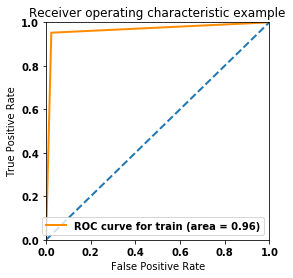

In [915]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(model.predict(X_train_seq_trunc).argmax(axis=-1)), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

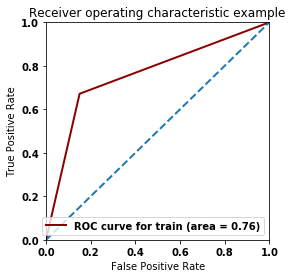

In [916]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(pd.DataFrame(model.predict(X_val_seq_trunc).argmax(axis=-1)), (y_val).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [439]:
pred=model.predict(X_test_seq_trunc) #Second best model 

In [440]:
y_class2=pred.argmax(axis=-1)
y_class2

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [441]:
#pd.DataFrame(y_class2).to_csv("test_cnn.csv",index=True)

# CLUSTERING

# Hierarchichal Clustering

<IPython.core.display.Javascript object>


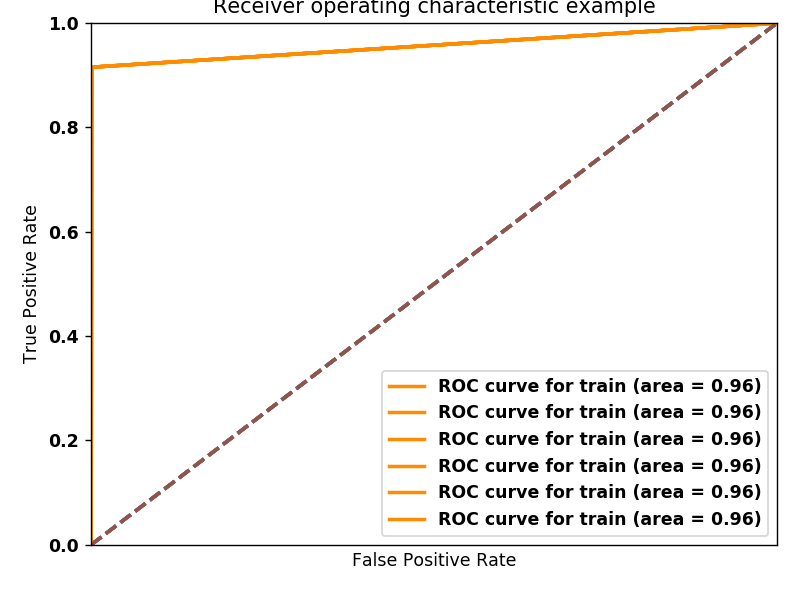

In [944]:
from scipy.cluster.hierarchy import linkage, dendrogram
l=linkage(X_train_seq_trunc,method='ward',metric='euclidean')

import matplotlib.pyplot as plt
%matplotlib notebook

fig, axs = plt.subplots()
dendrogram(l)
plt.tight_layout()
plt.show()

In [948]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

pred=ac.fit_predict(X_train_seq_trunc)

In [1007]:
len(pred)
pred

0
0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
...  ..
2370  0
2371  0
2372  0
2373  0
2374  0
2375  0
2376  1
2377  0
2378  0
2379  0
2380  0
2381  1
2382  1
2383  0
2384  0
2385  0
2386  0
2387  0
2388  1
2389  1
2390  0
2391  0
2392  1
2393  1
2394  0
2395  0
2396  0
2397  0
2398  0
2399  0

[2400 rows x 1 columns]

In [ ]:
for i in len(y_train):
    if pred.loc[i]

In [953]:
pred=pd.DataFrame(pred)

## CNN model including cluster output

In [1005]:
sequence_input = Input(shape=(REVIEW_TEXT_MAX_SEQUENCE_LENGTH+1,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 7, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(1)(l_cov1)
l_lstm= Bidirectional(LSTM(32))
l_cov2 = Conv1D(128, 7, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(1)(l_cov2)
l_cov3 = Conv1D(128, 7, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(1)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(2, activation='sigmoid')(l_dense)

In [1008]:
model6=Model(sequence_input,preds)

In [1009]:
model6.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [1012]:
model6.fit(input_df, y_train_oh,
           batch_size=32,
           epochs=4)
          # validation_data=[X_val_seq_trunc, y_val_oh])

Epoch 1/4
2400/2400 [==============================] - ETA: 5:25 - loss: 0.6819 - acc: 0.656 - ETA: 1:47 - loss: 0.6183 - acc: 0.744 - ETA: 43s - loss: 0.6591 - acc: 0.703 - ETA: 29s - loss: 0.6284 - acc: 0.72 - ETA: 20s - loss: 0.6277 - acc: 0.70 - ETA: 14s - loss: 0.6070 - acc: 0.70 - ETA: 11s - loss: 0.6005 - acc: 0.70 - ETA: 9s - loss: 0.5825 - acc: 0.7091 - ETA: 7s - loss: 0.5676 - acc: 0.713 - ETA: 5s - loss: 0.5484 - acc: 0.720 - ETA: 4s - loss: 0.5281 - acc: 0.730 - ETA: 3s - loss: 0.5223 - acc: 0.734 - ETA: 3s - loss: 0.5082 - acc: 0.742 - ETA: 2s - loss: 0.5005 - acc: 0.746 - ETA: 2s - loss: 0.4957 - acc: 0.748 - ETA: 1s - loss: 0.4876 - acc: 0.754 - ETA: 1s - loss: 0.4800 - acc: 0.757 - ETA: 1s - loss: 0.4725 - acc: 0.763 - ETA: 0s - loss: 0.4665 - acc: 0.767 - ETA: 0s - loss: 0.4619 - acc: 0.769 - ETA: 0s - loss: 0.4539 - acc: 0.773 - 6s 2ms/step - loss: 0.4533 - acc: 0.7738
Epoch 2/4
2400/2400 [==============================] - ETA: 1s - loss: 0.2938 - acc: 0.843 - ETA: 1s

In [1014]:
pred=model6.predict(input_df)

In [1015]:
y_classes_2=pred.argmax(axis=-1)
y_classes_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1017]:
pd.DataFrame(y_classes_2)

0
0     0
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    1
25    0
26    1
27    1
28    0
29    0
...  ..
2370  1
2371  1
2372  1
2373  1
2374  0
2375  0
2376  0
2377  0
2378  0
2379  0
2380  1
2381  1
2382  0
2383  1
2384  0
2385  0
2386  0
2387  0
2388  1
2389  0
2390  1
2391  0
2392  0
2393  0
2394  0
2395  1
2396  1
2397  0
2398  0
2399  0

[2400 rows x 1 columns]

In [1025]:
plt.rcParams['font.size'] = 10
fpr, tpr, thresholds = roc_curve(y_classes_2.astype(int), (y_train).astype('int'), pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (4, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1023]:
f1_score((y_train).astype('int'),(y_classes_2).astype('int'))

0.9552023121387283

In [1026]:
model6.evaluate(input_df, y_train_oh) #loss function value is even les than the BILSTM that predicted best on test data

2400/2400 [==============================] - ETA: 52:4 - ETA: 26:1 - ETA: 17:1 - ETA: 4:1 - ETA: 3: - ETA: 1: - ETA: 1: - ETA: 49s - ETA: 24 - ETA: 10 - ETA: 1 - 44s 18ms/step


[0.07280940069506565, 0.9741666666666666]